# Reinforcement Learning based Virtual Screening
Protein-Ligan pose prediction using RL

## Spatial block arrangement using RL CNN-DQN
__Input__
- Sandbox with block and the surface placemnt

__Output__
- <x, y, $\theta$> for block wrt Sandbox

In [1]:
from block_world.env import Env
from agents.ddpg_agent import DDPGAgent
from matplotlib import pyplot as plt
import numpy as np

/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

### Generating the sandbox
The block world generates a block and places it in the surface by randomizing <x, y, $\theta$>. The $\theta$ rotated block is stored in the _block_ property of the Block class.

Both the block and the surface are combined together into a single sandbox image. (More here)

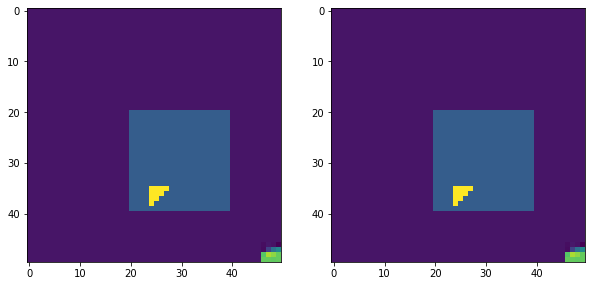

In [2]:
env = Env()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()

In [3]:
print(env.block.rotate_angle, env.block.shift_x, env.block.shift_y)

-145 35 24


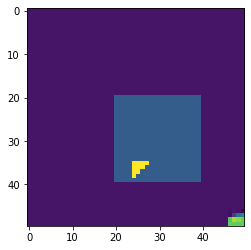

-0.1 [-45.09231409  18.6588298    8.86649831] (2, 3)


In [4]:
xx = env.action_space.sample()
env.block.block_x
state, reward, t = env.step(xx)
plt.imshow(env.block.sandbox)
plt.show()
print(reward, xx, env.action_space.action_bounds.shape)

In [5]:
block = env.block
print(env.block.block_x, env.block.block_y, block.shift_x, block.shift_y, [block.shift_x- block.block_x, block.shift_y - block.block_y, block.rotate_angle])

46 46 35 24 [-11, -22, -145]


### Absolute Fit
The absolute fit is when the block is placed square on top of the slot.


  [block.shift_x- block.block_x, block.shift_y - block.block_y, block.rotate_angle]


In [6]:
1/258.1212617550832

0.003874148116278945

0.021481288002873217 [0, 0, -180] (2, 3)


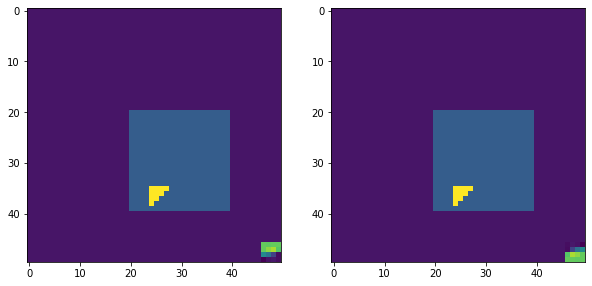

In [7]:
block = env.block
xx = [0, 0, -180]
state, reward, t = env.step(xx)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
print(reward, xx, env.action_space.action_bounds.shape)

### Converting sandbox image to tensors for CNN consumption
The sandbox image needs to be converted into an image consumable by the CNN

In [8]:
agent = DDPGAgent(env)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
actions =  agent.play(100)

Actual states:  [30, 36] [1, 1, 10]
True [2.47517126 1.18927655 9.92926165] 0.02303339462370861 1 [3, 2, 0.07073835132655404]
True [ 3.01683913  1.038396   13.07052323] 0.023997664161973072 2 [6, 3, -12.999784877299449]
True [ 1.8123773   1.03272695 12.13751226] 0.024087894381888943 3 [8, 4, -25.137297140947]
True [ 2.34563613 -0.3111168  12.85549519] 0.022895541747446454 4 [10, 4, -37.992792334682]
True [ 2.78030236  0.16055612 10.86091968] 0.021308531342480768 5 [13, 4, -48.85371201578247]
True [ 3.97509586  0.70707845 11.68796848] 0.01947771919047865 6 [17, 5, -60.541680496996904]
True [ 2.58071019  1.05983089 11.93522277] 0.01775970893972868 7 [20, 6, -72.47690327082209]
True [ 1.91036249  0.89165396 15.02235078] 0.01619593871486641 8 [22, 7, -87.49925405054364]
True [ 2.97747166  0.83640253 11.39495589] 0.014890420262983255 9 [25, 8, -98.89420993866275]
True [ 3.0647364   2.00289677 12.33645261] 0.013776414656207025 10 [28, 10, -111.2306625501208]
True [ 2.40488215  3.11970146 16.

True [ 5.09830049  0.24596424 10.17818094] -0.1 118 [46, 16, -196.85899430326268]
True [5.06564307 0.30455982 9.67131134] -0.1 119 [46, 16, -196.85899430326268]
True [ 5.15374853  0.84902457 10.5132552 ] -0.1 120 [46, 16, -196.85899430326268]
True [5.26799189 1.08668849 8.698461  ] -0.1 121 [46, 16, -196.85899430326268]
True [ 5.06002502  0.83371404 10.0662501 ] -0.1 122 [46, 16, -196.85899430326268]
True [ 5.19118699  1.03566031 10.27231865] -0.1 123 [46, 16, -196.85899430326268]
True [ 5.50874483  0.76971276 11.60923775] -0.1 124 [46, 16, -196.85899430326268]
True [ 5.42191063  0.19459825 12.84551034] -0.1 125 [46, 16, -196.85899430326268]
True [ 5.38474854  0.12863203 12.87669287] -0.1 126 [46, 16, -196.85899430326268]
True [ 5.10191676  0.018863   15.44804712] -0.1 127 [46, 16, -196.85899430326268]
True [ 5.59753009 -0.16383741 15.04577187] -0.1 128 [46, 16, -196.85899430326268]
True [ 5.47008196 -0.17036677 13.95359275] -0.1 129 [46, 16, -196.85899430326268]
True [ 5.17626332 -0.1

True [ 8.20249014 -2.85138298 -5.54923437] -0.1 237 [46, 16, -196.85899430326268]
True [ 8.44112745 -3.31681391 -6.98301327] -0.1 238 [46, 16, -196.85899430326268]
True [ 8.27901439 -3.11724074 -7.72379854] -0.1 239 [46, 16, -196.85899430326268]
True [ 8.58254283 -3.15188359 -8.04250889] -0.1 240 [46, 16, -196.85899430326268]
True [ 9.26293524 -2.75173785 -8.62257776] -0.1 241 [46, 16, -196.85899430326268]
True [ 9.66561776 -2.45018015 -8.92320137] -0.1 242 [46, 16, -196.85899430326268]
True [ 9.51234706 -2.16341671 -9.7172113 ] -0.1 243 [46, 16, -196.85899430326268]
True [  9.53923862  -2.21620154 -10.99684838] -0.1 244 [46, 16, -196.85899430326268]
True [  9.68788416  -1.89076932 -13.80951732] -0.1 245 [46, 16, -196.85899430326268]
True [  9.80684589  -2.18775195 -12.0668694 ] -0.1 246 [46, 16, -196.85899430326268]
True [  9.66946497  -2.2579888  -12.3781835 ] -0.1 247 [46, 16, -196.85899430326268]
True [  9.27015746  -1.82767053 -12.12582227] -0.1 248 [46, 16, -196.85899430326268]
T

True [ 8.8921169  -0.04066189  6.7576022 ] -0.1 357 [46, 16, -196.85899430326268]
True [8.35275806 0.27337533 7.37299137] -0.1 358 [46, 16, -196.85899430326268]
True [8.55204388 0.30942103 9.16648836] -0.1 359 [46, 16, -196.85899430326268]
True [8.28251929 0.76238752 8.51591129] -0.1 360 [46, 16, -196.85899430326268]
True [8.64044863 0.20906616 8.97653385] -0.1 361 [46, 16, -196.85899430326268]
True [8.66862331 0.21578383 8.83543643] -0.1 362 [46, 16, -196.85899430326268]
True [8.84740388 0.73362216 8.92871769] -0.1 363 [46, 16, -196.85899430326268]
True [8.60867849 0.5235786  8.21763706] -0.1 364 [46, 16, -196.85899430326268]
True [8.63423839 0.69018993 6.66874395] -0.1 365 [46, 16, -196.85899430326268]
True [8.40157445 1.28918057 6.35116294] -0.1 366 [46, 16, -196.85899430326268]
True [8.45157141 1.640492   6.88512542] -0.1 367 [46, 16, -196.85899430326268]
True [8.49890177 1.71068204 8.82282602] -0.1 368 [46, 16, -196.85899430326268]
True [9.00267478 1.56207535 9.77672331] -0.1 369 

True [ 6.58189621  3.48013033 -4.20490148] -0.1 467 [46, 16, -196.85899430326268]
True [ 6.88946758  3.38866531 -4.70787004] -0.1 468 [46, 16, -196.85899430326268]
True [ 7.03603231  3.57148262 -4.45284246] -0.1 469 [46, 16, -196.85899430326268]
True [ 7.26127575  3.70536843 -4.42762431] -0.1 470 [46, 16, -196.85899430326268]
True [ 7.3570098   3.5131594  -3.79225579] -0.1 471 [46, 16, -196.85899430326268]
True [ 7.57358454  3.30914745 -3.09941646] -0.1 472 [46, 16, -196.85899430326268]
True [ 7.62508597  3.13660234 -2.98345611] -0.1 473 [46, 16, -196.85899430326268]
True [ 7.59066659  2.85031676 -3.24199241] -0.1 474 [46, 16, -196.85899430326268]
True [ 8.27843772  2.90332658 -4.31351219] -0.1 475 [46, 16, -196.85899430326268]
True [ 8.56603947  2.84669633 -4.0967947 ] -0.1 476 [46, 16, -196.85899430326268]
True [ 8.82534972  2.98687762 -3.34646328] -0.1 477 [46, 16, -196.85899430326268]
True [ 8.78543321  2.54362761 -6.36791986] -0.1 478 [46, 16, -196.85899430326268]
True [ 9.0175719

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 1 Return: -48.01996934354445 episode_length: 500
Actual states:  [29, 24] [46, 46, -178]
True [ -46.  -46. -180.] 0.02656532141809275 1 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 2 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 3 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 4 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 5 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 6 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 7 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 8 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 9 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 10 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 11 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 12 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 13 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 14 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 15 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 16 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 17 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 18 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 19 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 20 [0, 0, 2

True [ -46.  -46. -180.] -0.1 179 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 180 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 181 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 182 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 183 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 184 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 185 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 186 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 187 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 188 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 189 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 190 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 191 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 192 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 193 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 194 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 195 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 196 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 197 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 198 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 199 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 200 

True [ -46.  -46. -180.] -0.1 361 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 362 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 363 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 364 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 365 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 366 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 367 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 368 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 369 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 370 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 371 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 372 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 373 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 374 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 375 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 376 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 377 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 378 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 379 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 380 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 381 [0, 0, 2.0]
True [ -46.  -46. -180.] -0.1 382 

32/32 [==============================] - 1s 19ms/sample - loss: -1.1658 - acc: 0.0000e+00
Epoch 19/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1658 - acc: 0.0000e+00
Epoch 20/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1658 - acc: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 0s 162ms/step - loss: 0.2531 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 27ms/step - loss: 0.0143 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 27ms/step - loss: -0.0709 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 28ms/step - loss: -0.0247 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 28ms/step - loss: 0.1139 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 28ms/step - loss: 0.0132 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 27ms/step - loss: -0.1491 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 28 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 29 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 30 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 31 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 32 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 33 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 34 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 35 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 36 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 37 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 38 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 39 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 40 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 41 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 42 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 43 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 44 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 45 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 46 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 47 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 48 [3, 0, 286.0]
True [ -46.  

True [ -46.  -46. -180.] -0.1 219 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 220 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 221 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 222 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 223 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 224 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 225 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 226 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 227 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 228 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 229 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 230 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 231 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 232 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 233 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 234 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 235 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 236 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 237 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 238 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 239 [3, 0,

True [ -46.  -46. -180.] -0.1 392 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 393 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 394 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 395 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 396 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 397 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 398 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 399 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 400 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 401 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 402 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 403 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 404 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 405 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 406 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 407 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 408 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 409 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 410 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 411 [3, 0, 286.0]
True [ -46.  -46. -180.] -0.1 412 [3, 0,

Epoch 11/20
1/1 [==============================] - 0s 29ms/step - loss: -0.2106 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 29ms/step - loss: -0.0671 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 29ms/step - loss: 0.0336 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 29ms/step - loss: -0.1781 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 40ms/step - loss: -0.1799 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 31ms/step - loss: -0.0599 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 30ms/step - loss: -0.2538 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 38ms/step - loss: -0.2047 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 29ms/step - loss: -0.0402 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 28ms/step - loss: -0.0524 - acc: 0.0000e+00
Episode: 3 Return: -4

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 28 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 29 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 30 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 31 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 32 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 33 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 34 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 35 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 36 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 37 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 38 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 39 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 40 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 41 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 42 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 43 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 44 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 45 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 46 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 47 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 48 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 49 [1, 1, -34]
True [ -46

True [ -46.  -46. -180.] -0.1 226 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 227 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 228 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 229 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 230 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 231 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 232 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 233 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 234 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 235 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 236 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 237 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 238 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 239 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 240 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 241 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 242 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 243 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 244 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 245 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 246 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 247 

True [ -46.  -46. -180.] -0.1 407 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 408 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 409 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 410 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 411 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 412 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 413 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 414 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 415 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 416 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 417 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 418 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 419 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 420 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 421 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 422 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 423 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 424 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 425 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 426 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 427 [1, 1, -34]
True [ -46.  -46. -180.] -0.1 428 

Epoch 20/20
1/1 [==============================] - 0s 29ms/step - loss: -0.2269 - acc: 0.0000e+00
Episode: 4 Return: -50.00000000000044 episode_length: 500
Actual states:  [32, 23] [46, 1, -148]
True [ -46.  -46. -180.] -0.1 1 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 2 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 3 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 4 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 5 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 6 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 7 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 8 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 9 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 10 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 11 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 12 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 13 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 14 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 15 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 16 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 17 [46, 1, -148]
True [ -46.  -4

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 27 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 28 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 29 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 30 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 31 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 32 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 33 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 34 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 35 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 36 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 37 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 38 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 39 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 40 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 41 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 42 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 43 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 44 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 45 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 46 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 47 [46, 1, -148]
True [ -46.  

True [ -46.  -46. -180.] -0.1 216 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 217 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 218 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 219 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 220 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 221 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 222 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 223 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 224 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 225 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 226 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 227 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 228 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 229 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 230 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 231 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 232 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 233 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 234 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 235 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 236 [46, 1

True [ -46.  -46. -180.] -0.1 394 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 395 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 396 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 397 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 398 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 399 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 400 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 401 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 402 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 403 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 404 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 405 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 406 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 407 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 408 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 409 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 410 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 411 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 412 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 413 [46, 1, -148]
True [ -46.  -46. -180.] -0.1 414 [46, 1

Epoch 12/20
1/1 [==============================] - 0s 29ms/step - loss: 9.1517 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 28ms/step - loss: 9.0490 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 30ms/step - loss: 9.1159 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 28ms/step - loss: 9.0030 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 29ms/step - loss: 9.6397 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 30ms/step - loss: 8.5082 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 30ms/step - loss: 9.2703 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 30ms/step - loss: 9.1352 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 29ms/step - loss: 8.9957 - acc: 0.0000e+00
Episode: 5 Return: -50.00000000000044 episode_length: 500
Actual states:  [21, 28] [46, 1, -176]
True [ -46.  -46. -180.] -0.1 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 26 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 27 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 28 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 29 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 30 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 31 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 32 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 33 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 34 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 35 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 36 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 37 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 38 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 39 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 40 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 41 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 42 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 43 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 44 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 45 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 46 [46, 1, -176]
True [ -46.  

True [ -46.  -46. -180.] -0.1 218 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 219 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 220 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 221 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 222 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 223 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 224 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 225 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 226 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 227 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 228 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 229 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 230 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 231 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 232 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 233 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 234 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 235 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 236 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 237 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 238 [46, 1

True [ -46.  -46. -180.] -0.1 389 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 390 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 391 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 392 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 393 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 394 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 395 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 396 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 397 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 398 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 399 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 400 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 401 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 402 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 403 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 404 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 405 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 406 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 407 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 408 [46, 1, -176]
True [ -46.  -46. -180.] -0.1 409 [46, 1

Epoch 10/20
1/1 [==============================] - 0s 30ms/step - loss: 8.7914 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 29ms/step - loss: 8.4829 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 29ms/step - loss: 9.4889 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 29ms/step - loss: 9.3315 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 28ms/step - loss: 8.9060 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 28ms/step - loss: 9.4487 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 29ms/step - loss: 9.6056 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 29ms/step - loss: 8.9324 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 29ms/step - loss: 8.9979 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 29ms/step - loss: 9.0430 - acc: 0.0000e+00
Epoch 20/20
1/1 [=============

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 26 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 27 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 28 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 29 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 30 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 31 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 32 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 33 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 34 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 35 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 36 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 37 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 38 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 39 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 40 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 41 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 42 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 43 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 44 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 45 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 46 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 47 [

True [ -46.  -46. -180.] -0.1 216 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 217 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 218 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 219 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 220 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 221 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 222 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 223 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 224 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 225 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 226 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 227 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 228 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 229 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 230 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 231 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 232 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 233 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 234 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 235 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 236 [0, 0, 11.0]
True [ -46.  

True [ -46.  -46. -180.] -0.1 397 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 398 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 399 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 400 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 401 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 402 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 403 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 404 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 405 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 406 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 407 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 408 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 409 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 410 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 411 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 412 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 413 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 414 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 415 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 416 [0, 0, 11.0]
True [ -46.  -46. -180.] -0.1 417 [0, 0, 11.0]
True [ -46.  

Epoch 15/20
1/1 [==============================] - 0s 30ms/step - loss: 9.0838 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 30ms/step - loss: 9.1038 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 32ms/step - loss: 9.7477 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 29ms/step - loss: 9.9973 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 29ms/step - loss: 9.4195 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 29ms/step - loss: 8.9792 - acc: 0.0000e+00
Episode: 7 Return: -49.875845692480624 episode_length: 500
Actual states:  [22, 36] [46, 46, 164]
True [ -46.  -46. -180.] 0.02370227315699886 1 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 2 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 3 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 4 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 5 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 6 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 27 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 28 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 29 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 30 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 31 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 32 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 33 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 34 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 35 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 36 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 37 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 38 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 39 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 40 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 41 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 42 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 43 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 44 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 45 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 46 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 47 [0, 0, 344.0]
True [ -46.  

True [ -46.  -46. -180.] -0.1 217 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 218 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 219 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 220 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 221 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 222 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 223 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 224 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 225 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 226 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 227 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 228 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 229 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 230 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 231 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 232 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 233 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 234 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 235 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 236 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 237 [0, 0,

True [ -46.  -46. -180.] -0.1 389 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 390 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 391 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 392 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 393 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 394 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 395 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 396 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 397 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 398 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 399 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 400 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 401 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 402 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 403 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 404 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 405 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 406 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 407 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 408 [0, 0, 344.0]
True [ -46.  -46. -180.] -0.1 409 [0, 0,

Epoch 10/20
1/1 [==============================] - 0s 30ms/step - loss: 9.1586 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 29ms/step - loss: 9.5163 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 31ms/step - loss: 9.5029 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 28ms/step - loss: 9.1768 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 29ms/step - loss: 9.5313 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 28ms/step - loss: 9.2933 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 28ms/step - loss: 9.0715 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 29ms/step - loss: 9.3721 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 28ms/step - loss: 9.2696 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 29ms/step - loss: 9.3947 - acc: 0.0000e+00
Epoch 20/20
1/1 [=============

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 26 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 27 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 28 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 29 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 30 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 31 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 32 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 33 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 34 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 35 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 36 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 37 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 38 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 39 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 40 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 41 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 42 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 43 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 44 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 45 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 46 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 47 [46, 1, 32]
True [ -46

True [ -46.  -46. -180.] -0.1 216 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 217 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 218 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 219 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 220 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 221 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 222 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 223 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 224 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 225 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 226 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 227 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 228 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 229 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 230 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 231 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 232 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 233 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 234 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 235 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 236 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 237 

True [ -46.  -46. -180.] -0.1 399 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 400 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 401 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 402 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 403 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 404 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 405 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 406 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 407 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 408 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 409 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 410 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 411 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 412 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 413 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 414 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 415 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 416 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 417 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 418 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 419 [46, 1, 32]
True [ -46.  -46. -180.] -0.1 420 

Epoch 17/20
1/1 [==============================] - 0s 28ms/step - loss: 8.7986 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 29ms/step - loss: 9.1812 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 30ms/step - loss: 9.4353 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 30ms/step - loss: 8.7440 - acc: 0.0000e+00
Episode: 9 Return: -50.00000000000044 episode_length: 500
Actual states:  [26, 31] [47, 1, -73]
True [ -46.  -46. -180.] -0.1 1 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 2 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 3 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 4 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 5 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 6 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 7 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 8 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 9 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 10 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 11 [47, 1, -73]
True [ -46.  -46. -

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

True [ -46.  -46. -180.] -0.1 24 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 25 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 26 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 27 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 28 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 29 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 30 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 31 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 32 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 33 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 34 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 35 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 36 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 37 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 38 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 39 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 40 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 41 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 42 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 43 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 44 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 45 [

True [ -46.  -46. -180.] -0.1 219 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 220 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 221 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 222 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 223 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 224 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 225 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 226 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 227 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 228 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 229 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 230 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 231 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 232 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 233 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 234 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 235 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 236 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 237 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 238 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 239 [47, 1, -73]
True [ -46.  

True [ -46.  -46. -180.] -0.1 396 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 397 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 398 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 399 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 400 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 401 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 402 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 403 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 404 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 405 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 406 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 407 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 408 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 409 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 410 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 411 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 412 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 413 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 414 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 415 [47, 1, -73]
True [ -46.  -46. -180.] -0.1 416 [47, 1, -73]
True [ -46.  

Epoch 14/20
1/1 [==============================] - 0s 29ms/step - loss: 9.2028 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 29ms/step - loss: 8.7780 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 29ms/step - loss: 9.1452 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 30ms/step - loss: 8.5684 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 31ms/step - loss: 9.3531 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 29ms/step - loss: 9.7573 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 29ms/step - loss: 9.5543 - acc: 0.0000e+00
Episode: 10 Return: -50.00000000000044 episode_length: 500
Actual states:  [31, 21] [1, 46, 29]
False [  21.10180727   -0.81316013 -146.36229208] 0.011699931308859275 1 [22, 45, 175.36229208305272]
False [27.61595662  5.4503138  68.76096638] -0.1 2 [22, 45, 175.36229208305272]
False [   2.04147196    2.2282272  -136.197

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 0.02281876517554638 115 [14, 14, 254.21988782012744]
False [44.50738432  7.21846307 11.6398928 ] -0.1 116 [14, 14, 254.21988782012744]
False [-34.90086011  -0.8902023  172.82256061] -0.1 117 [14, 14, 254.21988782012744]
False [-44.45331606 -40.25898831 -37.94048916] -0.1 118 [14, 14, 254.21988782012744]
False [ 19.72135132 -34.71335552 -36.56613763] -0.1 119 [14, 14, 254.21988782012744]
False [-25.17566805 -32.43260914 105.8777724 ] -0.1 120 [14, 14, 254.21988782012744]
False [  12.70117786   34.44358343 -163.23044034] -0.1 121 [14, 14, 254.21988782012744]
False [  39.19129456  -45.51471362 -108.39174841] -0.1 122 [14, 14, 254.21988782012744]
False [ -10.15762019   33.36542029 -137.95596909] -0.1 123 [14, 14, 254.21988782012744]
False [  9.13987839  39.55111951 -82.4087594 ] -0.1 124 [14, 14, 254.21988782012744]
False [-34.27854876 -17.38077914  39.37638621] -0.1 125 [14, 14, 254.21988782012744]
False [-4.35657913e+01 -9.05958734e-02 -1.51439354e+02] -0.1 126 [14, 14, 254.219887820127

False [ -32.00043751  -10.65451513 -137.33983133] -0.1 243 [24, 33, -220.1171201812756]
False [-31.53756256 -23.63180651   8.84266291] -0.1 244 [24, 33, -220.1171201812756]
False [  32.86265861  -29.35564809 -139.33840653] -0.1 245 [24, 33, -220.1171201812756]
False [-26.78178112 -16.69587699  96.90506999] -0.1 246 [24, 33, -220.1171201812756]
False [-28.7759021  -20.73010016 -24.11285645] -0.1 247 [24, 33, -220.1171201812756]
False [-3.19014248 45.6195616  27.16275564] -0.1 248 [24, 33, -220.1171201812756]
False [-12.33349135 -23.94144655 -34.63693808] 0.019072620159597948 249 [12, 9, -185.48018210193635]
False [-24.13868908  -1.59966348  51.82639284] -0.1 250 [12, 9, -185.48018210193635]
False [ -35.78605565   13.72994986 -158.45912091] -0.1 251 [12, 9, -185.48018210193635]
False [ 23.40475228   2.60844666 112.89778625] 0.03407342251046856 252 [35, 12, -298.3779683515086]
False [ -6.32951741 -42.89450002 169.82871992] -0.1 253 [35, 12, -298.3779683515086]
False [  30.9076246    45.66

False [-20.18469475  13.75555422 -65.55734056] -0.1 372 [2, 13, -39.2832524343942]
False [  0.94400244 -11.31337581  37.51539444] 0.02716342265847666 373 [3, 2, -76.79864687120926]
False [  26.33280258   12.81489301 -165.81781179] 0.0216245672959774 374 [29, 15, 89.01916491449009]
False [42.40692402  1.47588217 20.0815373 ] -0.1 375 [29, 15, 89.01916491449009]
False [ -3.04250347 -41.04439026  92.38610701] -0.1 376 [29, 15, 89.01916491449009]
False [ 44.71629399  -0.41226466 163.50276847] -0.1 377 [29, 15, 89.01916491449009]
False [-17.65575422  11.75928602  24.96976412] 0.019814136689934043 378 [11, 27, 64.04940079020517]
False [  41.33817208  -14.07572111 -116.14715815] -0.1 379 [11, 27, 64.04940079020517]
False [13.40896664 16.20307779 55.75246581] 0.035207526131752605 380 [24, 43, 8.296934980863654]
False [ -1.52318923  15.32580384 144.45642318] -0.1 381 [24, 43, 8.296934980863654]
False [24.76671269 19.28987949 19.52072556] -0.1 382 [24, 43, 8.296934980863654]
False [-26.22664332 

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.1970 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.1970 - acc: 

False [-33.94938902  -0.10283009  34.87973896] -0.1 76 [31, 46, 322.3758305560425]
False [  -1.13981751   -8.18123645 -148.0816516 ] 100.01200431291281 77 [30, 38, 470.45748215957974]
False [-32.05232603  10.30711555  72.31138089] -0.1 78 [30, 38, 470.45748215957974]
False [ 16.23802858 -33.16051586 176.34408066] 0.014266764534915495 79 [46, 5, 294.1134015032448]
False [  38.27857132   16.63441069 -151.5607833 ] -0.1 80 [46, 5, 294.1134015032448]
False [-37.68566941 -24.33932237 -23.30252186] -0.1 81 [46, 5, 294.1134015032448]
False [-43.63727743  12.02750353  86.60358068] 0.01850441435174206 82 [2, 17, 207.50982081896274]
False [-15.92526991  18.71544439 128.50643751] -0.1 83 [2, 17, 207.50982081896274]
False [-18.90498209 -25.42124487 131.16078576] -0.1 84 [2, 17, 207.50982081896274]
False [ 37.23668492 -43.70667415   5.18132302] -0.1 85 [2, 17, 207.50982081896274]
False [ 38.70753494 -22.69533491 155.0808719 ] -0.1 86 [2, 17, 207.50982081896274]
False [ 11.09184158 -37.41658033 -14.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-3.90980052 18.06516036 48.18013186] 0.012270514897133834 112 [5, 38, 527.4063565533252]
False [43.59313091  9.08921948 79.70148069] -0.1 113 [5, 38, 527.4063565533252]
False [ -18.19427617   18.12047347 -149.77415741] -0.1 114 [5, 38, 527.4063565533252]
False [ 34.15601213 -43.33377297  82.55925816] -0.1 115 [5, 38, 527.4063565533252]
False [-17.44441419 -39.19014744  14.21036349] -0.1 116 [5, 38, 527.4063565533252]
False [27.8039439  45.02589693 72.16303661] -0.1 117 [5, 38, 527.4063565533252]
False [  7.40503599 -23.90453468 141.87518386] 0.03016303055494901 118 [12, 14, 385.5311726918629]
False [  9.95011382  -5.17000095 152.52923489] 0.014955518720396717 119 [22, 9, 233.00193779741477]
False [ 38.18441655  43.25763441 -84.56401744] -0.1 120 [22, 9, 233.00193779741477]
False [-27.4435136   38.10998508  -9.91445725] -0.1 121 [22, 9, 233.00193779741477]
False [ 30.92916446  23.91019845 124.84124196] -0.1 122 [22, 9, 233.00193779741477]
False [  0.13127099 -18.49082256 -53.1447

False [39.78023528 38.55239191  9.14740204] -0.1 244 [15, 25, -165.70022003088687]
False [ 40.16162774  26.75575205 164.50331555] -0.1 245 [15, 25, -165.70022003088687]
False [  9.97904102 -19.23679721 137.63057092] 0.036103601989136695 246 [25, 6, -303.3307909527407]
False [ 45.39271068  19.84039971 111.7894418 ] -0.1 247 [25, 6, -303.3307909527407]
False [ -5.83766427  -6.94077551 177.20691963] -0.1 248 [25, 6, -303.3307909527407]
False [40.87154816 23.58474313 45.08859852] -0.1 249 [25, 6, -303.3307909527407]
False [-16.62046604 -18.99437944 -83.16100452] -0.1 250 [25, 6, -303.3307909527407]
False [-12.04280815 -24.41706546 155.8963805 ] -0.1 251 [25, 6, -303.3307909527407]
False [ 37.73370921 -45.87623289 -84.74724752] -0.1 252 [25, 6, -303.3307909527407]
False [  3.27878686   8.32882032 -46.33235921] 0.01780885626122154 253 [28, 14, -256.9984317403035]
False [-32.6896858  -11.01357491  69.94591748] -0.1 254 [28, 14, -256.9984317403035]
False [-35.25448994  24.23207154 -39.83693624

False [ 36.71411534 -41.17972006  66.19376891] -0.1 336 [1, 31, -94.77332275792892]
False [-34.86528142 -38.59707907  33.47171081] -0.1 337 [1, 31, -94.77332275792892]
False [-20.96914101  39.18577898 -11.27106569] -0.1 338 [1, 31, -94.77332275792892]
False [ -3.14624929 -34.36635947  22.52540811] -0.1 339 [1, 31, -94.77332275792892]
False [-26.69535858 -45.6283067  -70.29639269] -0.1 340 [1, 31, -94.77332275792892]
False [36.68486917 21.38986757 92.98646766] -0.1 341 [1, 31, -94.77332275792892]
False [ 2.29461506 27.74380998 69.64017752] -0.1 342 [1, 31, -94.77332275792892]
False [ 37.58321614  20.28467752 111.25700787] -0.1 343 [1, 31, -94.77332275792892]
False [  1.08206078 -45.9847099  -36.63344901] -0.1 344 [1, 31, -94.77332275792892]
False [ 19.84818639 -10.33592015 -96.68330614] 100.05770468753676 345 [21, 21, 1.909983384043386]
False [  -3.5057571    33.79837763 -106.06400697] -0.1 346 [21, 21, 1.909983384043386]
False [-21.93077548  41.79899103 136.51016777] -0.1 347 [21, 21, 

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.3527 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: -1.3527 - acc: 

False [ 35.17848921  38.90135301 174.74744868] -0.1 73 [34, 16, 46.265501104185944]
False [-19.29424427  22.74618604 137.48844209] 0.02099739517208617 74 [15, 39, -91.22294098813933]
False [ -24.09183179   -9.48763416 -119.16761171] -0.1 75 [15, 39, -91.22294098813933]
False [  1.45919261  13.87124252 130.77861307] -0.1 76 [15, 39, -91.22294098813933]
False [38.06981788 42.238767   35.50381569] -0.1 77 [15, 39, -91.22294098813933]
False [14.92534778 -3.23365368 60.5231031 ] 100.01157279862022 78 [30, 36, -151.74604408651663]
False [-34.08230614  11.36094236  15.29872105] -0.1 79 [30, 36, -151.74604408651663]
False [  -2.86940494   31.13038625 -131.32576367] -0.1 80 [30, 36, -151.74604408651663]
False [   2.61164639  -38.06740975 -179.09441325] -0.1 81 [30, 36, -151.74604408651663]
False [-45.73377052 -20.25111118 160.33775899] -0.1 82 [30, 36, -151.74604408651663]
False [-11.67483304  -1.12765269 -63.30419582] 0.020681333929785276 83 [18, 35, -88.44184827097149]
False [ 37.74019977 -14

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-23.72142758  10.87350494 -77.45941449] -0.1 111 [16, 33, -423.3567722915187]
False [  4.2879323   23.65011064 105.19972631] -0.1 112 [16, 33, -423.3567722915187]
False [ 37.98592346  39.66209837 -62.77300527] -0.1 113 [16, 33, -423.3567722915187]
False [-19.7857287  -37.19467122 -86.3350482 ] -0.1 114 [16, 33, -423.3567722915187]
False [-22.43164762  31.15512994 -50.18338347] -0.1 115 [16, 33, -423.3567722915187]
False [21.3447318  16.35462321 -5.90942999] -0.1 116 [16, 33, -423.3567722915187]
False [ 23.90102551  44.34346254 -69.85828128] -0.1 117 [16, 33, -423.3567722915187]
False [  2.83332671  26.82403552 -73.03272717] -0.1 118 [16, 33, -423.3567722915187]
False [-34.95973805 -26.51206977 126.46672476] -0.1 119 [16, 33, -423.3567722915187]
False [-12.29805278  -2.25681717 179.49175011] 0.013789523445090985 120 [4, 31, -602.8485224014838]
False [10.80646876 -3.9639783  18.74931418] 0.016067065404796518 121 [15, 27, -621.5978365779741]
False [   9.15793686    7.02737108 -160.

False [  42.88002486  -42.94254815 -116.38806004] -0.1 242 [13, 42, -861.2030216617446]
False [ 20.19943773 -45.36238588 169.51260702] -0.1 243 [13, 42, -861.2030216617446]
False [-23.6726561   36.72151901 -96.3199337 ] -0.1 244 [13, 42, -861.2030216617446]
False [-20.49165446 -42.73510571 100.48476863] -0.1 245 [13, 42, -861.2030216617446]
False [32.74775049 19.02257864 75.13660557] -0.1 246 [13, 42, -861.2030216617446]
False [ 10.53626383 -18.32059522 -53.57072978] 100.01844279070397 247 [24, 24, -807.632291876793]
False [ -21.11971936   33.33262433 -113.41453378] -0.1 248 [24, 24, -807.632291876793]
False [ 31.27790101   5.12103608 177.39845547] -0.1 249 [24, 24, -807.632291876793]
False [  0.16625597 -25.79216742 -18.26216394] -0.1 250 [24, 24, -807.632291876793]
False [-42.52534773  39.01080783 103.57828467] -0.1 251 [24, 24, -807.632291876793]
False [-11.46642594  42.84344274 -24.73489711] -0.1 252 [24, 24, -807.632291876793]
False [-30.39546932 -43.54047889 162.45647601] -0.1 25

False [-25.40746146  -1.1835488    5.84838776] 0.05284161260021655 364 [11, 44, -774.5563339533727]
False [ 4.35517968  1.11692284 -2.66815757] 0.04762504925880027 365 [15, 45, -771.8881763795915]
False [-38.94715286  40.47558695 171.17335985] -0.1 366 [15, 45, -771.8881763795915]
False [-45.31265349  10.26216507 -24.62317565] -0.1 367 [15, 45, -771.8881763795915]
False [  41.97104158   39.11662272 -172.73202816] -0.1 368 [15, 45, -771.8881763795915]
False [ -25.99368712  -31.08922751 -149.04366334] -0.1 369 [15, 45, -771.8881763795915]
False [  12.05705511   32.61562988 -136.60601918] -0.1 370 [15, 45, -771.8881763795915]
False [  -9.39771275   18.83134663 -122.05883132] -0.1 371 [15, 45, -771.8881763795915]
False [35.72163431 16.45919895 84.62116416] -0.1 372 [15, 45, -771.8881763795915]
False [  36.30323146   38.00773992 -104.00598443] -0.1 373 [15, 45, -771.8881763795915]
False [-28.06283661 -44.61437494 -26.28777506] -0.1 374 [15, 45, -771.8881763795915]
False [ 24.98703363 -15.00

False [-25.45219813  -7.46520426 -99.72735861] 0.02404515140875799 496 [6, 9, -1375.8072752034006]
False [  1.7441338   -8.24721974 -24.16155343] 0.026041190063340443 497 [8, 1, -1351.6457217762413]
False [  24.20531753  -40.35291562 -170.07924354] -0.1 498 [8, 1, -1351.6457217762413]
False [-23.68073892 -31.0525743   58.45527274] -0.1 499 [8, 1, -1351.6457217762413]
False [ 11.93056174  29.50110406 -40.28663889] 100.013297025441 500 [20, 31, -1311.3590828868473]
Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: 46.7428 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: 46.7428 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 46.7428 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 46.7428 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 20ms/sample - loss: 46.7428 - acc: 0.0000e+00
Epoch 6/20
32/32 [=========

False [ 18.03325585 -45.59456034 -26.67261259] -0.1 44 [14, 19, 191.08914178990864]
False [-23.76611694  20.02246529 165.35547372] -0.1 45 [14, 19, 191.08914178990864]
False [ 45.54259433  17.2805026  -30.18020688] -0.1 46 [14, 19, 191.08914178990864]
False [-37.9196652  -17.34285649  65.89683895] -0.1 47 [14, 19, 191.08914178990864]
False [ -30.65152429  -39.43053288 -154.80924197] -0.1 48 [14, 19, 191.08914178990864]
False [  32.962378     30.72979531 -134.94181629] -0.1 49 [14, 19, 191.08914178990864]
False [-16.77162776   8.05130328  78.54820096] -0.1 50 [14, 19, 191.08914178990864]
False [-21.03205339  31.6960428  101.37250061] -0.1 51 [14, 19, 191.08914178990864]
False [-16.37726172 -35.97380987  71.26085633] -0.1 52 [14, 19, 191.08914178990864]
False [ -37.66871749   20.50277173 -174.5638614 ] -0.1 53 [14, 19, 191.08914178990864]
False [-20.12645907  13.69189538 176.16251843] -0.1 54 [14, 19, 191.08914178990864]
False [  22.85112581   30.99181523 -176.21056081] -0.1 55 [14, 19, 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 31.67727115 -33.83352018   9.47212283] -0.1 116 [39, 23, -155.50584368255727]
False [ 29.07863212 -42.20471364 166.43869784] -0.1 117 [39, 23, -155.50584368255727]
False [   9.11259296   16.10904422 -105.8469611 ] -0.1 118 [39, 23, -155.50584368255727]
False [-12.92948192  -3.56579513 -44.31693692] 0.018561160261128393 119 [26, 19, -111.18890675998432]
False [  26.40112725   35.64036598 -112.62980077] -0.1 120 [26, 19, -111.18890675998432]
False [-13.83450906  28.84684174 -86.53105403] -0.1 121 [26, 19, -111.18890675998432]
False [ 39.50852076 -18.58641719 110.0569468 ] -0.1 122 [26, 19, -111.18890675998432]
False [19.50375049 -3.00221099 41.06265001] 0.012644351312771382 123 [46, 16, -152.25155677195548]
False [ 23.77671164 -13.64672383 118.05310219] -0.1 124 [46, 16, -152.25155677195548]
False [   4.44089285  -39.82521966 -168.36733947] -0.1 125 [46, 16, -152.25155677195548]
False [-11.8568599  -18.08131766   4.4860982 ] -0.1 126 [46, 16, -152.25155677195548]
False [ 45.38157

False [-6.02088578 39.00011894 48.46255986] -0.1 242 [46, 9, 36.855566579620046]
False [ 29.04210873   6.02723989 -66.6529995 ] -0.1 243 [46, 9, 36.855566579620046]
False [-12.38698889 -45.32533835 -63.6159486 ] -0.1 244 [46, 9, 36.855566579620046]
False [32.01133255 -5.39813556 10.12436204] -0.1 245 [46, 9, 36.855566579620046]
False [-27.71910595   7.8160737   85.96260697] 0.04232777454138848 246 [18, 17, -49.107040388081685]
False [-35.71970667  22.81908576 155.64258997] -0.1 247 [18, 17, -49.107040388081685]
False [ 29.3705468   18.2982575  -89.76006458] -0.1 248 [18, 17, -49.107040388081685]
False [-36.49177189 -37.87764351 173.71864223] -0.1 249 [18, 17, -49.107040388081685]
False [-42.58821053  15.35313784 -65.94648942] -0.1 250 [18, 17, -49.107040388081685]
False [ 14.79018494 -15.58769402  36.98545625] 0.017535576072258835 251 [33, 1, -86.09249664073738]
False [-23.61527199  19.49750565  -3.50325631] 0.036544774843091446 252 [9, 20, -82.5892403351246]
False [ -12.8257768    41.

False [ -22.46615523   -1.72511128 -114.04758053] 0.05036061590975413 335 [17, 4, 68.54997895503718]
False [  12.42723766   43.33981779 -177.08381696] 0.014838762977787821 336 [29, 47, 245.63379591585976]
False [  0.38503162 -10.60907335 -90.38721995] 100.05227965599478 337 [29, 36, 336.0210158688868]
False [ -42.41868929   44.49306998 -134.46268603] -0.1 338 [29, 36, 336.0210158688868]
False [ -28.50970998    2.00584343 -135.11093018] 0.01490058574120893 339 [0, 38, 471.13194604440685]
False [16.47847628 -3.0798318  -7.26513127] 0.015423973004073315 340 [16, 35, 478.3970773154013]
False [  18.24013163   45.75786563 -157.47842775] -0.1 341 [16, 35, 478.3970773154013]
False [ 34.06991727 -16.35698835 -34.929448  ] -0.1 342 [16, 35, 478.3970773154013]
False [17.82953593 44.24378186 72.44068124] -0.1 343 [16, 35, 478.3970773154013]
False [  1.33533056 -42.76679363 105.43853181] -0.1 344 [16, 35, 478.3970773154013]
False [  23.60621562  -29.93658943 -146.58290729] 0.01547316265688704 345 [

False [ -39.67471234   18.7275074  -128.1420162 ] -0.1 494 [44, 35, 1316.4112699555158]
False [ 19.16452393 -34.5867237  144.18715394] -0.1 495 [44, 35, 1316.4112699555158]
False [-36.37423792   8.71804114 -33.87343548] 0.027585940349565564 496 [8, 44, 1350.2847054347549]
False [-15.8161553   44.39730592  87.76177159] -0.1 497 [8, 44, 1350.2847054347549]
False [  -5.88401093  -30.55781832 -126.00445982] 0.033790754404911284 498 [2, 13, 1476.289165259289]
False [-17.05841935  20.79120096 116.84336109] -0.1 499 [2, 13, 1476.289165259289]
False [-12.63258414 -30.86767668  53.59161682] -0.1 500 [2, 13, 1476.289165259289]
Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: 46.4130 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: 46.4130 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 46.4130 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - los

False [-15.99213745   7.70235962 100.21613673] -0.1 69 [16, 38, 210.7508375861255]
False [ -9.53929113 -17.98055387 -93.55336235] 0.056294156188184265 70 [6, 20, 304.304199933635]
False [-6.47097278e-01 -5.93119673e-02  1.21176589e+02] 0.019020728597887778 71 [5, 20, 183.12761124771447]
False [27.82234565 10.44181939 44.06960655] 100.01341085357568 72 [33, 30, 139.0580046960262]
False [  25.84426622   11.07525152 -105.64100499] -0.1 73 [33, 30, 139.0580046960262]
False [-33.79266895  -9.13441517 161.05829612] -0.1 74 [33, 30, 139.0580046960262]
False [ -4.10178712 -36.54126262  33.23304093] -0.1 75 [33, 30, 139.0580046960262]
False [37.05938282 -8.96708957 35.0180176 ] -0.1 76 [33, 30, 139.0580046960262]
False [ 39.04655293 -43.16529223  80.63309072] -0.1 77 [33, 30, 139.0580046960262]
False [ -24.06452715  -43.08691    -106.55820778] -0.1 78 [33, 30, 139.0580046960262]
False [  22.49717856    8.12565663 -165.62755651] -0.1 79 [33, 30, 139.0580046960262]
False [ 24.74523999  16.5712944

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-38.32970476 -45.81252979 123.11423528] -0.1 108 [46, 5, -322.0888292374472]
False [ 38.56983538 -44.97858609  10.794238  ] -0.1 109 [46, 5, -322.0888292374472]
False [ 40.22616275  11.89262353 -36.87044445] -0.1 110 [46, 5, -322.0888292374472]
False [ 36.65575228 -14.66549941  41.22154522] -0.1 111 [46, 5, -322.0888292374472]
False [ 15.28417968 -29.48312144 166.35188641] -0.1 112 [46, 5, -322.0888292374472]
False [-39.24068347 -11.90226629  60.32839062] -0.1 113 [46, 5, -322.0888292374472]
False [-41.87033785  28.2314882  158.76654263] 0.023062970352394453 114 [4, 33, -480.8553718697739]
False [ 12.41237189 -25.46227608 137.82955966] 0.026291542419659406 115 [16, 8, -618.6849315330733]
False [-28.5944164   14.30340624  63.20330431] -0.1 116 [16, 8, -618.6849315330733]
False [ 18.21646774  26.7764503  -37.07649923] 100.01261712876322 117 [34, 35, -581.6084323039804]
False [ -24.28956431   40.30815279 -155.87496606] -0.1 118 [34, 35, -581.6084323039804]
False [ 4.78818667 13.943

False [  -1.11875092   33.03548867 -165.74216436] -0.1 237 [41, 35, -1213.0360342097383]
False [ 23.47607101 -27.1581312  175.96019825] -0.1 238 [41, 35, -1213.0360342097383]
False [  3.03052611  13.92040437 144.95743741] -0.1 239 [41, 35, -1213.0360342097383]
False [  4.09033621 -15.09536675  40.79595308] 0.011967857989370893 240 [45, 20, -1253.831987288548]
False [  8.44858897  -3.82956372 -75.65160944] -0.1 241 [45, 20, -1253.831987288548]
False [-10.44388285 -38.81977403 -75.45481324] -0.1 242 [45, 20, -1253.831987288548]
False [  2.29827971  -1.88243584 -99.12764556] 0.015699112455145745 243 [47, 18, -1154.7043417308714]
False [ -4.41181464  13.20661627 127.56559456] 0.011732158048067032 244 [43, 31, -1282.2699362909473]
False [  8.74838665 -38.44310324 150.15443821] -0.1 245 [43, 31, -1282.2699362909473]
False [-22.66369964 -44.16909942  -0.65842635] -0.1 246 [43, 31, -1282.2699362909473]
False [ 21.19866496 -43.1391653  -96.71566115] -0.1 247 [43, 31, -1282.2699362909473]
False 

False [-11.47991398  29.70338702 -71.49450313] 0.13335366165720142 356 [8, 39, -765.3935849256526]
False [-6.49012801 -2.36411041 24.61125679] 0.0647001621148381 357 [2, 37, -790.0048417177019]
False [ 23.3552619   13.57947521 158.64959495] -0.1 358 [2, 37, -790.0048417177019]
False [ -42.20527187   15.80760281 -126.39624009] -0.1 359 [2, 37, -790.0048417177019]
False [-28.27077143  17.67826984 -29.00609887] -0.1 360 [2, 37, -790.0048417177019]
False [-14.68696008  36.06977036 153.17266368] -0.1 361 [2, 37, -790.0048417177019]
False [ -11.163394    -19.48618837 -157.49576661] -0.1 362 [2, 37, -790.0048417177019]
False [39.86167825  3.97886089 28.73240164] 0.014043382239377221 363 [42, 41, -818.7372433572223]
False [-31.34473462   6.81939666 163.49112448] -0.1 364 [42, 41, -818.7372433572223]
False [ 29.32342448  42.2911109  101.71136462] -0.1 365 [42, 41, -818.7372433572223]
False [-36.13805545  -4.32985665  14.50459528] 0.022999204290255263 366 [6, 37, -833.241838637744]
False [-30.80

False [-33.05209792 -33.67914316 -75.16189344] -0.1 488 [30, 31, 180.28404793563976]
False [ 45.93221179 -27.54835066  87.54891595] -0.1 489 [30, 31, 180.28404793563976]
False [ 21.00139332 -26.36698912  -8.78433892] -0.1 490 [30, 31, 180.28404793563976]
False [-33.25253321  20.95601813 113.81436279] -0.1 491 [30, 31, 180.28404793563976]
False [  34.40229352   36.96339192 -140.94802503] -0.1 492 [30, 31, 180.28404793563976]
False [-36.26055755  12.35185796 117.23926094] -0.1 493 [30, 31, 180.28404793563976]
False [  11.06066017  -27.56086885 -116.86425925] 0.01715335811778317 494 [41, 3, 297.1483071850539]
False [ -10.51313907   15.37525627 -116.86838596] 0.0387302542577978 495 [30, 18, 414.0166931433713]
False [-15.14920183  43.70399994 163.54989317] -0.1 496 [30, 18, 414.0166931433713]
False [ 8.34447874  1.87159737 51.57011101] 100.08929398082762 497 [38, 20, 362.44658213681134]
False [-18.36647876  -6.60241971  -1.4675619 ] 0.09010659076961097 498 [20, 13, 363.9141440412943]
False 

False [-31.20008752  31.81806477 -51.10490273] -0.1 76 [17, 11, -74.45819162999199]
False [ -8.09621     -7.2070408  -42.37833472] 0.026178272526787207 77 [9, 4, -32.07985690846847]
False [-23.82940762 -20.40444602 -33.78245711] -0.1 78 [9, 4, -32.07985690846847]
False [-13.57404365 -20.33953899  84.88706118] -0.1 79 [9, 4, -32.07985690846847]
False [ 33.18594654   1.38963384 151.09659889] 0.01255110803735892 80 [42, 5, -183.17645579851728]
False [-11.61259517   6.912818   -70.24458069] 0.014218927071432751 81 [30, 12, -112.93187510986789]
False [ 16.55228393 -39.56443328  99.32889114] -0.1 82 [30, 12, -112.93187510986789]
False [-33.78823151  12.18881006 -16.55738286] -0.1 83 [30, 12, -112.93187510986789]
False [  -5.05316222   28.1239765  -159.28504402] 0.022622199043626494 84 [25, 40, 46.35316890777628]
False [22.3851351  30.04797061 55.12359582] -0.1 85 [25, 40, 46.35316890777628]
False [  28.40810966  -13.32451459 -156.32518797] -0.1 86 [25, 40, 46.35316890777628]
False [  34.9997

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 38.94745134 -31.90766559  60.70127237] -0.1 116 [8, 38, 401.7748408927016]
False [ 31.79882903  25.1133503  -11.46093114] -0.1 117 [8, 38, 401.7748408927016]
False [ 18.04205022  22.94716666 -13.45237444] -0.1 118 [8, 38, 401.7748408927016]
False [ -5.65119062 -24.13840535  56.33161381] 0.03288411967500243 119 [2, 14, 345.4432270832642]
False [  44.17423292  -39.13110995 -103.42497275] -0.1 120 [2, 14, 345.4432270832642]
False [ -41.56532728   32.75541273 -111.82056056] -0.1 121 [2, 14, 345.4432270832642]
False [41.40316076 20.78367093 76.06137962] 0.013420445924771124 122 [43, 35, 269.38184746418614]
False [ -45.89145785    7.41213452 -161.17290443] -0.1 123 [43, 35, 269.38184746418614]
False [-25.32702403  42.54435253  47.70852416] -0.1 124 [43, 35, 269.38184746418614]
False [  -8.93188363   -3.85933959 -152.72687161] 100.02290902105074 125 [34, 31, 422.1087190701201]
False [14.14516095 10.06823772 86.72676436] -0.1 126 [34, 31, 422.1087190701201]
False [-8.8046104  25.288247

False [-26.52004973  -7.68436476  10.44367998] 0.04232793812329397 251 [4, 29, 715.0185815156794]
False [-14.08565402  11.04520693 106.17191338] -0.1 252 [4, 29, 715.0185815156794]
False [-24.82194654 -10.57814119  28.70111556] -0.1 253 [4, 29, 715.0185815156794]
False [  29.94782543   11.79465117 -129.65683852] 0.011475088315394988 254 [34, 41, 844.6754200370556]
False [ -4.70652981  27.05227759 -70.55271484] -0.1 255 [34, 41, 844.6754200370556]
False [-19.50736002 -29.3720226  -13.46868008] 0.017455306242342 256 [14, 12, 858.1441001126494]
False [ 21.06591872 -15.89196387  77.71973395] -0.1 257 [14, 12, 858.1441001126494]
False [ 26.11198281  31.49834162 -52.40180622] 0.009866652581403734 258 [40, 43, 910.5459063336536]
False [  39.54107708  -44.74974719 -149.43851029] -0.1 259 [40, 43, 910.5459063336536]
False [ -27.97372481  -42.66148053 -145.15231921] 0.024581182558340114 260 [12, 0, 1055.69822554573]
False [-44.07012322 -32.96735353 140.7562869 ] -0.1 261 [12, 0, 1055.69822554573

False [-34.74070893  27.28009653 -50.4824304 ] -0.1 375 [33, 6, 280.0871977540611]
False [  9.84968315  18.8833846  102.92381464] 0.010909442311017658 376 [43, 25, 177.16338311285]
False [ 6.12263242 26.02014104 79.89178102] -0.1 377 [43, 25, 177.16338311285]
False [32.84521296  3.04639564 36.66891912] -0.1 378 [43, 25, 177.16338311285]
False [-38.53016647 -25.22739173  -1.68274627] 0.02175992728493022 379 [4, 0, 178.8461293803804]
False [  20.17778794  -40.34841359 -152.36687121] -0.1 380 [4, 0, 178.8461293803804]
False [ 41.03251738 -45.85231013  85.6446699 ] -0.1 381 [4, 0, 178.8461293803804]
False [ -0.79127796 -13.42973048 -22.22433544] -0.1 382 [4, 0, 178.8461293803804]
False [-8.74291211 -8.75573388 66.22241184] -0.1 383 [4, 0, 178.8461293803804]
False [-31.76109043  27.69132865  51.59672701] -0.1 384 [4, 0, 178.8461293803804]
False [ 12.90395118 -45.88487592 103.02772694] -0.1 385 [4, 0, 178.8461293803804]
False [-16.49867163 -36.94266466 -11.30764853] -0.1 386 [4, 0, 178.84612

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: 45.9062 - acc: 

False [-43.91620104  36.97250481 -95.63722795] -0.1 77 [9, 44, 605.9686161025235]
False [ 3.44716491 -3.37490062 96.44922756] 0.013678232833410754 78 [12, 41, 509.51938854397434]
False [ 26.51912347 -44.72289413 -44.45723028] -0.1 79 [12, 41, 509.51938854397434]
False [17.78566637 42.79560424 18.35298033] -0.1 80 [12, 41, 509.51938854397434]
False [ 19.53151769 -34.2698098  130.74197263] 0.09922480403209953 81 [32, 7, 378.7774159119548]
False [ -36.47909878    0.91133078 -132.10385488] -0.1 82 [32, 7, 378.7774159119548]
False [   7.81444753   44.70184449 -142.05672571] -0.1 83 [32, 7, 378.7774159119548]
False [-13.2796686   10.88678816 -45.96580408] 0.03541824974118214 84 [19, 18, 424.74321998927644]
False [ 0.73354786 22.02965356 -8.31027272] 0.018864672110105396 85 [20, 40, 433.05349270795546]
False [-43.0439144  -40.64761601   4.10562939] -0.1 86 [20, 40, 433.05349270795546]
False [-44.87397458 -19.17668468 144.40193238] -0.1 87 [20, 40, 433.05349270795546]
False [-8.79205537 18.778

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 23.90153125 -19.21165346 -58.56905215] -0.1 120 [33, 42, 982.6913953270047]
False [ 37.90980963  -9.64994373 -17.40166945] -0.1 121 [33, 42, 982.6913953270047]
False [12.89105916 37.86032941 36.23407284] -0.1 122 [33, 42, 982.6913953270047]
False [  4.76221747  42.48474568 -79.1955228 ] -0.1 123 [33, 42, 982.6913953270047]
False [ 11.80009244  11.51301837 172.5427097 ] -0.1 124 [33, 42, 982.6913953270047]
False [ 31.60628503 -11.14396114 -84.84777992] -0.1 125 [33, 42, 982.6913953270047]
False [ 17.29680518 -26.57335979 -95.17145794] -0.1 126 [33, 42, 982.6913953270047]
False [-21.86115129  -8.30204668 175.00688147] 0.01832369493359789 127 [11, 34, 807.6845138529447]
False [34.48940163 19.79823858 95.79458605] -0.1 128 [11, 34, 807.6845138529447]
False [ -44.7213879    -5.80679812 -145.90864313] -0.1 129 [11, 34, 807.6845138529447]
False [35.96431943 22.98136335 -1.44950604] -0.1 130 [11, 34, 807.6845138529447]
False [ 17.13993934 -29.25561005 177.89348664] 0.018794746210266167

False [-1.24059844e-02 -1.21252244e+01 -4.20405979e+01] 0.020581051806611454 258 [10, 21, 575.5303323715798]
False [ -43.4650485   -30.99233415 -134.06194767] -0.1 259 [10, 21, 575.5303323715798]
False [  45.60164954    4.96170984 -129.17117154] -0.1 260 [10, 21, 575.5303323715798]
False [ 1.73802022 -2.37770421 50.13269292] 0.018909360242833496 261 [12, 19, 525.3976394470735]
False [ -32.38553456    8.49993145 -154.27169873] -0.1 262 [12, 19, 525.3976394470735]
False [-24.30627544 -39.0578306  127.07567727] -0.1 263 [12, 19, 525.3976394470735]
False [-7.53208367 -0.3122739  82.16232939] 0.02386238585705198 264 [4, 19, 443.2353100604494]
False [ 16.83597102 -34.84056777 -15.86855005] -0.1 265 [4, 19, 443.2353100604494]
False [  7.84671994 -44.98342819 100.63564677] -0.1 266 [4, 19, 443.2353100604494]
False [-30.24451353  27.12879575  15.01449924] -0.1 267 [4, 19, 443.2353100604494]
False [ 44.49026779 -32.70886025 124.77408795] -0.1 268 [4, 19, 443.2353100604494]
False [39.25389602 23.

False [ -8.78250878  30.66703784 -21.47518332] -0.1 391 [11, 39, 1785.1144177303106]
False [ 4.23915227  7.55491277 59.22494211] -0.1 392 [11, 39, 1785.1144177303106]
False [-30.99064587   8.80741068 -67.9698078 ] -0.1 393 [11, 39, 1785.1144177303106]
False [ 36.26704969 -37.34723262   5.30903612] -0.1 394 [11, 39, 1785.1144177303106]
False [  4.02774371  20.99595279 135.02734   ] -0.1 395 [11, 39, 1785.1144177303106]
False [  3.9072652  -18.20369352  55.67344925] 0.032750258256791856 396 [15, 21, 1729.440968477731]
False [-36.52258103 -33.00061376 -73.49618385] -0.1 397 [15, 21, 1729.440968477731]
False [ 16.28040241 -16.5684137   93.22276879] 0.016604697253445464 398 [31, 4, 1636.2181996867766]
False [ 31.12590119 -24.33126153  11.03555505] -0.1 399 [31, 4, 1636.2181996867766]
False [ -0.81537775  28.91181884 144.7447019 ] 100.02913480979254 400 [30, 33, 1491.4734977896123]
False [-37.69074094 -14.28840801 -32.45922686] -0.1 401 [30, 33, 1491.4734977896123]
False [-31.58646702  30.92

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 20ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -2.7626 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 21ms/sample - loss: -2.7626 - acc: 

False [ 26.24887763 -26.72287529  72.06705221] -0.1 72 [15, 24, -405.6780035097433]
False [  -4.20406019   17.21296302 -106.04190597] 0.018106876367710228 73 [11, 41, -299.6360975410316]
False [-27.60225458   2.41294156  72.78451415] -0.1 74 [11, 41, -299.6360975410316]
False [-28.71844332  12.94539305 -76.39033451] -0.1 75 [11, 41, -299.6360975410316]
False [ 11.53986485 -28.15387026  75.41983097] 0.04666610879330577 76 [23, 13, -375.05592851542707]
False [ 37.19514273  32.96923957 -93.00199281] -0.1 77 [23, 13, -375.05592851542707]
False [  6.30316023 -33.8285105   99.52035091] -0.1 78 [23, 13, -375.05592851542707]
False [  20.75061951   -6.05344516 -133.1798268 ] 0.019064345352120683 79 [44, 7, -241.87610172036068]
False [ -45.98062502  -11.07120863 -179.91022386] -0.1 80 [44, 7, -241.87610172036068]
False [-40.07620626 -41.71439857 -61.4341548 ] -0.1 81 [44, 7, -241.87610172036068]
False [  0.90962892  29.6108494  -73.57193597] 0.01044214339669664 82 [45, 37, -168.30416575337784]
F

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-10.33737708  41.22618899 -38.30027233] -0.1 111 [34, 20, -421.433978293713]
False [-16.88463982  -6.02890481 171.76452327] 0.019348990286557073 112 [17, 14, -593.1985015608142]
False [  -9.14840494  -38.23952369 -161.04532224] -0.1 113 [17, 14, -593.1985015608142]
False [-35.29741507  20.19298373 -31.7022746 ] -0.1 114 [17, 14, -593.1985015608142]
False [ 29.08531299 -41.81545065 166.59170808] -0.1 115 [17, 14, -593.1985015608142]
False [ 17.13546537   2.17569864 -94.67326108] 0.01348741262579876 116 [34, 16, -498.5252404776553]
False [  42.07175606  -19.38220959 -118.46114258] -0.1 117 [34, 16, -498.5252404776553]
False [-29.27507107  34.534148   -95.36225856] -0.1 118 [34, 16, -498.5252404776553]
False [ -3.74287576 -44.92764839   6.27786461] -0.1 119 [34, 16, -498.5252404776553]
False [ 29.90754334  37.9175351  -26.42523885] -0.1 120 [34, 16, -498.5252404776553]
False [  34.89761878  -20.09499501 -133.38957354] -0.1 121 [34, 16, -498.5252404776553]
False [-34.73340524  34.61

False [ -33.88015643  -22.27324144 -115.39664045] -0.1 239 [43, 15, -604.3600921045313]
False [-23.56430786 -38.31558969 -47.86122154] -0.1 240 [43, 15, -604.3600921045313]
False [  -6.29001519   24.32547121 -170.1175835 ] 100.01735285757523 241 [37, 39, -434.24250860033476]
False [-30.67504338   9.05387284 173.77772091] -0.1 242 [37, 39, -434.24250860033476]
False [ 2.04672412  1.79126668 53.28019769] 0.011701379800037229 243 [39, 41, -487.52270628920843]
False [-43.70628596   1.06100571  12.28698692] -0.1 244 [39, 41, -487.52270628920843]
False [-38.39878824 -44.24998691 168.20958856] -0.1 245 [39, 41, -487.52270628920843]
False [ 1.96208825 15.73155026 81.31493541] -0.1 246 [39, 41, -487.52270628920843]
False [-28.00127794  31.19753824  53.82989787] -0.1 247 [39, 41, -487.52270628920843]
False [ -6.47610398 -20.44858602  94.09390455] 100.01487122887958 248 [33, 21, -581.6166108363916]
False [ -34.46486066  -33.5142587  -135.04074139] -0.1 249 [33, 21, -581.6166108363916]
False [-19.

False [ -29.32017792  -44.19822652 -151.82555058] -0.1 370 [28, 13, 417.28328869165813]
False [ 23.65435058  40.67578294 -92.24503392] -0.1 371 [28, 13, 417.28328869165813]
False [ -6.23033656 -26.94098609   0.77558853] -0.1 372 [28, 13, 417.28328869165813]
False [  4.20405417  16.40346822 -47.90731648] 100.01624623558914 373 [32, 29, 465.1906051717625]
False [-22.69372311 -14.58727145  71.01300372] 0.03591604506196454 374 [9, 14, 394.1776014541658]
False [-31.56830183  20.1340953  110.52318638] -0.1 375 [9, 14, 394.1776014541658]
False [ -6.42497404 -15.49227973  49.09835856] -0.1 376 [9, 14, 394.1776014541658]
False [ -25.54071502    7.88872501 -142.5712856 ] -0.1 377 [9, 14, 394.1776014541658]
False [-26.16809858 -21.12767587 -55.3936689 ] -0.1 378 [9, 14, 394.1776014541658]
False [  33.50063857    5.09374319 -167.78594712] 0.011830343294636298 379 [43, 19, 561.9635485723027]
False [-26.32938073   2.82743447  23.74713038] 0.015307640806816503 380 [17, 22, 538.2164181939892]
False [ 

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.2228 - acc: 

False [ 9.98186114 24.8540559  85.33226043] -0.1 74 [39, 26, -80.42585794796099]
False [-6.89083539 10.59269567 88.52054367] 100.01045169092092 75 [32, 37, -168.94640161733076]
False [41.79212492 34.18351362 97.52701169] -0.1 76 [32, 37, -168.94640161733076]
False [ 26.25858956 -39.47989357 -33.01223394] -0.1 77 [32, 37, -168.94640161733076]
False [-1.4787646   1.24773358  9.47532838] 100.01041117223309 78 [31, 38, -178.42172999967752]
False [   6.56331616  -18.94617255 -134.99657194] 0.019731044686417384 79 [38, 19, -43.42515805854495]
False [-1.80030442 32.80269215 92.86963982] -0.1 80 [38, 19, -43.42515805854495]
False [ 26.20876781 -39.95546848  11.74974077] -0.1 81 [38, 19, -43.42515805854495]
False [ 44.33452015 -23.47908534 -25.52459437] -0.1 82 [38, 19, -43.42515805854495]
False [-16.04502641 -20.41951313 129.2809741 ] -0.1 83 [38, 19, -43.42515805854495]
False [ 38.53220693  13.63542438 -44.25026009] -0.1 84 [38, 19, -43.42515805854495]
False [ 44.3241809  -26.58248495  64.150

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  12.40379407   40.85946329 -153.90885168] -0.1 112 [1, 10, -177.18964328440703]
False [ -36.44847269  -10.83437084 -163.05977556] -0.1 113 [1, 10, -177.18964328440703]
False [-19.01030563 -36.66397325 139.9040654 ] -0.1 114 [1, 10, -177.18964328440703]
False [ -18.67157144  -12.11915076 -170.48416019] -0.1 115 [1, 10, -177.18964328440703]
False [-16.92919703   8.3260878  106.88705265] -0.1 116 [1, 10, -177.18964328440703]
False [ 15.46538877  28.16621422 -36.56484391] 0.012747423748207283 117 [16, 38, -140.62479937694482]
False [ 10.68581703  17.7720583  -51.04436962] -0.1 118 [16, 38, -140.62479937694482]
False [   0.39442029    9.24861504 -151.96256402] 0.03898028712535628 119 [16, 47, 11.337764642925748]
False [18.73032954 28.51643868 97.92767921] -0.1 120 [16, 47, 11.337764642925748]
False [35.43987477 17.39329735 64.55164914] -0.1 121 [16, 47, 11.337764642925748]
False [26.1283934  45.07891072 20.88690381] -0.1 122 [16, 47, 11.337764642925748]
False [-2.59020612 25.9781415

False [ -6.86030672 -26.6623679  105.70025938] 0.031480154717234254 243 [18, 1, 434.5403481958136]
False [-16.81959992 -24.66149562  98.93292549] -0.1 244 [18, 1, 434.5403481958136]
False [ 26.95988132  12.24933811 128.04591662] 0.015161165789789282 245 [45, 13, 306.49443157145527]
False [ 16.72713854 -35.48422353 124.89875744] -0.1 246 [45, 13, 306.49443157145527]
False [-44.9080183    5.92864814  81.96352655] 0.018896629104978847 247 [0, 19, 224.53090502329871]
False [  23.29499269  -34.45033972 -120.1063587 ] -0.1 248 [0, 19, 224.53090502329871]
False [   1.52174256   39.64010503 -138.12367385] -0.1 249 [0, 19, 224.53090502329871]
False [  29.02885095  -41.98601274 -128.69375838] -0.1 250 [0, 19, 224.53090502329871]
False [ 24.0501518   34.7396358  -68.68077692] -0.1 251 [0, 19, 224.53090502329871]
False [ 25.65945299 -19.28846951 -37.80834395] 0.014150833645084316 252 [26, 0, 262.3392489737828]
False [  3.95886253 -33.59220057 -79.64215859] -0.1 253 [26, 0, 262.3392489737828]
False

False [  -1.49471335   -1.02715864 -166.93676348] 100.01135575800797 370 [38, 24, 233.11169703317987]
False [  19.18765623    1.6596697  -114.70220734] -0.1 371 [38, 24, 233.11169703317987]
False [  42.68279871  -13.6223561  -100.72557925] -0.1 372 [38, 24, 233.11169703317987]
False [  5.00397578 -24.44421261 127.1842159 ] 0.024371676578383097 373 [43, 0, 105.92748113699727]
False [-18.12166607   4.27743306  79.60651674] 0.041936998555209534 374 [25, 4, 26.32096439989047]
False [ 4.40167605e+01 -3.17192985e-02 -1.30270586e+02] -0.1 375 [25, 4, 26.32096439989047]
False [ -1.72790327 -43.82157439 134.31958971] -0.1 376 [25, 4, 26.32096439989047]
False [-16.10521619 -33.38579413  74.41125535] -0.1 377 [25, 4, 26.32096439989047]
False [-35.63512419 -18.45736103  60.17610885] -0.1 378 [25, 4, 26.32096439989047]
False [-26.24579363   9.5836107  -48.35201694] -0.1 379 [25, 4, 26.32096439989047]
False [ -11.92484575  -12.75249531 -116.17211785] -0.1 380 [25, 4, 26.32096439989047]
False [ 13.67

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 20ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -3.5144 - acc: 

False [-15.93333464 -12.00781842 -95.21143865] -0.1 75 [26, 7, -109.74009206472932]
False [ 27.46176323 -20.83660904 167.81852352] -0.1 76 [26, 7, -109.74009206472932]
False [ 3.0921548   7.3313085  81.68277884] 0.016018635275245274 77 [29, 14, -191.4228709031152]
False [-33.70123868  33.34667941 168.70177197] -0.1 78 [29, 14, -191.4228709031152]
False [ 44.0003305  -30.30883971 127.98555591] -0.1 79 [29, 14, -191.4228709031152]
False [ -7.49359375 -10.41161695 156.11588344] 0.0687597961588613 80 [22, 4, -347.5387543478831]
False [ -38.90241046   27.80385361 -177.2774347 ] -0.1 81 [22, 4, -347.5387543478831]
False [ 11.2315922    6.16813291 -49.57129789] 0.05096889910145542 82 [33, 10, -297.96745646136543]
False [-12.00911777  36.02065252 -85.14241703] 0.012101640201365792 83 [21, 46, -212.82503942734724]
False [ 34.94624088 -29.97041647 -37.53149542] -0.1 84 [21, 46, -212.82503942734724]
False [ 30.00282904  40.72624847 -23.663041  ] -0.1 85 [21, 46, -212.82503942734724]
False [28.247

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-44.29145418  -7.39975431   9.69037389] -0.1 111 [25, 38, -513.926148125583]
False [   1.52024155   44.33089846 -132.45967115] -0.1 112 [25, 38, -513.926148125583]
False [ 29.24959182  28.00471403 -45.49809663] -0.1 113 [25, 38, -513.926148125583]
False [ -5.7755326   37.44548136 108.10343781] -0.1 114 [25, 38, -513.926148125583]
False [-38.20556019   8.36286481 -81.04302245] -0.1 115 [25, 38, -513.926148125583]
False [ -16.76680823  -35.66144351 -140.24302943] 0.03665331485927091 116 [8, 2, -373.6831186934446]
False [12.48677363 -4.55998026 33.75256801] -0.1 117 [8, 2, -373.6831186934446]
False [-41.26994187  45.14434195 -83.33020987] -0.1 118 [8, 2, -373.6831186934446]
False [  18.70259681    8.34311324 -143.83595505] 0.020468803844341604 119 [27, 10, -229.84716364348154]
False [-40.45810006 -11.15286938  38.83723301] -0.1 120 [27, 10, -229.84716364348154]
False [  13.34452264  -21.82003686 -102.33695519] -0.1 121 [27, 10, -229.84716364348154]
False [   7.69721401   32.9105383

False [-22.24672678  -2.22895353   2.86140211] -0.1 243 [19, 36, 1281.2795806400027]
False [-19.7563417   -9.58839818 105.50973218] -0.1 244 [19, 36, 1281.2795806400027]
False [-23.69896798 -22.8290362  159.77362953] -0.1 245 [19, 36, 1281.2795806400027]
False [ 29.8164008  -33.51602789  88.4907819 ] -0.1 246 [19, 36, 1281.2795806400027]
False [ 36.31860257 -45.46310031  22.69705898] -0.1 247 [19, 36, 1281.2795806400027]
False [  14.49914526  -44.41150789 -155.03200848] -0.1 248 [19, 36, 1281.2795806400027]
False [  19.29928045   -3.95676837 -168.62469159] 100.0571180054009 249 [38, 32, 1449.9042722322756]
False [ 13.14228618  32.29731981 -12.21285572] -0.1 250 [38, 32, 1449.9042722322756]
False [ 22.55730417 -14.85853837 173.01490613] -0.1 251 [38, 32, 1449.9042722322756]
False [ 26.5702485  -44.35197154 -39.6256092 ] -0.1 252 [38, 32, 1449.9042722322756]
False [-29.55154821  21.85567145 -54.26395339] -0.1 253 [38, 32, 1449.9042722322756]
False [ -19.04727353    6.66064126 -171.990431

False [  11.10904518   14.12201808 -175.94167362] 100.12446717809422 370 [31, 21, 381.3324937868571]
False [  1.95905971  35.65841934 -36.13286524] -0.1 371 [31, 21, 381.3324937868571]
False [-13.51764031 -11.21450628  50.23281102] 0.0440526553085347 372 [17, 10, 331.09968277088274]
False [   1.91354255  -16.28449237 -100.7906475 ] -0.1 373 [17, 10, 331.09968277088274]
False [  -9.07513624   16.41997094 -174.01279567] 0.016772996776723545 374 [8, 26, 505.112478437724]
False [ 16.77057485 -13.51902515 157.04960449] 0.0591835443892146 375 [25, 12, 348.0628739471322]
False [ -3.39815781  18.04260453 -10.60351872] 100.15415076856355 376 [22, 30, 358.6663926640137]
False [ 15.70974169 -38.91988436  -1.83827507] -0.1 377 [22, 30, 358.6663926640137]
False [ 31.30767646  22.77125988 -52.7893725 ] -0.1 378 [22, 30, 358.6663926640137]
False [  -1.12603849    1.22821841 -101.84425285] 100.017280912665 379 [21, 31, 460.51064551309696]
False [-23.29705397 -41.83536266  33.05799214] -0.1 380 [21, 31

False [-14.36983769  -9.41208886  20.00283213] -0.1 500 [0, 22, 2055.0408623742132]
Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 20ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: 44.2886 - acc: 0.0000e+00
Epoch 1

False [ -44.77583349   -4.45018095 -166.72751688] -0.1 69 [34, 36, -40.86086101260766]
False [   1.20599874  -15.71077876 -122.90473852] 100.01951159293168 70 [35, 20, 82.04387750999108]
False [26.16772321 20.04198322 52.7010806 ] -0.1 71 [35, 20, 82.04387750999108]
False [-22.46759555  16.09721427 133.90553789] 0.050011287938672704 72 [13, 36, -51.86166038049005]


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -6.66703168 -28.51545416  15.98814578] 0.022575810091800222 73 [6, 7, -67.84980616358196]
False [-10.22970845  -7.49885275 -46.97708707] -0.1 74 [6, 7, -67.84980616358196]
False [ -5.46982773 -14.60253077 120.85060182] -0.1 75 [6, 7, -67.84980616358196]
False [  3.48426461 -10.21907283 113.10159397] -0.1 76 [6, 7, -67.84980616358196]
False [  1.54601814  -3.55027441 176.58075281] 0.020172355461193794 77 [8, 3, -244.43055897515387]
False [ 19.83723816 -32.07028853 118.54177541] -0.1 78 [8, 3, -244.43055897515387]
False [ 37.67328803  34.94047995 -10.91492066] 0.010466663025267862 79 [46, 38, -233.51563831846627]
False [ 30.29744464 -15.69172041 -40.27011157] -0.1 80 [46, 38, -233.51563831846627]
False [-10.67134259 -28.14547426 139.60334618] 0.03310470850010468 81 [35, 10, -373.11898449920614]
False [ -32.88740829   40.59867233 -107.63997024] -0.1 82 [35, 10, -373.11898449920614]
False [ -1.87156999 -31.05225195  70.65635925] -0.1 83 [35, 10, -373.11898449920614]
False [  6.0592

False [ -16.549779     22.2936585  -123.16687961] -0.1 242 [14, 14, 519.7727722243906]
False [ 12.66760291  -4.735906   -24.2631655 ] 0.013222420611518163 243 [27, 9, 544.0359377253022]
False [17.32159305 39.93144657 30.60221445] -0.1 244 [27, 9, 544.0359377253022]
False [   4.73270414  -36.43305037 -139.57169508] -0.1 245 [27, 9, 544.0359377253022]
False [ 39.84400501  -2.55091784 -62.80764276] -0.1 246 [27, 9, 544.0359377253022]
False [ -3.80565223 -37.88558275 -62.75928432] -0.1 247 [27, 9, 544.0359377253022]
False [-22.26103967  -6.2434267  -44.90618328] 0.018915166828495054 248 [5, 3, 588.942121004276]
False [-29.09888439  -5.35507888 162.89261839] -0.1 249 [5, 3, 588.942121004276]
False [-18.62092932  22.0604934  -24.29523831] -0.1 250 [5, 3, 588.942121004276]
False [ 28.08642883 -31.71117216  63.44685447] -0.1 251 [5, 3, 588.942121004276]
False [-33.84967143  44.03410275  -5.47929785] -0.1 252 [5, 3, 588.942121004276]
False [ 41.88675112 -39.94327829  45.60265852] -0.1 253 [5, 3

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.6313 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.6313 - acc: 

False [-20.57349242 -35.06377175 143.01138061] -0.1 74 [44, 24, 149.73631761439685]
False [-19.74186491   7.2100059  -26.88830966] 100.01192022808966 75 [24, 31, 176.62462727476353]
False [-19.73288476 -36.64449476 132.67878231] -0.1 76 [24, 31, 176.62462727476353]
False [  -2.82553495   17.10670591 -129.87905272] -0.1 77 [24, 31, 176.62462727476353]
False [ 25.24899307  38.14197398 117.31899941] -0.1 78 [24, 31, 176.62462727476353]
False [-38.55020166  17.79125997  82.91066137] -0.1 79 [24, 31, 176.62462727476353]
False [29.71260379 -4.60645214 25.98195788] -0.1 80 [24, 31, 176.62462727476353]
False [24.01528828 -5.11714753 60.29630754] -0.1 81 [24, 31, 176.62462727476353]
False [ -1.95238366 -41.83783407  86.24734215] -0.1 82 [24, 31, 176.62462727476353]
False [ 22.75196683  -9.11734976 -22.50704347] -0.1 83 [24, 31, 176.62462727476353]
False [-35.56251912  25.04099964 139.39114189] -0.1 84 [24, 31, 176.62462727476353]
False [ 36.41654695  41.67499347 118.08493223] -0.1 85 [24, 31, 1

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-33.6252224    8.04004308   3.03401926] 0.014145999582846062 111 [11, 35, 97.28338784373847]
False [ -43.31356096  -16.11953963 -147.27445342] -0.1 112 [11, 35, 97.28338784373847]
False [  1.87936991 -34.84375418 -85.1031409 ] 0.018392310664370585 113 [13, 0, 182.386528744966]
False [ 26.97934281 -26.22499093 176.33549518] -0.1 114 [13, 0, 182.386528744966]
False [ 30.86536786   6.14748313 144.64295342] 0.3180198017158216 115 [44, 6, 37.74357532980176]
False [  2.12717847   0.75393906 -37.80748303] 0.036720709976427575 116 [46, 7, 75.55105835617422]
False [ 22.93081611  17.05757434 -48.46017867] -0.1 117 [46, 7, 75.55105835617422]
False [-42.38381442 -12.15661398 149.12703947] -0.1 118 [46, 7, 75.55105835617422]
False [ 44.4651844  -42.40388264 -83.09688559] -0.1 119 [46, 7, 75.55105835617422]
False [ -12.57029169   21.35028995 -118.23747479] 100.01137705528078 120 [33, 28, 193.78853314685992]
False [ -5.7580375  -22.71269768 -97.94832246] 0.016948678725563878 121 [27, 5, 291.73

False [-19.91198325  28.58626784  57.70134827] -0.1 252 [8, 9, -188.6373530103757]
False [ -3.47878333  41.77145088 151.44314198] -0.1 253 [8, 9, -188.6373530103757]
False [ 35.96075925  -3.21131418 -30.17785531] 0.011401214213563774 254 [44, 6, -158.45949769784886]
False [-38.26861151  29.26940547 175.4397249 ] 0.025634300642540048 255 [6, 35, -333.89922259964084]
False [ 37.99491053  11.0835125  161.70792975] 0.00983689749442877 256 [44, 46, -495.6071523461414]
False [   0.15262312   40.24595746 -112.20317621] -0.1 257 [44, 46, -495.6071523461414]
False [ 35.02475924  26.70600097 -64.76748723] -0.1 258 [44, 46, -495.6071523461414]
False [39.45444959 13.33675647  3.96111382] -0.1 259 [44, 46, -495.6071523461414]
False [  12.2796682   -31.21831523 -102.22165647] -0.1 260 [44, 46, -495.6071523461414]
False [ 35.47699476  -6.92674257 -21.1993023 ] -0.1 261 [44, 46, -495.6071523461414]
False [ -31.73144364   43.99257877 -136.79089439] -0.1 262 [44, 46, -495.6071523461414]
False [  3.68585

False [ 9.86457137 18.66658342 -5.97762491] 100.03667270458803 343 [24, 23, -316.7878512994083]
False [-42.18360358  15.88025245  13.79641269] -0.1 344 [24, 23, -316.7878512994083]
False [ -23.12203421   33.23270047 -172.26962778] -0.1 345 [24, 23, -316.7878512994083]
False [ -19.45129784  -17.32577876 -121.96782343] 0.01912207864803257 346 [5, 6, -194.820027867092]
False [-11.6804258  -27.88878362  90.06794488] -0.1 347 [5, 6, -194.820027867092]
False [ 27.61739269 -11.11214505   1.79937587] -0.1 348 [5, 6, -194.820027867092]
False [-19.2931038   21.42724659 159.72896151] -0.1 349 [5, 6, -194.820027867092]
False [14.08395722  0.31787564 85.19722321] 0.02884667437990116 350 [19, 6, -280.017251080578]
False [ 23.34281175 -39.04774684 145.27000694] -0.1 351 [19, 6, -280.017251080578]
False [-19.76825802  15.47494995 130.822392  ] -0.1 352 [19, 6, -280.017251080578]
False [18.3196974  11.47505233 52.57675831] 0.22736197414925863 353 [37, 17, -332.5940093953746]
False [   5.18844175  -20.2

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.9115 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: -4.9115 - acc: 

False [24.00559434  7.83025809 58.22641421] 100.0112888498662 78 [34, 36, -485.4102009192511]
False [-24.3112878  -19.68122686 -23.07319874] 0.018487005132283213 79 [10, 16, -462.3370021819303]
False [ 43.92789796  36.35067254 168.09326654] -0.1 80 [10, 16, -462.3370021819303]
False [ -8.72702967 -16.02281274 139.70461375] 0.019752052242789305 81 [1, 0, -602.0416159271529]
False [39.86006156 33.57597405 27.57257631] 0.014197081476834501 82 [41, 34, -629.6141922412378]
False [ 12.74297136  14.96194772 175.5735388 ] -0.1 83 [41, 34, -629.6141922412378]
False [ 10.47035386  -1.0956198  145.97924552] -0.1 84 [41, 34, -629.6141922412378]
False [-10.77401611  27.37116485 -53.31151498] -0.1 85 [41, 34, -629.6141922412378]
False [  -6.42619655  -40.07401577 -146.27605294] -0.1 86 [41, 34, -629.6141922412378]
False [  11.82907195  -20.08395963 -154.16789744] -0.1 87 [41, 34, -629.6141922412378]
False [ 28.01112249 -10.32645678 141.6805287 ] -0.1 88 [41, 34, -629.6141922412378]
False [-43.444481

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -3.16961393 -35.58272964 -96.34503463] -0.1 118 [6, 22, -796.1140520466806]
False [ 2.73421637 18.34517083 57.8321233 ] 0.013983145993176084 119 [9, 40, -853.9461753474753]
False [ -2.28605301 -40.16722889  70.12222657] 0.018583518197876292 120 [7, 0, -924.068401917671]
False [ 44.2882215    5.10302755 138.51838914] -0.1 121 [7, 0, -924.068401917671]
False [ -34.65472919   45.25020155 -119.977388  ] -0.1 122 [7, 0, -924.068401917671]
False [-11.09349269   5.82886441  10.15861707] -0.1 123 [7, 0, -924.068401917671]
False [33.02951229 10.4216518  94.62682485] 0.03866985394073912 124 [40, 10, -1018.6952267667893]
False [  0.59223721  13.22962322 -87.06384263] 0.011148511529273361 125 [41, 23, -931.6313841401424]
False [  9.56670167 -30.03190504 -86.73734203] -0.1 126 [41, 23, -931.6313841401424]
False [ -28.73808972   13.1816851  -150.41462163] 0.03423044083870055 127 [12, 36, -781.2167625084892]
False [  39.35816082  -37.24082853 -173.60169177] -0.1 128 [12, 36, -781.216762508489

False [12.28778631  6.36490577 72.18633096] -0.1 248 [42, 37, -1206.4636189798312]
False [ 23.66411059   2.35411163 166.85550463] -0.1 249 [42, 37, -1206.4636189798312]
False [  39.3102295    36.430565   -176.84331884] -0.1 250 [42, 37, -1206.4636189798312]
False [-19.66498551  25.32561707 143.05452545] -0.1 251 [42, 37, -1206.4636189798312]
False [ 26.33112346  -5.67155701 104.74476726] -0.1 252 [42, 37, -1206.4636189798312]
False [-27.87412845   3.70651884 -89.18486542] 0.08434466864287077 253 [14, 41, -1117.2787535634077]
False [ 25.11253103  39.50222055 -92.93568194] -0.1 254 [14, 41, -1117.2787535634077]
False [ -22.83572195   35.8455341  -151.89345056] -0.1 255 [14, 41, -1117.2787535634077]
False [ 21.22672777   0.62420438 158.1987617 ] 0.00950939644903778 256 [35, 42, -1275.4775152588174]
False [ 44.32471597  28.67526767 -99.68520529] -0.1 257 [35, 42, -1275.4775152588174]
False [ 18.00912709 -42.78445281  67.77212263] -0.1 258 [35, 42, -1275.4775152588174]
False [-11.91426973 -

False [ -32.98897859  -44.28379015 -151.17559623] -0.1 343 [35, 37, -1301.5674609206112]
False [  -4.54402706   -4.96299696 -177.49741233] 100.02876577479418 344 [30, 32, -1124.0700485944271]
False [  18.07635485  -29.65469145 -141.65260138] -0.1 345 [30, 32, -1124.0700485944271]
False [ 45.17633222   9.04345521 -80.68132605] -0.1 346 [30, 32, -1124.0700485944271]
False [-29.95045804  21.96169745  25.42843321] -0.1 347 [30, 32, -1124.0700485944271]
False [  2.90513532  -6.6622881  -65.19378376] 100.070181333847 348 [33, 25, -1058.8762648391287]
False [  44.84174832    0.81081614 -130.2874274 ] -0.1 349 [33, 25, -1058.8762648391287]
False [45.52943425  6.20781591 63.60523336] -0.1 350 [33, 25, -1058.8762648391287]
False [ 26.11373237  34.02742336 124.57841487] -0.1 351 [33, 25, -1058.8762648391287]
False [ -18.58315006   22.24667676 -131.33938958] 0.010005045595925964 352 [14, 47, -927.5368752562161]
False [ 36.16864347 -36.84827513 -22.95018553] -0.1 353 [14, 47, -927.5368752562161]
Fa

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: 42.5108 - acc: 

False [ 23.17490511 -44.04909877  74.93364035] -0.1 69 [44, 9, -435.7710775939186]
False [-33.0649226   34.15888426  20.66768892] 0.026403840195849963 70 [11, 43, -456.43876650897164]
False [-20.52185932 -33.71342434 -79.03565379] -0.1 71 [11, 43, -456.43876650897164]
False [-11.40273117  -2.65344928  74.2531303 ] 0.01572379930626034 72 [0, 40, -530.6918968074108]
False [  33.08361534   36.29773542 -153.9636155 ] -0.1 73 [0, 40, -530.6918968074108]
False [   3.41136407  -22.72451569 -147.91534579] 0.04900949562735261 74 [3, 17, -382.7765510171821]
False [-17.56982088  43.69241626  72.12482193] -0.1 75 [3, 17, -382.7765510171821]
False [ 45.68821172 -33.4428761  116.85150081] -0.1 76 [3, 17, -382.7765510171821]
False [ -7.78178899  43.15268647 -98.39875563] -0.1 77 [3, 17, -382.7765510171821]
False [-37.76800539  20.154934    -4.75216798] -0.1 78 [3, 17, -382.7765510171821]
False [-19.24966675 -40.85637402 -23.66891759] -0.1 79 [3, 17, -382.7765510171821]
False [  36.38342244    4.57599

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 29.08365539 -14.2060983   60.33755912] -0.1 95 [35, 20, -164.14788783469047]
False [ 14.54100185 -22.04374673 -48.18603731] -0.1 96 [35, 20, -164.14788783469047]
False [-14.34366414  40.9674748   42.22431092] -0.1 97 [35, 20, -164.14788783469047]
False [ 14.59634077  31.92461735 -29.47431698] -0.1 98 [35, 20, -164.14788783469047]
False [32.83014195  2.0814635  60.52942416] -0.1 99 [35, 20, -164.14788783469047]
False [  -6.7168692    39.18656285 -115.29327627] -0.1 100 [35, 20, -164.14788783469047]
False [ -0.72342082 -19.08297517   7.34871693] 0.014775697497287105 101 [34, 1, -171.4966047673984]
False [  2.94302728 -45.50690928 -34.4928612 ] -0.1 102 [34, 1, -171.4966047673984]
False [ 4.90669919 -0.61427886 85.63281919] 0.02393842960560001 103 [39, 0, -257.1294239545492]
False [ 12.14254359 -23.10489603  91.70097324] -0.1 104 [39, 0, -257.1294239545492]
False [-26.64410731 -25.81588278  -2.0433956 ] -0.1 105 [39, 0, -257.1294239545492]
False [  6.75778158  -8.35737668 124.7120

False [-20.81023578 -18.95961263  -0.89389462] -0.1 200 [0, 1, 132.71512261287796]
False [-18.59737741 -16.39262164 119.62419403] -0.1 201 [0, 1, 132.71512261287796]
False [ -3.40000539 -18.81150849  15.68179124] -0.1 202 [0, 1, 132.71512261287796]
False [27.24269688  7.21942955 46.60544406] 0.02782655533072723 203 [27, 8, 86.109678557259]
False [-15.31049998 -45.63203708  97.08019293] -0.1 204 [27, 8, 86.109678557259]
False [-44.42070409  42.30502584 -34.96749323] -0.1 205 [27, 8, 86.109678557259]
False [ 34.9882108   15.69306068 105.76238565] -0.1 206 [27, 8, 86.109678557259]
False [-11.87408122 -24.84204411  70.34019302] -0.1 207 [27, 8, 86.109678557259]
False [-30.66918539  -3.35788502  76.26751893] -0.1 208 [27, 8, 86.109678557259]
False [  23.56789952    8.13624974 -170.63695097] -0.1 209 [27, 8, 86.109678557259]
False [ -8.85735501 -32.24685996 150.36134688] -0.1 210 [27, 8, 86.109678557259]
False [ 14.68573636 -10.40252153 -96.39369516] -0.1 211 [27, 8, 86.109678557259]
False [

False [ 32.26123423  17.11790013 150.97636166] 100.01710211305611 303 [33, 30, 85.76716046250087]
False [-42.83793546 -21.48035429 129.32965381] -0.1 304 [33, 30, 85.76716046250087]
False [  -6.89808528   40.31946723 -125.01122752] -0.1 305 [33, 30, 85.76716046250087]
False [-28.01059338 -28.80456002 114.37493929] 0.03093029383546423 306 [5, 1, -28.607778826300574]
False [-22.31818475 -33.54204032  53.07566049] -0.1 307 [5, 1, -28.607778826300574]
False [-10.35428018   1.52061909 149.72664492] -0.1 308 [5, 1, -28.607778826300574]
False [  7.58643043   0.67857757 122.90453288] 0.020673715619468756 309 [13, 2, -151.5123117057024]
False [  1.34444636  30.06637163 -38.48793388] 0.02189242761004877 310 [14, 32, -113.0243778226858]
False [20.40106785 18.09239668 51.81382375] -0.1 311 [14, 32, -113.0243778226858]
False [ 12.59231778  26.75253253 -86.81734396] -0.1 312 [14, 32, -113.0243778226858]
False [-34.30264203  28.39168203 145.52055043] -0.1 313 [14, 32, -113.0243778226858]
False [  39.

False [   3.76505392  -37.45500607 -115.3226458 ] -0.1 429 [35, 18, -203.99550442077978]
False [ 29.23043752 -16.37477611 117.05602752] -0.1 430 [35, 18, -203.99550442077978]
False [-17.14335641  41.42845316   1.86290158] -0.1 431 [35, 18, -203.99550442077978]
False [-15.4903298    1.89486156   0.2252451 ] 100.01585872679729 432 [20, 20, -204.22074951830845]
False [-21.29515896 -42.6427723  -84.81753767] -0.1 433 [20, 20, -204.22074951830845]
False [  44.46985894  -15.06263097 -108.20377583] -0.1 434 [20, 20, -204.22074951830845]
False [  32.76474644   23.08358497 -128.51427872] -0.1 435 [20, 20, -204.22074951830845]
False [ 31.73274113 -30.06079807 -63.16253468] -0.1 436 [20, 20, -204.22074951830845]
False [  1.1143989  -42.99709879  63.72777184] -0.1 437 [20, 20, -204.22074951830845]
False [-13.79712421 -22.79763989  -0.83150513] -0.1 438 [20, 20, -204.22074951830845]
False [ -17.1057754    42.88297854 -115.8203483 ] -0.1 439 [20, 20, -204.22074951830845]
False [-18.79615431  -3.4631

32/32 [==============================] - 1s 20ms/sample - loss: -6.5212 - acc: 0.0000e+00
Epoch 19/20
32/32 [==============================] - 1s 20ms/sample - loss: -6.5212 - acc: 0.0000e+00
Epoch 20/20
32/32 [==============================] - 1s 20ms/sample - loss: -6.5212 - acc: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 0s 236ms/step - loss: 9.0810 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 28ms/step - loss: 9.2315 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 28ms/step - loss: 9.3023 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 28ms/step - loss: 9.3143 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 28ms/step - loss: 8.8916 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 28ms/step - loss: 9.6079 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 33ms/step - loss: 9.5125 - acc: 0.0000e+00
Epoch 8/20
1/1 [=================

False [-28.78932217 -34.08249603 179.25445144] 0.02363727754038924 74 [4, 4, 97.53533498969125]
False [ 24.15353187  18.54495498 -87.22507079] 100.0132015070946 75 [28, 23, 184.76040578040056]
False [  45.71743082   43.0467088  -173.68509052] -0.1 76 [28, 23, 184.76040578040056]
False [-14.50648158   3.9891578  162.23730143] 0.029813380506379814 77 [13, 27, 22.52310435253355]
False [38.59626562 16.51178522 69.2311392 ] -0.1 78 [13, 27, 22.52310435253355]
False [ -35.91537552   -4.35968834 -173.76073809] -0.1 79 [13, 27, 22.52310435253355]
False [ 24.2952106   32.99976262 -88.58306507] -0.1 80 [13, 27, 22.52310435253355]
False [ 28.32764376  14.99080322 146.86224716] 0.012241286505280013 81 [41, 42, -124.33914280373921]
False [  9.2389569   45.7836154  -10.07669224] -0.1 82 [41, 42, -124.33914280373921]
False [-22.45046396  20.93727899  40.65354163] -0.1 83 [41, 42, -124.33914280373921]
False [21.07508048 24.99935613 86.80851061] -0.1 84 [41, 42, -124.33914280373921]
False [  36.0742542

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 19.11813443 -37.10105498 -43.87741672] -0.1 115 [35, 0, -223.2214043090866]
False [ -2.43722032 -20.30625743 119.50582737] -0.1 116 [35, 0, -223.2214043090866]
False [ 32.44496624  13.8010137  115.35269059] -0.1 117 [35, 0, -223.2214043090866]
False [ 40.81807805 -35.43449442 -61.92399524] -0.1 118 [35, 0, -223.2214043090866]
False [-12.43603812   4.17188703  -3.17705353] 0.01819258411682524 119 [23, 4, -220.04435077646716]
False [13.57025511 27.94160827 21.10486529] 100.01250257549839 120 [37, 32, -241.14921606800263]
False [-17.07333602  14.12857815 -79.61619282] 0.012393238346732874 121 [20, 46, -161.53302324798273]
False [ -2.24892955  35.14158412 -49.94326521] -0.1 122 [20, 46, -161.53302324798273]
False [ 30.28540979 -16.1999124   49.76355385] -0.1 123 [20, 46, -161.53302324798273]
False [ 35.67318202 -39.34385544  23.67490704] -0.1 124 [20, 46, -161.53302324798273]
False [30.05779475 30.13654933 18.38733214] -0.1 125 [20, 46, -161.53302324798273]
False [-45.6276459   18.

False [-29.92961064  26.40746419 113.28423285] -0.1 248 [28, 0, 368.49715069748095]
False [ -19.99293528   31.22700674 -130.36470491] 0.01389689654983325 249 [8, 31, 498.86185560811305]
False [-40.39555532  -4.7765757  -70.98474591] -0.1 250 [8, 31, 498.86185560811305]
False [10.3328899  31.96639401 73.14846933] -0.1 251 [8, 31, 498.86185560811305]
False [-19.92535736 -11.05547539 -11.13631391] -0.1 252 [8, 31, 498.86185560811305]
False [  -6.64397716  -26.34627479 -174.2517566 ] 0.028683316288511736 253 [1, 5, 673.1136122114445]
False [  -5.93237819   30.17090397 -140.97465404] -0.1 254 [1, 5, 673.1136122114445]
False [ 27.0208586  -35.13055246   9.54163414] -0.1 255 [1, 5, 673.1136122114445]
False [  16.88094119    4.07578336 -158.7850216 ] 0.020137887847110136 256 [18, 9, 831.8986338109676]
False [   4.18491241  -42.70117975 -147.92939144] -0.1 257 [18, 9, 831.8986338109676]
False [   9.43548391   12.5217029  -172.6398068 ] 100.02379098617673 258 [27, 22, 1004.5384406089973]
False [

False [-22.76605353  44.43183209  -2.24036727] -0.1 341 [26, 5, 842.7198169387883]
False [ 41.23290557  40.42339053 133.18304131] -0.1 342 [26, 5, 842.7198169387883]
False [ 39.21867457  39.71205064 126.22119991] -0.1 343 [26, 5, 842.7198169387883]
False [-8.18610752 21.99196727  1.7577382 ] 0.014449976279643218 344 [18, 27, 840.9620787356282]
False [ 5.37630775 10.46835844 -4.97578183] 100.0123278968376 345 [23, 37, 845.9378605624944]
False [-43.30258092 -44.34531974 -70.61960138] -0.1 346 [23, 37, 845.9378605624944]
False [ 20.25708466 -21.33863824 140.17848118] 0.050435311247108046 347 [43, 16, 705.7593793867295]
False [-24.92254511  17.13678954 142.01562614] 0.01443384848630711 348 [18, 33, 563.7437532490078]
False [-41.6744894  -22.4116751   53.75468122] -0.1 349 [18, 33, 563.7437532490078]
False [  4.00266174 -27.07446728 114.41995226] 0.025154493078201303 350 [22, 6, 449.323800989514]
False [ -5.74459744 -14.79177454  68.89777568] -0.1 351 [22, 6, 449.323800989514]
False [ 30.75

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 21ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: -7.0246 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -7.0246 - acc: 

False [ 43.1625373  -33.75918949 146.60421579] -0.1 65 [0, 6, -434.57774539550064]
False [  -3.17506758  -15.95766379 -152.64594702] -0.1 66 [0, 6, -434.57774539550064]
False [ -32.91380342   34.05851981 -162.63961406] -0.1 67 [0, 6, -434.57774539550064]
False [ 11.16463805 -35.23356002 -43.52706776] -0.1 68 [0, 6, -434.57774539550064]
False [-21.1167974  -13.94333094  46.51093573] -0.1 69 [0, 6, -434.57774539550064]
False [-7.07992883 -3.14063282 52.74465382] -0.1 70 [0, 6, -434.57774539550064]
False [-15.39335684  20.5507626   36.55585483] -0.1 71 [0, 6, -434.57774539550064]
False [  27.90841549  -43.44302626 -104.83704358] -0.1 72 [0, 6, -434.57774539550064]
False [-26.24116996  29.6454507  -66.56793951] -0.1 73 [0, 6, -434.57774539550064]
False [ -3.1503614  -38.10359679 111.85642329] -0.1 74 [0, 6, -434.57774539550064]
False [-35.04526978   1.20364187 -44.80407544] -0.1 75 [0, 6, -434.57774539550064]
False [ -4.63221888 -28.67459239 105.96426746] -0.1 76 [0, 6, -434.57774539550064

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-34.54427454  -3.8628929  -46.61780531] -0.1 104 [30, 30, -461.9000910085017]
False [-11.69633627 -33.57591355  83.63227837] -0.1 105 [30, 30, -461.9000910085017]
False [ 43.46974432 -31.24681309 174.67123655] -0.1 106 [30, 30, -461.9000910085017]
False [ 27.69963443 -22.85671866 173.79999486] -0.1 107 [30, 30, -461.9000910085017]
False [ -25.44928415   -2.29773864 -104.45280944] 0.054735166210080816 108 [5, 28, -357.4472815655138]
False [-12.6278177   -5.95588055 176.60525782] -0.1 109 [5, 28, -357.4472815655138]
False [-25.50943769 -19.46503073 176.61575678] -0.1 110 [5, 28, -357.4472815655138]
False [  3.71850917 -30.52486681 -15.79597537] -0.1 111 [5, 28, -357.4472815655138]
False [-23.77539922  32.06476468 176.98653956] -0.1 112 [5, 28, -357.4472815655138]
False [43.86624832 27.13952266 69.55996295] -0.1 113 [5, 28, -357.4472815655138]
False [18.88844222 39.3342966   1.31434565] -0.1 114 [5, 28, -357.4472815655138]
False [44.29474956 36.03713032 19.61671049] -0.1 115 [5, 28

False [ -3.62040491 -11.95662801 123.09716601] 0.026683634388518795 243 [1, 1, -1210.981568722725]
False [ -3.34911939 -15.4984357  172.14419508] -0.1 244 [1, 1, -1210.981568722725]
False [   4.60262827   28.68755448 -120.75593739] 0.09273714972574351 245 [6, 30, -1090.2256313372513]
False [ -25.83021841  -38.35561885 -178.21310559] -0.1 246 [6, 30, -1090.2256313372513]
False [-12.02212428 -30.05089448 -75.75315497] -0.1 247 [6, 30, -1090.2256313372513]
False [-8.89679618  6.14761766 -7.0108295 ] -0.1 248 [6, 30, -1090.2256313372513]
False [ -24.5350028   -37.04550441 -157.63734575] -0.1 249 [6, 30, -1090.2256313372513]
False [ 29.89565719 -29.34007886 -55.48229821] 0.26391582097653565 250 [36, 1, -1034.7433331270756]
False [-33.79369776  36.3924077  175.20106653] 0.01833975218009668 251 [2, 37, -1209.94439965435]
False [-30.10331719  24.62500627 159.12035878] -0.1 252 [2, 37, -1209.94439965435]
False [ 11.99106235 -25.11303034  33.60150104] 0.018246134432231775 253 [14, 12, -1243.5459

False [ 21.9123775  -20.61901981   1.3421923 ] -0.1 366 [22, 5, -1607.199022212049]
False [  26.64743963  -35.26915543 -100.02764817] -0.1 367 [22, 5, -1607.199022212049]
False [ -1.68501249 -18.01641052 -54.06120143] -0.1 368 [22, 5, -1607.199022212049]
False [  6.60037117 -45.13344994  12.13453595] -0.1 369 [22, 5, -1607.199022212049]
False [  -5.85744526    6.01240446 -131.26271575] 0.03378686593135678 370 [16, 11, -1475.9363064665313]
False [45.486134   28.7965767  30.13746169] -0.1 371 [16, 11, -1475.9363064665313]
False [  4.81793095 -42.00647881  81.64093405] -0.1 372 [16, 11, -1475.9363064665313]
False [ 17.15359406  38.82659774 105.07104353] -0.1 373 [16, 11, -1475.9363064665313]
False [29.36814045 38.56363855 93.30582514] -0.1 374 [16, 11, -1475.9363064665313]
False [ -3.74680958 -17.23626258  30.17714344] -0.1 375 [16, 11, -1475.9363064665313]
False [ 40.72983324  41.97334029 171.02025   ] -0.1 376 [16, 11, -1475.9363064665313]
False [18.80897673 13.59947801 83.85115641] 100

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 20ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: 40.2688 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: 40.2688 - acc: 

False [ 28.11648226 -35.46127866 102.56443526] -0.1 50 [11, 30, 472.34036184666746]
False [ 22.19122742   6.43800336 171.10016309] 100.01986789802538 51 [33, 36, 301.2401987568744]
False [ -19.14520165   14.87364636 -146.28843306] -0.1 52 [33, 36, 301.2401987568744]
False [-21.40984609  17.86769614 -43.64008926] -0.1 53 [33, 36, 301.2401987568744]
False [  -7.74343378   36.40913814 -176.49530672] -0.1 54 [33, 36, 301.2401987568744]
False [ 45.34182568 -25.51252332 -45.76432336] -0.1 55 [33, 36, 301.2401987568744]
False [ 27.38811749 -29.99641086  44.07002682] -0.1 56 [33, 36, 301.2401987568744]
False [-36.15497294  26.74144169  17.25169552] -0.1 57 [33, 36, 301.2401987568744]
False [-18.24604171  25.01212012 -50.38078415] -0.1 58 [33, 36, 301.2401987568744]
False [-41.66296943 -10.92738049 -32.16065816] -0.1 59 [33, 36, 301.2401987568744]
False [  -2.80214209   42.76289383 -161.93958514] -0.1 60 [33, 36, 301.2401987568744]
False [ -5.33780134  -1.38138261 -61.48278374] 100.160172611650

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 18.14656496   7.46624891 -50.76824467] -0.1 124 [32, 20, 1227.5998322165424]
False [-19.70473245   6.01524322  25.6204264 ] 0.01626453749829862 125 [12, 26, 1201.9794058164102]
False [  37.84601259  -29.83255335 -101.72641039] -0.1 126 [12, 26, 1201.9794058164102]
False [-42.64449997   5.09102203 116.01637223] -0.1 127 [12, 26, 1201.9794058164102]
False [  -9.31329789  -10.14388384 -115.62665977] 0.022205761551093495 128 [3, 16, 1317.6060655822453]
False [ 24.84801818 -11.47133042  88.60892782] 0.018945127939242024 129 [28, 5, 1228.997137760797]
False [ 2.78889149 43.22081341 75.82627815] -0.1 130 [28, 5, 1228.997137760797]
False [-12.84789304  31.78491059  20.16620583] 0.013496794733751481 131 [15, 37, 1208.8309319346108]
False [ 13.15354635  25.39501283 136.08613635] -0.1 132 [15, 37, 1208.8309319346108]
False [-14.05272583  -1.41874811 112.66322458] 0.03319954179956505 133 [1, 36, 1096.1677073546825]
False [-11.96347123  11.32789937 -67.36886193] -0.1 134 [1, 36, 1096.167707

False [-10.24802363  20.35746591  92.43779908] -0.1 262 [5, 3, 131.5822593044718]
False [  23.92676219   36.03430649 -140.03235627] 100.01569210184617 263 [29, 39, 271.6146155729679]
False [42.79932223 43.89446835  8.55315248] -0.1 264 [29, 39, 271.6146155729679]
False [ 26.71184874  36.58554826 -56.78104665] -0.1 265 [29, 39, 271.6146155729679]
False [-29.64292413 -43.22798818  83.86166222] -0.1 266 [29, 39, 271.6146155729679]
False [12.96266424 30.07995179 12.42579728] -0.1 267 [29, 39, 271.6146155729679]
False [-24.52367935  13.79621258 175.98467203] -0.1 268 [29, 39, 271.6146155729679]
False [ -0.33605484  35.31396332 132.2232596 ] -0.1 269 [29, 39, 271.6146155729679]
False [-26.58011943   5.67277693 120.08150732] 0.01188313957111911 270 [2, 45, 151.53310825351718]
False [  14.60548837   12.00182949 -153.86002046] -0.1 271 [2, 45, 151.53310825351718]
False [   3.80330619   22.36706609 -160.36112321] -0.1 272 [2, 45, 151.53310825351718]
False [ 42.11474794 -31.20533087  48.29899819]

False [-36.02259597  -1.87569226  97.49060817] -0.1 356 [18, 15, -591.091412714959]
False [  1.60447043   0.16986864 103.42874856] 0.06964654419234306 357 [20, 15, -694.5201612701851]
False [-18.74250066   0.80213162  16.80930103] 0.0355131803638747 358 [1, 16, -711.3294623039595]
False [-17.56971042  26.29350016  13.95385271] -0.1 359 [1, 16, -711.3294623039595]
False [   7.79837055   38.6780613  -168.77134146] -0.1 360 [1, 16, -711.3294623039595]
False [-20.34577563  -4.15050498 -75.80577649] -0.1 361 [1, 16, -711.3294623039595]
False [ 35.52306015  19.25359366 109.4035698 ] 100.01313222824301 362 [37, 35, -820.7330321069749]
False [  2.84123659  10.54023414 -32.48243599] 0.015511620959389977 363 [40, 46, -788.2505961186325]
False [-15.95801918  11.59932851  62.56525317] -0.1 364 [40, 46, -788.2505961186325]
False [   8.07488317  -18.95274181 -176.87525675] -0.1 365 [40, 46, -788.2505961186325]
False [-21.09988166 -40.75017165 152.94908752] 0.02194195953753844 366 [19, 5, -941.199683

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 20ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: 87.8296 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: 87.8296 - acc: 

False [-38.89002285   7.30827901  93.28951353] -0.1 77 [19, 19, -246.6433009563095]
False [  19.6778124    20.59705725 -153.85897581] 0.013038082822078419 78 [39, 40, -92.78432514506198]
False [-30.47879865 -43.01136488  23.32743703] -0.1 79 [39, 40, -92.78432514506198]
False [ 34.34438142 -44.87615894  72.05658875] -0.1 80 [39, 40, -92.78432514506198]
False [  2.39242704 -31.63521604  41.30038321] 0.011640366895068668 81 [41, 8, -134.08470835138124]
False [ 41.63555328 -29.0532015  -27.54764581] -0.1 82 [41, 8, -134.08470835138124]
False [ 31.86901736  -8.22052927 -12.40713422] -0.1 83 [41, 8, -134.08470835138124]
False [  -1.03056339   -8.09950405 -136.8310118 ] 0.028145880611170185 84 [40, 0, 2.7463034437837734]
False [-42.5473702   26.74630526 146.96052926] -0.1 85 [40, 0, 2.7463034437837734]
False [ -19.76500491   16.3115019  -135.26031463] 0.016040641961838534 86 [20, 16, 138.006618077893]
False [   5.94549041    3.41403183 -155.48228851] 0.01950124688769483 87 [26, 19, 293.48890

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 15.37029334 -28.68749848 -20.19475271] -0.1 116 [33, 8, 333.5620889683944]
False [-29.35126376 -10.67365099 -10.95802064] -0.1 117 [33, 8, 333.5620889683944]
False [  36.08585812   28.65153556 -155.51201488] -0.1 118 [33, 8, 333.5620889683944]
False [-12.38095209 -36.07325097  39.53745017] -0.1 119 [33, 8, 333.5620889683944]
False [ 34.9168572  -20.81693007 -75.91869971] -0.1 120 [33, 8, 333.5620889683944]
False [  12.70674735   34.97162945 -151.55724902] 0.010946744094435308 121 [46, 43, 485.1193379856003]
False [-28.59155278  -5.64056372 -97.77523845] 0.013325021007426694 122 [17, 37, 582.8945764316987]
False [  6.14393413 -26.94320685 153.29580482] 0.03327514663812894 123 [23, 10, 429.5987716114369]
False [ -4.77239183 -11.00165982 -22.86920165] -0.1 124 [23, 10, 429.5987716114369]
False [-18.86086029  22.48679495 106.71702982] 0.07861768421576618 125 [4, 32, 322.88174179508894]
False [ 17.92149115 -15.30312569  30.7411756 ] 0.02038307572194024 126 [22, 17, 292.1405661908912

False [-24.60616438   6.16854756 132.97694618] 100.39532401676824 246 [21, 36, -367.55087329567516]
False [-45.19246932  -5.97133345 -98.00127091] -0.1 247 [21, 36, -367.55087329567516]
False [-21.51813357 -18.3527732  150.84266065] -0.1 248 [21, 36, -367.55087329567516]
False [  5.60481282   5.43557313 144.5945993 ] 0.01115307482533097 249 [27, 41, -512.145472592435]
False [-39.43186918  23.74423047  93.95581884] -0.1 250 [27, 41, -512.145472592435]
False [  -6.02253859   -2.83118317 -110.3686365 ] 100.04009971693728 251 [21, 38, -401.7768360929009]
False [ 17.90441031   1.77271281 -96.08992509] 0.023903933918567974 252 [39, 40, -305.6869110024534]
False [ -1.60167744 -42.12536176 -68.87515561] -0.1 253 [39, 40, -305.6869110024534]
False [ 22.67675945  37.75341998 144.81138139] -0.1 254 [39, 40, -305.6869110024534]
False [  6.26560175 -18.14284078   2.93848566] 0.04703487092574249 255 [45, 22, -308.6253966659754]
False [-11.98628172  24.06857911 140.68212924] 0.014250046209978162 256 

False [ 32.30869265  -6.45957774 108.00623792] 0.015559488219117554 372 [33, 12, -579.9359109878496]
False [ 17.02120856 -17.17823709 -43.39396943] -0.1 373 [33, 12, -579.9359109878496]
False [-31.00339433  25.57835006  42.34438765] 0.013282088217207248 374 [2, 38, -622.2802986367301]
False [-27.62680952 -42.3592774   -5.63236547] -0.1 375 [2, 38, -622.2802986367301]
False [-20.68614414  -0.59222335 -96.78936879] -0.1 376 [2, 38, -622.2802986367301]
False [ -9.73245918 -22.30788023 120.7880249 ] -0.1 377 [2, 38, -622.2802986367301]
False [ 39.13017378  11.81067995 177.29183812] -0.1 378 [2, 38, -622.2802986367301]
False [ 33.19171388  21.00590248 132.98926866] -0.1 379 [2, 38, -622.2802986367301]
False [ 12.66414033 -20.12386443 -93.15487241] 0.014824100997744062 380 [15, 18, -529.1254262249689]
False [-16.91760914 -15.64702034 -61.49650362] -0.1 381 [15, 18, -529.1254262249689]
False [  8.37720886 -45.28717483   5.45914455] -0.1 382 [15, 18, -529.1254262249689]
False [ 15.78781512 -40

False [  7.94075394 -39.65986442 135.83045496] -0.1 498 [33, 29, -21.932832131994616]
False [14.3016294  -3.96284651 15.77350113] -0.1 499 [33, 29, -21.932832131994616]
False [ 21.18429986 -34.12185444 -30.83753755] -0.1 500 [33, 29, -21.932832131994616]
Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: -9.8858 - acc: 0.0000e+00
Epoch 8/20
32/32 [====================

False [-17.8680208   40.49733954  30.99301231] -0.1 73 [26, 8, 438.02440847350385]
False [42.90018688 11.3566015  14.37113144] -0.1 74 [26, 8, 438.02440847350385]
False [ 17.12966526  14.64868642 -94.07526079] 0.012883412364178705 75 [43, 23, 532.0996692604427]
False [ 24.18956524 -29.41750587 159.12587822] -0.1 76 [43, 23, 532.0996692604427]
False [ -6.93487089  14.95423181 175.87790308] 100.04557862781188 77 [36, 38, 356.22176617635296]
False [  -1.49097117   29.55234423 -122.22497218] -0.1 78 [36, 38, 356.22176617635296]
False [ 31.59678492  36.71392949 -51.91191679] -0.1 79 [36, 38, 356.22176617635296]
False [ 39.90317744  13.06784417 -69.08370888] -0.1 80 [36, 38, 356.22176617635296]
False [-9.78708242 28.93221305 19.58681075] -0.1 81 [36, 38, 356.22176617635296]
False [16.45857977 -4.00850047 74.2300351 ] -0.1 82 [36, 38, 356.22176617635296]
False [-16.75650019 -27.54711238 144.14319938] 0.019461139513055545 83 [19, 10, 212.0785668001821]
False [45.72198966 17.60425787 16.3481430

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-36.79042184 -10.32922675  59.19254661] -0.1 105 [32, 32, 404.35614838336755]
False [-23.98751478  29.29034807 178.91934095] -0.1 106 [32, 32, 404.35614838336755]
False [ 40.79561729 -45.61054418  21.07935609] -0.1 107 [32, 32, 404.35614838336755]
False [-33.56677225 -37.47614428  75.52965937] -0.1 108 [32, 32, 404.35614838336755]
False [ 21.03794516 -42.31235926  39.2437762 ] -0.1 109 [32, 32, 404.35614838336755]
False [ -4.21677058  18.71857805 -29.03454204] -0.1 110 [32, 32, 404.35614838336755]
False [   5.53290021  -39.70368572 -137.53884478] -0.1 111 [32, 32, 404.35614838336755]
False [-33.87857904  -0.49424868  71.52735976] -0.1 112 [32, 32, 404.35614838336755]
False [ -41.96999888   18.09827755 -145.40396829] -0.1 113 [32, 32, 404.35614838336755]
False [ 33.11377228  13.75707511 165.69358983] -0.1 114 [32, 32, 404.35614838336755]
False [ -24.45843717  -28.26604585 -143.81902857] 0.025461967236739127 115 [8, 4, 548.1751769569735]
False [14.76135188  7.75756422 28.70138564]

False [-27.47684735  17.17691542 145.2460006 ] -0.1 209 [10, 30, 145.15012198510982]
False [11.87884751 -6.6045256  67.03148903] 100.02479984185518 210 [22, 23, 78.11863295589964]
False [ -33.82658584    7.30606132 -121.30876726] -0.1 211 [22, 23, 78.11863295589964]
False [ -34.50852862   14.25298083 -103.07992012] -0.1 212 [22, 23, 78.11863295589964]
False [ 9.97524792 23.99652946 81.73719443] -0.1 213 [22, 23, 78.11863295589964]
False [  9.48243366  10.57432087 107.46883008] 100.04413850918421 214 [31, 34, -29.350197125279664]
False [  23.01778527   -2.69637317 -138.79109649] -0.1 215 [31, 34, -29.350197125279664]
False [  8.53763208   0.27976948 -19.63876194] 0.04189557745355353 216 [40, 34, -9.711435184782573]
False [ 12.93672122  14.19221894 158.77460452] -0.1 217 [40, 34, -9.711435184782573]
False [  20.72563311   41.83006912 -108.70552719] -0.1 218 [40, 34, -9.711435184782573]
False [  13.55413028  -17.9145993  -144.6806105 ] -0.1 219 [40, 34, -9.711435184782573]
False [-43.6202

False [   0.14640198  -29.14423944 -109.53739428] -0.1 314 [37, 18, -324.72802552182384]
False [  25.01628316    6.07199378 -151.30735567] -0.1 315 [37, 18, -324.72802552182384]
False [ -0.50940522   2.09058514 -90.5084196 ] 100.01684173469376 316 [36, 20, -234.2196059192224]
False [-29.37593557  44.23504193 148.69244688] -0.1 317 [36, 20, -234.2196059192224]
False [  -3.0306718    23.68881797 -174.59182172] 0.023524843404472674 318 [33, 44, -59.627784199343836]
False [-13.08814147   6.45217759 114.52847985] -0.1 319 [33, 44, -59.627784199343836]
False [  7.20949878 -13.26195475 -59.66792852] 0.0485769347308256 320 [40, 31, 0.0401443170528637]
False [ -3.70657656 -31.21087792 -41.82825983] 0.1759939661151703 321 [36, 0, 41.86840415013069]
False [  35.16947723   -1.23025497 -179.93500264] -0.1 322 [36, 0, 41.86840415013069]
False [   6.73017719   24.71436742 -125.53820593] 0.012786624523405997 323 [43, 25, 167.40661007692907]
False [ 27.90811741 -10.00997799  93.82230768] -0.1 324 [43, 

False [ -12.15829706   30.58206097 -157.37591119] -0.1 416 [2, 30, -169.53891035897476]
False [-31.02909104  20.96391606 178.04511541] -0.1 417 [2, 30, -169.53891035897476]
False [-11.96180964   5.81937548  92.94601005] -0.1 418 [2, 30, -169.53891035897476]
False [31.32656611 26.52209619 72.6597019 ] -0.1 419 [2, 30, -169.53891035897476]
False [ 10.14808439 -23.46921618   0.46329639] 0.022578799831382498 420 [12, 7, -170.0022067498191]
False [ -6.36485519  -9.9203593  134.42735594] -0.1 421 [12, 7, -170.0022067498191]
False [ -29.59552      39.45340425 -163.83665333] -0.1 422 [12, 7, -170.0022067498191]
False [ 19.81899953 -21.68261138  59.52546547] -0.1 423 [12, 7, -170.0022067498191]
False [ -5.68514185  21.42584615 -21.99220362] 0.020214825573640054 424 [6, 28, -148.01000312649722]
False [-29.35846483  -1.75878503  25.1669564 ] -0.1 425 [6, 28, -148.01000312649722]
False [  21.76248799   16.9829777  -148.77595577] 0.040063291077127465 426 [28, 45, 0.7659526387699316]
False [ -33.680

32/32 [==============================] - 1s 19ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 11/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 12/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 13/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 14/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - acc: 0.0000e+00
Epoch 15/20
32/32 [==============================] - 1s 20ms/sample - loss: 181.9572 - a

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  9.91390255 -30.43921216  76.69261545] -0.1 26 [39, 4, 87.26787342268138]
False [ 18.14720587 -43.03216058 146.11279995] -0.1 27 [39, 4, 87.26787342268138]
False [  23.7134045    27.10306751 -111.20955933] -0.1 28 [39, 4, 87.26787342268138]
False [  -2.69905628   44.63547807 -136.35470048] -0.1 29 [39, 4, 87.26787342268138]
False [  3.06378986 -27.38387267 -85.79607991] -0.1 30 [39, 4, 87.26787342268138]
False [-33.01006356 -29.33555994 173.49150734] -0.1 31 [39, 4, 87.26787342268138]
False [  6.82855083 -10.75202668  81.58784225] -0.1 32 [39, 4, 87.26787342268138]
False [  9.59671413  -7.00014369 153.88209663] -0.1 33 [39, 4, 87.26787342268138]
False [  41.98905898  -11.76553862 -161.17052414] -0.1 34 [39, 4, 87.26787342268138]
False [ 10.52556738 -37.70778883  85.08774374] -0.1 35 [39, 4, 87.26787342268138]
False [ -19.23782464   18.93651246 -121.43373604] 100.01512733872029 36 [20, 23, 208.70160945960725]
False [ 20.90434187  22.6678586  135.37384413] 0.013066023067993553 37

False [-2.05599513 25.3570185  -7.39671089] -0.1 129 [26, 39, -213.46081442029407]
False [-0.35565917 -7.7704263  94.18552513] 100.02013582741922 130 [26, 31, -307.6463395514864]
False [ 10.66495286 -13.10224603 152.33970372] 0.015416752867031997 131 [37, 18, -459.98604326681465]
False [ -7.84813011 -19.21218885  68.60331381] -0.1 132 [37, 18, -459.98604326681465]
False [-16.89471731 -36.41201647  -6.41272876] -0.1 133 [37, 18, -459.98604326681465]
False [ -6.3111778   22.98164244 -40.77534256] 0.03417712214107798 134 [31, 41, -419.2107007086204]
False [42.57880604 32.94608666 29.07595842] -0.1 135 [31, 41, -419.2107007086204]
False [21.24562305 -4.8291801  10.11258072] -0.1 136 [31, 41, -419.2107007086204]
False [-45.25381404 -28.86648134 139.26085973] -0.1 137 [31, 41, -419.2107007086204]
False [ 34.79648643 -21.84060994  80.38045233] -0.1 138 [31, 41, -419.2107007086204]
False [27.59116542  5.43367268 26.81972831] -0.1 139 [31, 41, -419.2107007086204]
False [  -4.1346544   -30.58922

False [-17.09796485  42.8284325  -51.17048574] -0.1 226 [9, 34, 454.79533230744005]
False [-27.25936234 -25.6347218  -52.36924963] -0.1 227 [9, 34, 454.79533230744005]
False [  -1.81288082    1.8155851  -158.54999937] 0.026810732687598426 228 [7, 36, 613.3453316743356]
False [ 14.26680121  -1.61156307 104.63525904] 100.01219274547502 229 [21, 34, 508.7100726372552]
False [  38.60059059   14.35280637 -171.63329184] -0.1 230 [21, 34, 508.7100726372552]
False [-15.15447874  14.73072614 -66.68970255] -0.1 231 [21, 34, 508.7100726372552]
False [  2.847187   -21.07587735  48.26045009] 0.018466679154637476 232 [24, 13, 460.4496225432402]
False [-20.99136749  40.64954131 114.44101494] -0.1 233 [24, 13, 460.4496225432402]
False [ -1.44144537  37.73068556 128.87040741] -0.1 234 [24, 13, 460.4496225432402]
False [ -4.97163881   6.16456445 111.28160603] 0.06425719110729129 235 [19, 19, 349.1680165094948]
False [-26.04411069  27.07638043 -77.97059228] -0.1 236 [19, 19, 349.1680165094948]
False [-19

False [-31.83602365 -43.70646396 127.6408787 ] -0.1 354 [7, 37, 359.3634123181995]
False [ -44.67114688   37.18295149 -161.99454524] -0.1 355 [7, 37, 359.3634123181995]
False [ 16.93453397  -5.01357153 136.06293502] 100.01470045443808 356 [24, 32, 223.30047729437888]
False [ -22.38277401   30.30784841 -148.83654787] -0.1 357 [24, 32, 223.30047729437888]
False [-31.97558642   5.74681378 -52.59672327] -0.1 358 [24, 32, 223.30047729437888]
False [-21.61963777 -42.43725701 133.38485246] -0.1 359 [24, 32, 223.30047729437888]
False [-24.5458253    4.16704246 179.55521288] -0.1 360 [24, 32, 223.30047729437888]
False [-33.04036143  21.54051892 113.19889353] -0.1 361 [24, 32, 223.30047729437888]
False [-22.75535749 -41.5243911  175.07688333] -0.1 362 [24, 32, 223.30047729437888]
False [-19.03628442 -15.94530872  67.40949487] 0.01721622806758866 363 [5, 16, 155.89098242013822]
False [ -44.66085648   25.76411947 -102.89484559] -0.1 364 [5, 16, 155.89098242013822]
False [ -14.13029988   43.4663418

False [ -16.45594928   18.09446607 -112.49971822] 0.02742406110417723 495 [4, 29, 724.4819184571046]
False [32.30792468 26.41839291 56.65595077] -0.1 496 [4, 29, 724.4819184571046]
False [-23.16801496 -41.36566634  17.99385235] -0.1 497 [4, 29, 724.4819184571046]
False [ 12.9124334  -27.38940232  74.01971202] 0.021859912126222944 498 [17, 2, 650.4622064389844]
False [ -10.27365889  -38.13615529 -159.14187296] -0.1 499 [17, 2, 650.4622064389844]
False [-32.37417206  -6.70421601 168.45631402] -0.1 500 [17, 2, 650.4622064389844]
Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: 35.8894 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: 35.8894 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 21ms/sample - loss: 35.8894 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: 35.8894 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 21ms/samp

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  5.46851898 -28.39688423   1.66511398] 0.025754112890642607 10 [7, 2, 41.59208257039603]
False [  8.67695828  45.52396777 166.87356972] -0.1 11 [7, 2, 41.59208257039603]
False [  -7.44838066  -13.16536996 -167.90516049] -0.1 12 [7, 2, 41.59208257039603]
False [-45.65201318  32.61658922 -24.50685463] -0.1 13 [7, 2, 41.59208257039603]
False [-41.95640425  41.79744228  74.91366401] -0.1 14 [7, 2, 41.59208257039603]
False [ -41.41260071  -35.16428593 -157.43112661] -0.1 15 [7, 2, 41.59208257039603]
False [ -38.4010573    14.79335457 -173.02582984] -0.1 16 [7, 2, 41.59208257039603]
False [  1.8116072  -29.09603907  17.09171376] -0.1 17 [7, 2, 41.59208257039603]
False [ 27.70899431  31.50338421 113.11200533] 100.01962721831096 18 [35, 34, -71.51992276281095]
False [ -3.94838999 -24.03942912 -27.82447844] 0.023413358583219714 19 [31, 10, -43.6954443265121]
False [-20.50933897  30.57163107  -5.4755717 ] 0.29338410399513476 20 [10, 41, -38.21987262925242]
False [ -10.42209911  -13.10054

False [-40.57881679  13.87448068 -72.75025259] 0.059716392229161655 109 [7, 28, -1118.3017631796877]
False [ 36.21792477  39.36424339 143.21012813] -0.1 110 [7, 28, -1118.3017631796877]
False [-15.85681746  23.60609133 164.91553145] -0.1 111 [7, 28, -1118.3017631796877]
False [ 15.77201243  38.9884653  169.21506508] -0.1 112 [7, 28, -1118.3017631796877]
False [ 34.30116702 -43.69720294 -76.05056018] -0.1 113 [7, 28, -1118.3017631796877]
False [-32.18155033  34.84214281 103.79642314] -0.1 114 [7, 28, -1118.3017631796877]
False [ 34.87650953 -26.91500421 109.83041591] 0.011422420024352007 115 [42, 1, -1228.1321790895718]
False [-12.46524961 -15.87672488 -76.91167086] -0.1 116 [42, 1, -1228.1321790895718]
False [ -45.34987728   29.99272222 -138.56505922] -0.1 117 [42, 1, -1228.1321790895718]
False [ 40.73064702   7.33712581 -77.4545314 ] -0.1 118 [42, 1, -1228.1321790895718]
False [ 34.59120902  31.27422204 103.04049567] -0.1 119 [42, 1, -1228.1321790895718]
False [ 44.0190823   -8.680792

False [  8.48487276  -4.44527412 -93.31179073] 100.02601772446967 206 [23, 39, -331.5605852422343]
False [  12.27711887    0.88973618 -107.67416292] 0.010556550278670775 207 [35, 40, -223.88642232571]
False [ 12.54905547  14.60736353 -12.72593439] -0.1 208 [35, 40, -223.88642232571]
False [-4.19545875  7.89785146 50.34421363] -0.1 209 [35, 40, -223.88642232571]
False [-23.77531906  17.35300262  60.48656232] -0.1 210 [35, 40, -223.88642232571]
False [36.24239048 -8.60793567 40.14331166] -0.1 211 [35, 40, -223.88642232571]
False [ 39.98015533  38.21707275 -65.16159785] -0.1 212 [35, 40, -223.88642232571]
False [-34.7435503  -21.47376306  71.31509926] 0.017607016756759318 213 [0, 19, -295.2015215832592]
False [  0.80406975 -45.08719507 113.15133257] -0.1 214 [0, 19, -295.2015215832592]
False [ 15.0044787  -33.12802831 149.11182973] -0.1 215 [0, 19, -295.2015215832592]
False [-43.60952381 -41.48067193 -13.87870283] -0.1 216 [0, 19, -295.2015215832592]
False [ -1.89411913 -24.92548778  -8.5

False [-1.09441297 45.93616692 12.28554085] -0.1 382 [35, 41, 200.84254057408575]
False [-23.41616714  30.65158358 -83.61512089] -0.1 383 [35, 41, 200.84254057408575]
False [  16.61743334    2.61803791 -145.78912836] -0.1 384 [35, 41, 200.84254057408575]
False [-15.7510734  -23.52675004 -98.81271039] 0.026324292893036515 385 [19, 17, 299.6552509654254]
False [  43.60955545   25.41172964 -123.56930875] -0.1 386 [19, 17, 299.6552509654254]
False [32.27623385 -4.28091233 57.18509717] -0.1 387 [19, 17, 299.6552509654254]
False [-26.48804835  36.01047591  99.08837979] -0.1 388 [19, 17, 299.6552509654254]
False [ -28.85919215  -14.71550007 -102.29056537] -0.1 389 [19, 17, 299.6552509654254]
False [  5.72931606  35.5967085  100.65134982] -0.1 390 [19, 17, 299.6552509654254]
False [  27.01133811  -25.38072975 -105.70734681] -0.1 391 [19, 17, 299.6552509654254]
False [-40.44087617 -31.92862106 165.50511852] -0.1 392 [19, 17, 299.6552509654254]
False [-25.58463213  21.04864154  58.88956919] -0.1

Epoch 1/20
32/32 [==============================] - 1s 26ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 27ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 28ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 27ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 28ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 30ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 30ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 32ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 31ms/sample - loss: 82.9651 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 30ms/sample - loss: 82.9651 - acc: 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 31 Return: 1966.459884689488 episode_length: 500
Actual states:  [26, 24] [1, 1, -99]
False [ 13.97993008  38.42278052 -96.86959698] 0.05781124603578253 1 [15, 39, -2.1304030195914976]
False [ 36.35896122 -14.53618198   7.82116846] -0.1 2 [15, 39, -2.1304030195914976]
False [-24.79859158  27.69343648  96.84839717] -0.1 3 [15, 39, -2.1304030195914976]
False [ 25.7116931  -29.35115199 163.31470949] 0.012991322590485032 4 [41, 10, -165.4451125106009]
False [36.38673957 25.98002778 48.55979138] -0.1 5 [41, 10, -165.4451125106009]
False [-5.30244493 -9.72010495 66.58270087] 0.020683051050538297 6 [36, 0, -232.02781338384315]
False [-41.21897688  -6.88325025  76.90252081] -0.1 7 [36, 0, -232.02781338384315]
False [-23.0192065   11.39633961   9.22218261] 0.021950097766584034 8 [13, 11, -241.24999599485068]
False [  2.17621171  -1.18598863 169.26497295] 0.03278858377562042 9 [15, 10, -410.5149689485201]
False [ 13.31114241  17.02308924 128.96436558] 100.01346401051389 10 [28, 27, -539

False [  -4.23355973    5.13538971 -152.18563502] 0.05484274022949026 133 [10, 14, -1455.0394612440211]
False [-39.42168936   4.52565972  42.27115097] -0.1 134 [10, 14, -1455.0394612440211]
False [-10.18551253  40.3269161   23.66378894] -0.1 135 [10, 14, -1455.0394612440211]
False [ -0.39647451 -26.90482813 -32.06933953] -0.1 136 [10, 14, -1455.0394612440211]
False [-12.8431908  -24.19961365   0.80181228] -0.1 137 [10, 14, -1455.0394612440211]
False [ 38.54145953  27.5655981  -17.46310232] -0.1 138 [10, 14, -1455.0394612440211]
False [ -29.47168381  -12.23942763 -170.82928211] -0.1 139 [10, 14, -1455.0394612440211]
False [  34.3394255    43.56099649 -105.24464884] -0.1 140 [10, 14, -1455.0394612440211]
False [  2.29479384 -32.17450599 -62.20074411] -0.1 141 [10, 14, -1455.0394612440211]
False [ 14.11790294 -33.24373928 -20.65399858] -0.1 142 [10, 14, -1455.0394612440211]
False [ -16.78592795   30.94257344 -128.33074302] -0.1 143 [10, 14, -1455.0394612440211]
False [-27.16337698  18.487

False [ 35.48090051  -3.48132733 -75.55046977] -0.1 262 [13, 39, -1473.7118953342565]
False [-20.74867777 -44.8250611  -66.27883884] -0.1 263 [13, 39, -1473.7118953342565]
False [ -3.05749715 -12.20927508 -80.27822963] 0.025790196992250238 264 [10, 27, -1393.4336657065116]
False [ -3.75905608  42.22470708 -65.14168471] -0.1 265 [10, 27, -1393.4336657065116]
False [-30.2200687    6.33374121 -33.07576655] -0.1 266 [10, 27, -1393.4336657065116]
False [  11.12778888   -4.15046537 -109.90544709] 100.01523130360408 267 [21, 23, -1283.5282186212892]
False [23.42343914 37.22108463 42.14859747] -0.1 268 [21, 23, -1283.5282186212892]
False [  4.11441687 -26.89321104  12.0579706 ] -0.1 269 [21, 23, -1283.5282186212892]
False [ 44.9149023  -35.68240303 107.66476614] -0.1 270 [21, 23, -1283.5282186212892]
False [-42.06967994  41.69004096  17.90314226] -0.1 271 [21, 23, -1283.5282186212892]
False [  8.38444568 -41.26592897 -74.91813864] -0.1 272 [21, 23, -1283.5282186212892]
False [  -8.50990761  -1

False [-44.67780551  33.64258672 119.96245298] -0.1 386 [21, 5, -867.8870385232115]
False [-16.01689024  30.45167956  45.19977846] 0.014510488108920016 387 [5, 35, -913.0868169837952]
False [ -14.15434781  -22.91853435 -111.61983618] -0.1 388 [5, 35, -913.0868169837952]
False [ 8.56096242 37.7573048  19.75773756] -0.1 389 [5, 35, -913.0868169837952]
False [ -39.24043737  -33.47787309 -154.01261342] -0.1 390 [5, 35, -913.0868169837952]
False [-25.652312    -1.80060309 155.97046248] -0.1 391 [5, 35, -913.0868169837952]
False [  45.41040605   15.36643509 -131.72807503] -0.1 392 [5, 35, -913.0868169837952]
False [-39.52276376 -35.80136131 -59.72553835] -0.1 393 [5, 35, -913.0868169837952]
False [ -25.31610147  -32.86409271 -131.43663542] -0.1 394 [5, 35, -913.0868169837952]
False [ 21.13759179 -14.58120554 -88.72099531] 100.01795146642151 395 [26, 20, -824.3658216706451]
False [-16.44954059  31.74690302 -87.07046348] -0.1 396 [26, 20, -824.3658216706451]
False [-23.81930216  -8.65294683  1

False [  5.20905214  19.61481706 158.36256913] 0.01608402764298836 479 [38, 41, -2081.893713913008]
False [-11.85794831   9.70004743 -49.12083048] -0.1 480 [38, 41, -2081.893713913008]
False [ 35.75101743  12.88141359 146.56511019] -0.1 481 [38, 41, -2081.893713913008]
False [  41.33178669  -43.06011847 -111.43767576] -0.1 482 [38, 41, -2081.893713913008]
False [-12.09071196   6.98523801  53.77550456] -0.1 483 [38, 41, -2081.893713913008]
False [ 8.74696898 36.56326763 65.99948394] -0.1 484 [38, 41, -2081.893713913008]
False [-11.56010774   6.92594553 173.5037665 ] -0.1 485 [38, 41, -2081.893713913008]
False [-30.57121192  -3.24505296   4.75177465] 0.016463217618888665 486 [7, 38, -2086.6454885599355]
False [-40.2938648  -16.65953972  73.98495837] -0.1 487 [7, 38, -2086.6454885599355]
False [ 20.90412189   6.23768974 -34.43958377] 0.012951878655336342 488 [28, 44, -2052.205904791303]
False [ 24.0908486  -39.31306431 173.21894297] -0.1 489 [28, 44, -2052.205904791303]
False [-38.6437299

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 32 Return: 2368.9964122371694 episode_length: 500
Actual states:  [21, 32] [1, 47, -46]
False [ 40.12619769   2.88206523 145.65534462] -0.1 1 [1, 47, -46]
False [-19.88082846 -10.01558646  49.92631362] -0.1 2 [1, 47, -46]
False [  10.89257255   -1.39754235 -160.8785527 ] 0.012667828982398458 3 [12, 46, 114.87855269942662]
False [ 38.06559555  -5.22810274 118.41134347] -0.1 4 [12, 46, 114.87855269942662]
False [-7.51687842 11.90832836 20.46428983] -0.1 5 [12, 46, 114.87855269942662]
False [-22.52400448  23.59860558  36.01535632] -0.1 6 [12, 46, 114.87855269942662]
False [ -37.02749908   11.0633301  -177.68666421] -0.1 7 [12, 46, 114.87855269942662]
False [ -24.71641351  -37.67484138 -135.14099014] -0.1 8 [12, 46, 114.87855269942662]
False [ -2.62924701 -22.66557575  76.08728915] 0.0337603419606455 9 [9, 23, 38.791263546026244]
False [-25.36528034  27.249652   -35.86639592] -0.1 10 [9, 23, 38.791263546026244]
False [ 36.63080462 -14.42621495  22.35231389] 0.04342243543734464 11 

False [ 10.36358411 -19.97264808 -91.85834837] -0.1 135 [40, 43, 475.67310367624384]
False [-6.50014343 26.41084291 70.88697938] -0.1 136 [40, 43, 475.67310367624384]
False [  2.18161824  29.87774322 138.7923246 ] -0.1 137 [40, 43, 475.67310367624384]
False [-1.52898559 22.38371121 38.94770205] -0.1 138 [40, 43, 475.67310367624384]
False [-8.22640992e-02 -1.74738465e+01  1.36509633e+02] 0.029645118871022256 139 [40, 26, 339.1634704849014]
False [-9.27735220e+00  3.45219050e+01 -1.98640398e-02] -0.1 140 [40, 26, 339.1634704849014]
False [ 10.46265253 -34.54086382 -70.95593837] -0.1 141 [40, 26, 339.1634704849014]
False [  4.81139386 -10.31172472 124.90048624] 0.011626808438505932 142 [45, 16, 214.2629842444078]
False [ -38.11980139  -26.59747755 -130.00598449] -0.1 143 [45, 16, 214.2629842444078]
False [  17.25831091   36.03617559 -143.15114393] -0.1 144 [45, 16, 214.2629842444078]
False [  -5.44562471  -44.54357005 -105.69336261] -0.1 145 [45, 16, 214.2629842444078]
False [-43.19904598

False [-30.89475569  -1.04738036 154.24029054] -0.1 246 [27, 25, 274.705255023674]
False [ 35.72655232  27.60339089 154.96445978] -0.1 247 [27, 25, 274.705255023674]
False [ 28.60431555  18.82560314 112.43405369] -0.1 248 [27, 25, 274.705255023674]
False [ 12.78901663  38.09975678 149.07764721] -0.1 249 [27, 25, 274.705255023674]
False [10.79501453 30.65820265 68.94871632] -0.1 250 [27, 25, 274.705255023674]
False [ -3.04037597 -10.27624556  14.35157593] 0.01692980810544481 251 [24, 15, 260.3536790916874]
False [-25.23287902  13.56849998 -71.76339291] -0.1 252 [24, 15, 260.3536790916874]
False [  9.1365641   -6.24657729 157.47676458] 0.026901027091492415 253 [33, 9, 102.87691451305346]
False [ 7.0229264  34.13066538 17.65474268] 0.016236100704836935 254 [40, 43, 85.22217183371839]
False [ 36.4912969  -20.91410174 136.79265924] -0.1 255 [40, 43, 85.22217183371839]
False [ 38.73298789  41.51077497 -39.6001195 ] -0.1 256 [40, 43, 85.22217183371839]
False [ 45.391944     9.63809551 157.056

False [-22.32527537  12.36883868 136.26954283] -0.1 340 [28, 37, -153.96481360919591]
False [ 31.7001264   -1.16307181 -20.84516211] -0.1 341 [28, 37, -153.96481360919591]
False [-38.91654114 -43.61288389  56.46977159] -0.1 342 [28, 37, -153.96481360919591]
False [34.94339697 13.26967129 69.81034595] -0.1 343 [28, 37, -153.96481360919591]
False [   7.92320659   33.84041333 -123.43037136] -0.1 344 [28, 37, -153.96481360919591]
False [14.48991216  7.33853686 47.72075438] 0.010476827119160446 345 [42, 44, -201.68556799281677]
False [-10.82735724 -31.42524725  19.54722309] 0.01753567346740467 346 [31, 13, -221.2327910876768]
False [ 30.30427585 -18.44634173 -48.71234534] -0.1 347 [31, 13, -221.2327910876768]
False [  4.58794507   2.56199064 -21.64229129] 0.014345863636475395 348 [36, 16, -199.59049979932504]
False [-21.42151517 -22.92239121 123.73258953] -0.1 349 [36, 16, -199.59049979932504]
False [  10.52771462  -21.22325172 -135.90760952] -0.1 350 [36, 16, -199.59049979932504]
False [-2

False [-24.05672326 -36.07780462 -73.0929348 ] -0.1 462 [15, 32, -931.135641480872]
False [11.37988985  9.14532217 -7.77919493] 0.01173915035807434 463 [26, 41, -923.3564465549834]
False [-35.28258209 -17.28141414  88.99864671] -0.1 464 [26, 41, -923.3564465549834]
False [-22.52314291  -1.7747894  125.58817332] 0.02586513738728641 465 [3, 39, -1048.9446198762325]
False [17.67907177 12.88880942 76.21556643] -0.1 466 [3, 39, -1048.9446198762325]
False [ -9.33352046 -24.29861283  81.55628806] -0.1 467 [3, 39, -1048.9446198762325]
False [ 25.06704013   7.1343228  -35.19090387] 0.018785914287489772 468 [28, 46, -1013.7537160100793]
False [-15.38601579 -45.95899341   4.34110205] 0.039439030705518255 469 [13, 0, -1018.0948180626357]
False [-27.13208591  36.69750713   6.62660436] -0.1 470 [13, 0, -1018.0948180626357]
False [ -36.28778698   -1.21883304 -166.10110235] -0.1 471 [13, 0, -1018.0948180626357]
False [ 41.39483302  37.04078643 154.73878143] -0.1 472 [13, 0, -1018.0948180626357]
False 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 33 Return: 2364.2407044234415 episode_length: 500
Actual states:  [21, 26] [1, 1, -27]
False [-43.80874889 -36.71417269 -28.25140863] -0.1 1 [1, 1, -27]
False [43.1922617   9.8077185  47.54609983] 0.01526914936007898 2 [44, 11, -74.5460998262528]
False [-9.84716069 -3.02440911 20.3079348 ] 0.015972119987134773 3 [34, 8, -94.85403462680546]
False [-17.04332715 -27.50784016 -35.09561345] -0.1 4 [34, 8, -94.85403462680546]
False [ 7.69146832 31.46537507 -8.69475901] 0.014597725318265871 5 [42, 39, -86.15927561918579]
False [33.31032452 18.32850932 39.84541271] -0.1 6 [42, 39, -86.15927561918579]
False [ -34.05782638   12.18712799 -133.74569403] -0.1 7 [42, 39, -86.15927561918579]
False [-39.96961401 -33.10668133 140.09368119] 0.025501081959328084 8 [2, 6, -226.25295680543235]
False [ 14.50150378 -28.54677451  -2.22223516] -0.1 9 [2, 6, -226.25295680543235]
False [-36.55268033  25.57271072 153.80829419] -0.1 10 [2, 6, -226.25295680543235]
False [ 31.70142303  30.85873457 -84.60509

False [ -8.17814486 -44.72947483  -7.10291947] -0.1 149 [4, 23, 612.2991048878503]
False [-9.3456682  44.38282591 14.5243777 ] -0.1 150 [4, 23, 612.2991048878503]
False [ 23.41109549 -23.55145516  67.11820998] -0.1 151 [4, 23, 612.2991048878503]
False [-31.77530495  14.90048409  91.21842316] -0.1 152 [4, 23, 612.2991048878503]
False [-31.90111697 -24.98136284  25.91847133] -0.1 153 [4, 23, 612.2991048878503]
False [ 37.80804334 -28.91858058  -2.66450795] -0.1 154 [4, 23, 612.2991048878503]
False [-11.46127118 -43.01992071 -23.63780439] -0.1 155 [4, 23, 612.2991048878503]
False [ -45.47391858  -20.77457793 -136.16735074] -0.1 156 [4, 23, 612.2991048878503]
False [ 36.61022946 -20.98985861 146.28803021] 0.02734754439645774 157 [41, 2, 466.01107467956956]
False [-41.70269951  17.80148136 -62.30194859] -0.1 158 [41, 2, 466.01107467956956]
False [-45.25950989 -35.5459015  162.9647724 ] -0.1 159 [41, 2, 466.01107467956956]
False [  8.41993814 -38.52081841  12.42882491] -0.1 160 [41, 2, 466.0

False [ 31.96045725  -6.7721583  121.73067757] -0.1 299 [18, 30, 1112.2694789764917]
False [ 22.35230439  42.20852763 115.66805916] -0.1 300 [18, 30, 1112.2694789764917]
False [ -26.56930988  -24.61998574 -134.64506827] -0.1 301 [18, 30, 1112.2694789764917]
False [ -35.01992933   24.68298592 -128.38054528] -0.1 302 [18, 30, 1112.2694789764917]
False [-28.84845047  21.07108894  25.0301527 ] -0.1 303 [18, 30, 1112.2694789764917]
False [-40.04116669 -34.50159724 -35.0865457 ] -0.1 304 [18, 30, 1112.2694789764917]
False [-36.86745999 -30.71554418 172.81811518] -0.1 305 [18, 30, 1112.2694789764917]
False [ 30.80144258   4.34954027 176.68173198] -0.1 306 [18, 30, 1112.2694789764917]
False [11.70610633 31.23848037  2.652611  ] -0.1 307 [18, 30, 1112.2694789764917]
False [ 18.24551506  42.73141698 -16.91967597] -0.1 308 [18, 30, 1112.2694789764917]
False [ -26.23683955   24.84057001 -105.25630318] -0.1 309 [18, 30, 1112.2694789764917]
False [  28.74844636  -26.62939824 -102.84964387] -0.1 310 

False [-28.52077056  18.6823907   -2.05289616] -0.1 441 [13, 10, 1137.3788628854522]
False [ 27.10967083  32.93044112 -44.25984725] 0.014019791147321799 442 [40, 43, 1181.6387101305413]
False [-11.67112986 -22.16228093 -57.69151183] 100.01531877137778 443 [28, 21, 1239.330221964391]
False [-39.59015172  35.37685052 -93.22261927] -0.1 444 [28, 21, 1239.330221964391]
False [  -6.52405422  -13.01337825 -131.44020916] 0.023133748000532965 445 [21, 8, 1370.7704311284112]
False [39.4652111  12.88700054 -1.90631618] -0.1 446 [21, 8, 1370.7704311284112]
False [44.96057441 -4.797756   55.39894705] -0.1 447 [21, 8, 1370.7704311284112]
False [   8.41112907  -40.21592338 -173.14665582] -0.1 448 [21, 8, 1370.7704311284112]
False [ 12.9990439   30.53089656 110.22423987] 100.01174352793537 449 [34, 39, 1260.5461912589722]
False [  6.50825275  29.56090225 -88.53483496] -0.1 450 [34, 39, 1260.5461912589722]
False [ 13.02338283 -24.10128253 126.23554285] -0.1 451 [34, 39, 1260.5461912589722]
False [-10.

Epoch 10/20
1/1 [==============================] - 0s 45ms/step - loss: 9.1248 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 44ms/step - loss: 9.0739 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 43ms/step - loss: 9.7071 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 46ms/step - loss: 9.3578 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 43ms/step - loss: 9.1844 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 50ms/step - loss: 9.4800 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 54ms/step - loss: 9.6520 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 50ms/step - loss: 9.3935 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 49ms/step - loss: 9.3515 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 46ms/step - loss: 9.6148 - acc: 0.0000e+00
Epoch 20/20
1/1 [=============

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Actual states:  [21, 34] [1, 45, -6]
False [-11.00810629 -10.47918773 145.96517152] -0.1 1 [1, 45, -6]
False [ -3.6335893   -3.40875638 158.64583954] -0.1 2 [1, 45, -6]
False [-31.91780428 -15.71671933 100.8693809 ] -0.1 3 [1, 45, -6]
False [ 9.41534677 -1.94273975 49.97541733] 0.03671997517316043 4 [10, 43, -55.97541732589133]
False [-44.0140285   -7.81215249  12.33373902] -0.1 5 [10, 43, -55.97541732589133]
False [ 12.37602606 -41.47257555  96.06111008] 0.016477035257044945 6 [22, 2, -152.0365274099363]
False [17.25759859  5.96412782 99.20394951] 0.024319760066421066 7 [39, 8, -251.2404769158735]
False [   6.73352079   38.62538875 -128.09473555] -0.1 8 [39, 8, -251.2404769158735]
False [ 21.24149445 -17.26759648  43.21772402] -0.1 9 [39, 8, -251.2404769158735]
False [ -25.32365988  -34.29686552 -124.48295035] -0.1 10 [39, 8, -251.2404769158735]
False [-13.59779484  16.52059227 -41.10366856] 100.01428726449426 11 [25, 25, -210.13680835241175]
False [ 15.7645416  -12.69534736  -6.10210

False [-38.31927103 -27.1427149   24.19143431] -0.1 147 [18, 42, 585.18340328554]
False [-10.41576772  21.7238354    9.7544198 ] -0.1 148 [18, 42, 585.18340328554]
False [-10.47713505  10.3846877  126.77234277] -0.1 149 [18, 42, 585.18340328554]
False [ -9.17869907 -33.60044201 125.42584197] 0.02479738949328055 150 [9, 8, 459.75756131614634]
False [-17.67802668 -33.63122799 144.99805597] -0.1 151 [9, 8, 459.75756131614634]
False [ 14.00945658 -14.26295912 -39.69158304] -0.1 152 [9, 8, 459.75756131614634]
False [-31.3874223  -39.55504515  80.38311995] -0.1 153 [9, 8, 459.75756131614634]
False [-11.23200149 -22.68013056  38.78388108] -0.1 154 [9, 8, 459.75756131614634]
False [-9.25459767 35.80376347 63.28876285] 0.021198457907789063 155 [0, 44, 396.46879846409456]
False [ 34.37172461   6.68317498 123.17347863] -0.1 156 [0, 44, 396.46879846409456]
False [-25.63259661 -10.0175638   -9.38848459] -0.1 157 [0, 44, 396.46879846409456]
False [-29.10459701  31.80715331  19.74274609] -0.1 158 [0,

False [-27.50564343  -2.82844575 165.08390349] -0.1 240 [25, 3, 212.6485598607187]
False [  1.20158779 -20.99134947 -43.80615382] -0.1 241 [25, 3, 212.6485598607187]
False [  5.58859431 -35.51087397 -21.49397742] -0.1 242 [25, 3, 212.6485598607187]
False [15.13500014 10.43236058 72.70915181] 0.015953177574930814 243 [40, 13, 139.93940804897977]
False [ 43.8676334   19.25005866 133.53058008] -0.1 244 [40, 13, 139.93940804897977]
False [-11.91075326   0.22399335 -58.15347581] 0.014242355416831538 245 [28, 13, 198.09288385684954]
False [   9.86251525    2.74554307 -124.11993914] 0.020639863571695203 246 [38, 16, 322.2128229925986]
False [  34.38615673  -45.60208324 -155.74530011] -0.1 247 [38, 16, 322.2128229925986]
False [-39.95634451  33.78930005 -71.64611932] -0.1 248 [38, 16, 322.2128229925986]
False [-29.14753701  22.26961019 -63.50600379] 0.03370149332486078 249 [9, 38, 385.7188267875916]
False [41.67926606 16.52329121 76.89229926] -0.1 250 [9, 38, 385.7188267875916]
False [-27.6124

False [-7.00338635  4.40605866 91.48916946] 0.04746372241284083 417 [18, 6, -683.9515406277288]
False [-26.57080535 -21.92109413 -45.51239742] -0.1 418 [18, 6, -683.9515406277288]
False [ 40.50944046 -14.72392996  95.10749009] -0.1 419 [18, 6, -683.9515406277288]
False [29.51885581 17.25291767 97.56557605] -0.1 420 [18, 6, -683.9515406277288]
False [ -10.62034574  -12.30627054 -158.87185257] -0.1 421 [18, 6, -683.9515406277288]
False [-19.49768519   3.68656385 148.47151955] -0.1 422 [18, 6, -683.9515406277288]
False [-22.92042033  38.23355275 131.24615418] -0.1 423 [18, 6, -683.9515406277288]
False [ 31.94437511  24.4827132  149.62526775] -0.1 424 [18, 6, -683.9515406277288]
False [ -12.27653861   33.31554335 -133.98755334] 0.012672425055371505 425 [6, 39, -549.9639872888664]
False [ -19.81161652   34.78465286 -121.64102158] -0.1 426 [6, 39, -549.9639872888664]
False [-30.00342734 -34.07937011  74.39367327] -0.1 427 [6, 39, -549.9639872888664]
False [ 5.94823054  0.39025487 49.68893928

32/32 [==============================] - 1s 24ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 25ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 24ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 25ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 11/20
32/32 [==============================] - 1s 24ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 12/20
32/32 [==============================] - 1s 24ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 13/20
32/32 [==============================] - 1s 24ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 14/20
32/32 [==============================] - 1s 27ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 15/20
32/32 [==============================] - 1s 26ms/sample - loss: 77.2591 - acc: 0.0000e+00
Epoch 16/20
32/32 [==============================] - 1s 25ms/sample - loss: 77.2591 - acc: 0.000

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 35 Return: 2067.9899133685653 episode_length: 500
Actual states:  [21, 31] [47, 1, -93]
False [ 42.7430283    3.96691413 176.71459597] -0.1 1 [47, 1, -93]
False [ 29.56359498 -25.46254043  43.28114155] -0.1 2 [47, 1, -93]
False [  33.25878735  -24.87834579 -142.7630821 ] -0.1 3 [47, 1, -93]
False [ -4.18571256  32.49737151 -47.25161881] 0.019730067036075567 4 [43, 33, -45.74838118619661]
False [ 21.16976102  19.04533065 -96.28976419] -0.1 5 [43, 33, -45.74838118619661]
False [-22.33173081 -16.08547361  -5.04867309] 0.030894863287980804 6 [21, 17, -40.69970809554857]
False [  -3.50410399    3.27983415 -176.66852697] 0.017284824723715012 7 [17, 20, 135.96881887074002]
False [ 30.66980867 -11.38082187 -32.35954867] -0.1 8 [17, 20, 135.96881887074002]
False [-41.23324165 -27.03511217  78.59644849] -0.1 9 [17, 20, 135.96881887074002]
False [ 37.14866427 -13.88153738 -77.19664314] -0.1 10 [17, 20, 135.96881887074002]
False [ 24.89597903  41.47858779 -41.56716546] -0.1 11 [17, 20, 13

False [ -1.50760069 -40.15163804 120.94501954] -0.1 153 [8, 32, 1537.082627277588]
False [-41.76991556 -38.46407343  72.96366755] -0.1 154 [8, 32, 1537.082627277588]
False [-27.07910698  -1.23276691  42.45464092] -0.1 155 [8, 32, 1537.082627277588]
False [-34.08852893  -1.41997198 -41.80878641] -0.1 156 [8, 32, 1537.082627277588]
False [ 14.07783735 -29.46921817 154.35905655] 0.02068809203412455 157 [22, 3, 1382.7235707243733]
False [-13.67826677 -18.21282887 135.50936369] -0.1 158 [22, 3, 1382.7235707243733]
False [ 35.9079871  -18.88044574 124.66145833] -0.1 159 [22, 3, 1382.7235707243733]
False [  40.10105628   33.4921104  -167.49928379] -0.1 160 [22, 3, 1382.7235707243733]
False [-16.87690648  39.54736558 -52.17295218] 0.059940974202353274 161 [5, 43, 1434.8965229048024]
False [-20.39285707   6.5444342  146.4347802 ] -0.1 162 [5, 43, 1434.8965229048024]
False [  8.74429556 -36.21972916  20.34285531] 0.032095260714183 163 [14, 7, 1414.5536675957783]
False [-27.82114693 -32.22565796 

False [ 30.87224108  22.49185725 -26.96129319] -0.1 274 [13, 39, 1173.2540574127272]
False [ -45.02380086   21.23962211 -110.92242025] -0.1 275 [13, 39, 1173.2540574127272]
False [ -45.32458816  -25.91438697 -149.74644364] -0.1 276 [13, 39, 1173.2540574127272]
False [ -22.42640768   -9.7005492  -103.2824665 ] -0.1 277 [13, 39, 1173.2540574127272]
False [ 22.68862979  -7.53336806 170.94707638] 100.01614653011123 278 [36, 31, 1002.3069810327311]
False [40.59117661 19.07583536 89.99078579] -0.1 279 [36, 31, 1002.3069810327311]
False [  2.41683036 -37.13122405  52.63325788] -0.1 280 [36, 31, 1002.3069810327311]
False [ -15.31096703  -37.19354661 -178.58018926] -0.1 281 [36, 31, 1002.3069810327311]
False [ 37.92732739  21.21140243 140.1266151 ] -0.1 282 [36, 31, 1002.3069810327311]
False [  7.82715     45.39916474 126.98625899] -0.1 283 [36, 31, 1002.3069810327311]
False [  40.94779005   18.45426209 -129.68340004] -0.1 284 [36, 31, 1002.3069810327311]
False [23.12377738 33.58468237 24.64120

False [   6.75391408   44.49096565 -126.03069321] 0.020835611609140905 423 [42, 45, 1140.1250966473604]
False [   7.14664464   19.69557363 -122.29715369] -0.1 424 [42, 45, 1140.1250966473604]
False [  44.29368974  -13.56183418 -113.52273228] -0.1 425 [42, 45, 1140.1250966473604]
False [-19.96401301 -41.71642133  94.97035072] 0.024315351073160515 426 [22, 3, 1045.1547459242954]
False [-19.61577952 -16.76270381 -51.41717675] -0.1 427 [22, 3, 1045.1547459242954]
False [ 5.72127145 34.70459016  2.2592764 ] 100.03337861089462 428 [28, 38, 1042.8954695215966]
False [ 36.06962117  25.26121631 -46.58073251] -0.1 429 [28, 38, 1042.8954695215966]
False [   9.13054614    6.92083281 -169.54403526] 0.011601870733244236 430 [37, 45, 1212.439504784206]
False [-12.33473365  10.92127743 -29.88925708] -0.1 431 [37, 45, 1212.439504784206]
False [ 40.35690153  -8.67958947 -88.85185229] -0.1 432 [37, 45, 1212.439504784206]
False [   4.4464238    32.67436716 -143.61019427] -0.1 433 [37, 45, 1212.43950478420

32/32 [==============================] - 1s 31ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 13/20
32/32 [==============================] - 1s 30ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 14/20
32/32 [==============================] - 1s 29ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 15/20
32/32 [==============================] - 1s 30ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 16/20
32/32 [==============================] - 1s 29ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 17/20
32/32 [==============================] - 1s 29ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 18/20
32/32 [==============================] - 1s 30ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 19/20
32/32 [==============================] - 1s 29ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 20/20
32/32 [==============================] - 1s 29ms/sample - loss: -21.0308 - acc: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 1s 821ms/step - loss: 9.2337 - acc:

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 36 Return: 1967.125485470461 episode_length: 500
Actual states:  [31, 36] [1, 49, -5]
False [  10.25652324  -40.41931184 -158.01297689] 0.016812092468873163 1 [11, 9, 153.01297688511244]
False [ 41.36683679   9.66463344 -34.3161374 ] -0.1 2 [11, 9, 153.01297688511244]
False [-32.43387334  20.14800335 170.35918645] -0.1 3 [11, 9, 153.01297688511244]
False [-26.15306034  23.04748769 -29.22029923] -0.1 4 [11, 9, 153.01297688511244]
False [  41.03468955    6.10285477 -156.43742039] -0.1 5 [11, 9, 153.01297688511244]
False [-17.41131337  26.8185213  -72.39838698] -0.1 6 [11, 9, 153.01297688511244]
False [ 37.95697753   8.08678007 -48.37042989] -0.1 7 [11, 9, 153.01297688511244]
False [10.57320533 37.92923766 44.11503258] 0.011362090235325164 8 [22, 47, 108.89794430331833]
False [ 19.88834419 -14.16760312 -25.93346388] 0.011231395506223239 9 [42, 33, 134.83140818736956]
False [ -3.70623482  42.16804664 -41.40106104] -0.1 10 [42, 33, 134.83140818736956]
False [-23.41635736  19.632235

False [ 23.45143512 -30.15394874 -21.28143095] -0.1 114 [36, 27, 36.095556474509664]
False [ -18.64212952   31.88850292 -131.39165552] -0.1 115 [36, 27, 36.095556474509664]
False [  5.19343641 -27.70491791 164.34294794] -0.1 116 [36, 27, 36.095556474509664]
False [ 40.38999016 -40.43081686 -62.26577679] -0.1 117 [36, 27, 36.095556474509664]
False [  9.92226226 -29.31487096 -82.66189418] -0.1 118 [36, 27, 36.095556474509664]
False [ 25.83120898  16.55894385 105.06239246] -0.1 119 [36, 27, 36.095556474509664]
False [17.03449055 28.26434946 49.23158706] -0.1 120 [36, 27, 36.095556474509664]
False [ 42.53621114 -28.81305913 155.47899954] -0.1 121 [36, 27, 36.095556474509664]
False [-40.4775336   -4.68583927  41.90676601] -0.1 122 [36, 27, 36.095556474509664]
False [-16.69716992   7.83783941  42.18982232] 0.11127953309195855 123 [19, 35, -6.0942658499076]
False [-18.36787779  24.73385211  61.23735173] -0.1 124 [19, 35, -6.0942658499076]
False [-44.73993836  25.79560426 -95.03123525] -0.1 12

False [ 11.33360936   5.8818016  130.98187889] -0.1 250 [40, 26, 539.8667631966917]
False [-31.32958292  -9.76919695 100.55289386] 0.019555468063189724 251 [9, 16, 439.3138693367105]
False [-27.6282494   -6.37899978 157.47156026] -0.1 252 [9, 16, 439.3138693367105]
False [ -8.10801818  28.97832111 -74.52497763] 0.010881725221537615 253 [1, 45, 513.8388469671996]
False [  -1.22367937   -2.6781528  -149.26127655] 0.07290036922327851 254 [0, 42, 663.1001235182579]
False [-30.46843214  21.56739873 -54.8737278 ] -0.1 255 [0, 42, 663.1001235182579]
False [  22.21931863  -24.3301763  -129.31861804] 0.023470130754138438 256 [22, 18, 792.4187415547844]
False [-33.32131627  20.80417556  83.56060771] -0.1 257 [22, 18, 792.4187415547844]
False [ 42.41966494  37.45179736 -16.17386513] -0.1 258 [22, 18, 792.4187415547844]
False [-20.61355191  39.12663912  52.68176331] -0.1 259 [22, 18, 792.4187415547844]
False [-40.09252947  41.85688333 159.3412192 ] -0.1 260 [22, 18, 792.4187415547844]
False [-24.0

False [  35.88897119   13.00959904 -145.77196423] -0.1 356 [28, 9, 1284.483971973663]
False [39.51276863 28.9150367  98.35492773] -0.1 357 [28, 9, 1284.483971973663]
False [ 40.03453847  17.02330924 -17.76377726] -0.1 358 [28, 9, 1284.483971973663]
False [-10.41295048  20.00896971 -71.10747224] 0.019573223325356034 359 [18, 29, 1355.5914442123642]
False [-32.18166496  40.38531786 143.02880217] -0.1 360 [18, 29, 1355.5914442123642]
False [-29.80628574 -13.81629514  86.70503589] -0.1 361 [18, 29, 1355.5914442123642]
False [  6.82300434   7.36483159 130.95575656] 100.01131857507946 362 [25, 36, 1224.635687656492]
False [-27.79123431   2.71548764 158.14213422] -0.1 363 [25, 36, 1224.635687656492]
False [  29.11411289    2.18959754 -165.97783662] -0.1 364 [25, 36, 1224.635687656492]
False [ -13.30977715   28.05272512 -151.78480566] -0.1 365 [25, 36, 1224.635687656492]
False [  -9.96681761   26.67732498 -173.84791443] -0.1 366 [25, 36, 1224.635687656492]
False [ 45.1327425   -9.08006181 -94.

False [  5.53505604 -43.36433454  49.45787998] -0.1 484 [5, 30, 1062.580508077834]
False [ -10.09831645   25.65524772 -112.1450917 ] -0.1 485 [5, 30, 1062.580508077834]
False [ 36.56012863 -34.56775812 -33.48657188] -0.1 486 [5, 30, 1062.580508077834]
False [  32.56299362    6.43629006 -144.25590763] 100.01150100922945 487 [38, 36, 1206.8364157082792]
False [-45.4696681  -16.19632844 -21.04682799] -0.1 488 [38, 36, 1206.8364157082792]
False [-21.36628557   2.91084628 149.69880844] 0.14989895905209613 489 [17, 39, 1057.1376072641829]
False [-43.3688293  -33.27507041 -33.82257716] -0.1 490 [17, 39, 1057.1376072641829]
False [ 2.53830254 -2.34336281 15.44659584] 100.04804493729111 491 [20, 37, 1041.6910114280886]
False [  -3.61652194   40.31842218 -139.4885222 ] -0.1 492 [20, 37, 1041.6910114280886]
False [45.23597925 -5.31038536 71.14900011] -0.1 493 [20, 37, 1041.6910114280886]
False [ 12.9849775  -41.57369146 -72.47741612] -0.1 494 [20, 37, 1041.6910114280886]
False [ 44.22057535 -42.7

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 37 Return: 2467.493656034132 episode_length: 500
Actual states:  [24, 24] [46, 1, 95]
False [-24.84011769  14.70249133 -62.79706936] 0.01714325792019165 1 [21, 16, 157.7970693634454]
False [2.05718176e-02 1.25176940e+01 7.93984407e+01] 100.02072784045555 2 [21, 29, 78.39862868765792]
False [-24.49057021 -36.60481377  -9.49026926] -0.1 3 [21, 29, 78.39862868765792]
False [ 31.58342766  11.06524011 -87.37567558] -0.1 4 [21, 29, 78.39862868765792]
False [ 1.45411528 -0.28045035 76.9309525 ] 100.16135525653014 5 [22, 29, 1.4676761883515326]
False [-13.98188669   5.44613261  28.24209296] 0.31712364171517354 6 [8, 34, -26.77441677506755]
False [ 20.14713133 -34.88542058 -40.63246705] -0.1 7 [8, 34, -26.77441677506755]
False [ -12.74980496   25.01890441 -117.62340563] -0.1 8 [8, 34, -26.77441677506755]
False [-6.82211554  3.57973607 39.23360994] 0.06847537604496073 9 [1, 38, -66.008026716422]
False [ -29.30877795   10.45277816 -108.8314771 ] -0.1 10 [1, 38, -66.008026716422]
False [-

False [-32.31578884  39.53154679  98.37794821] -0.1 120 [20, 21, -971.0886231718266]
False [-42.41789962 -19.70945273  78.80755532] -0.1 121 [20, 21, -971.0886231718266]
False [-32.80381253  16.13986448 -55.28609685] -0.1 122 [20, 21, -971.0886231718266]
False [-35.481263    23.1103824  -13.30517865] -0.1 123 [20, 21, -971.0886231718266]
False [   5.15413986   36.63162061 -140.41044241] -0.1 124 [20, 21, -971.0886231718266]
False [ 18.75818178  14.15914953 -27.72807404] 100.01255045193041 125 [39, 35, -943.3605491300827]
False [18.48792528 -2.10074758 10.58023125] -0.1 126 [39, 35, -943.3605491300827]
False [ 13.30679243 -12.63907804 165.37621475] -0.1 127 [39, 35, -943.3605491300827]
False [-31.69273453 -38.43963572   7.84671498] -0.1 128 [39, 35, -943.3605491300827]
False [-26.9823279   40.77232121 144.79629209] -0.1 129 [39, 35, -943.3605491300827]
False [  35.12635983  -26.5757053  -111.25857958] -0.1 130 [39, 35, -943.3605491300827]
False [ 45.50282401 -29.43947999  61.24212099] -

False [  7.75385237 -45.60757677  50.98445134] -0.1 227 [1, 39, -1555.8376952452722]
False [35.04257701 21.93351437 39.85775286] -0.1 228 [1, 39, -1555.8376952452722]
False [ 10.39761217  20.02685497 154.54750586] -0.1 229 [1, 39, -1555.8376952452722]
False [-30.17636462  36.33077891 115.30214742] -0.1 230 [1, 39, -1555.8376952452722]
False [-13.07319697 -25.77870432  87.49375644] -0.1 231 [1, 39, -1555.8376952452722]
False [-15.80015312  28.44342126 175.59332937] -0.1 232 [1, 39, -1555.8376952452722]
False [ 42.53285373   4.46465729 -56.44291225] 0.018724394914308932 233 [44, 43, -1499.3947830001305]
False [ -3.23758013 -32.85886521 138.88573318] 0.014447737938504008 234 [41, 10, -1638.280516181826]
False [ 18.60526464  -8.94847184 -21.63951908] -0.1 235 [41, 10, -1638.280516181826]
False [ 19.03246013  12.00006273 -47.25972815] -0.1 236 [41, 10, -1638.280516181826]
False [ 37.88199103  38.25325355 -87.28844098] -0.1 237 [41, 10, -1638.280516181826]
False [-31.90671481  30.51961603 14

False [ 41.32119577  17.25899858 -57.56624439] -0.1 334 [20, 50, -2662.338015524256]
False [ -8.52810208 -41.22104257  40.30342405] 0.020812766532043423 335 [11, 9, -2702.6414395728975]
False [-43.92163973  36.45650398  33.12862122] -0.1 336 [11, 9, -2702.6414395728975]
False [ 15.15976625  36.00311851 -66.478288  ] 0.0148460032037215 337 [26, 45, -2636.1631515748804]
False [  19.47318346  -13.9098929  -133.21842471] 0.046966624181440694 338 [45, 31, -2502.944726863044]
False [  12.24511437   17.02733921 -120.93215803] -0.1 339 [45, 31, -2502.944726863044]
False [  22.58923568  -18.25879012 -149.95397032] -0.1 340 [45, 31, -2502.944726863044]
False [ -20.64958664  -45.27099724 -168.76097425] -0.1 341 [45, 31, -2502.944726863044]
False [  4.28120673 -37.81911252 -22.1708774 ] -0.1 342 [45, 31, -2502.944726863044]
False [-15.56797749 -39.03398914  76.00959944] -0.1 343 [45, 31, -2502.944726863044]
False [30.72199461 15.60263861 64.52129126] -0.1 344 [45, 31, -2502.944726863044]
False [  

False [-25.42575042 -36.91656364  87.85025865] -0.1 445 [18, 5, -2586.768391142374]
False [ 16.68482615  20.66681924 143.14468131] 100.01363924168754 446 [35, 26, -2729.913072451295]
False [ -39.67805607   -5.31132122 -153.88794251] -0.1 447 [35, 26, -2729.913072451295]
False [-25.86939078  -6.29836022 -85.19174172] 0.022406193878738722 448 [9, 20, -2644.721330726613]
False [ -3.50646452  26.72013635 -12.20466111] 0.0200823777231973 449 [5, 47, -2632.5166696210604]
False [ -4.15720001   7.53081996 -72.21148844] -0.1 450 [5, 47, -2632.5166696210604]
False [ -30.55673389    2.44835643 -116.65580648] -0.1 451 [5, 47, -2632.5166696210604]
False [ 22.84603278  -1.25543259 -49.64242534] 0.02451808000561358 452 [28, 46, -2582.874244282104]
False [ 39.65572397 -21.17559988 136.88557632] -0.1 453 [28, 46, -2582.874244282104]
False [ 25.06745302 -35.24353977 109.68572423] -0.1 454 [28, 46, -2582.874244282104]
False [ -9.06506565 -40.00986816 -81.01048439] 0.06829798936595295 455 [19, 6, -2501.86

Epoch 13/20
1/1 [==============================] - 0s 67ms/step - loss: 9.0873 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 66ms/step - loss: 9.0575 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 63ms/step - loss: 8.6948 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 64ms/step - loss: 9.3331 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 65ms/step - loss: 9.3956 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 68ms/step - loss: 9.2308 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 63ms/step - loss: 8.8614 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 64ms/step - loss: 10.0004 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 38 Return: 2569.651020142213 episode_length: 500
Actual states:  [22, 23] [1, 46, 17]
False [ 42.99610389  41.75720593 -75.65299808] -0.1 1 [1, 46, 17]
False [ -8.08362823 -36.7721601   77.08595028] -0.1 2 [1, 46, 17]
False [ 31.12193442  35.53873069 -14.22171259] -0.1 3 [1, 46, 17]
False [-30.7298209  -33.96607181 138.81385762] -0.1 4 [1, 46, 17]
False [  6.5508903  -24.9497682   40.27200334] 0.10686827416296606 5 [8, 21, -23.272003338584454]
False [-42.40415312   0.2869037  -51.64667819] -0.1 6 [8, 21, -23.272003338584454]
False [  25.98746746  -10.60341971 -165.35769087] 0.017898655324654997 7 [34, 10, 142.08568753541854]
False [-30.54969277  12.57139347 101.34297042] 0.02863194922800579 8 [3, 23, 40.74271711918428]
False [ 39.49813859 -43.46366367  66.2694585 ] -0.1 9 [3, 23, 40.74271711918428]
False [  -6.81180596  -28.09868087 -119.28648913] -0.1 10 [3, 23, 40.74271711918428]
False [ -22.20095781    2.72204352 -170.81158503] -0.1 11 [3, 23, 40.74271711918428]
False [29.0

False [  5.9566283  -12.40103468 119.35466943] 0.09005120382326273 122 [20, 19, 702.7966324506426]
False [  9.72233699   6.47494035 -98.05650758] 100.02313157326581 123 [30, 25, 800.8531400318261]
False [ -9.98904008   4.86142047 -80.67901804] 100.01477099629511 124 [20, 30, 881.5321580720624]
False [  -9.95586058   41.11512033 -100.78707942] -0.1 125 [20, 30, 881.5321580720624]
False [ 32.01862592 -12.50570982 170.83381665] -0.1 126 [20, 30, 881.5321580720624]
False [  7.32015792  38.18660482 -68.6958698 ] -0.1 127 [20, 30, 881.5321580720624]
False [ -18.04130926   34.70996219 -173.66055216] -0.1 128 [20, 30, 881.5321580720624]
False [ 23.7132756   26.71372529 175.19444504] -0.1 129 [20, 30, 881.5321580720624]
False [ 14.45220283  27.96251417 -34.46985741] -0.1 130 [20, 30, 881.5321580720624]
False [-22.54579548   8.59196486 164.60271651] -0.1 131 [20, 30, 881.5321580720624]
False [ -0.53729809 -14.03110873  78.89454655] 0.028172275036003797 132 [19, 16, 802.6376115237199]
False [-43.

False [   2.96243805  -43.81459824 -127.29625132] -0.1 245 [9, 39, 371.3338929936151]
False [ -39.12088052   44.64803653 -159.30568353] -0.1 246 [9, 39, 371.3338929936151]
False [ -2.05849098  -6.22917039 -23.58906859] 0.02772735733780497 247 [7, 33, 394.9229615869054]
False [-18.64602984 -15.70392227 -49.27731503] -0.1 248 [7, 33, 394.9229615869054]
False [-44.895883    34.84822485 103.56013789] -0.1 249 [7, 33, 394.9229615869054]
False [-32.01450987   8.37156154 142.09835335] -0.1 250 [7, 33, 394.9229615869054]
False [13.2540008  13.68394515 75.21653668] -0.1 251 [7, 33, 394.9229615869054]
False [-26.96811164  17.55688444 -48.29125056] -0.1 252 [7, 33, 394.9229615869054]
False [-5.33890347 39.37244352 -1.23478433] -0.1 253 [7, 33, 394.9229615869054]
False [  39.90906128  -38.05720003 -123.86220645] -0.1 254 [7, 33, 394.9229615869054]
False [ 16.1213895  -17.83530183 -74.7745636 ] 0.02255345701041508 255 [23, 15, 469.6975251826892]
False [  1.77432446  14.32919679 170.70668829] 100.02

False [ -32.18067982  -41.55967185 -167.15186458] -0.1 368 [26, 25, 447.2814299584003]
False [-14.86220387  36.09043771   9.56860443] -0.1 369 [26, 25, 447.2814299584003]
False [-25.32945237  35.11358467  29.37606919] -0.1 370 [26, 25, 447.2814299584003]
False [  35.00603591   12.61972243 -159.89051763] -0.1 371 [26, 25, 447.2814299584003]
False [ 33.36377356 -35.36020647 -97.54511554] -0.1 372 [26, 25, 447.2814299584003]
False [-43.4372397  -25.27748223 -91.39039925] -0.1 373 [26, 25, 447.2814299584003]
False [25.34571188 24.80320045 51.32339629] -0.1 374 [26, 25, 447.2814299584003]
False [ 38.6108196   31.33731111 134.64370999] -0.1 375 [26, 25, 447.2814299584003]
False [  6.71971534 -25.24220673 -40.31416156] 0.02366855405445794 376 [33, 0, 487.5955915184861]
False [-42.09708582 -24.72614875 -18.64756159] -0.1 377 [33, 0, 487.5955915184861]
False [-28.08526666  41.96121776 -32.15348112] 0.013632257818551647 378 [5, 42, 519.7490726378846]
False [-41.76794055  26.72232127  33.07910066

False [ -1.87650912 -20.78058688 107.96440591] 0.024286412944718023 491 [27, 19, 652.3220195507843]
False [ 40.41511023  36.61938511 -17.43908366] -0.1 492 [27, 19, 652.3220195507843]
False [-40.86091437 -12.67710655 -65.50099248] -0.1 493 [27, 19, 652.3220195507843]
False [ 15.58481779  13.47047479 156.7760237 ] 0.013032068103508983 494 [43, 32, 495.54599584908055]
False [21.614699   29.65636865  7.1737531 ] -0.1 495 [43, 32, 495.54599584908055]
False [  14.91978172   -6.50211042 -165.56449149] -0.1 496 [43, 32, 495.54599584908055]
False [  30.065936    -17.79472257 -108.62058344] -0.1 497 [43, 32, 495.54599584908055]
False [-27.50249744  -9.54442272 -81.91755633] 0.018633774736176008 498 [15, 22, 577.4635521815745]
False [  2.24279146 -23.50369655 -71.50799237] -0.1 499 [15, 22, 577.4635521815745]
False [ 28.97867696 -31.97455347 110.39655412] -0.1 500 [15, 22, 577.4635521815745]
Epoch 1/20
32/32 [==============================] - 1s 32ms/sample - loss: 70.1037 - acc: 0.0000e+00
Epoc

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 39 Return: 2368.453240622331 episode_length: 500
Actual states:  [22, 27] [46, 49, -11]
False [ -6.9887787  -42.07692477  71.43263084] 0.015268371510363683 1 [39, 7, -82.43263083994967]
False [-12.01704079 -15.60893457 -27.61911001] -0.1 2 [39, 7, -82.43263083994967]
False [43.00119298 20.27489339 52.10002019] -0.1 3 [39, 7, -82.43263083994967]
False [-30.17028663  28.90831872 -35.46940474] 0.07245612329452329 4 [9, 36, -46.96322610423542]
False [-19.50309656 -21.64215162 119.12784756] -0.1 5 [9, 36, -46.96322610423542]
False [ 14.78390418 -16.6740332   -1.80298009] 0.03149540737925991 6 [24, 19, -45.160246013504064]
False [ 33.89278388  21.96704474 112.97782074] -0.1 7 [24, 19, -45.160246013504064]
False [-34.18660077 -10.49306738 128.46033121] -0.1 8 [24, 19, -45.160246013504064]
False [-45.74825033  14.74057958 110.18764732] -0.1 9 [24, 19, -45.160246013504064]
False [  3.0338966  -35.62622838 -69.38797607] -0.1 10 [24, 19, -45.160246013504064]
False [-34.77255573  22.21540

False [ 15.20100783 -28.68369143 101.16379062] -0.1 155 [36, 8, -730.5178708668057]
False [-36.65570057  21.83271571 -61.16999137] -0.1 156 [36, 8, -730.5178708668057]
False [  34.04926448   39.11508756 -114.9693099 ] -0.1 157 [36, 8, -730.5178708668057]
False [ 22.22622793 -41.39750601  38.72634662] -0.1 158 [36, 8, -730.5178708668057]
False [  0.44298555  -5.0233033  -92.36827514] 0.04579698142575781 159 [36, 3, -638.1495957272161]
False [25.38200668 28.00284896 85.54635714] -0.1 160 [36, 3, -638.1495957272161]
False [ -45.07511369   40.02788305 -143.48735349] -0.1 161 [36, 3, -638.1495957272161]
False [22.42095269  1.11955911 91.37244566] -0.1 162 [36, 3, -638.1495957272161]
False [ 14.18320522  37.20673597 -13.67567929] -0.1 163 [36, 3, -638.1495957272161]
False [10.00552418 -6.5796008  71.38051281] -0.1 164 [36, 3, -638.1495957272161]
False [  3.33143464 -43.86937555  89.04763851] -0.1 165 [36, 3, -638.1495957272161]
False [ 36.07023153 -28.49324527 -14.75107503] -0.1 166 [36, 3, 

False [-28.67997226   9.29247801 -23.95907421] -0.1 322 [18, 16, -1247.7119617900032]
False [-41.35406093 -31.72479677 110.72729079] -0.1 323 [18, 16, -1247.7119617900032]
False [-29.98734726 -23.23304778 125.77073893] -0.1 324 [18, 16, -1247.7119617900032]
False [-20.91916675  -1.28816373 114.39660672] -0.1 325 [18, 16, -1247.7119617900032]
False [   3.87677269   31.82647804 -105.26020252] 0.025521514402250364 326 [22, 48, -1142.4517592682673]
False [30.86765812 35.21875072 31.8391623 ] -0.1 327 [22, 48, -1142.4517592682673]
False [-11.99585157 -35.13665676 137.14120972] 0.019731092762827505 328 [10, 13, -1279.5929689909003]
False [  3.96786012 -44.29860788 -96.44245335] -0.1 329 [10, 13, -1279.5929689909003]
False [ 32.904549   -11.80991694  96.84112665] 0.07984059243912166 330 [43, 1, -1376.4340956420506]
False [ -39.96686544  -33.88637101 -110.19469315] -0.1 331 [43, 1, -1376.4340956420506]
False [-2.27235031  7.42717584 55.15855385] 0.04594188957866849 332 [41, 8, -1431.5926494962

False [ 11.89436777   3.98461007 -33.71441087] 0.015814566464356705 478 [45, 32, -2590.6608091311564]
False [ -18.37099436   21.88663134 -119.11575731] -0.1 479 [45, 32, -2590.6608091311564]
False [-15.63091848 -31.65607514 -70.9030832 ] 0.03600502382700248 480 [29, 0, -2519.757725932831]
False [-9.09051579 10.55386586 17.60694225] 0.04449695861797092 481 [20, 11, -2537.364668180925]
False [-11.96940394  25.82667668 -64.23073293] 0.022868985986339956 482 [8, 37, -2473.133935253699]
False [ 30.43632164  21.9489752  116.51678287] -0.1 483 [8, 37, -2473.133935253699]
False [38.82804591 15.73692663 38.37009654] -0.1 484 [8, 37, -2473.133935253699]
False [-24.08835659  34.51408813 136.42275065] -0.1 485 [8, 37, -2473.133935253699]
False [ 44.81335948   2.55380032 -21.24854126] -0.1 486 [8, 37, -2473.133935253699]
False [-19.5855797   20.3216055  107.51646661] -0.1 487 [8, 37, -2473.133935253699]
False [-11.43125752  31.30076325  66.92507777] -0.1 488 [8, 37, -2473.133935253699]
False [38.64

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 40 Return: 2070.1583878854062 episode_length: 500
Actual states:  [23, 29] [46, 49, -34]
False [ 32.91707384  13.78855105 -63.88124767] -0.1 1 [46, 49, -34]
False [ 16.11761697  19.98954484 -73.06148492] -0.1 2 [46, 49, -34]
False [ 19.2011942   -4.61430661 -80.85972493] -0.1 3 [46, 49, -34]
False [-12.49834283  40.54725967  10.01519533] -0.1 4 [46, 49, -34]
False [16.31027198 12.2633177  57.94714004] -0.1 5 [46, 49, -34]
False [-18.931445    36.69422027  75.06841282] -0.1 6 [46, 49, -34]
False [  21.52008373   42.79074149 -102.35361416] -0.1 7 [46, 49, -34]
False [ -32.06700807    3.03616804 -177.58458636] -0.1 8 [46, 49, -34]
False [-38.7538568   11.62012945  79.4818501 ] -0.1 9 [46, 49, -34]
False [   7.9047007    18.78473726 -132.13937223] -0.1 10 [46, 49, -34]
False [-10.75514308 -24.09267349  91.17688821] 100.01324280746252 11 [35, 25, -125.17688820593963]
False [15.19492401 20.90360183 70.14987776] -0.1 12 [35, 25, -125.17688820593963]
False [ 41.52926214   9.4248663  1

False [ -18.69734353    1.44082677 -127.85088485] -0.1 158 [18, 35, -777.4794670606298]
False [-17.53581834   7.1841857  -57.90444573] 0.037466139143631755 159 [0, 42, -719.5750213334877]
False [ -7.87444283 -34.35716887 159.96230272] -0.1 160 [0, 42, -719.5750213334877]
False [ 39.09277774 -23.29942907   7.58901007] 0.04257414444141885 161 [39, 19, -727.1640314028721]
False [-39.0882618  -43.92966467 -65.22289733] -0.1 162 [39, 19, -727.1640314028721]
False [   1.24915479  -34.88262741 -134.60168574] -0.1 163 [39, 19, -727.1640314028721]
False [  41.32028647  -40.72335016 -104.49128892] -0.1 164 [39, 19, -727.1640314028721]
False [26.99982908 -9.50062292 64.95744742] -0.1 165 [39, 19, -727.1640314028721]
False [ 22.88670846 -38.25028952 166.27047627] -0.1 166 [39, 19, -727.1640314028721]
False [  28.82652012   -7.40130513 -174.32775779] -0.1 167 [39, 19, -727.1640314028721]
False [ 42.12794588  -7.7433475  -78.21395745] -0.1 168 [39, 19, -727.1640314028721]
False [ 16.55182688  11.614

False [-38.17435489   7.24701447  28.31786628] -0.1 317 [9, 25, -1502.5775084116617]
False [-38.66391374  23.22480729 135.65685562] -0.1 318 [9, 25, -1502.5775084116617]
False [-13.64892698 -33.56932867  33.63400281] -0.1 319 [9, 25, -1502.5775084116617]
False [ -1.6160047   45.85060187 -72.1189811 ] -0.1 320 [9, 25, -1502.5775084116617]
False [-27.42493211 -41.14143502  44.86132069] -0.1 321 [9, 25, -1502.5775084116617]
False [ 21.55450825 -28.57532559 -89.5182262 ] -0.1 322 [9, 25, -1502.5775084116617]
False [-14.71806132 -32.99860902  82.4208863 ] -0.1 323 [9, 25, -1502.5775084116617]
False [ 45.95383105  43.10068973 171.89080874] -0.1 324 [9, 25, -1502.5775084116617]
False [  8.00491635  11.25219479 -26.74169192] 0.06508956088857822 325 [17, 36, -1475.8358164887968]
False [ 40.07671633 -25.74742985 123.76265705] -0.1 326 [17, 36, -1475.8358164887968]
False [-31.35280103   1.82002564  55.31511756] -0.1 327 [17, 36, -1475.8358164887968]
False [ 42.77404642 -45.96682231  13.31413315] 

False [ 35.11354921   1.25671165 136.1272237 ] -0.1 452 [23, 20, -1326.2040070111734]
False [-8.6952004  19.78970476  9.33467003] 0.014283355733774787 453 [14, 40, -1335.5386770399864]
False [-42.55966677 -32.10588025 129.70807582] -0.1 454 [14, 40, -1335.5386770399864]
False [  0.62488594 -37.16142907 -90.53515481] 0.019506910812703716 455 [15, 3, -1245.0035222262459]
False [-16.40953203   0.30112845  23.86488165] -0.1 456 [15, 3, -1245.0035222262459]
False [-30.81977941 -44.32623314  12.77515197] -0.1 457 [15, 3, -1245.0035222262459]
False [  13.49161822   38.35139097 -102.77703397] 0.022972369253854354 458 [28, 41, -1142.2264882592574]
False [42.60642873 -2.94817178 11.53789908] -0.1 459 [28, 41, -1142.2264882592574]
False [-3.70458141 -3.31492849 25.11407611] 100.01863100600555 460 [24, 38, -1167.3405643712726]
False [37.32404996 39.83925188 98.1183253 ] -0.1 461 [24, 38, -1167.3405643712726]
False [ -7.16431284 -39.88822774 -82.46178672] -0.1 462 [24, 38, -1167.3405643712726]
Fals

Epoch 20/20
1/1 [==============================] - 0s 61ms/step - loss: 9.3812 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 41 Return: 1165.4816871088842 episode_length: 500
Actual states:  [26, 24] [46, 47, 87]
False [ 35.82267063  35.50326681 -68.94656373] -0.1 1 [46, 47, 87]
False [-23.38956017  26.86404548  92.2280047 ] -0.1 2 [46, 47, 87]
False [-26.16585062  24.03146997  95.30104514] -0.1 3 [46, 47, 87]
False [ 27.36068838 -22.16745776 126.1291402 ] -0.1 4 [46, 47, 87]
False [   6.74616365   27.98523947 -132.78120269] -0.1 5 [46, 47, 87]
False [  4.84387694  -5.12484418 123.25744824] -0.1 6 [46, 47, 87]
False [40.24557559 -8.10500795 63.14539726] -0.1 7 [46, 47, 87]
False [-3.88964039 -7.17583268 -7.25670544] 0.01416418705629696 8 [42, 40, 94.25670544168847]
False [-39.05857057  12.23208412  28.42446733] -0.1 9 [42, 40, 94.25670544168847]
False [ 38.39960031  -0.45740537 102.91241248] -0.1 10 [42, 40, 94.25670544168847]
False [  9.9737129   19.51763953 156.05328715] -0.1 11 [42, 40, 94.25670544168847]
False [  2.74474815   2.94930449 176.66006512] 0.014959627444278426 12 [45, 43, -82.40335967

False [ 14.83820812 -12.85553801  70.53333792] -0.1 147 [3, 4, 93.73013688543884]
False [-43.93851878 -43.51041777  53.09332991] -0.1 148 [3, 4, 93.73013688543884]
False [ 0.22497411 27.21757028 96.94022814] 0.044794188933411756 149 [3, 31, -3.210091255419883]
False [-28.96401015 -23.24230416 150.88324566] -0.1 150 [3, 31, -3.210091255419883]
False [-37.35521319 -12.59996349 168.3121726 ] -0.1 151 [3, 31, -3.210091255419883]
False [ -1.90945361  32.44046707 160.32909572] -0.1 152 [3, 31, -3.210091255419883]
False [-10.85642405 -36.23345067 145.08317304] -0.1 153 [3, 31, -3.210091255419883]
False [ 40.75358265 -34.38966791  74.88981385] -0.1 154 [3, 31, -3.210091255419883]
False [ 10.06503142  36.5328966  152.46501944] -0.1 155 [3, 31, -3.210091255419883]
False [34.09613943 14.99077129 59.20306265] 0.020954027467179455 156 [37, 46, -62.41315390461065]
False [-20.31918967  22.59248512  89.80004498] -0.1 157 [37, 46, -62.41315390461065]
False [14.68959182  3.04987024 58.44337263] -0.1 158

False [ 15.82181135 -10.56782681  66.19305903] 0.012796903668983698 264 [43, 35, -599.4477879294361]
False [ 38.96175862 -11.27250726 -80.76104386] -0.1 265 [43, 35, -599.4477879294361]
False [ -31.63417855   -4.87811341 -119.21835079] 0.020436677706374893 266 [11, 30, -480.22943714439316]
False [ 35.68074331   5.90043964 179.26160866] -0.1 267 [11, 30, -480.22943714439316]
False [-25.93710109  30.37042385 103.19944524] -0.1 268 [11, 30, -480.22943714439316]
False [  33.64128506    6.84638685 -174.68009986] 0.022027666710852527 269 [45, 37, -305.5493372876873]
False [-16.55653375  44.89849068 -42.63675704] -0.1 270 [45, 37, -305.5493372876873]
False [ 43.38647992  32.52035387 179.09105649] -0.1 271 [45, 37, -305.5493372876873]
False [ 38.39924504   5.2634759  -92.13731086] -0.1 272 [45, 37, -305.5493372876873]
False [   4.6373624   -38.90373911 -137.33865057] -0.1 273 [45, 37, -305.5493372876873]
False [ -3.12361659 -26.63619128 136.44341945] 0.01538220528535154 274 [42, 10, -441.99275

False [ -42.60357956   -0.86349562 -137.18980852] -0.1 401 [25, 33, 88.90116152113436]
False [ 41.06622598  18.08964103 -34.24899682] -0.1 402 [25, 33, 88.90116152113436]
False [-25.70524377   3.19921106  50.07997942] -0.1 403 [25, 33, 88.90116152113436]
False [   6.12767671   24.15271749 -113.67951143] -0.1 404 [25, 33, 88.90116152113436]
False [-16.64265307  19.2566761  -67.89826028] -0.1 405 [25, 33, 88.90116152113436]
False [-2.72060523  1.77185179 66.00175524] 100.03901833546588 406 [22, 35, 22.899406283003145]
False [ 13.60741357  19.95087146 -16.85980005] -0.1 407 [22, 35, 22.899406283003145]
False [34.87833823 26.09676879 35.22560855] -0.1 408 [22, 35, 22.899406283003145]
False [ 38.1036291  -33.72299323 -78.26234861] -0.1 409 [22, 35, 22.899406283003145]
False [ 13.93954213  29.28190863 -25.69860549] -0.1 410 [22, 35, 22.899406283003145]
False [  3.76001503  33.22354779 -52.17529688] -0.1 411 [22, 35, 22.899406283003145]
False [-44.6542238   18.89149575 -86.26870324] -0.1 412 

False [-13.22737982  40.51674656 116.39503936] -0.1 494 [44, 42, 168.44447289832533]
False [ 44.38509161 -44.41831357  20.0284862 ] -0.1 495 [44, 42, 168.44447289832533]
False [ 38.52419285 -28.14942926 176.47299971] -0.1 496 [44, 42, 168.44447289832533]
False [ -11.98459251  -35.76946188 -132.97894254] 0.020677785647196772 497 [32, 6, 301.4234154407079]
False [ -5.19832371 -13.96869311 118.46393201] -0.1 498 [32, 6, 301.4234154407079]
False [ 8.38949261 45.7382421  43.8606244 ] -0.1 499 [32, 6, 301.4234154407079]
False [  7.46745371 -33.72907427 143.10952081] -0.1 500 [32, 6, 301.4234154407079]
Epoch 1/20
32/32 [==============================] - 1s 32ms/sample - loss: 15.1864 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 32ms/sample - loss: 15.1864 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 34ms/sample - loss: 15.1864 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 33ms/sample - loss: 15.1864 - acc: 0.00

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 42 Return: 2464.9092076215265 episode_length: 500
Actual states:  [24, 23] [46, 46, -170]
False [-19.01462457   3.60775155 143.83974201] -0.1 1 [46, 46, -170]
False [ -41.51443305   -7.4278607  -159.32106866] 0.05146167078974652 2 [4, 39, -10.67893133672814]
False [  17.80603011   -2.93518735 -167.55120354] 100.01329172418131 3 [22, 36, 156.8722722027633]
False [  4.85540432 -30.02382073 -31.16254532] 0.016760242010535442 4 [27, 6, 188.0348175265671]
False [-14.20955691 -27.51828217  82.52632347] -0.1 5 [27, 6, 188.0348175265671]
False [  -6.28235963  -36.86017145 -157.37878078] -0.1 6 [27, 6, 188.0348175265671]
False [-32.11216428 -34.00925839 -70.9640575 ] -0.1 7 [27, 6, 188.0348175265671]
False [-33.57252624  33.28242837 -30.06006579] -0.1 8 [27, 6, 188.0348175265671]
False [-44.16586598  10.16547507 142.77016434] -0.1 9 [27, 6, 188.0348175265671]
False [ -28.73759996   12.5890332  -169.41318506] -0.1 10 [27, 6, 188.0348175265671]
False [  19.08160498   -4.0419674  -149.208

False [ 10.28762488 -37.87228783 -64.27923052] -0.1 99 [28, 21, 793.1564705615262]
False [-32.16470545  14.7129258  -57.64140716] -0.1 100 [28, 21, 793.1564705615262]
False [ -20.07708289   -8.84771687 -173.81947702] 0.02592679712260539 101 [8, 12, 966.9759475861076]
False [33.57169556 16.87487226 31.39679993] 0.012172709170346187 102 [42, 29, 935.5791476536018]
False [-18.38511303 -31.74113955  96.46506493] -0.1 103 [42, 29, 935.5791476536018]
False [   0.22797007   39.44057034 -104.05083378] -0.1 104 [42, 29, 935.5791476536018]
False [45.84068433 12.71793838 37.3443763 ] -0.1 105 [42, 29, 935.5791476536018]
False [ -37.43614348  -45.52214068 -161.25081683] -0.1 106 [42, 29, 935.5791476536018]
False [ 31.59803362 -36.0730754  139.89474328] -0.1 107 [42, 29, 935.5791476536018]
False [ 2.49832292 18.70360771 53.25923691] -0.1 108 [42, 29, 935.5791476536018]
False [-24.95274755  25.77710103 -28.18935105] -0.1 109 [42, 29, 935.5791476536018]
False [   4.41102104  -29.84006371 -156.2250315

False [-12.54033575  -8.81460801 -58.27225986] 0.016317504968890933 214 [18, 27, 1289.6900999402617]
False [-35.36053797 -35.86649865 123.26975672] -0.1 215 [18, 27, 1289.6900999402617]
False [ 17.32804978 -25.94135429 101.06120748] 0.026705285313098272 216 [35, 1, 1188.62889246437]
False [  -3.87062252  -24.47652299 -100.10376437] -0.1 217 [35, 1, 1188.62889246437]
False [ 22.92997277  12.38012152 -57.45138033] -0.1 218 [35, 1, 1188.62889246437]
False [-42.87883263 -29.2379766  104.19295438] -0.1 219 [35, 1, 1188.62889246437]
False [ -35.31143901   26.85425577 -127.38949025] 0.025867959556472992 220 [0, 28, 1316.0183827184435]
False [  -6.50089526   13.09138494 -173.74014847] -0.1 221 [0, 28, 1316.0183827184435]
False [ 30.97811423 -36.97713976  62.81734871] -0.1 222 [0, 28, 1316.0183827184435]
False [ 29.32350675 -11.00028987  96.30969052] 0.016764095196624033 223 [29, 17, 1219.7086921982454]
False [  -4.15911985   34.00953972 -156.93058502] -0.1 224 [29, 17, 1219.7086921982454]
Fals

False [-40.62380462  18.98322269 -10.77174425] -0.1 326 [23, 36, 736.5308234759876]
False [  4.62827435 -30.29485952 109.23027251] 0.018256848926935187 327 [28, 6, 627.3005509706824]
False [  20.0669546   -40.62796023 -120.45122983] -0.1 328 [28, 6, 627.3005509706824]
False [-25.63615489  -5.70228116 -25.10117992] 0.029393060061060322 329 [2, 0, 652.4017308942412]
False [ 13.56561656 -31.95842512  39.55074143] -0.1 330 [2, 0, 652.4017308942412]
False [  9.28813104 -45.27461375 -46.86406127] -0.1 331 [2, 0, 652.4017308942412]
False [-11.46150183  10.27446568   7.50403579] -0.1 332 [2, 0, 652.4017308942412]
False [ 15.60845169 -42.37748549  59.54303414] -0.1 333 [2, 0, 652.4017308942412]
False [-17.75030257  -8.30864113  94.86587795] -0.1 334 [2, 0, 652.4017308942412]
False [31.95625654  7.65047617 93.06705057] 0.01473957827536426 335 [34, 8, 559.3346803231066]
False [ 14.19804876  25.99428596 107.98646819] -0.1 336 [34, 8, 559.3346803231066]
False [-34.01193318 -25.44413001 154.93839531

False [ -24.15043087   -4.50774996 -140.81273275] -0.1 434 [1, 6, 837.6373991498104]
False [  4.2091568  -35.40085738 175.71618821] -0.1 435 [1, 6, 837.6373991498104]
False [31.97527917 45.21189338 88.54724489] -0.1 436 [1, 6, 837.6373991498104]
False [ 30.52733857  32.07856752 -14.80680985] 100.0128575149116 437 [32, 38, 852.4442089960658]
False [  -0.31433388  -39.12657121 -106.72328369] -0.1 438 [32, 38, 852.4442089960658]
False [37.72507543 15.08840643 34.24360459] -0.1 439 [32, 38, 852.4442089960658]
False [-12.33674736 -36.62465171  42.04615184] 0.039497314709762345 440 [20, 1, 810.3980571606548]
False [  44.39452993    9.39154353 -144.43015568] -0.1 441 [20, 1, 810.3980571606548]
False [-33.22642121 -21.24358722 -14.06235987] -0.1 442 [20, 1, 810.3980571606548]
False [-18.13500828  40.63903293  55.05422652] 0.020708910287568473 443 [2, 42, 755.3438306370837]
False [-30.01062157 -23.4535149   -9.98123603] -0.1 444 [2, 42, 755.3438306370837]
False [ -0.87139732   6.30682949 166.26

Epoch 4/20
1/1 [==============================] - 0s 81ms/step - loss: 9.3378 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 76ms/step - loss: 9.3645 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 74ms/step - loss: 8.9058 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 88ms/step - loss: 9.1984 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 76ms/step - loss: 9.3390 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 87ms/step - loss: 9.4310 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 0s 82ms/step - loss: 9.3705 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 73ms/step - loss: 9.4204 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 83ms/step - loss: 9.1463 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 76ms/step - loss: 9.0189 - acc: 0.0000e+00
Epoch 14/20
1/1 [===================

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 43 Return: 2966.706424498685 episode_length: 500
Actual states:  [24, 22] [46, 1, -53]
False [ 36.37960239 -21.1612164   43.42462971] -0.1 1 [46, 1, -53]
False [ -40.90576481   10.42137329 -169.31100176] 0.023550610154583842 2 [5, 11, 116.31100175845376]
False [42.75341281 30.872101   -1.38520816] -0.1 3 [5, 11, 116.31100175845376]
False [22.15141405 12.08596845 96.75265943] 100.09323075238481 4 [27, 23, 19.558342330010305]
False [-8.95567838  4.06880259 53.64134794] 0.08735680734458937 5 [18, 27, -34.08300560645014]
False [ -19.24635687  -44.98546748 -111.80894833] -0.1 6 [18, 27, -34.08300560645014]
False [-18.72076501 -31.55201603 103.60125772] -0.1 7 [18, 27, -34.08300560645014]
False [-3.06519399 15.57248833  4.57846086] 0.06783531235204186 8 [15, 43, -38.66146646722083]
False [ -35.9160483    28.48501776 -165.50878908] -0.1 9 [15, 43, -38.66146646722083]
False [41.09642717 23.60117394 46.44215451] -0.1 10 [15, 43, -38.66146646722083]
False [ -17.24610737  -22.1710303  -1

False [ 29.672451   -23.65231827  57.19572741] -0.1 111 [34, 19, -51.27679685584337]
False [  3.57394973  26.92627069 -29.92354672] 0.034483043648773096 112 [38, 46, -21.35325013145254]
False [-21.10003229  15.780012   175.26292022] -0.1 113 [38, 46, -21.35325013145254]
False [  -9.39317654   38.99808047 -102.08717462] -0.1 114 [38, 46, -21.35325013145254]
False [-23.67335716 -36.38520134 -67.31642979] 0.045395657339435784 115 [14, 10, 45.96317965680727]
False [-12.06144134 -19.70580006  57.57750422] -0.1 116 [14, 10, 45.96317965680727]
False [-19.96143334 -44.01580632 -84.32495517] -0.1 117 [14, 10, 45.96317965680727]
False [  7.64553246  10.35592197 -12.19453406] 100.03304447504918 118 [22, 20, 58.15771372119177]
False [ -44.77970214   -9.19645793 -170.46986464] -0.1 119 [22, 20, 58.15771372119177]
False [-29.57022843  10.25187153 -14.06161877] -0.1 120 [22, 20, 58.15771372119177]
False [ 16.14159496  22.35861873 126.86086953] 0.019559694054034384 121 [38, 42, -68.70315580511205]
Fal

False [ 33.07480717   4.23178885 -59.15796696] 0.05207376338394229 224 [46, 12, 405.4540523612922]
False [-39.67711232 -29.91149061 -21.67481731] -0.1 225 [46, 12, 405.4540523612922]
False [ -5.01462216   4.42761746 147.7931715 ] 0.014776243733695231 226 [41, 16, 257.66088085790636]
False [-42.06714333   4.60298918  72.27214003] -0.1 227 [41, 16, 257.66088085790636]
False [ -13.48033987   40.87665668 -100.95457142] -0.1 228 [41, 16, 257.66088085790636]
False [ 27.84257578  15.17737964 -34.55694182] -0.1 229 [41, 16, 257.66088085790636]
False [ 16.67604154 -33.14191796   9.91899291] -0.1 230 [41, 16, 257.66088085790636]
False [-30.16664185  33.06029788 174.28686153] -0.1 231 [41, 16, 257.66088085790636]
False [ 41.21241173  -1.31748216 -40.6787519 ] -0.1 232 [41, 16, 257.66088085790636]
False [ -3.37652171  36.22787778 -14.94681328] -0.1 233 [41, 16, 257.66088085790636]
False [ 44.26459824  14.11763201 -20.6928822 ] -0.1 234 [41, 16, 257.66088085790636]
False [-14.57164839  19.2165719  

False [  9.75205191 -37.84290143  -8.90103149] -0.1 333 [41, 4, 1067.1848318635134]
False [-7.77285339 31.8960321  65.24034219] 100.01992318848549 334 [33, 36, 1001.9444896769573]
False [   4.35542549   -5.63022184 -171.65600478] 100.01731411033323 335 [37, 30, 1173.6004944523677]
False [ -34.80568752  -42.17356996 -123.41750538] -0.1 336 [37, 30, 1173.6004944523677]
False [-18.52185141 -22.47086698 -26.51446776] 0.02421667138362236 337 [18, 8, 1200.1149622103221]
False [ -42.36499339  -24.41407123 -131.68413719] -0.1 338 [18, 8, 1200.1149622103221]
False [ 39.6280893  -16.97477596 -40.26962751] -0.1 339 [18, 8, 1200.1149622103221]
False [  -3.4850591     0.22278214 -116.34266437] 0.021460130940554194 340 [15, 8, 1316.4576265755557]
False [  8.18633588 -13.34385384 177.69166132] -0.1 341 [15, 8, 1316.4576265755557]
False [ -7.03795613 -33.57947688 101.50229642] -0.1 342 [15, 8, 1316.4576265755557]
False [  7.95465363  32.57105933 141.99090652] 0.014991355571202052 343 [23, 41, 1174.466

False [   3.30695407   27.91089738 -161.37236213] -0.1 450 [33, 32, 1206.474630339636]
False [  11.57865593   41.01031204 -149.47928557] -0.1 451 [33, 32, 1206.474630339636]
False [ 20.95046734  -7.28621237 169.01118108] -0.1 452 [33, 32, 1206.474630339636]
False [ -0.60968211 -19.77122733   7.75730415] 0.020039862970671368 453 [32, 12, 1198.7173261910311]
False [  -2.87105316  -36.98693802 -141.9431736 ] -0.1 454 [32, 12, 1198.7173261910311]
False [-38.99368606 -42.61863976  52.91511007] -0.1 455 [32, 12, 1198.7173261910311]
False [ 11.10104052   4.66266909 101.56066013] 0.0718468034473048 456 [43, 17, 1097.1566660654378]
False [  40.38085891   40.15003956 -162.32479243] -0.1 457 [43, 17, 1097.1566660654378]
False [ -33.81444545  -13.68584815 -111.32700289] 0.027695513603981457 458 [9, 3, 1208.4836689554431]
False [  8.19964766   0.64953366 -63.3505393 ] 0.020203298745897172 459 [17, 4, 1271.8342082505337]
False [17.15900959  6.62412007 75.74066508] 0.020419398914304516 460 [34, 11, 1

Epoch 18/20
1/1 [==============================] - 0s 52ms/step - loss: 8.9386 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 52ms/step - loss: 8.8139 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 50ms/step - loss: 9.6479 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.critic.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

Episode: 44 Return: 1868.2313662657702 episode_length: 500
Actual states:  [25, 33] [1, 1, -23]
False [25.82486399 17.21898277 32.18588172] 0.02212874124950651 1 [27, 18, -55.18588171700458]
False [ 31.67079949 -28.62894099 162.16981649] -0.1 2 [27, 18, -55.18588171700458]
False [  8.50002465 -37.16855677  66.32267809] -0.1 3 [27, 18, -55.18588171700458]
False [ -6.10823138 -22.59891234 148.53837726] -0.1 4 [27, 18, -55.18588171700458]
False [ 36.0239157   39.60121073 -89.87371559] -0.1 5 [27, 18, -55.18588171700458]
False [-13.98925371 -17.25554031 169.62283754] 0.02342399505455653 6 [13, 1, -224.808719253824]
False [ 43.81681525  -7.61696985 -53.6757967 ] -0.1 7 [13, 1, -224.808719253824]
False [ -7.64802787   0.44054775 -25.12363948] 0.022685044739914853 8 [5, 1, -199.68507977396337]
False [  8.25235251 -21.10028146  77.48020675] -0.1 9 [5, 1, -199.68507977396337]
False [   9.03679351   30.86086921 -171.96820951] 0.08762203917785547 10 [14, 32, -27.716870259474348]
False [ 32.102992

False [15.0477349  28.07883664  2.1491992 ] 0.016382904473269556 160 [43, 29, 819.7703209931749]
False [ 36.21656105  -6.54406113 174.98972873] -0.1 161 [43, 29, 819.7703209931749]
False [  6.79608911  27.23215221 177.88139028] -0.1 162 [43, 29, 819.7703209931749]
False [  6.48849805  23.4918337  169.69602219] -0.1 163 [43, 29, 819.7703209931749]
False [-38.69257757 -12.89698452 124.81679322] 0.04012244791581674 164 [4, 16, 694.9535277767765]
False [  3.28087518 -22.50553007 127.45265572] -0.1 165 [4, 16, 694.9535277767765]
False [-45.93930339  38.99855534  81.03428377] -0.1 166 [4, 16, 694.9535277767765]
False [-21.18729174 -17.67009293  40.43118655] -0.1 167 [4, 16, 694.9535277767765]
False [-17.76595694  -7.66308982 157.91296268] -0.1 168 [4, 16, 694.9535277767765]
False [ 35.07395071  -8.39150293 -50.15804475] 0.08683981394336727 169 [39, 8, 745.1115725314003]
False [4.38823482e+01 4.96528137e-02 1.60197965e+02] -0.1 170 [39, 8, 745.1115725314003]
False [-6.1149873  28.91060455 -9.

False [ -37.43351132   30.37877442 -152.98609319] -0.1 328 [2, 38, 2444.689646706657]
False [ -40.91038825  -39.23883176 -171.20375983] -0.1 329 [2, 38, 2444.689646706657]
False [ 24.47059983 -42.90534798 -61.13860619] -0.1 330 [2, 38, 2444.689646706657]
False [  23.63548161   25.0936714  -159.74683505] -0.1 331 [2, 38, 2444.689646706657]
False [-7.86971735 35.7307205   5.94068438] -0.1 332 [2, 38, 2444.689646706657]
False [   7.76526862   -9.01477884 -175.51883852] 0.01609488524409725 333 [10, 29, 2620.2084852291637]
False [ 31.8010324  -23.14237453 -52.55087662] 0.01474152271575468 334 [42, 6, 2672.7593618519845]
False [  -9.60448135   34.40059167 -102.65580784] 0.013466772508310552 335 [32, 40, 2775.4151696966123]
False [ -1.42739974 -41.93620583 -58.93669035] -0.1 336 [32, 40, 2775.4151696966123]
False [ -5.86996818 -26.28149983  -5.0351736 ] 0.015897292404085727 337 [26, 14, 2780.450343292397]
False [  13.44986323   -5.0887642  -174.38024524] 0.04081430613900098 338 [39, 9, 2954.8

False [-12.46386645 -35.17129208   8.4634382 ] -0.1 489 [43, 22, 3253.1539745855043]
False [ 41.86355908 -13.68854745 -21.4162424 ] -0.1 490 [43, 22, 3253.1539745855043]
False [-44.21434408 -33.20265618 178.66134981] -0.1 491 [43, 22, 3253.1539745855043]
False [ 39.38291769 -24.53734025  52.01368202] -0.1 492 [43, 22, 3253.1539745855043]
False [ 16.11071895 -38.94114143 -21.69189363] -0.1 493 [43, 22, 3253.1539745855043]
False [-45.44154439 -24.36334565  31.59788104] -0.1 494 [43, 22, 3253.1539745855043]
False [ 42.71534636 -41.23510818 142.72954066] -0.1 495 [43, 22, 3253.1539745855043]
False [-15.36600213  23.59164082 -54.07705316] -0.1 496 [43, 22, 3253.1539745855043]
False [-18.41554045 -42.66986996  30.02456666] -0.1 497 [43, 22, 3253.1539745855043]
False [ 28.57532047  22.97185423 -58.09915109] -0.1 498 [43, 22, 3253.1539745855043]
False [ 28.5736846  -26.16247099 159.24650638] -0.1 499 [43, 22, 3253.1539745855043]
False [-11.35836832  22.16715954 -39.30407835] 0.0223645990860867

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 2 [5, 28, 227.29682931746072]
False [ 40.64560305  -3.37756306 143.22624115] 0.018672551622698687 3 [46, 25, 84.07058816841243]
False [ 31.55074598  17.43743363 -77.96757329] -0.1 4 [46, 25, 84.07058816841243]
False [  -2.88002318   31.28461939 -159.33636027] -0.1 5 [46, 25, 84.07058816841243]
False [  0.1754234   20.50411244 -47.63431946] 0.009787313365322304 6 [46, 46, 131.70490762570287]
False [  -2.28217318  -23.83155702 -107.89525034] 0.01085638457628513 7 [44, 22, 239.600157969654]
False [-42.65323195  45.14347681 120.26398509] -0.1 8 [44, 22, 239.600157969654]
False [  -4.36395367   40.57566718 -177.00552692] -0.1 9 [44, 22, 239.600157969654]
False [ -3.53103441 -41.75668308 173.88519559] -0.1 10 [44, 22, 239.600157969654]
False [ -43.13478199    0.43184421 -157.5562436 ] 0.020858265365592862 11 [1, 22, 397.156401565781]
False [ 32.92399761  18.95681678 -98.14043997] 0.010584775458696443 12 [34, 41, 495.2968415354877]
False [   9.24577147   14.38346771 -127.63674522] -0.1 13 [3

False [-44.90790374  26.12821891 -29.58962186] -0.1 96 [41, 42, 939.6547165761173]
False [ -0.75178325  32.88540867 -16.88896528] -0.1 97 [41, 42, 939.6547165761173]
False [ -24.14782214    9.65673901 -109.42905056] -0.1 98 [41, 42, 939.6547165761173]
False [  35.06363423   -7.79652259 -164.00811709] -0.1 99 [41, 42, 939.6547165761173]
False [  36.69018127   43.62484396 -140.50596601] -0.1 100 [41, 42, 939.6547165761173]
False [-6.85306997 36.59289185 18.52507292] -0.1 101 [41, 42, 939.6547165761173]
False [  5.58988833  26.08130232 151.38687887] -0.1 102 [41, 42, 939.6547165761173]
False [  21.31167927   20.16065119 -144.85566361] -0.1 103 [41, 42, 939.6547165761173]
False [-42.23414158  29.66692903 -38.62979652] -0.1 104 [41, 42, 939.6547165761173]
False [ -23.17667709   32.55316835 -146.02413242] -0.1 105 [41, 42, 939.6547165761173]
False [-40.21949461 -35.61775561  86.8245397 ] 0.018496310420783646 106 [1, 6, 852.8301768741924]
False [ -12.16684673  -23.45349342 -167.19902283] -0.1

False [  35.26459948    5.14837401 -163.49333223] 0.01696867949039474 193 [37, 16, 467.99978975860034]
False [23.34704136 -0.97114787 37.2866362 ] -0.1 194 [37, 16, 467.99978975860034]
False [-33.61011126 -17.26885311  72.61244266] -0.1 195 [37, 16, 467.99978975860034]
False [ 19.67115752  36.468041   -96.35830203] -0.1 196 [37, 16, 467.99978975860034]
False [-15.11966099  27.37104773  19.11408952] 0.013206928740711079 197 [22, 43, 448.8857002377721]
False [-23.94199691  -1.20747409  27.64440305] -0.1 198 [22, 43, 448.8857002377721]
False [ 27.26943855 -17.515523    81.34708768] -0.1 199 [22, 43, 448.8857002377721]
False [ 45.18603196 -21.53711736 -61.52972601] -0.1 200 [22, 43, 448.8857002377721]
False [   4.07848039  -23.7429404  -138.58517805] 0.01302998892126632 201 [26, 19, 587.4708782906065]
False [ -31.80288895   14.28788559 -100.40958962] -0.1 202 [26, 19, 587.4708782906065]
False [-24.65783624  38.1855906   86.53424434] -0.1 203 [26, 19, 587.4708782906065]
False [-28.90161581 

False [ 32.18622934 -35.40961728  74.99804466] -0.1 367 [44, 26, 113.98710022623877]
False [ -3.38753426  32.6074755  136.38752665] -0.1 368 [44, 26, 113.98710022623877]
False [   7.3112491    -4.09927767 -161.40054261] -0.1 369 [44, 26, 113.98710022623877]
False [  42.20809388  -14.16306443 -128.40037907] -0.1 370 [44, 26, 113.98710022623877]
False [ 14.53746986  19.62054848 118.78900204] -0.1 371 [44, 26, 113.98710022623877]
False [   8.04955592   42.03174399 -130.63407465] -0.1 372 [44, 26, 113.98710022623877]
False [  7.23862404 -32.969359    81.39180418] -0.1 373 [44, 26, 113.98710022623877]
False [ -6.21982199  -8.03906427 102.27640023] 0.09281012425680674 374 [38, 18, 11.710699991264192]
False [  27.32046889   42.85216153 -174.06943439] -0.1 375 [38, 18, 11.710699991264192]
False [-42.35920401  16.08785889   1.85592343] -0.1 376 [38, 18, 11.710699991264192]
False [16.71764694 30.72409682 86.6216038 ] -0.1 377 [38, 18, 11.710699991264192]
False [  16.64063168   11.27674009 -104.4

False [ 18.62455597 -29.16032455 141.21840976] -0.1 465 [18, 3, 384.9401132032363]
False [ 35.76174582   8.91062622 123.53632414] -0.1 466 [18, 3, 384.9401132032363]
False [ -42.50273994  -23.45985025 -155.53558804] -0.1 467 [18, 3, 384.9401132032363]
False [-28.51115893   7.29769769  47.6822402 ] -0.1 468 [18, 3, 384.9401132032363]
False [-15.80055489 -37.84418712 -10.45724223] -0.1 469 [18, 3, 384.9401132032363]
False [-34.47271183  42.58141525  26.92597414] -0.1 470 [18, 3, 384.9401132032363]
False [  9.99564624 -19.93672645 105.83873857] -0.1 471 [18, 3, 384.9401132032363]
False [  35.1016672    17.17024763 -107.62183149] -0.1 472 [18, 3, 384.9401132032363]
False [-35.18641268  -8.44501103 114.6044581 ] -0.1 473 [18, 3, 384.9401132032363]
False [-20.10756537 -15.06215015 -21.34295107] -0.1 474 [18, 3, 384.9401132032363]
False [-41.60146261 -38.49309777 -97.82380295] -0.1 475 [18, 3, 384.9401132032363]
False [-22.50957193 -36.15736107 -89.91481313] -0.1 476 [18, 3, 384.9401132032363

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 46 Return: 2365.751960445094 episode_length: 500
Actual states:  [34, 28] [46, 1, -64]
False [ -17.40604038  -45.04355211 -167.04984552] -0.1 1 [46, 1, -64]
False [-27.54402895  23.52005081 -33.50076557] 0.06009950652588297 2 [18, 25, -30.499234425788643]
False [-11.27782191  23.14124566 121.30251359] -0.1 3 [18, 25, -30.499234425788643]
False [ 26.01059639  12.94215864 -91.63562054] 0.018400474657740935 4 [44, 38, 61.13638611498065]
False [-30.43474064 -43.39492913 139.91029161] -0.1 5 [44, 38, 61.13638611498065]
False [  -5.45962701  -15.22684979 -136.69022315] 100.01122912746433 6 [39, 23, 197.82660926230022]
False [-14.2289314   30.95151863 -72.34665855] -0.1 7 [39, 23, 197.82660926230022]
False [-34.40559147 -17.96330625  56.57633396] 0.019955805210663192 8 [5, 5, 141.25027529896374]
False [ -1.12069409  20.43396151 169.8209653 ] 0.049585398282667566 9 [4, 25, -28.570690001649666]
False [-24.08064559  25.00370807 -15.57202451] -0.1 10 [4, 25, -28.570690001649666]
False [ 

False [ 44.16558274  -3.77147663 -17.91680312] -0.1 134 [37, 17, 60.96833127380938]
False [-27.72562481   5.89581024 -86.06921515] 0.014554195962936826 135 [9, 23, 147.03754642830256]
False [ 42.7410377 -35.041475  -71.1098308] -0.1 136 [9, 23, 147.03754642830256]
False [-29.80362485  29.38303388  31.53123597] -0.1 137 [9, 23, 147.03754642830256]
False [-23.51493497  33.91224743 -72.44364207] -0.1 138 [9, 23, 147.03754642830256]
False [-14.23665306   6.67520138 123.87140333] -0.1 139 [9, 23, 147.03754642830256]
False [ 22.88834971  32.15294574 -59.58283652] -0.1 140 [9, 23, 147.03754642830256]
False [-36.28635289  29.44236517 179.57364936] -0.1 141 [9, 23, 147.03754642830256]
False [ 38.75744202 -21.37895937 -15.44658755] -0.1 142 [9, 23, 147.03754642830256]
False [ -3.32730854 -39.02231781 112.64303954] -0.1 143 [9, 23, 147.03754642830256]
False [ 3.30840515 10.47571991  3.96629389] 0.012652098574222309 144 [12, 33, 143.07125253590445]
False [  4.72339385 -30.28380249  40.06726199] 0.

False [ 13.07391164 -17.88845371 -71.11529132] -0.1 294 [45, 10, -157.55775512657965]
False [ -41.85636935   16.60444878 -134.88395845] 0.04705507322293317 295 [3, 27, -22.67379667656158]
False [ 17.9113514  -25.51624959 114.70780552] 0.015385915678280156 296 [21, 1, -137.38160219671929]
False [ -24.65548487  -42.06581652 -146.22784213] -0.1 297 [21, 1, -137.38160219671929]
False [-4.46138168  8.22763457 53.2405339 ] 0.01605634589153589 298 [17, 9, -190.62213609623578]
False [  22.22251891    6.66437556 -118.27792688] 0.01647271471537259 299 [39, 16, -72.34420922075017]
False [-14.93764143  22.34487027 -76.00070145] 100.05905545466746 300 [24, 38, 3.6564922316255775]
False [   4.45031707    2.77350775 -168.93086121] 0.010704345568086372 301 [28, 41, 172.58735343817906]
False [-17.95108447  11.79078688 128.55352672] -0.1 302 [28, 41, 172.58735343817906]
False [-30.63956431  34.90313463  93.44232938] -0.1 303 [28, 41, 172.58735343817906]
False [  24.78022983   -1.93147036 -107.60301687] 

False [ 45.29491987  16.57679424 109.84052116] -0.1 451 [31, 10, -325.45589308991293]
False [ 32.52981662 -15.09495391 -17.50227066] -0.1 452 [31, 10, -325.45589308991293]
False [-42.45046465 -11.24013046 -33.87163431] -0.1 453 [31, 10, -325.45589308991293]
False [ 16.11482116  34.69348879 154.74852009] -0.1 454 [31, 10, -325.45589308991293]
False [ 45.75410228  -9.99403523 -54.73502969] -0.1 455 [31, 10, -325.45589308991293]
False [  24.42661307   -3.43510996 -173.68123331] -0.1 456 [31, 10, -325.45589308991293]
False [ 44.77346809 -26.13744899  50.96716146] -0.1 457 [31, 10, -325.45589308991293]
False [41.86942383 -6.43836185 79.74633664] -0.1 458 [31, 10, -325.45589308991293]
False [ -23.99900274   17.58944774 -156.21146191] 0.014908904340861203 459 [7, 28, -169.2444311783314]
False [ -37.52092781  -41.3114616  -168.97588415] -0.1 460 [7, 28, -169.2444311783314]
False [35.9823445  10.25084595 62.16599111] 0.010832711038736472 461 [43, 38, -231.41042229169165]
False [ 13.94354604  35

Epoch 19/20
1/1 [==============================] - 0s 58ms/step - loss: 9.3943 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 61ms/step - loss: 9.0410 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 47 Return: 2668.649449862842 episode_length: 500
Actual states:  [27, 36] [46, 1, -2]
False [20.26943486 -8.21065125 22.01590311] -0.1 1 [46, 1, -2]
False [ 29.92402775 -37.0783049   86.74306666] -0.1 2 [46, 1, -2]
False [ 37.37918813  42.82339753 -15.83722789] -0.1 3 [46, 1, -2]
False [ -29.45565265  -32.35489011 -149.05602257] -0.1 4 [46, 1, -2]
False [-39.60350658  -3.63424107 -43.50908025] -0.1 5 [46, 1, -2]
False [ 42.89296578 -35.44163999  72.73800702] -0.1 6 [46, 1, -2]
False [-12.09422512 -32.61652634 172.89836646] -0.1 7 [46, 1, -2]
False [ -28.74493122  -37.93600953 -116.28626247] -0.1 8 [46, 1, -2]
False [ 40.03152645   1.16846956 111.74860041] -0.1 9 [46, 1, -2]
False [-36.8283381   44.08151038  -6.83213418] 0.04194604040101156 10 [9, 45, 4.832134179041958]
False [  6.57028769 -15.5720749   15.32214134] 0.08334397713900779 11 [16, 29, -10.490007162110373]
False [ -6.61010851  35.27471224 -40.74036057] -0.1 12 [16, 29, -10.490007162110373]
False [-18.22858021  28.30

False [ -6.1956541  -41.08469524  77.14186105] -0.1 144 [2, 12, -753.3727460604352]
False [  20.50316884  -36.48672414 -101.73184444] -0.1 145 [2, 12, -753.3727460604352]
False [ 5.03728766 22.62751513 -7.58692283] 0.10743210827750324 146 [7, 35, -745.78582322853]
False [ 38.08533716 -32.94878723 -68.67961277] 0.16557651759547007 147 [45, 2, -677.1062104552677]
False [-40.36819893 -28.75393534 171.72700049] -0.1 148 [45, 2, -677.1062104552677]
False [-39.97774688 -42.17104354 -70.13733712] -0.1 149 [45, 2, -677.1062104552677]
False [ 38.53017296 -43.31032849  50.1017159 ] -0.1 150 [45, 2, -677.1062104552677]
False [ 30.35537635 -24.75911861 -72.77332102] -0.1 151 [45, 2, -677.1062104552677]
False [-15.64836959 -37.60700914 136.9217275 ] -0.1 152 [45, 2, -677.1062104552677]
False [ 36.58054229  12.77550029 168.71907169] -0.1 153 [45, 2, -677.1062104552677]
False [ 8.25354007 29.2390234  -7.86018482] -0.1 154 [45, 2, -677.1062104552677]
False [-23.2130354   14.91953608 174.04454134] 0.01

False [ -31.86974611    9.35456128 -176.23520319] 0.01365240355244383 294 [13, 26, -1287.80230542641]
False [27.41822463  1.80800482 -1.89149956] 0.011495443428107713 295 [40, 28, -1285.9108058646264]
False [ 10.75781697   5.59928336 -66.26983097] -0.1 296 [40, 28, -1285.9108058646264]
False [ 35.76226712  11.07395525 -95.92682258] -0.1 297 [40, 28, -1285.9108058646264]
False [44.61396588 29.73481576 36.61411698] -0.1 298 [40, 28, -1285.9108058646264]
False [ 25.53267352  32.85600334 171.3730694 ] -0.1 299 [40, 28, -1285.9108058646264]
False [-26.37120525  37.45453677 179.50809573] -0.1 300 [40, 28, -1285.9108058646264]
False [ 11.06274097 -12.4053979  154.84051654] -0.1 301 [40, 28, -1285.9108058646264]
False [  29.00885261  -11.51133594 -150.59062876] -0.1 302 [40, 28, -1285.9108058646264]
False [ 29.71020282  13.70916153 127.73370584] -0.1 303 [40, 28, -1285.9108058646264]
False [ 14.98305339 -35.70065822  -5.10822488] -0.1 304 [40, 28, -1285.9108058646264]
False [ -8.75627366 -25.5

False [  9.17976874 -23.72124428 -39.80551889] -0.1 440 [34, 8, -1626.2990007542821]
False [-42.71362881  24.03990423 134.10941047] -0.1 441 [34, 8, -1626.2990007542821]
False [-12.28731845   0.21391484 137.74233695] 0.046190963039602816 442 [22, 8, -1764.0413377079954]
False [ 26.95681906 -38.41343944  13.82084001] -0.1 443 [22, 8, -1764.0413377079954]
False [  6.31262773 -13.25287102 160.17745736] -0.1 444 [22, 8, -1764.0413377079954]
False [-4.07189878e+01  3.17837614e-02 -1.58460494e+02] -0.1 445 [22, 8, -1764.0413377079954]
False [26.48582404 19.65417302 87.97800415] -0.1 446 [22, 8, -1764.0413377079954]
False [ -42.82788449  -35.66897696 -142.1936794 ] -0.1 447 [22, 8, -1764.0413377079954]
False [-36.48573164  42.48825512 163.08453773] -0.1 448 [22, 8, -1764.0413377079954]
False [   6.54768093   36.94139321 -111.67335145] 0.010463680798908862 449 [29, 45, -1652.367986262815]
False [ -2.62547625   4.51853289 -55.32651482] -0.1 450 [29, 45, -1652.367986262815]
False [ 11.43043779  

Epoch 8/20
1/1 [==============================] - 0s 97ms/step - loss: 9.3536 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 67ms/step - loss: 8.8434 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 0s 64ms/step - loss: 9.2213 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 75ms/step - loss: 8.6891 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 73ms/step - loss: 9.6759 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 77ms/step - loss: 9.4111 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 72ms/step - loss: 9.5516 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 76ms/step - loss: 9.0808 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 84ms/step - loss: 10.1072 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 76ms/step - loss: 9.7257 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 48 Return: 1766.045808835316 episode_length: 500
Actual states:  [21, 28] [1, 46, 98]
False [-38.69415762  35.53879653 -11.78362888] -0.1 1 [1, 46, 98]
False [-27.45863557  13.95967752 -79.06392106] -0.1 2 [1, 46, 98]
False [ 31.14413626 -27.47313411 -18.73008234] 0.018880319665027897 3 [32, 19, 116.73008233624122]
False [-23.01640918 -17.03475304  32.22925498] 0.03440154168674093 4 [9, 2, 84.50082735464227]
False [ 26.10140127 -37.39528241 -45.95081939] -0.1 5 [9, 2, 84.50082735464227]
False [  9.92513128 -40.27734581  44.64450615] -0.1 6 [9, 2, 84.50082735464227]
False [-29.81443165 -16.27609943  91.95903692] -0.1 7 [9, 2, 84.50082735464227]
False [   0.67609783   23.35008538 -119.19101565] 0.017100340434416748 8 [10, 25, 203.6918430015962]
False [ -3.92436361 -40.74403807 167.07402572] -0.1 9 [10, 25, 203.6918430015962]
False [ 40.44697868 -27.57055577 135.36257473] -0.1 10 [10, 25, 203.6918430015962]
False [ -13.02982055  -34.84532478 -145.85708678] -0.1 11 [10, 25, 203.69

False [ 36.88870901 -30.98343029 -18.78744586] -0.1 98 [40, 43, 748.8782337059204]
False [  8.29400665   9.58015661 -76.02411838] -0.1 99 [40, 43, 748.8782337059204]
False [-33.67434965 -25.91020531  74.62376921] 0.04772459634691436 100 [6, 17, 674.2544645000422]
False [-39.81732884 -30.11097886  16.55040629] -0.1 101 [6, 17, 674.2544645000422]
False [ 45.27778446  28.83393777 -60.46361405] -0.1 102 [6, 17, 674.2544645000422]
False [ 45.66615575  18.64488575 140.85072377] -0.1 103 [6, 17, 674.2544645000422]
False [-30.91723133  -7.50336531  97.49681593] -0.1 104 [6, 17, 674.2544645000422]
False [-44.48907141 -42.34350699  95.59881035] -0.1 105 [6, 17, 674.2544645000422]
False [ 2.17554486 19.17446546  7.38360587] 0.05567777275360189 106 [8, 36, 666.8708586306075]
False [22.87185722 24.77861003 52.87805215] -0.1 107 [8, 36, 666.8708586306075]
False [ -6.24131096  22.07389964 -18.6761342 ] -0.1 108 [8, 36, 666.8708586306075]
False [ 18.87300511 -35.21896844  70.85966732] 0.01613933757661

False [-28.08944986   4.42584262 136.11030306] -0.1 197 [26, 31, 684.9604987480635]
False [17.25793852 43.01179265 51.40344879] -0.1 198 [26, 31, 684.9604987480635]
False [-10.92101734  19.061157   -47.81275035] -0.1 199 [26, 31, 684.9604987480635]
False [-13.95334011 -38.46491982  15.36235481] -0.1 200 [26, 31, 684.9604987480635]
False [ -3.61110907  31.19286251 108.34430777] -0.1 201 [26, 31, 684.9604987480635]
False [ 37.61624615 -32.76437644 145.21926118] -0.1 202 [26, 31, 684.9604987480635]
False [ 36.5620829  -17.55999953 152.04814018] -0.1 203 [26, 31, 684.9604987480635]
False [ 17.04938922 -37.81391282 -43.62732545] -0.1 204 [26, 31, 684.9604987480635]
False [-32.63673288 -18.79716524  21.75836326] -0.1 205 [26, 31, 684.9604987480635]
False [ -7.6288528   32.74579387 114.30255612] -0.1 206 [26, 31, 684.9604987480635]
False [ -6.3835205  -25.96217615 -82.76659023] 0.06692535795277352 207 [20, 5, 767.7270889753878]
False [29.46946463 10.74919347  5.69302786] -0.1 208 [20, 5, 767.

False [ -36.63098624    4.37056473 -118.39465455] -0.1 296 [3, 45, 296.09262714998636]
False [  20.8539568    26.28585379 -119.7764853 ] -0.1 297 [3, 45, 296.09262714998636]
False [ 19.11076174  21.29086039 153.79693874] -0.1 298 [3, 45, 296.09262714998636]
False [  4.34328531   9.99367524 104.67546097] -0.1 299 [3, 45, 296.09262714998636]
False [ 19.59326004  15.01509185 -73.96441161] -0.1 300 [3, 45, 296.09262714998636]
False [-39.66395672  22.93799442 119.00049391] -0.1 301 [3, 45, 296.09262714998636]
False [  39.04027605   13.57868844 -144.94711172] -0.1 302 [3, 45, 296.09262714998636]
False [-31.74562365 -40.12353647 106.54573535] -0.1 303 [3, 45, 296.09262714998636]
False [-14.08422919 -34.01369702 146.21697999] -0.1 304 [3, 45, 296.09262714998636]
False [  2.66021075 -36.28594896   1.08612755] 0.03187300644251262 305 [6, 9, 295.00649960250973]
False [  -8.56696002   21.73193815 -174.68556231] -0.1 306 [6, 9, 295.00649960250973]
False [25.88907302 38.69765031 53.78974656] -0.1 30

False [-17.30693661 -21.01816511 -15.67236651] -0.1 390 [26, 18, 613.1431192903817]
False [-6.62129129 -4.92206228 10.81272423] 0.018498249818125412 391 [19, 13, 602.3303950621305]
False [ -8.01511979  18.10893408 141.11441052] 0.01713115884731221 392 [11, 31, 461.2159845449471]
False [ -13.27666215   25.75986544 -162.93620103] -0.1 393 [11, 31, 461.2159845449471]
False [-11.35570187 -27.96890773 -11.23830015] 0.026587713575722708 394 [0, 3, 472.45428469217427]
False [ 3.89957599 29.16817243 31.0489181 ] 0.018020167884130626 395 [4, 32, 441.4053665919671]
False [-14.16239059  -4.42027849 -18.97929227] -0.1 396 [4, 32, 441.4053665919671]
False [ -12.90281389   16.44638801 -102.86495677] -0.1 397 [4, 32, 441.4053665919671]
False [ 17.28972357 -22.1411446  -38.20687114] 0.023432164542905032 398 [21, 10, 479.6122377309107]
False [ -4.16573575  -8.50326992 179.42739728] 0.022854758545114595 399 [17, 1, 300.1848404522307]
False [ 44.79089794 -15.18208139 -15.5041139 ] -0.1 400 [17, 1, 300.18

False [ -15.0566739    -7.06958826 -169.55349656] -0.1 484 [7, 23, -537.6741864899736]
False [-42.85197855  21.10701692 115.46097103] -0.1 485 [7, 23, -537.6741864899736]
False [32.7976832  11.00515406 11.08860145] 0.011625186025440286 486 [40, 34, -548.7627879364352]
False [  4.06943611 -27.21554479  26.64197958] 0.016268033542484846 487 [44, 7, -575.4047675148258]
False [-26.99825784   6.6645047   67.43021263] 0.03127561253049273 488 [17, 14, -642.8349801398485]
False [-37.00391738  34.16442125 -33.22388901] -0.1 489 [17, 14, -642.8349801398485]
False [ -9.31166786 -34.93423444 107.934894  ] -0.1 490 [17, 14, -642.8349801398485]
False [-40.18333957   8.89114591 -82.45105037] -0.1 491 [17, 14, -642.8349801398485]
False [45.8133099  43.46356337 30.26685025] -0.1 492 [17, 14, -642.8349801398485]
False [-25.63069314  22.96235292 -78.15642169] -0.1 493 [17, 14, -642.8349801398485]
False [-36.95830998  -2.45180893  22.32834   ] -0.1 494 [17, 14, -642.8349801398485]
False [-21.63008763 -22.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 49 Return: 1365.5822612614559 episode_length: 500
Actual states:  [29, 24] [1, 45, 41]
False [ 24.71883768   1.44441532 178.78504526] -0.1 1 [1, 45, 41]
False [ 14.25257029 -17.14778357  37.75735398] 0.0612358061511135 2 [15, 28, 3.242646024529506]
False [-19.31675714 -17.09176626 110.39069315] -0.1 3 [15, 28, 3.242646024529506]
False [ 37.77451933 -38.57648225 158.26638159] -0.1 4 [15, 28, 3.242646024529506]
False [ -4.64146859 -36.48121161 128.98321928] -0.1 5 [15, 28, 3.242646024529506]
False [ -12.17123023  -37.90330659 -165.79931725] -0.1 6 [15, 28, 3.242646024529506]
False [   6.47475684  -10.09250167 -166.76557266] 0.015359791066004446 7 [21, 18, 170.00821868931945]
False [-41.75412605 -10.17770689  63.47230996] -0.1 8 [21, 18, 170.00821868931945]
False [ -15.77376585    5.72233426 -150.75242441] 0.0761507211536418 9 [5, 24, 320.7606430995562]
False [ 36.55059979 -23.93741846 -35.86531152] 0.03394470298157457 10 [42, 0, 356.62595462201386]
False [37.4595992  15.48287399

False [-29.37622435  -2.82276363 125.7278842 ] 0.015203175901994334 126 [16, 37, 217.95735029445495]
False [-34.51226421 -44.40834812  23.73167474] -0.1 127 [16, 37, 217.95735029445495]
False [  23.97588005   17.57970262 -172.00657386] -0.1 128 [16, 37, 217.95735029445495]
False [-9.58376594 -6.80111468  1.2837159 ] 0.018506303986771586 129 [6, 30, 216.67363439618717]
False [  41.42579163   -1.2314212  -136.96736248] 0.04778668700874399 130 [47, 29, 353.6409968777642]
False [  18.16671328   -3.85393285 -166.62551328] -0.1 131 [47, 29, 353.6409968777642]
False [ -8.98769413 -38.18603463  96.97023435] -0.1 132 [47, 29, 353.6409968777642]
False [ -4.77469865  39.61422191 -70.65692842] -0.1 133 [47, 29, 353.6409968777642]
False [ 0.36195571 18.80647589 40.71102612] -0.1 134 [47, 29, 353.6409968777642]
False [-37.48006233  18.25612815  -0.27393956] -0.1 135 [47, 29, 353.6409968777642]
False [36.52631816  1.95290236  9.29020695] -0.1 136 [47, 29, 353.6409968777642]
False [-35.63652668 -26.98

False [ -45.76488683   -6.51641257 -101.12681495] 0.03376741611172342 233 [0, 28, 1338.518970736897]
False [  38.31030713  -27.50794797 -100.80559373] 0.038386230955330114 234 [38, 0, 1439.324564463288]
False [32.19419896  8.78856386 25.46760031] -0.1 235 [38, 0, 1439.324564463288]
False [-42.20016641 -16.06174864  90.72316072] -0.1 236 [38, 0, 1439.324564463288]
False [ -3.2022103    2.26055109 178.43350162] 0.01443967637451867 237 [35, 2, 1260.8910628428075]
False [-33.35492091  -1.28886299 122.33334016] 0.02769211130871965 238 [2, 1, 1138.5577226779621]
False [20.19041225 35.13540492 12.55970978] 100.02323380237786 239 [22, 36, 1125.9980129016644]
False [ -5.88483765   9.09952027 157.81910146] 0.017857655072465232 240 [16, 45, 968.1789114459823]
False [  37.77227856   22.26732243 -178.52527823] -0.1 241 [16, 45, 968.1789114459823]
False [  17.21699531  -11.83466085 -109.31233202] 100.10789056220561 242 [33, 33, 1077.4912434625244]
False [ 27.78124599 -32.74379917 175.0831227 ] -0.1 

False [-42.08013021 -27.7851636  -11.95515257] -0.1 336 [12, 24, 756.2955902784145]
False [  28.6906426   -21.59796022 -154.52968142] 0.013041227846505262 337 [41, 2, 910.8252716984172]
False [ -10.29462504  -14.99249563 -148.38039394] -0.1 338 [41, 2, 910.8252716984172]
False [ -2.27668017   4.19135757 -57.53785609] 0.013696238532544584 339 [39, 6, 968.3631277891094]
False [ 43.89827823 -22.70873842 136.87257076] -0.1 340 [39, 6, 968.3631277891094]
False [  37.62869233   -5.92187635 -136.35419076] -0.1 341 [39, 6, 968.3631277891094]
False [ 40.5144756  -10.28882434 145.16282365] -0.1 342 [39, 6, 968.3631277891094]
False [  28.8983139    19.87882959 -148.8685576 ] -0.1 343 [39, 6, 968.3631277891094]
False [ 33.72699969   7.24673274 138.29833533] -0.1 344 [39, 6, 968.3631277891094]
False [-28.08835887 -18.21973342  68.74302143] -0.1 345 [39, 6, 968.3631277891094]
False [ 12.93855987  -0.43752877 -70.72700278] -0.1 346 [39, 6, 968.3631277891094]
False [   4.39544067   21.76092833 -164.80

False [ 10.73809234  23.57591364 -52.15920112] 0.3093610315219669 443 [18, 31, 695.5593171340715]
False [ 28.95892442 -35.78174806 -94.443757  ] -0.1 444 [18, 31, 695.5593171340715]
False [ 0.35224602 24.01814396 73.14259219] -0.1 445 [18, 31, 695.5593171340715]
False [-31.4947456  -16.18804529 -57.48321353] -0.1 446 [18, 31, 695.5593171340715]
False [38.48328108 30.88500883  6.52273263] -0.1 447 [18, 31, 695.5593171340715]
False [ 36.03365211  35.20195263 -31.5805464 ] -0.1 448 [18, 31, 695.5593171340715]
False [-35.77280678  24.56056109 -87.28915065] -0.1 449 [18, 31, 695.5593171340715]
False [-44.14348924 -14.35582374  36.60514495] -0.1 450 [18, 31, 695.5593171340715]
False [-23.72740198  34.81463316   4.39002431] -0.1 451 [18, 31, 695.5593171340715]
False [ 3.41338193 19.97731549 -2.48097988] -0.1 452 [18, 31, 695.5593171340715]
False [  23.18019063   43.94818533 -131.02493888] -0.1 453 [18, 31, 695.5593171340715]
False [ -9.61521109 -40.41732202 -41.70306997] -0.1 454 [18, 31, 695

Epoch 12/20
1/1 [==============================] - 0s 68ms/step - loss: 9.2522 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 67ms/step - loss: 8.8147 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 63ms/step - loss: 9.7502 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 86ms/step - loss: 9.2161 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 66ms/step - loss: 8.7421 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 66ms/step - loss: 9.5604 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 69ms/step - loss: 8.5234 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 67ms/step - loss: 9.7697 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 67ms/step - loss: 9.3386 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 50 Return: 2167.225138547468 episode_length: 500
Actual states:  [33, 27] [46, 1, 138]
False [ -4.25390118 -17.01653677 100.44999574] -0.1 1 [46, 1, 138]
False [-15.57678688 -16.76188735 -14.97975249] -0.1 2 [46, 1, 138]
False [-34.72422747 -15.20005059 130.01241232] -0.1 3 [46, 1, 138]
False [  9.57382601  15.24587375 -35.30018064] -0.1 4 [46, 1, 138]
False [  24.05167899   -3.85422817 -177.65787701] -0.1 5 [46, 1, 138]
False [-27.93497801 -45.47233862 156.74968259] -0.1 6 [46, 1, 138]
False [34.14745495 22.79662266 76.81447105] -0.1 7 [46, 1, 138]
False [  9.7998219    5.46093547 128.22204933] -0.1 8 [46, 1, 138]
False [  12.97617743  -28.36689556 -115.45110589] -0.1 9 [46, 1, 138]
False [ -0.91453675  16.23823278 -50.59972339] 0.011062140744026235 10 [45, 17, 188.5997233859859]
False [39.18507869 -1.19019355 17.08856157] -0.1 11 [45, 17, 188.5997233859859]
False [-35.45236746  32.57222332  21.93130406] -0.1 12 [45, 17, 188.5997233859859]
False [-24.54284542  29.0770207   49

False [ -7.63863526  -6.45212091 -54.54218638] 0.02474948123494236 118 [5, 3, -415.48583741257164]
False [  1.36470363 -19.74037048  30.90529132] -0.1 119 [5, 3, -415.48583741257164]
False [ -24.3216454   -24.30675015 -157.57903678] -0.1 120 [5, 3, -415.48583741257164]
False [-28.54335002 -29.80405549 106.66854959] -0.1 121 [5, 3, -415.48583741257164]
False [-29.0339969   -3.82865399  78.44861454] -0.1 122 [5, 3, -415.48583741257164]
False [ 10.23233452  24.21546901 -86.8899717 ] 0.0289997528378268 123 [15, 27, -328.59586571733956]
False [27.98593295 30.37335989 54.53332383] -0.1 124 [15, 27, -328.59586571733956]
False [-43.05542704 -16.55404941 101.71708101] -0.1 125 [15, 27, -328.59586571733956]
False [  29.27035864  -45.16037152 -101.63219239] -0.1 126 [15, 27, -328.59586571733956]
False [45.0505484  -4.97523785  4.3061949 ] -0.1 127 [15, 27, -328.59586571733956]
False [-33.62859819   0.8282039   19.71705786] -0.1 128 [15, 27, -328.59586571733956]
False [  5.38601357 -12.82477645 -8

False [ 32.82910702 -11.29686953  26.48206914] 0.02783475518515432 240 [37, 9, -746.8702984607831]
False [ -29.49600062  -24.12297801 -163.5616566 ] -0.1 241 [37, 9, -746.8702984607831]
False [-7.85501874 37.74618074 97.05781315] -0.1 242 [37, 9, -746.8702984607831]
False [22.43404654 12.63221908 82.49517034] -0.1 243 [37, 9, -746.8702984607831]
False [ 8.45400814 15.46260904 86.64343718] 0.012041418618660938 244 [45, 24, -833.51373563901]
False [-13.62782226  -9.75962879  57.80207827] 0.013065347107648546 245 [31, 14, -891.3158139075891]
False [24.28684693 34.23314944 70.49782773] -0.1 246 [31, 14, -891.3158139075891]
False [   9.67352125   14.20856041 -140.80125057] 0.03460577108236239 247 [41, 28, -750.5145633358595]
False [   9.9071916   -37.121437   -159.45672419] -0.1 248 [41, 28, -750.5145633358595]
False [ -12.71114026   36.85406792 -111.61738407] -0.1 249 [41, 28, -750.5145633358595]
False [-12.80355293 -26.46815936 -37.67081111] 0.04502300293557744 250 [28, 2, -712.8437522278

False [  2.37258265 -37.96422162 127.78570256] -0.1 357 [25, 28, -721.1716749137811]
False [-40.62498183 -25.41968229  85.60715156] -0.1 358 [25, 28, -721.1716749137811]
False [27.24142955 30.24024632 82.5555467 ] -0.1 359 [25, 28, -721.1716749137811]
False [ 27.31388948  29.61163428 -43.01389654] -0.1 360 [25, 28, -721.1716749137811]
False [ 11.1741045  -17.33025178 172.0926084 ] 0.012571547855928848 361 [36, 11, -893.2642833181857]
False [ -8.04998279 -45.37989536 144.79346738] -0.1 362 [36, 11, -893.2642833181857]
False [  20.12793577  -25.0273306  -103.8164614 ] -0.1 363 [36, 11, -893.2642833181857]
False [  37.50432975   29.76895109 -128.06887331] -0.1 364 [36, 11, -893.2642833181857]
False [-15.75102872 -41.53186563  55.55086179] -0.1 365 [36, 11, -893.2642833181857]
False [ -30.72764081   35.31332111 -165.27255122] 0.03562868808955075 366 [5, 46, -727.9917320978712]
False [-21.32933492  38.32474051 114.36852004] -0.1 367 [5, 46, -727.9917320978712]
False [ 23.45712612 -41.882235

False [-27.78559255  16.10818735  79.27634575] -0.1 466 [0, 33, -1032.3372730778324]
False [  13.81919501    0.34785771 -125.57067047] 0.012955695892812527 467 [14, 33, -906.7666026044594]
False [-19.01925233 -29.64587134  97.0049135 ] -0.1 468 [14, 33, -906.7666026044594]
False [-27.67910743 -24.74229967 -16.23183666] -0.1 469 [14, 33, -906.7666026044594]
False [-26.8939496  -25.86588803  15.95342088] -0.1 470 [14, 33, -906.7666026044594]
False [ -5.80742118 -44.90595507 -80.65558634] -0.1 471 [14, 33, -906.7666026044594]
False [ -24.35684053   29.26635803 -112.54446805] -0.1 472 [14, 33, -906.7666026044594]
False [-44.26628798  -8.51594427 116.12280389] -0.1 473 [14, 33, -906.7666026044594]
False [-41.06226333  -0.61350659 101.30233724] -0.1 474 [14, 33, -906.7666026044594]
False [ -40.0551877   -14.75095789 -162.51646962] -0.1 475 [14, 33, -906.7666026044594]
False [ -39.85150015  -27.60329057 -163.5195201 ] -0.1 476 [14, 33, -906.7666026044594]
False [-21.06972626   3.61374576  90.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 51 Return: 2566.8482545982088 episode_length: 500
Actual states:  [29, 36] [46, 1, -96]
False [-20.71060362  22.15100553 -24.4631168 ] 100.01907146430732 1 [25, 23, -71.53688319845901]
False [ -5.99787711 -12.36890992  22.03556509] 0.016986774619770068 2 [19, 11, -93.57244828669937]
False [   7.3919226    25.0373668  -150.60392332] 100.02203751828495 3 [26, 36, 57.03147503768511]
False [-27.85657503  -2.92894396 -67.1811762 ] -0.1 4 [26, 36, 57.03147503768511]
False [  41.78512792   25.87558808 -124.33662949] -0.1 5 [26, 36, 57.03147503768511]
False [  31.36337293  -41.4208641  -121.65087803] -0.1 6 [26, 36, 57.03147503768511]
False [ 21.68983255  23.21687052 -47.25925368] -0.1 7 [26, 36, 57.03147503768511]
False [ 10.82059906   1.95926993 116.22244628] 100.01874938718242 8 [37, 38, -59.19097124696319]
False [-17.77646122 -33.07422391 174.47746559] 0.019917579374492324 9 [19, 5, -233.6684368379671]
False [ 14.5190214   19.39184523 -72.9520868 ] 100.01138855319377 10 [34, 24, -

False [ 33.78029419   3.66577779 -93.29774248] -0.1 176 [34, 6, -479.0707610774118]
False [  8.9629031  -26.1347453    2.74879254] -0.1 177 [34, 6, -479.0707610774118]
False [  26.20622051   -1.19828622 -160.88414869] -0.1 178 [34, 6, -479.0707610774118]
False [ 39.19953738  -3.88385076 149.30691772] -0.1 179 [34, 6, -479.0707610774118]
False [22.71247923  3.13121857  7.81858038] -0.1 180 [34, 6, -479.0707610774118]
False [  33.55261974   38.52426067 -177.46921553] -0.1 181 [34, 6, -479.0707610774118]
False [-39.42548795 -39.02764542 122.00103807] -0.1 182 [34, 6, -479.0707610774118]
False [-21.33394201  36.57662304 108.03456751] 0.01123885452646687 183 [13, 43, -587.1053285853552]
False [ -1.74416857 -44.40278574  11.04623459] -0.1 184 [13, 43, -587.1053285853552]
False [-15.07264766 -22.80641009 105.39556219] -0.1 185 [13, 43, -587.1053285853552]
False [ 15.94733847 -26.00335442  83.55188066] 0.043127193676802955 186 [29, 17, -670.6572092452482]
False [-45.10117646  40.02900307 110.4

False [   3.35299586    8.85578873 -132.38913667] -0.1 271 [46, 31, -560.8688441061304]
False [-13.08158465  33.86667963 -32.44655226] -0.1 272 [46, 31, -560.8688441061304]
False [-20.73630112  32.29979651  78.65020337] -0.1 273 [46, 31, -560.8688441061304]
False [28.24809627 34.21278644 75.40504349] -0.1 274 [46, 31, -560.8688441061304]
False [  7.45194893  20.31879377 -70.91736999] -0.1 275 [46, 31, -560.8688441061304]
False [   3.29420642    8.89352545 -129.84252239] -0.1 276 [46, 31, -560.8688441061304]
False [-24.52769431 -35.1423424  -72.16238749] -0.1 277 [46, 31, -560.8688441061304]
False [  28.51837972   32.55811073 -139.56276954] -0.1 278 [46, 31, -560.8688441061304]
False [  39.13425624   39.61469718 -147.52207509] -0.1 279 [46, 31, -560.8688441061304]
False [-23.93350931 -38.06432624 -95.82608945] -0.1 280 [46, 31, -560.8688441061304]
False [  17.30478671   45.0770965  -170.21601005] -0.1 281 [46, 31, -560.8688441061304]
False [-20.04684925  19.79413003   4.56795193] -0.1 2

False [-41.88540913 -41.40144879 149.25310444] -0.1 443 [34, 41, -526.4217523113368]
False [   4.93826708    1.04724309 -164.31404312] 0.08077721005543319 444 [39, 42, -362.10770918730657]
False [ 37.39396447 -20.81336035  46.33028849] -0.1 445 [39, 42, -362.10770918730657]
False [-23.90928206 -18.56472067 -40.26571324] 0.03069000482207415 446 [15, 23, -321.841995951514]
False [-16.11311617   7.23308807  70.07030035] -0.1 447 [15, 23, -321.841995951514]
False [-22.573451   -38.61230019   4.25927558] -0.1 448 [15, 23, -321.841995951514]
False [ -35.42288901  -41.64116604 -126.0191664 ] -0.1 449 [15, 23, -321.841995951514]
False [-2.84864444 -6.52600179 65.67535185] 0.03393257040270006 450 [12, 16, -387.5173478057876]
False [ 18.62305413 -20.55625466 121.76554882] -0.1 451 [12, 16, -387.5173478057876]
False [ 10.03093034  13.43037613 -69.1126164 ] 100.03144589541968 452 [22, 29, -318.4047314066555]
False [  3.33301074 -34.67787468 142.47272062] -0.1 453 [22, 29, -318.4047314066555]
False

Epoch 12/20
1/1 [==============================] - 0s 44ms/step - loss: 8.7166 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 43ms/step - loss: 8.7416 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 44ms/step - loss: 9.7818 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 42ms/step - loss: 9.6126 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 41ms/step - loss: 9.5067 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 44ms/step - loss: 9.3498 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 44ms/step - loss: 9.5298 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 59ms/step - loss: 9.2193 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 44ms/step - loss: 9.2335 - acc: 0.0000e+00
Episode: 52 Return: 1864.27801890468 episode_length: 500
Actual states:  [31, 21] [46, 1, -80]
False [-37.6034465   37.86523417

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 27.76554828 -34.06500492  62.37372605] -0.1 16 [24, 12, -337.3602831176627]
False [ 30.68640185 -33.98399178 -40.47975212] -0.1 17 [24, 12, -337.3602831176627]
False [ 39.67625306 -17.5317642  165.09549551] -0.1 18 [24, 12, -337.3602831176627]
False [ 16.97892257 -13.46274117  90.00559267] -0.1 19 [24, 12, -337.3602831176627]
False [42.75791452 -6.60032586 12.40234309] -0.1 20 [24, 12, -337.3602831176627]
False [ 36.90217536 -30.20188786 -16.19082575] -0.1 21 [24, 12, -337.3602831176627]
False [-12.12779558  35.65523169  44.85387971] -0.1 22 [24, 12, -337.3602831176627]
False [ -2.51459965 -40.15445129 156.43316885] -0.1 23 [24, 12, -337.3602831176627]
False [ 20.37322562 -19.5803812  -36.44646862] -0.1 24 [24, 12, -337.3602831176627]
False [ -42.66151861  -10.05889071 -153.70511394] -0.1 25 [24, 12, -337.3602831176627]
False [  -4.67504095  -37.65387101 -151.10042894] -0.1 26 [24, 12, -337.3602831176627]
False [ 14.74278426 -17.15896726 138.50407371] -0.1 27 [24, 12, -337.3602

False [  3.90856844 -39.74851141  75.606297  ] -0.1 119 [12, 9, -632.484353647963]
False [ -36.4012524    23.04528067 -108.21829193] -0.1 120 [12, 9, -632.484353647963]
False [-40.54803502  12.19249635 139.43578468] -0.1 121 [12, 9, -632.484353647963]
False [   1.85031501  -43.44712307 -137.90662342] -0.1 122 [12, 9, -632.484353647963]
False [-21.98016526  14.08234343 -81.67082432] -0.1 123 [12, 9, -632.484353647963]
False [-6.47229236 -9.74891671 44.01528605] -0.1 124 [12, 9, -632.484353647963]
False [  0.78139129 -42.40459934 175.46061679] -0.1 125 [12, 9, -632.484353647963]
False [ -7.19613156  18.60308787 168.27076419] 0.04631967265243644 126 [5, 28, -800.7551178428852]
False [ 12.99151627 -43.58087232 170.09150889] -0.1 127 [5, 28, -800.7551178428852]
False [  40.50366374  -17.4573802  -175.4638172 ] 0.019370009799361015 128 [46, 11, -625.2913006459964]
False [-40.88481406  14.54609241  86.48483621] 0.033041636565987687 129 [5, 26, -711.7761368516551]
False [  36.1121987    39.099

False [  9.33811826  25.35844979 121.92173595] -0.1 222 [13, 22, 21.713101497976993]
False [ -9.57231453 -43.76906799 104.28448267] -0.1 223 [13, 22, 21.713101497976993]
False [ 45.28532094 -20.4726613  107.56430874] -0.1 224 [13, 22, 21.713101497976993]
False [  6.2188019  -20.35342443 -57.1833999 ] 0.03404871517916273 225 [19, 2, 78.89650139334145]
False [-33.19274159   6.57556377  90.36704831] -0.1 226 [19, 2, 78.89650139334145]
False [ 35.31840417 -43.75885239 136.39577105] -0.1 227 [19, 2, 78.89650139334145]
False [13.02953872 24.71727446 32.45429395] 100.02833447349325 228 [32, 27, 46.44220744824105]
False [ -19.44563503    6.28904231 -177.16805431] 0.017643270821088023 229 [13, 33, 223.61026175845424]
False [  -7.26148356  -13.81461428 -131.7719917 ] 0.04232398124919024 230 [6, 19, 355.38225345363753]
False [  6.03452709 -10.83463542 -72.78635094] 0.028856128733167334 231 [12, 8, 428.1686043895904]
False [ 30.2629587   16.95225653 -82.71241187] 0.012056914380578493 232 [42, 25, 

False [-42.70906978  11.58493904  71.78632958] -0.1 326 [41, 5, 364.56762305760964]
False [ 44.2186969  -19.35113142 -25.93907932] -0.1 327 [41, 5, 364.56762305760964]
False [ -25.67954292   38.20342836 -107.3530984 ] 0.012513486206547807 328 [15, 43, 471.92072145911226]
False [ -18.60730039   42.95405153 -114.79301603] -0.1 329 [15, 43, 471.92072145911226]
False [22.89033624 30.9153451  33.76928774] -0.1 330 [15, 43, 471.92072145911226]
False [16.77440277 33.68068192 87.33149263] -0.1 331 [15, 43, 471.92072145911226]
False [ -39.85097509  -31.77042131 -108.51659504] -0.1 332 [15, 43, 471.92072145911226]
False [-29.87360163  43.27088947 152.50129635] -0.1 333 [15, 43, 471.92072145911226]
False [  5.0075937   40.99629192 -72.90264974] -0.1 334 [15, 43, 471.92072145911226]
False [-34.37691864  17.4274638  149.21050404] -0.1 335 [15, 43, 471.92072145911226]
False [-45.25708988  17.12201602 -84.11422563] -0.1 336 [15, 43, 471.92072145911226]
False [  8.34519548 -25.62293443  28.45173099] 0

False [-15.13512968 -22.38546077 -73.40055009] 0.021763452786056618 431 [10, 5, 501.80351164750795]
False [ -9.39136494 -41.72241458  59.72282455] -0.1 432 [10, 5, 501.80351164750795]
False [33.52141681  1.09906257 87.70680733] 0.04817390220989248 433 [44, 6, 414.09670432202347]
False [-18.15434068   8.0651331   84.30701629] 0.04538399502115985 434 [26, 14, 329.78968803585144]
False [-14.93237092 -31.03380233  91.42931487] -0.1 435 [26, 14, 329.78968803585144]
False [-24.91753479 -43.45838503 -71.5949325 ] -0.1 436 [26, 14, 329.78968803585144]
False [-25.5926449  -12.05913346 -86.06015772] 0.02615808415281553 437 [0, 2, 415.8498457567625]
False [-27.26263932  12.13553624 177.78327697] -0.1 438 [0, 2, 415.8498457567625]
False [ 45.29633019 -11.34549993 -48.60426998] -0.1 439 [0, 2, 415.8498457567625]
False [-40.65367363  39.96408444 -74.95655868] -0.1 440 [0, 2, 415.8498457567625]
False [34.20090439 -5.94437953 78.24350311] -0.1 441 [0, 2, 415.8498457567625]
False [  4.88196262 -32.6068

32/32 [==============================] - 1s 21ms/sample - loss: -18.3603 - acc: 0.0000e+00
Epoch 1/20
1/1 [==============================] - 1s 602ms/step - loss: 9.4501 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 54ms/step - loss: 8.4334 - acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 9.5284 - acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 41ms/step - loss: 8.5725 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 42ms/step - loss: 9.3171 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 44ms/step - loss: 9.4080 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 41ms/step - loss: 9.0522 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 39ms/step - loss: 9.6364 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 39ms/step - loss: 9.2647 - acc: 0.0000e+00
Epoch 10/20
1/1 [===========================

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  4.79956327  18.92123599 -86.35207057] 0.012585557348809073 22 [25, 43, 204.94052790181968]
False [-26.15971607  40.74611478  49.20318753] -0.1 23 [25, 43, 204.94052790181968]
False [ 14.82730047  18.15427894 103.35994066] -0.1 24 [25, 43, 204.94052790181968]
False [  10.42615583  -35.85461061 -154.42065604] 0.04545253121032167 25 [35, 7, 359.36118393898465]
False [35.82817623 16.84030077 84.70805847] -0.1 26 [35, 7, 359.36118393898465]
False [32.53669817 36.47272982 69.69403366] -0.1 27 [35, 7, 359.36118393898465]
False [ -25.79244393   -1.37017833 -126.19179612] 0.02544441439556723 28 [9, 6, 485.5529800574652]
False [ -16.52770469   41.96907988 -133.08566145] -0.1 29 [9, 6, 485.5529800574652]
False [-15.93454003  15.74287015  53.01153516] -0.1 30 [9, 6, 485.5529800574652]
False [-36.13922654 -36.42146843 167.81070141] -0.1 31 [9, 6, 485.5529800574652]
False [ 12.98983711 -34.32055362 126.29612116] -0.1 32 [9, 6, 485.5529800574652]
False [ 40.90892053 -40.98073804 -87.59281182

False [  6.66516336  12.74605743 136.11270376] 100.03296020568578 134 [21, 28, 406.4237768289724]
False [-6.21661335 19.08476872 21.01861693] -0.1 135 [21, 28, 406.4237768289724]
False [-33.12247395 -25.61038472 -35.2221298 ] -0.1 136 [21, 28, 406.4237768289724]
False [ 37.38954806  39.60005526 -80.22364807] -0.1 137 [21, 28, 406.4237768289724]
False [-45.28630262  26.66768797 172.12652315] -0.1 138 [21, 28, 406.4237768289724]
False [ -36.78260983  -15.87447387 -157.66236656] -0.1 139 [21, 28, 406.4237768289724]
False [-14.26354906   3.92672505 -15.18200873] 0.020851257483233576 140 [7, 32, 421.60578555935683]
False [-35.02465623 -20.89303671  64.25040816] -0.1 141 [7, 32, 421.60578555935683]
False [-42.26145037 -38.89916537 -86.79058005] -0.1 142 [7, 32, 421.60578555935683]
False [  17.35725628  -42.36480347 -161.19289232] -0.1 143 [7, 32, 421.60578555935683]
False [  4.4565353  -20.35797565  -9.18037407] 0.0307596252410992 144 [11, 12, 430.7861596321375]
False [ 30.44539076  33.63428

False [ -31.94865979   12.52797962 -142.68759128] -0.1 227 [44, 36, 65.51579597601864]
False [-24.98134337 -15.94870705 -94.23539417] 0.01652316849056234 228 [19, 20, 159.75119014110206]
False [  17.61729714  -44.90744823 -162.55400597] -0.1 229 [19, 20, 159.75119014110206]
False [ 19.56675487  35.42122458 136.57934009] -0.1 230 [19, 20, 159.75119014110206]
False [ 12.7949426  -11.39470918 117.02887229] 0.15363693538217113 231 [32, 9, 42.72231785090892]
False [  31.78944203  -31.28647045 -102.46983806] -0.1 232 [32, 9, 42.72231785090892]
False [  -3.99365996   12.42751908 -172.27114645] 100.01483604076614 233 [28, 21, 214.9934643020932]
False [  4.00847119 -15.38065834 102.96589948] 0.024609048669593375 234 [32, 6, 112.0275648214575]
False [-19.98398923   1.86997615  39.12994606] 0.034093876913857075 235 [12, 8, 72.89761876255275]
False [-20.58032374  23.51839638 -31.85783621] -0.1 236 [12, 8, 72.89761876255275]
False [40.88523124 13.54998045 49.60831567] -0.1 237 [12, 8, 72.8976187625

False [-29.14274996  10.2984587   95.85828374] -0.1 332 [17, 3, -450.82098733066186]
False [  3.99885794 -44.90199529  31.11875998] -0.1 333 [17, 3, -450.82098733066186]
False [-21.79747036  13.5937399    9.34419167] -0.1 334 [17, 3, -450.82098733066186]
False [-23.08629558   8.89323862  77.30892962] -0.1 335 [17, 3, -450.82098733066186]
False [-14.31882107 -13.95987946 -63.82766483] -0.1 336 [17, 3, -450.82098733066186]
False [ 36.66708862 -40.16644058  97.84689976] -0.1 337 [17, 3, -450.82098733066186]
False [-38.23320252  14.90998462  41.48411092] -0.1 338 [17, 3, -450.82098733066186]
False [ 23.49586384 -21.01068965 160.99282201] -0.1 339 [17, 3, -450.82098733066186]
False [  -8.27460551   18.19266314 -103.92564973] 0.052191102858030324 340 [9, 21, -346.89533759645843]
False [ 36.56745518   3.68204582 140.20415758] 0.012088971619486789 341 [46, 25, -487.0994951777724]
False [-9.86192907 25.70515153 69.23737807] -0.1 342 [46, 25, -487.0994951777724]
False [  29.38794934  -39.2255546

False [ 32.84273159  41.52596972 172.13447148] -0.1 444 [16, 5, -643.1305759146155]
False [-40.15231019  37.60343458  91.77083844] -0.1 445 [16, 5, -643.1305759146155]
False [-41.89966199 -13.74635441 156.37241183] -0.1 446 [16, 5, -643.1305759146155]
False [  38.12795843  -19.49613469 -166.40999188] -0.1 447 [16, 5, -643.1305759146155]
False [ -32.89464758   33.61951562 -163.72396068] -0.1 448 [16, 5, -643.1305759146155]
False [ 25.53539632  17.94912873 121.05738427] 0.022568596650559984 449 [42, 23, -764.1879601835836]
False [-45.26902546   2.38058506 -84.46051417] -0.1 450 [42, 23, -764.1879601835836]
False [-41.17307867  21.98589845 -10.17029782] 0.08252360095660118 451 [1, 45, -754.0176623647476]
False [-42.28863265 -39.9328314   85.26843763] -0.1 452 [1, 45, -754.0176623647476]
False [-42.87399022 -20.79823174 -93.32174   ] -0.1 453 [1, 45, -754.0176623647476]
False [ 1.41048276 -1.7341319  52.98147272] 0.03140055298658329 454 [2, 43, -806.9991350884349]
False [ 2.07282733e+01 -8

Epoch 13/20
1/1 [==============================] - 0s 48ms/step - loss: 9.4071 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 47ms/step - loss: 9.4622 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 45ms/step - loss: 8.7409 - acc: 0.0000e+00
Epoch 16/20
1/1 [==============================] - 0s 49ms/step - loss: 8.5648 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 44ms/step - loss: 8.6095 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 66ms/step - loss: 9.1720 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 47ms/step - loss: 8.9766 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 45ms/step - loss: 9.3200 - acc: 0.0000e+00
Episode: 54 Return: 2167.3199112125817 episode_length: 500
Actual states:  [26, 36] [1, 46, -162]
False [  8.62252717  33.6654841  156.13487944] -0.1 1 [1, 46, -162]
False [-21.22514902 -10.26044576  58.21276306] -0.1 2 [1, 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 [-15.05607308 -17.70050302 138.24406846] -0.1 3 [1, 46, -162]
False [30.69601969 45.19842098 42.81143731] -0.1 4 [1, 46, -162]
False [ -0.22157701  29.3865027  -16.62434503] -0.1 5 [1, 46, -162]
False [-28.02662396 -24.62412762  95.0868521 ] -0.1 6 [1, 46, -162]
False [  38.58647444    2.27778575 -100.84972305] -0.1 7 [1, 46, -162]
False [44.90103003 35.2795865  49.22999872] -0.1 8 [1, 46, -162]
False [-42.98212498  31.8101644   53.42498223] -0.1 9 [1, 46, -162]
False [-34.31604733  -5.22904708  60.90910884] -0.1 10 [1, 46, -162]
False [37.92762607 19.83264118 35.65825244] -0.1 11 [1, 46, -162]
False [-16.94369517 -40.83457425  68.18903556] -0.1 12 [1, 46, -162]
False [ 44.70453692  27.50471567 -63.60827708] -0.1 13 [1, 46, -162]
False [ 36.05582948 -36.33104525 154.85328825] 0.14790946633882454 14 [37, 10, -316.8532882523327]
False [38.68462114  0.49575876 96.96397104] -0.1 15 [37, 10, -316.8532882523327]
False [-28.80201505  13.86389546 156.72866896] 0.01871907970407921 16 [8, 24, -

False [ 5.46166744 19.90744706 84.88450477] -0.1 175 [22, 42, -741.2947873482951]
False [  3.44909971 -45.05849976  60.72692908] -0.1 176 [22, 42, -741.2947873482951]
False [  3.20934607 -13.35050969 127.07575437] 100.01242656102757 177 [25, 29, -868.3705417201597]
False [ -39.31118699  -34.13986172 -171.46518925] -0.1 178 [25, 29, -868.3705417201597]
False [ -32.54905052    4.31393831 -103.78225042] -0.1 179 [25, 29, -868.3705417201597]
False [-7.62181387 40.51954261 14.07192939] -0.1 180 [25, 29, -868.3705417201597]
False [29.57243368 32.82597784 47.14491428] -0.1 181 [25, 29, -868.3705417201597]
False [ -6.70705141 -37.500143   -84.90387495] -0.1 182 [25, 29, -868.3705417201597]
False [ -38.51052904  -11.82106875 -157.75838053] -0.1 183 [25, 29, -868.3705417201597]
False [ -1.65197946  -2.85087274 132.97040881] 100.02096282700795 184 [23, 26, -1001.3409505265362]
False [ -16.12431798   19.26380365 -166.58136517] 0.01603714661669352 185 [7, 45, -834.7595853575815]
False [-36.20164013

False [ 27.4895884    0.46043654 -17.91181306] -0.1 269 [46, 25, -1321.8214339061706]
False [14.94943729 35.3830668  45.51911318] -0.1 270 [46, 25, -1321.8214339061706]
False [ 20.18827039 -31.78499546 -84.95796071] -0.1 271 [46, 25, -1321.8214339061706]
False [ -3.65661104  41.22267857 -87.41879626] -0.1 272 [46, 25, -1321.8214339061706]
False [ 17.80256824  33.52157074 -81.73007701] -0.1 273 [46, 25, -1321.8214339061706]
False [  8.96590673 -21.45379845   3.58793118] -0.1 274 [46, 25, -1321.8214339061706]
False [ -30.79905091   17.97937939 -161.14923427] 0.020956241904980265 275 [15, 43, -1160.6721996324343]
False [-24.89990212   5.62999262 128.37167417] -0.1 276 [15, 43, -1160.6721996324343]
False [-33.40320675 -11.49650823  27.41168785] -0.1 277 [15, 43, -1160.6721996324343]
False [-0.17238803 29.41436553 96.65370767] -0.1 278 [15, 43, -1160.6721996324343]
False [-15.91167394  -6.23853404 -74.00777225] -0.1 279 [15, 43, -1160.6721996324343]
False [35.88816054 -7.68452074 84.8436603

False [-4.2118906  41.91224166 78.15279633] -0.1 447 [44, 11, -644.4567207807]
False [39.86171662 15.83651786 79.984714  ] -0.1 448 [44, 11, -644.4567207807]
False [ 22.46657108  23.7544427  179.28862627] -0.1 449 [44, 11, -644.4567207807]
False [-26.51421001 -45.12750845  32.63976624] -0.1 450 [44, 11, -644.4567207807]
False [  2.18470363  16.40620876 -57.94256275] 0.012483830888560287 451 [46, 27, -586.5141580323034]
False [ 39.17726907 -17.83769788 104.07383052] -0.1 452 [46, 27, -586.5141580323034]
False [ 35.89352459   9.82301502 148.95374809] -0.1 453 [46, 27, -586.5141580323034]
False [-14.22692596  -8.07793961 -51.64466548] 0.012408690609697445 454 [32, 19, -534.8694925515624]
False [  0.364246    21.59462264 -36.8153058 ] 0.011026192299123026 455 [32, 41, -498.0541867476952]
False [-28.4384388  -16.28367858  46.65143896] 0.014590764452439786 456 [4, 25, -544.7056257050768]
False [ 35.29026445 -19.2548754  -69.20838743] 0.012090515259053558 457 [39, 6, -475.497238277493]
False 

Epoch 16/20
1/1 [==============================] - 0s 72ms/step - loss: 9.1195 - acc: 0.0000e+00
Epoch 17/20
1/1 [==============================] - 0s 67ms/step - loss: 9.3132 - acc: 0.0000e+00
Epoch 18/20
1/1 [==============================] - 0s 67ms/step - loss: 9.6448 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 92ms/step - loss: 9.4802 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 68ms/step - loss: 9.6574 - acc: 0.0000e+00


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 55 Return: 2266.8491281371853 episode_length: 500
Actual states:  [34, 27] [46, 47, 54]
False [39.29646273 14.56851715 -0.23890897] -0.1 1 [46, 47, 54]
False [-23.01512915  26.06053113 -21.25570905] -0.1 2 [46, 47, 54]
False [16.3585125  40.24544341 40.34117742] -0.1 3 [46, 47, 54]
False [ 22.65400531  -9.93498135 -59.98997767] -0.1 4 [46, 47, 54]
False [-41.90205558  10.72113382 102.77965867] -0.1 5 [46, 47, 54]
False [32.77792887  3.710393   91.8285596 ] -0.1 6 [46, 47, 54]
False [ -26.65168053   36.7058388  -104.94351108] -0.1 7 [46, 47, 54]
False [-27.49508179  28.14184007  -5.93868738] -0.1 8 [46, 47, 54]
False [-37.00191581  -1.11629697  74.50889234] 0.062426977682689844 9 [9, 46, -20.508892339857994]
False [33.96265272 16.2361146  -7.6863362 ] -0.1 10 [9, 46, -20.508892339857994]
False [14.75089019 38.46715039 54.4997909 ] -0.1 11 [9, 46, -20.508892339857994]
False [ 28.06265246 -32.27984725 -32.04917659] 0.16930600334212056 12 [37, 14, 11.540284254105472]
False [24.566

False [ -4.19551926  24.48925904 116.95921868] -0.1 118 [0, 7, 142.458496730704]
False [ 0.41456259 20.42617239  8.92697143] 0.014214394088884174 119 [0, 27, 133.53152529695393]
False [ -34.97421633  -39.60242889 -121.70582284] -0.1 120 [0, 27, 133.53152529695393]
False [   2.60071353  -44.10621535 -143.40115583] -0.1 121 [0, 27, 133.53152529695393]
False [ -40.07946971    8.27169303 -150.18807709] -0.1 122 [0, 27, 133.53152529695393]
False [ 17.4935014  -25.35216021 -47.41386707] 0.017013470481375435 123 [17, 2, 180.94539236890142]
False [-18.0802014  38.914933  -55.2482379] -0.1 124 [17, 2, 180.94539236890142]
False [-42.88817555 -39.78056592 100.77887699] -0.1 125 [17, 2, 180.94539236890142]
False [-19.92852581   3.7271385  117.43932943] -0.1 126 [17, 2, 180.94539236890142]
False [ 16.19741483 -23.57901578 -38.12421196] -0.1 127 [17, 2, 180.94539236890142]
False [ 15.96613202 -14.28932478 -79.37141705] -0.1 128 [17, 2, 180.94539236890142]
False [-27.05011932  11.31543832   3.7373994

False [-28.33378186 -24.12217114 -23.52487716] -0.1 240 [7, 35, 114.70687839274785]
False [14.16745464  1.60068074 53.18475045] 100.01747088907243 241 [21, 37, 61.522127938135895]
False [ 3.99463606 -4.28753125 45.21258258] 100.04435997501385 242 [25, 33, 16.309545357967693]
False [ 2.21722807 27.07534455 65.10909029] -0.1 243 [25, 33, 16.309545357967693]
False [-36.26475535 -23.08447522 153.17222006] -0.1 244 [25, 33, 16.309545357967693]
False [-42.59328832  16.28741     72.33738308] -0.1 245 [25, 33, 16.309545357967693]
False [ 43.49630144 -11.7060284  -43.32344089] -0.1 246 [25, 33, 16.309545357967693]
False [-45.26618019   7.66741753  59.65055303] -0.1 247 [25, 33, 16.309545357967693]
False [ 0.96551067 38.61009997 41.58244588] -0.1 248 [25, 33, 16.309545357967693]
False [  39.56585748   -4.80725719 -137.45626188] -0.1 249 [25, 33, 16.309545357967693]
False [  27.69870133    2.07320395 -148.99823785] -0.1 250 [25, 33, 16.309545357967693]
False [ -20.83551796  -45.90546633 -144.2885

False [ -37.04185622   30.03232755 -126.68451281] -0.1 356 [29, 16, 102.451138839463]
False [-15.72172051  17.92639835 -11.89713027] 0.013132672537973325 357 [13, 34, 114.34826910688233]
False [ 29.76629466  29.52719129 161.3273182 ] -0.1 358 [13, 34, 114.34826910688233]
False [  20.53466433    5.183637   -158.99682825] 100.01692825222133 359 [34, 39, 273.34509735825645]
False [  19.63674204   -3.53329935 -136.59314438] -0.1 360 [34, 39, 273.34509735825645]
False [ -40.55786919   24.39620389 -151.94800953] -0.1 361 [34, 39, 273.34509735825645]
False [ -5.85674383   1.38762246 -18.26903426] 0.024626137910943605 362 [28, 40, 291.61413161879113]
False [-45.64976083   7.28437234 -20.39291881] -0.1 363 [28, 40, 291.61413161879113]
False [-33.70808071  22.11600191 -11.27595628] -0.1 364 [28, 40, 291.61413161879113]
False [ 14.3479431   41.45178463 -57.0682062 ] -0.1 365 [28, 40, 291.61413161879113]
False [ -38.32101697   13.56323275 -131.14983613] -0.1 366 [28, 40, 291.61413161879113]
False 

False [  32.59944367   44.65535313 -171.33840976] -0.1 463 [15, 14, -46.85312959542739]
False [  -8.85131308  -11.35911899 -152.39390567] 0.022546874442894608 464 [6, 3, 105.54077607902997]
False [ -6.07609795 -22.24062257 -53.84928731] -0.1 465 [6, 3, 105.54077607902997]
False [ 22.8040343    4.82424726 -75.08816822] 0.013860744664573873 466 [29, 8, 180.62894430358898]
False [-20.76667706   7.73575079  42.55633842] 0.016460214017088914 467 [8, 16, 138.0726058804468]
False [ -32.78594105    7.16041935 -122.53403732] -0.1 468 [8, 16, 138.0726058804468]
False [ 2.89687221 42.23340412 33.16941179] -0.1 469 [8, 16, 138.0726058804468]
False [38.90225404 26.67473937 47.76816713] -0.1 470 [8, 16, 138.0726058804468]
False [-35.96198557  30.43473585  36.83631634] -0.1 471 [8, 16, 138.0726058804468]
False [-8.3459718  40.40480345 25.17849584] -0.1 472 [8, 16, 138.0726058804468]
False [-10.14270236  -1.0048261  125.75872693] -0.1 473 [8, 16, 138.0726058804468]
False [-39.07058348 -42.38384441 -69

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 56 Return: 2265.3979681715473 episode_length: 500
Actual states:  [31, 27] [46, 1, 52]
False [ 8.05084309 42.52068456 85.87290448] -0.1 1 [46, 1, 52]
False [-33.61265094 -26.24291346  -7.17056162] -0.1 2 [46, 1, 52]
False [ 23.69893289  28.13595816 100.25320643] -0.1 3 [46, 1, 52]
False [-4.65361722e+00  8.17942738e-02 -1.26632328e+02] 0.013001388171250029 4 [41, 1, 178.63232815308083]
False [ 14.76259352 -20.48843542 108.19425947] -0.1 5 [41, 1, 178.63232815308083]
False [-24.50422397 -10.76215145 -79.63800743] -0.1 6 [41, 1, 178.63232815308083]
False [ 25.15473973 -21.33512462  39.59292141] -0.1 7 [41, 1, 178.63232815308083]
False [ -34.64434871   16.7913206  -108.97893683] 0.03354867845717685 8 [6, 18, 287.6112649841282]
False [ 13.07831649 -18.57542777  -5.47549212] -0.1 9 [6, 18, 287.6112649841282]
False [-38.49171256 -12.18653654  76.23814845] -0.1 10 [6, 18, 287.6112649841282]
False [  2.27579789 -25.75709183  62.37746846] -0.1 11 [6, 18, 287.6112649841282]
False [   9.

False [ -30.51621255   24.49508386 -107.26202909] -0.1 116 [20, 1, 745.2752589326296]
False [  -3.58704176   10.19786056 -137.37775844] 0.016839220343325276 117 [16, 11, 882.6530173720896]
False [-44.22794038  43.37310774 -25.5501141 ] -0.1 118 [16, 11, 882.6530173720896]
False [ 41.91788686 -36.65709615 -29.16312206] -0.1 119 [16, 11, 882.6530173720896]
False [ 21.71897159 -42.75724986  25.42397877] -0.1 120 [16, 11, 882.6530173720896]
False [ 28.21237317  -9.67961288 -72.82163087] 0.01185929736518937 121 [44, 1, 955.4746482386669]
False [ 27.56103845 -40.36941621 -21.76882671] -0.1 122 [44, 1, 955.4746482386669]
False [-12.60115754 -39.18397681 164.01540293] -0.1 123 [44, 1, 955.4746482386669]
False [ 25.19072446  19.15059392 -67.76244414] -0.1 124 [44, 1, 955.4746482386669]
False [-36.75274099  33.58861569 151.49251791] 0.014903014232532012 125 [7, 35, 803.9821303272876]
False [-13.33546993  31.1012036  -26.66250289] -0.1 126 [7, 35, 803.9821303272876]
False [-39.44160629   7.705771

False [ 43.04693007  -8.96815086 -39.21299245] -0.1 219 [46, 39, 1027.9002376945352]
False [-28.16302016  -2.30499807 -44.3362713 ] 0.09168479982346216 220 [18, 37, 1072.2365089968357]
False [  24.01251301  -10.9049576  -128.43968864] 0.013350406695622265 221 [42, 26, 1200.6761976406108]
False [-17.80925216  -7.95046565 107.92184496] 0.08138955452265074 222 [24, 18, 1092.7543526790469]
False [  36.3030187   -19.48585418 -176.13486833] -0.1 223 [24, 18, 1092.7543526790469]
False [ -38.78061601  -19.30175262 -151.11849901] -0.1 224 [24, 18, 1092.7543526790469]
False [  5.09311687  -2.97315713 -65.54155514] 0.02496747108241107 225 [29, 15, 1158.295907817798]
False [-11.31233965   4.10246604  91.00267103] 0.06452975240343137 226 [18, 19, 1067.293236791285]
False [19.29391044  9.33619005 56.29479817] 100.01916092427692 227 [37, 28, 1010.9984386178938]
False [39.19969141  6.11388208 64.25734153] -0.1 228 [37, 28, 1010.9984386178938]
False [  8.39240399 -35.29620969   8.79982172] -0.1 229 [37

False [-20.18123418  -1.23411854  99.36571682] 0.03622806729660256 311 [16, 8, 766.4319700104601]
False [ 32.91977566 -29.35750235 -95.86671207] -0.1 312 [16, 8, 766.4319700104601]
False [12.57015018 -7.19708198 16.80339882] 0.0748248216116916 313 [29, 1, 749.6285711869575]
False [  35.02334209  -44.83367717 -126.90259823] -0.1 314 [29, 1, 749.6285711869575]
False [-10.94148616 -23.88548356 116.07944575] -0.1 315 [29, 1, 749.6285711869575]
False [  0.97926512 -30.84113009  43.63669455] -0.1 316 [29, 1, 749.6285711869575]
False [ -22.57705863  -42.8558459  -177.78787204] -0.1 317 [29, 1, 749.6285711869575]
False [  22.10583286  -12.16952328 -167.00025933] -0.1 318 [29, 1, 749.6285711869575]
False [-34.74926564 -20.09274972 172.61082543] -0.1 319 [29, 1, 749.6285711869575]
False [ 35.04673624 -20.15786955  30.94238382] -0.1 320 [29, 1, 749.6285711869575]
False [ 19.96858066 -16.39468232   2.97370334] -0.1 321 [29, 1, 749.6285711869575]
False [-42.08650681 -24.80306401  28.80018293] -0.1 

False [19.565648   18.5796885  15.03696819] -0.1 418 [27, 34, 252.9138746496419]
False [ 18.01319118  21.78478012 -81.50455247] -0.1 419 [27, 34, 252.9138746496419]
False [  41.80725365   -2.00438973 -102.85540451] -0.1 420 [27, 34, 252.9138746496419]
False [ 15.61151022  -8.08772057 124.15019194] 0.012690136015375173 421 [43, 26, 128.7636827117845]
False [ 36.49552986  -9.52208387 -60.47721515] -0.1 422 [43, 26, 128.7636827117845]
False [  4.53308221  41.75611744 150.09182198] -0.1 423 [43, 26, 128.7636827117845]
False [  -0.3592881   -33.66219751 -109.55169759] -0.1 424 [43, 26, 128.7636827117845]
False [-26.76995649  20.06035035 115.76692604] 0.029852230028686477 425 [16, 46, 12.996756676741938]
False [  5.74975909  -4.96705093 -33.85797981] 0.02042905454073853 426 [22, 41, 46.85473648615309]
False [ 28.3742329  -16.78755391  90.0763801 ] -0.1 427 [22, 41, 46.85473648615309]
False [-38.56581215  20.79448582 -86.68666804] -0.1 428 [22, 41, 46.85473648615309]
False [-34.34986993  30.3

32/32 [==============================] - 1s 42ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 39ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 41ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 11/20
32/32 [==============================] - 1s 36ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 12/20
32/32 [==============================] - 1s 34ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 13/20
32/32 [==============================] - 1s 31ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 14/20
32/32 [==============================] - 1s 30ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 15/20
32/32 [==============================] - 1s 30ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 16/20
32/32 [==============================] - 1s 30ms/sample - loss: 13.8966 - acc: 0.0000e+00
Epoch 17/20
32/32 [==============================] - 1s 29ms/sample - loss: 13.8966 - acc: 0.00

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-31.03801243 -11.14545496 170.41343535] 0.018320495613699042 5 [13, 10, -226.7726868147676]
False [-18.27721157 -17.8450425   37.49027385] -0.1 6 [13, 10, -226.7726868147676]
False [ -1.00012925 -25.71342467  77.08086511] -0.1 7 [13, 10, -226.7726868147676]
False [ -2.31413915  39.06856101 120.07431706] -0.1 8 [13, 10, -226.7726868147676]
False [-27.73307616   6.98328468 -22.19321296] -0.1 9 [13, 10, -226.7726868147676]
False [-38.77496701 -25.39833508 -60.68700942] -0.1 10 [13, 10, -226.7726868147676]
False [ -3.16370144  21.04552502 122.34540695] 0.04287676407186131 11 [10, 31, -349.1180937648186]
False [ -1.86574413 -23.70769883 -36.39690469] 0.027141017010334386 12 [8, 7, -312.72118907451835]
False [ 36.93044485  10.06463522 -81.87335155] 0.014365941529628029 13 [45, 17, -230.8478375211035]
False [  25.458311     -3.85536489 -137.9288004 ] -0.1 14 [45, 17, -230.8478375211035]
False [-27.22311415 -20.37620705  27.66570441] -0.1 15 [45, 17, -230.8478375211035]
False [-18.00306

False [ -44.14188418  -28.46262841 -105.63856501] -0.1 170 [10, 34, -35.95597030416445]
False [-31.0025796   10.20683359  40.56954487] -0.1 171 [10, 34, -35.95597030416445]
False [-13.03132102  -3.77650277 -71.38026584] -0.1 172 [10, 34, -35.95597030416445]
False [  37.07575945  -39.23679566 -123.95864629] -0.1 173 [10, 34, -35.95597030416445]
False [16.848157   19.85309055 71.60768056] -0.1 174 [10, 34, -35.95597030416445]
False [-42.52226699  -8.62182678 -46.26947244] -0.1 175 [10, 34, -35.95597030416445]
False [  4.39943009  19.64851994 143.79997824] -0.1 176 [10, 34, -35.95597030416445]
False [  2.50046437 -34.7271499   51.74923549] -0.1 177 [10, 34, -35.95597030416445]
False [ 41.55848617  32.57048906 127.40869117] -0.1 178 [10, 34, -35.95597030416445]
False [ -21.09985172  -18.57501023 -153.55088582] -0.1 179 [10, 34, -35.95597030416445]
False [-3.51380378 35.83551753  9.24769945] -0.1 180 [10, 34, -35.95597030416445]
False [ -24.04793698  -13.79080395 -136.12333239] -0.1 181 [10

False [ -20.7969835   -16.49760412 -162.44353072] 0.019523696459618618 262 [6, 5, 873.1977583903592]
False [-19.7214236  -30.31237953 -46.61616487] -0.1 263 [6, 5, 873.1977583903592]
False [43.77002685 -8.68625768 73.65030425] -0.1 264 [6, 5, 873.1977583903592]
False [ 42.75296958 -11.84936467 128.37470279] -0.1 265 [6, 5, 873.1977583903592]
False [22.70627727 33.49289275 78.71114204] 100.01788944908263 266 [29, 38, 794.4866163501264]
False [ -42.03671164  -35.82820318 -103.8630639 ] -0.1 267 [29, 38, 794.4866163501264]
False [ 15.53653426  43.89412568 169.34664819] -0.1 268 [29, 38, 794.4866163501264]
False [-22.84490332 -10.03124301  31.91248592] 0.02323392932548604 269 [6, 28, 762.5741304251682]
False [  20.6137457     1.36391806 -156.67615189] 100.01189519133284 270 [27, 29, 919.2502823177454]
False [-30.2382206   -4.81880574 144.29325384] -0.1 271 [27, 29, 919.2502823177454]
False [-29.95727396  -6.09387148 172.18722351] -0.1 272 [27, 29, 919.2502823177454]
False [  27.75810607   

False [  8.29652112 -18.15524397 109.04208851] -0.1 357 [21, 10, 1229.334680332441]
False [  6.57007552  26.97626471 -38.88044853] 100.01096736505016 358 [28, 37, 1268.2151288609891]
False [ 12.75116148  11.0831519  118.91154647] -0.1 359 [28, 37, 1268.2151288609891]
False [-45.73581021  42.79801193 134.54970732] -0.1 360 [28, 37, 1268.2151288609891]
False [-15.71366294  -9.62451773  -7.33166044] 0.0138198070135414 361 [12, 27, 1275.5467893003452]
False [  1.66868532 -42.96249578  66.12661048] -0.1 362 [12, 27, 1275.5467893003452]
False [-31.6725237   -7.51218076 -97.12249538] -0.1 363 [12, 27, 1275.5467893003452]
False [-31.44765887 -22.01604308   3.70142541] -0.1 364 [12, 27, 1275.5467893003452]
False [ 17.35915522   2.427086   -13.62022355] 100.01182452528138 365 [29, 29, 1289.1670128503156]
False [ 40.46955692 -21.97812699 -26.71493012] -0.1 366 [29, 29, 1289.1670128503156]
False [-30.43035672 -12.8534844  -44.71765647] -0.1 367 [29, 29, 1289.1670128503156]
False [-32.44044926   2.

Epoch 1/20
32/32 [==============================] - 1s 23ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 22ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 22ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 21ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 21ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 22ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 21ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 21ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 21ms/sample - loss: -87.1350 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: -87.13

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -0.3342498  -39.70981234 100.59929991] -0.1 48 [10, 8, -362.2066569975908]
False [  9.74426948 -25.23114775 169.2972528 ] -0.1 49 [10, 8, -362.2066569975908]
False [-11.65310661   2.21426189 109.27936965] -0.1 50 [10, 8, -362.2066569975908]
False [-36.44835455  37.21310897  20.9142677 ] -0.1 51 [10, 8, -362.2066569975908]
False [ 9.08414992 15.05763385 48.09844458] 0.03131848384889269 52 [19, 23, -410.30510158062634]
False [ 26.20577466 -16.64773198  12.43942413] 0.01441444853617991 53 [45, 6, -422.74452571527985]
False [-39.26388005  43.72519203 115.87459958] -0.1 54 [45, 6, -422.74452571527985]
False [ 13.46219287  29.94359672 133.64879119] -0.1 55 [45, 6, -422.74452571527985]
False [  16.9898051    36.09505509 -164.80951525] -0.1 56 [45, 6, -422.74452571527985]
False [ 14.79762361 -13.19340427 -75.5206629 ] -0.1 57 [45, 6, -422.74452571527985]
False [ -6.60438506   3.70430745 -15.67050855] 0.018828491783237564 58 [38, 10, -407.07401716733966]
False [-26.34801612  43.66652888

False [ 18.59898458  22.13155326 123.77151495] -0.1 154 [46, 5, -379.2006266527975]
False [-30.66694171  30.73518811  28.43387327] 0.05004213258034116 155 [15, 36, -407.6344999213927]
False [ -38.7107333   -44.08233234 -159.47371019] -0.1 156 [15, 36, -407.6344999213927]
False [ -0.91482123 -14.62674876 109.86221063] 0.015008538624831874 157 [14, 21, -517.4967105511201]
False [-41.31129634 -44.95484017 -61.00232384] -0.1 158 [14, 21, -517.4967105511201]
False [  30.91949277   -3.3840719  -155.7753067 ] 0.0457959889323454 159 [45, 18, -361.7214038462247]
False [  2.30476661 -45.51949886 151.65822616] -0.1 160 [45, 18, -361.7214038462247]
False [-44.62428457  22.44833921 173.63381503] 0.013039632232955296 161 [0, 40, -535.3552188779519]
False [-40.51004411  -8.02897688  79.88043359] -0.1 162 [0, 40, -535.3552188779519]
False [ -13.68618662   17.3490353  -141.99782892] -0.1 163 [0, 40, -535.3552188779519]
False [  8.08041465 -39.33596532 -36.31579126] 0.01925888259275203 164 [8, 1, -499.0

False [  -6.17445506  -44.51425526 -112.24149916] -0.1 273 [24, 23, -692.3702295335534]
False [ -1.57529698 -33.22493258 -99.96590927] -0.1 274 [24, 23, -692.3702295335534]
False [ -28.71496631   10.29911955 -156.05101492] -0.1 275 [24, 23, -692.3702295335534]
False [-43.78187159   8.39663794 -82.96055604] -0.1 276 [24, 23, -692.3702295335534]
False [ 23.98138668 -19.74046542 100.09893815] -0.1 277 [24, 23, -692.3702295335534]
False [-44.36291799 -35.84643702  93.7621912 ] -0.1 278 [24, 23, -692.3702295335534]
False [ 21.04276379  44.55996    130.00407558] -0.1 279 [24, 23, -692.3702295335534]
False [ 44.62831156  22.45633658 -31.90327786] -0.1 280 [24, 23, -692.3702295335534]
False [28.91315533  2.15726663 13.01497159] -0.1 281 [24, 23, -692.3702295335534]
False [ 36.61182659 -13.06517841 106.42783796] -0.1 282 [24, 23, -692.3702295335534]
False [  37.70881587  -18.60603235 -130.31896479] -0.1 283 [24, 23, -692.3702295335534]
False [-14.29280601  37.48086453  66.75394252] -0.1 284 [24

False [ 7.4094961   9.79308482 13.40437308] -0.1 408 [42, 13, 195.13219359640786]
False [ 40.49723479  32.55762728 151.11274351] -0.1 409 [42, 13, 195.13219359640786]
False [ 23.30216565  13.7293449  127.47410633] -0.1 410 [42, 13, 195.13219359640786]
False [26.89385489 30.46954622 97.27781951] -0.1 411 [42, 13, 195.13219359640786]
False [19.94818727 41.02368149 96.28271014] -0.1 412 [42, 13, 195.13219359640786]
False [-29.22290295   9.36944722 -54.14846228] 0.01858666865050448 413 [13, 22, 249.28065587530097]
False [-27.61706971 -15.58758674 -20.68782543] -0.1 414 [13, 22, 249.28065587530097]
False [ -42.93685186   36.34138417 -115.31558625] -0.1 415 [13, 22, 249.28065587530097]
False [ 26.57402928 -14.9033732  -27.00724453] 0.013623168456387696 416 [40, 7, 276.287900404981]
False [-16.99960583  45.38686014  66.35936   ] -0.1 417 [40, 7, 276.287900404981]
False [ 27.24257116  -7.184606   -56.62182219] -0.1 418 [40, 7, 276.287900404981]
False [21.41554536 42.29989078 -5.99300356] -0.1 

32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 20ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -90.9537 - acc: 0

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 [ 21.78195113  25.84152213 161.68470739] 0.011694999413897834 58 [30, 43, -951.2404247085065]
False [  4.9754188  -27.48808738   1.66659715] 0.016478101019438484 59 [35, 16, -952.9070218612976]
False [-39.83855591 -27.58013477  69.68263419] -0.1 60 [35, 16, -952.9070218612976]
False [   0.58763239  -45.39331844 -160.49051212] -0.1 61 [35, 16, -952.9070218612976]
False [ 13.53909355  35.02684985 123.8415342 ] -0.1 62 [35, 16, -952.9070218612976]
False [ -9.30925     32.3108646  -69.08360343] -0.1 63 [35, 16, -952.9070218612976]
False [ 40.17944185 -26.50684987 -26.11504651] -0.1 64 [35, 16, -952.9070218612976]
False [   8.66465965    5.58896479 -173.00524282] 0.016088605918656247 65 [44, 22, -779.9017790418461]
False [ 40.72542135 -17.36589771 -77.73743941] -0.1 66 [44, 22, -779.9017790418461]
False [-11.94752178 -43.01713827 130.10153124] -0.1 67 [44, 22, -779.9017790418461]
False [-24.20774474   2.15613723  17.80893333] 100.02104795947946 68 [20, 24, -797.7107123737273]
False [ -29.0

False [-22.2930108    3.65528801  96.92853156] 0.04117473614747482 157 [16, 16, -1042.9888405738418]
False [ 20.17267539 -15.76368974 -53.69108013] 0.039036317828208635 158 [36, 0, -989.2977604478563]
False [ -19.0659643    44.74597797 -132.79603142] 0.012885731133017947 159 [17, 45, -856.5017290260477]
False [ 32.59232472 -45.10509365 132.25165698] -0.1 160 [17, 45, -856.5017290260477]
False [ -45.28432637   20.80341394 -115.41299562] -0.1 161 [17, 45, -856.5017290260477]
False [  2.25935487 -32.58565085  49.50348158] 0.0160477886820966 162 [19, 12, -906.0052106051097]
False [ -0.17099765  30.19743494 -94.10855763] 0.01791249164292523 163 [19, 42, -811.8966529731101]
False [  20.08552691   12.52053758 -131.82088976] -0.1 164 [19, 42, -811.8966529731101]
False [-37.40687431  11.33676135 142.22737255] -0.1 165 [19, 42, -811.8966529731101]
False [ -8.73860238 -28.62308392  29.00381472] 0.01928440676684219 166 [10, 13, -840.9004676886814]
False [  6.24378734  38.02668648 119.40293819] -0.

False [-13.75131729  -3.88726849  95.52251164] 0.01756871827146821 299 [1, 38, -487.1104729411805]
False [-16.56648627 -35.42796108 -27.35618388] -0.1 300 [1, 38, -487.1104729411805]
False [-31.35912588  17.65137204  78.87183408] -0.1 301 [1, 38, -487.1104729411805]
False [-28.64473291   2.88257873 115.12183205] -0.1 302 [1, 38, -487.1104729411805]
False [43.56710509 18.04357376 92.67315964] -0.1 303 [1, 38, -487.1104729411805]
False [-43.90029668  19.62610335  44.72283412] -0.1 304 [1, 38, -487.1104729411805]
False [-11.8789842   10.94973129 117.79354396] -0.1 305 [1, 38, -487.1104729411805]
False [-45.20602069 -13.86875884 164.51680472] -0.1 306 [1, 38, -487.1104729411805]
False [-27.30575626 -42.50241705 113.48066855] -0.1 307 [1, 38, -487.1104729411805]
False [ -11.43157545    3.79765677 -138.22767575] -0.1 308 [1, 38, -487.1104729411805]
False [ 32.96106773  35.21092574 113.04915392] -0.1 309 [1, 38, -487.1104729411805]
False [ 26.33436222  16.180802   -57.02561946] -0.1 310 [1, 3

False [-31.31476949  -2.08468749  16.33314133] 0.02636982272236455 452 [6, 3, -1828.418936794533]
False [ 37.87423431   7.51828903 -49.6669286 ] 0.0723943187055194 453 [44, 11, -1778.7520081903276]
False [ 8.83730745 -4.52384869 99.79733108] -0.1 454 [44, 11, -1778.7520081903276]
False [35.0687385  37.7715551   3.46246057] -0.1 455 [44, 11, -1778.7520081903276]
False [-36.42466089 -30.34445428  38.11220965] -0.1 456 [44, 11, -1778.7520081903276]
False [ 10.91087142  43.61817517 -32.88459556] -0.1 457 [44, 11, -1778.7520081903276]
False [  3.60983271   1.14325408 -95.92457694] -0.1 458 [44, 11, -1778.7520081903276]
False [ -28.9141462   -15.39854552 -124.2859184 ] -0.1 459 [44, 11, -1778.7520081903276]
False [  34.7084211   -32.98076776 -165.77114359] -0.1 460 [44, 11, -1778.7520081903276]
False [-21.13758981  28.88053536 -89.9174139 ] 0.013290977644571524 461 [23, 40, -1688.8345942861424]
False [ 30.0256885   32.53706466 -63.53127229] -0.1 462 [23, 40, -1688.8345942861424]
False [-31.7

Epoch 19/20
1/1 [==============================] - 0s 33ms/step - loss: 9.7110 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 31ms/step - loss: 9.1021 - acc: 0.0000e+00
Episode: 60 Return: 2666.944159578138 episode_length: 500
Actual states:  [32, 22] [46, 49, -23]
False [ 21.46985732 -16.9183901  -80.95886648] -0.1 1 [46, 49, -23]
False [ -6.42507156  15.81509994 140.18815493] -0.1 2 [46, 49, -23]
False [-38.62737171  32.92753811  71.23388426] -0.1 3 [46, 49, -23]
False [-5.92488915 34.12030047 83.83142963] -0.1 4 [46, 49, -23]
False [-37.36439828 -19.90810092  75.81290319] 0.028049869284240855 5 [9, 29, -98.8129031934194]
False [ 12.74723147   8.57289919 -45.86966122] 100.04928770870633 6 [22, 38, -52.94324197148566]
False [-29.10334883 -25.26211387  80.39386532] -0.1 7 [22, 38, -52.94324197148566]
False [  4.77658169  -0.61862559 138.29559272] 100.01184479667499 8 [27, 37, -191.23883468735292]
False [ -39.3130886   -10.76740035 -159.6962656 ] -0.1 9 [27, 37,

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-42.64813329 -31.83074901 -43.05573402] -0.1 60 [41, 31, -585.129325896492]
False [ -4.47468018  16.32608984 -48.72349877] 0.01029956023979671 61 [37, 47, -536.4058271293453]
False [ 43.08399007 -34.8681027  150.52395758] -0.1 62 [37, 47, -536.4058271293453]
False [ 20.90299209 -22.8401857   43.71435081] -0.1 63 [37, 47, -536.4058271293453]
False [ 42.46760101  29.85495312 127.0725374 ] -0.1 64 [37, 47, -536.4058271293453]
False [-34.6885909   34.60337735  14.43860081] -0.1 65 [37, 47, -536.4058271293453]
False [ 24.16596384  -5.09999633 -55.91146924] -0.1 66 [37, 47, -536.4058271293453]
False [  28.12031579   38.6507578  -126.03592021] -0.1 67 [37, 47, -536.4058271293453]
False [ 44.71588977 -39.89312715  65.15237598] -0.1 68 [37, 47, -536.4058271293453]
False [-15.19373321   7.79608173 178.91650333] -0.1 69 [37, 47, -536.4058271293453]
False [-42.24735656  10.4464229   76.50712149] -0.1 70 [37, 47, -536.4058271293453]
False [ 37.21492797  -6.95229402 111.96441741] -0.1 71 [37,

False [ -5.02017217 -15.58530312 -81.69765867] -0.1 157 [33, 8, -765.4681882569758]
False [ 32.8957228   -8.33156148 -51.58694941] -0.1 158 [33, 8, -765.4681882569758]
False [-21.61418705 -21.15657241 142.73413885] -0.1 159 [33, 8, -765.4681882569758]
False [ 45.21627372  12.9906531  -30.73384532] -0.1 160 [33, 8, -765.4681882569758]
False [ 11.81256251 -30.03407602  75.83657556] -0.1 161 [33, 8, -765.4681882569758]
False [ 42.98479857  41.20737299 -64.73686212] -0.1 162 [33, 8, -765.4681882569758]
False [   0.27667219  -29.83652524 -133.61879804] -0.1 163 [33, 8, -765.4681882569758]
False [  -4.61641328  -19.66130722 -138.57839464] -0.1 164 [33, 8, -765.4681882569758]
False [-10.73488725  44.12869656  39.23478572] -0.1 165 [33, 8, -765.4681882569758]
False [  14.95947692   26.85309294 -171.25637561] -0.1 166 [33, 8, -765.4681882569758]
False [ 10.03786849 -12.51941106 -57.89729421] -0.1 167 [33, 8, -765.4681882569758]
False [39.85026583 39.55400498 84.79142184] -0.1 168 [33, 8, -765.4

False [ 31.65518317 -17.00724985  21.03101724] -0.1 312 [2, 3, 218.39464863442464]
False [ 28.3541013   38.29974684 -34.40822312] 0.015922565326993706 313 [30, 41, 252.80287175585832]
False [ 37.45085769  40.5699386  128.40100816] -0.1 314 [30, 41, 252.80287175585832]
False [35.1033577  24.26374807 -3.4195754 ] -0.1 315 [30, 41, 252.80287175585832]
False [ 13.58908854  13.42596409 -31.82029084] -0.1 316 [30, 41, 252.80287175585832]
False [29.07025066 15.79994206 88.45502396] -0.1 317 [30, 41, 252.80287175585832]
False [12.64544394 -2.36230602 12.84764137] 0.012316448223026919 318 [43, 39, 239.95523038315474]
False [  35.80078833  -43.02628878 -160.8300242 ] -0.1 319 [43, 39, 239.95523038315474]
False [-17.97396203  34.17064652  68.09022179] -0.1 320 [43, 39, 239.95523038315474]
False [  -0.37864214    5.41429302 -174.36143959] 0.017384106164430483 321 [43, 44, 414.3166699692482]
False [  12.1114462    31.75117498 -164.93295869] -0.1 322 [43, 44, 414.3166699692482]
False [  27.04749262 

False [  8.14237188 -16.39245313  88.1645002 ] 0.01876697366884495 465 [15, 34, 57.32782373154845]
False [ 21.06017208  32.53004456 156.0131286 ] -0.1 466 [15, 34, 57.32782373154845]
False [ -11.4612846   -26.40064237 -138.79880112] 0.021933054663634606 467 [4, 8, 196.1266248520656]
False [-16.90225593 -13.41975206 -65.1612911 ] -0.1 468 [4, 8, 196.1266248520656]
False [ -2.22328546  38.38312857 149.2932933 ] 0.015359481149365256 469 [2, 46, 46.83333154833568]
False [ 18.70255881 -22.08560707 -76.22767048] 100.01516686532175 470 [21, 24, 123.06100202949074]
False [  1.05170964  -9.47434802 -46.51746814] 0.015340313589528046 471 [22, 15, 169.57847016466314]
False [-23.08395761  12.87254989  28.28425507] -0.1 472 [22, 15, 169.57847016466314]
False [  -5.59156071  -10.32803951 -134.75041043] 0.02668262593173645 473 [16, 5, 304.3288805973684]
False [ -22.15318619  -24.92843788 -112.0006827 ] -0.1 474 [16, 5, 304.3288805973684]
False [-29.45821263  -8.0143276  120.15629125] -0.1 475 [16, 5,

False [-30.63564408 -21.73065364  43.05176132] -0.1 30 [39, 3, -438.26083776024086]
False [-7.82024219 25.74891595 45.96153212] 100.0140312051804 31 [31, 29, -484.2223698757956]
False [ 43.00009593 -31.55955682  21.13684907] -0.1 32 [31, 29, -484.2223698757956]
False [-31.14513371 -28.94452053 149.46942729] 0.02511009804759127 33 [0, 0, -633.6917971674632]
False [-41.35132854  21.89356065 -83.59635473] -0.1 34 [0, 0, -633.6917971674632]
False [19.62164316 17.32277926 55.04237977] 0.04399866844391126 35 [20, 17, -688.7341769359505]
False [  -3.37077477  -38.93264417 -106.71836073] -0.1 36 [20, 17, -688.7341769359505]
False [ 29.11370183  16.63333597 122.60255038] -0.1 37 [20, 17, -688.7341769359505]
False [43.45442971 -2.45788324 22.30811958] -0.1 38 [20, 17, -688.7341769359505]
False [-43.55802447  -8.35499172  50.08719016] -0.1 39 [20, 17, -688.7341769359505]
False [  5.3506702  -25.40730095 -87.57449862] -0.1 40 [20, 17, -688.7341769359505]
False [ -4.77203592  37.01974462 176.608062

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 [20, 17, -688.7341769359505]
False [  13.36088333    3.78210285 -148.03212647] 100.0126923345024 54 [33, 21, -540.702050464255]
False [ 38.16460924   3.13378422 -84.96344888] -0.1 55 [33, 21, -540.702050464255]
False [ 29.50389831  24.43387271 -25.55443233] -0.1 56 [33, 21, -540.702050464255]
False [  4.92693499  -5.80759772 -45.53268363] 0.01276023146768795 57 [38, 15, -495.16936683172673]
False [ -5.5479163   30.4984766  161.95420768] 0.016299962252841672 58 [32, 45, -657.1235745068208]
False [  2.15497012 -42.18390833 -64.4275515 ] 0.018521175837385915 59 [34, 3, -592.6960230059952]
False [ -1.18102525  -7.57068147 -40.97671565] -0.1 60 [34, 3, -592.6960230059952]
False [-38.2376688   43.56460361  99.15446908] -0.1 61 [34, 3, -592.6960230059952]
False [ 22.82241849 -30.33410742 174.79402343] -0.1 62 [34, 3, -592.6960230059952]
False [12.79858541 11.82603277 20.54343302] -0.1 63 [34, 3, -592.6960230059952]
False [ 21.35614382  27.53978256 -89.35582055] -0.1 64 [34, 3, -592.696023005

False [ 25.61191519  24.85006856 -64.80689613] -0.1 150 [42, 35, -813.8576498120209]
False [-35.01640779 -32.77033092   2.533459  ] 0.022803742149733224 151 [7, 2, -816.3911088155885]
False [ 31.03507028   8.64749968 -50.67265919] 0.022393944810578124 152 [38, 11, -765.7184496226223]
False [-13.22208157   5.23312623 122.7918586 ] 0.014401839887879322 153 [25, 16, -888.5103082244914]
False [ -8.17647809 -32.9666266   29.39131083] -0.1 154 [25, 16, -888.5103082244914]
False [-24.54796353  -9.55837641 128.43054822] 0.02345513890367632 155 [0, 6, -1016.9408564428885]
False [ -12.81287364   18.33486243 -164.85001964] -0.1 156 [0, 6, -1016.9408564428885]
False [ -0.2019978  -31.04311828  66.76913119] -0.1 157 [0, 6, -1016.9408564428885]
False [ -10.03361755    2.20181713 -115.73562761] -0.1 158 [0, 6, -1016.9408564428885]
False [  45.48537259   44.36605108 -146.27778219] -0.1 159 [0, 6, -1016.9408564428885]
False [-21.1910773  13.3601165 135.5498133] -0.1 160 [0, 6, -1016.9408564428885]
Fals

False [ -6.95112179 -27.41867893  77.65835234] -0.1 289 [6, 20, -1763.7476509764765]
False [15.69249429 -3.98864188 35.5170091 ] 0.07886195651275237 290 [22, 16, -1799.264660072127]
False [ 14.79942379  24.93633444 -78.36159644] 0.014917317261638599 291 [37, 41, -1720.9030636335226]
False [ 35.02002204 -28.39868581  74.00575018] -0.1 292 [37, 41, -1720.9030636335226]
False [-31.47436764 -35.32229594 134.2347749 ] 0.028691080889716985 293 [6, 6, -1855.1378385308626]
False [-22.06595149  24.66697954  82.6330608 ] -0.1 294 [6, 6, -1855.1378385308626]
False [-30.96524666  29.77269079 -92.90721974] -0.1 295 [6, 6, -1855.1378385308626]
False [  18.82600029  -21.96672552 -143.08253296] -0.1 296 [6, 6, -1855.1378385308626]
False [ -39.96273729   -3.65485331 -104.32428305] -0.1 297 [6, 6, -1855.1378385308626]
False [ 9.67965654 12.22638932  4.88736556] 0.03249585051242331 298 [16, 18, -1860.025204090976]
False [  15.35605144    5.99859076 -131.32870402] 100.0220139465193 299 [31, 24, -1728.6965

False [37.16350063 -1.61434761 64.36165528] 0.011161134433320681 435 [43, 33, -2374.3745176013304]
False [13.05430291  5.27569409 59.98734802] -0.1 436 [43, 33, -2374.3745176013304]
False [-16.76449679  -6.3508293  -38.11398631] 100.01299435546467 437 [26, 27, -2336.2605312905594]
False [   8.22983399   34.4087807  -148.14919168] -0.1 438 [26, 27, -2336.2605312905594]
False [41.80971268 -1.21288899 78.37741091] -0.1 439 [26, 27, -2336.2605312905594]
False [ 11.99463113  -9.48088166 -82.96827079] 0.015208012189996678 440 [38, 18, -2253.2922604999944]
False [ 10.1691425    4.23578355 131.64788163] -0.1 441 [38, 18, -2253.2922604999944]
False [-14.25131456 -37.64755367 120.10542933] -0.1 442 [38, 18, -2253.2922604999944]
False [  39.71910744  -26.50104751 -175.76789926] -0.1 443 [38, 18, -2253.2922604999944]
False [ 17.36908247  18.28188322 -88.4122507 ] -0.1 444 [38, 18, -2253.2922604999944]
False [ 21.56920077 -39.61533362 -82.97726151] -0.1 445 [38, 18, -2253.2922604999944]
False [ 30.

Epoch 4/20
1/1 [==============================] - 0s 36ms/step - loss: 9.3692 - acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 35ms/step - loss: 8.9343 - acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 37ms/step - loss: 9.0085 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 38ms/step - loss: 9.3844 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 35ms/step - loss: 9.3716 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 37ms/step - loss: 9.1848 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 0s 36ms/step - loss: 8.9290 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 36ms/step - loss: 9.4301 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 37ms/step - loss: 9.1678 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 36ms/step - loss: 9.7015 - acc: 0.0000e+00
Epoch 14/20
1/1 [===================

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

[46, 46, -37]
False [ -38.64521146   -7.9293081  -135.34662886] 0.013810281847536514 6 [7, 38, 98.34662886188943]
False [ 23.60457163   3.22648244 -11.37779918] 0.013006674603573121 7 [31, 41, 109.72442804143563]
False [  42.45419702  -17.99804563 -164.41897051] -0.1 8 [31, 41, 109.72442804143563]
False [-18.12478137   4.06192432 -30.11195489] 0.01122585883216773 9 [13, 45, 139.83638293587018]
False [ 31.42682535  39.73532166 140.6084039 ] -0.1 10 [13, 45, 139.83638293587018]
False [ 38.83003297 -36.35556965 -46.92340817] -0.1 11 [13, 45, 139.83638293587018]
False [ -9.87341745  -8.34935016 144.55700971] 0.05269937273200095 12 [3, 37, -4.720626775025892]
False [-30.47507814 -43.13503587 -66.09715435] -0.1 13 [3, 37, -4.720626775025892]
False [  5.01400745 -13.24440236  76.11303368] 0.024953447190725776 14 [8, 24, -80.83366045097017]
False [-16.07553307  -1.30943985  23.50819027] -0.1 15 [8, 24, -80.83366045097017]
False [ -28.17935272   21.61963239 -115.92648904] -0.1 16 [8, 24, -80.83

False [ 29.9299584  -35.00715972 -25.89208973] -0.1 120 [18, 3, -287.6353376403156]
False [ 36.07189077  35.67621412 172.69488275] -0.1 121 [18, 3, -287.6353376403156]
False [-22.16511959 -12.41452637 130.84163163] -0.1 122 [18, 3, -287.6353376403156]
False [ 15.64315498 -12.12506396 137.6402729 ] -0.1 123 [18, 3, -287.6353376403156]
False [  1.68605116 -39.17923875 172.08418512] -0.1 124 [18, 3, -287.6353376403156]
False [ 11.68926899 -16.93563102  69.43677612] -0.1 125 [18, 3, -287.6353376403156]
False [-18.67474611 -35.42722839 -80.75719351] -0.1 126 [18, 3, -287.6353376403156]
False [  -3.80591663    3.61069894 -103.85614218] 0.017344776420001085 127 [14, 7, -183.77919545793515]
False [-32.40592697 -13.11611312 -23.0007952 ] -0.1 128 [14, 7, -183.77919545793515]
False [  -9.68187679   15.35448248 -128.69304814] 0.03690848475216753 129 [4, 22, -55.08614731475609]
False [  43.89758809   -8.01437615 -132.68664383] -0.1 130 [4, 22, -55.08614731475609]
False [38.11998522 18.16620299 71.

False [ 40.69037437 -18.3084322    8.10426058] -0.1 241 [42, 30, -695.0865364345693]
False [  3.37689749 -14.59449351 132.19151629] 0.011518109481133625 242 [45, 15, -827.2780527203568]
False [-17.76473561 -11.44750945  60.52937978] 0.014687817280560653 243 [27, 4, -887.8074325003727]
False [ 43.4374614   14.53150365 -28.59942981] -0.1 244 [27, 4, -887.8074325003727]
False [ 40.84012005 -29.50701463  43.48779249] -0.1 245 [27, 4, -887.8074325003727]
False [-22.81852671  18.85428714 -69.40539358] 0.0230360502213132 246 [4, 23, -818.4020389156871]
False [ 8.59126985 42.05455585 33.12487071] -0.1 247 [4, 23, -818.4020389156871]
False [ 39.69351529 -26.22421775 152.35065835] -0.1 248 [4, 23, -818.4020389156871]
False [   3.863847    -42.72845473 -162.65136569] -0.1 249 [4, 23, -818.4020389156871]
False [-29.75416279   2.81580066 -45.93254987] -0.1 250 [4, 23, -818.4020389156871]
False [ 18.78324414  11.11668318 -53.88576037] 100.03147218738602 251 [23, 34, -764.5162785412026]
False [  -8.3

False [14.84850764 31.59980724 80.25949321] -0.1 360 [10, 18, -1332.067005545104]
False [-7.68676195 32.00866155 43.42307119] -0.1 361 [10, 18, -1332.067005545104]
False [ 21.35947631  30.22960406 139.22172822] -0.1 362 [10, 18, -1332.067005545104]
False [  7.30162552 -12.06469563 -79.14496871] 0.016592887505040243 363 [17, 6, -1252.922036832597]
False [-30.79602323 -23.31638383  80.20845028] -0.1 364 [17, 6, -1252.922036832597]
False [  24.91676602   28.76249393 -173.98696244] 0.06118523562476095 365 [42, 35, -1078.9350743901132]
False [ 37.71588478  10.99673101 175.71175227] -0.1 366 [42, 35, -1078.9350743901132]
False [29.6555046  -4.59589735 -7.43808939] -0.1 367 [42, 35, -1078.9350743901132]
False [  0.31929731  35.9107269  -77.07775315] -0.1 368 [42, 35, -1078.9350743901132]
False [-15.4900387   21.59199072 -51.48679194] -0.1 369 [42, 35, -1078.9350743901132]
False [  0.91443568 -11.77196489  86.69253639] 0.012964976068729515 370 [43, 23, -1165.6276107794768]
False [  20.79974393

False [  12.30402025  -42.68749243 -157.01593131] -0.1 479 [31, 5, -1523.9513738319167]
False [ 11.52209666  41.0429     155.79773329] 0.011215386527163564 480 [43, 46, -1679.749107119258]
False [-28.53155402  28.96096628   8.1422506 ] -0.1 481 [43, 46, -1679.749107119258]
False [ 11.39327071  14.20549393 -20.09141979] -0.1 482 [43, 46, -1679.749107119258]
False [-44.96021271 -10.58211442 114.05111814] -0.1 483 [43, 46, -1679.749107119258]
False [-38.69710346  -8.11457311  36.40377721] 0.01463479865468809 484 [4, 38, -1716.1528843246629]
False [ 32.26153825  41.12951994 -33.50436129] -0.1 485 [4, 38, -1716.1528843246629]
False [ 44.05474147  28.20268032 168.10197662] -0.1 486 [4, 38, -1716.1528843246629]
False [  6.77445489 -43.5534526   45.51029438] -0.1 487 [4, 38, -1716.1528843246629]
False [ 33.8221817   -3.11774126 -96.58179521] 100.01053083411303 488 [38, 35, -1619.5710891140131]
False [-1.91555173  5.74391783 62.73033225] 0.012284108124697667 489 [36, 41, -1682.3014213591523]
Fa

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 33.94036684 -44.47460002 166.74016547] -0.1 25 [36, 31, 489.05785486278916]
False [  5.54968188  -5.55528648 100.71147509] 0.07224104847371249 26 [42, 25, 388.3463797737314]
False [ -43.60270842   23.03438745 -155.25434158] -0.1 27 [42, 25, 388.3463797737314]
False [-32.11978542  28.15038274 -28.40578683] -0.1 28 [42, 25, 388.3463797737314]
False [ 21.69900568 -11.19849938 -55.56346146] -0.1 29 [42, 25, 388.3463797737314]
False [-7.36725275 -0.11830172 51.90664814] 100.04268768170552 30 [35, 25, 336.43973162934117]
False [ 43.29566852   6.72272249 -97.72199768] -0.1 31 [35, 25, 336.43973162934117]
False [ 29.50163785 -18.31861869  -7.05906388] -0.1 32 [35, 25, 336.43973162934117]
False [-38.68958077 -34.69431034  65.56130797] -0.1 33 [35, 25, 336.43973162934117]
False [ -1.4300797   20.34562521 -88.86582745] 0.016573127957331873 34 [34, 45, 425.30555907442056]
False [ 23.44472014 -29.70610918  88.91981313] -0.1 35 [34, 45, 425.30555907442056]
False [ -25.03024728   28.78963617 

False [-22.00526245  38.85316843  97.16526238] -0.1 127 [17, 27, 343.5919793658685]
False [-30.58880248 -35.03236192  91.41004528] -0.1 128 [17, 27, 343.5919793658685]
False [-27.09996706   5.23251613  10.48457805] -0.1 129 [17, 27, 343.5919793658685]
False [-16.20296782   2.04934177 114.52173804] 0.02018876377560802 130 [1, 29, 229.07024132374943]
False [-2.88047751 -8.82657781 62.60154924] -0.1 131 [1, 29, 229.07024132374943]
False [ -26.9300824    -1.34728309 -166.30180017] -0.1 132 [1, 29, 229.07024132374943]
False [ -13.08077553   42.38379519 -155.83335365] -0.1 133 [1, 29, 229.07024132374943]
False [   3.9024652     3.87873808 -156.60050874] 0.0250656330943893 134 [5, 33, 385.6707500652291]
False [  27.5628661     6.33038018 -150.72367756] 100.01077614138676 135 [33, 39, 536.3944276235109]
False [ 16.07711646  37.22640551 -62.66315534] -0.1 136 [33, 39, 536.3944276235109]
False [ -5.90498379  -6.69979371 159.03556631] 100.05955620866604 137 [27, 32, 377.3588613116549]
False [  11

False [-26.14402227 -13.52920415 118.82321117] -0.1 228 [2, 46, 13.090593250921955]
False [  26.74502772  -27.54871605 -159.09127518] 0.013384311298942556 229 [29, 18, 172.18186843051475]
False [-15.12262389 -40.9806673  170.11272365] -0.1 230 [29, 18, 172.18186843051475]
False [-22.32648557 -33.15105245 -38.54962316] -0.1 231 [29, 18, 172.18186843051475]
False [20.12403329 44.50155631 96.12863609] -0.1 232 [29, 18, 172.18186843051475]
False [ 27.78939039 -40.9381997  -35.60513959] -0.1 233 [29, 18, 172.18186843051475]
False [ 45.44405849   5.58564335 -38.34739136] -0.1 234 [29, 18, 172.18186843051475]
False [-21.74130963 -43.26804034 175.00635861] -0.1 235 [29, 18, 172.18186843051475]
False [-41.74023702  39.50818519 -28.63620613] -0.1 236 [29, 18, 172.18186843051475]
False [  6.61784168 -32.58694146 -20.19376368] -0.1 237 [29, 18, 172.18186843051475]
False [ 33.9047395    7.7310934  101.25196261] -0.1 238 [29, 18, 172.18186843051475]
False [-11.20032166   8.90052161 -21.05270149] 0.0

False [-20.80857918   4.8192793  -67.04302563] 0.0387137500675867 332 [19, 6, 358.69972605459276]
False [ 19.10227073  23.93105213 -33.03509229] 100.04695693390723 333 [38, 30, 391.73481834190204]
False [  29.44786116  -17.86657645 -167.25382306] -0.1 334 [38, 30, 391.73481834190204]
False [10.20625707 11.4196665  10.48474197] -0.1 335 [38, 30, 391.73481834190204]
False [ -37.87288538  -15.12808725 -167.4512306 ] 0.02003246260933209 336 [0, 15, 559.1860489395891]
False [  35.66203333   40.73069065 -157.85346974] -0.1 337 [0, 15, 559.1860489395891]
False [ 29.17025933 -42.54739547 -48.6070603 ] -0.1 338 [0, 15, 559.1860489395891]
False [  22.99378694   33.10305719 -130.87252684] -0.1 339 [0, 15, 559.1860489395891]
False [-15.00792979  41.24700749  -1.74695713] -0.1 340 [0, 15, 559.1860489395891]
False [-12.32122098  39.19394799 122.31634338] -0.1 341 [0, 15, 559.1860489395891]
False [  24.46660959   32.06750837 -169.81800501] -0.1 342 [0, 15, 559.1860489395891]
False [ 8.88208723 40.001

False [28.46510192  9.07855369 54.33724998] -0.1 437 [31, 34, -98.96262413933403]
False [11.05579157 -6.25052367 48.28756504] 0.011054450317871866 438 [42, 28, -147.2501891785988]
False [ -43.54312778   -2.73920014 -148.41155477] -0.1 439 [42, 28, -147.2501891785988]
False [ 13.1673275  -29.31987857 -64.25692478] -0.1 440 [42, 28, -147.2501891785988]
False [-35.39096803 -31.28953533 -99.58245265] -0.1 441 [42, 28, -147.2501891785988]
False [-41.39603298 -15.34929153 -73.43021002] 0.03176970835131862 442 [1, 13, -73.81997915940036]
False [  -9.74740088   37.13309087 -106.78583586] -0.1 443 [1, 13, -73.81997915940036]
False [-44.88129605  33.76624554 -40.34412315] -0.1 444 [1, 13, -73.81997915940036]
False [-39.54554712  26.11670705 -96.74310164] -0.1 445 [1, 13, -73.81997915940036]
False [ -8.68175751  38.25208786 115.31130708] -0.1 446 [1, 13, -73.81997915940036]
False [ 13.21123275 -21.29030877  44.03616859] -0.1 447 [1, 13, -73.81997915940036]
False [45.65076782  3.27340046 51.566068

Epoch 6/20
1/1 [==============================] - 0s 74ms/step - loss: 9.1963 - acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 64ms/step - loss: 8.7867 - acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 63ms/step - loss: 9.5829 - acc: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 62ms/step - loss: 9.4384 - acc: 0.0000e+00
Epoch 10/20
1/1 [==============================] - 0s 65ms/step - loss: 8.8246 - acc: 0.0000e+00
Epoch 11/20
1/1 [==============================] - 0s 66ms/step - loss: 8.8191 - acc: 0.0000e+00
Epoch 12/20
1/1 [==============================] - 0s 69ms/step - loss: 9.1743 - acc: 0.0000e+00
Epoch 13/20
1/1 [==============================] - 0s 67ms/step - loss: 8.8786 - acc: 0.0000e+00
Epoch 14/20
1/1 [==============================] - 0s 64ms/step - loss: 8.9624 - acc: 0.0000e+00
Epoch 15/20
1/1 [==============================] - 0s 64ms/step - loss: 9.7572 - acc: 0.0000e+00
Epoch 16/20
1/1 [=================

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 64 Return: 2465.7656779517965 episode_length: 500
Actual states:  [21, 23] [1, 46, 14]
False [ -21.2272785   -21.77223998 -168.57590785] -0.1 1 [1, 46, 14]
False [ -44.90601288   34.66520579 -141.98987894] -0.1 2 [1, 46, 14]
False [ 29.77869081 -37.33934206  24.57920927] 0.04395548270601049 3 [31, 9, -10.57920927334473]
False [ -4.8178206   25.16366063 168.2637987 ] 100.01354226326431 4 [26, 34, -178.8430079686976]
False [ 32.81197308  38.92923276 138.76253587] -0.1 5 [26, 34, -178.8430079686976]
False [ -30.64240104   34.43712466 -109.3595526 ] -0.1 6 [26, 34, -178.8430079686976]
False [-37.75327277 -42.26466962 146.8588259 ] -0.1 7 [26, 34, -178.8430079686976]
False [ -26.49004208   27.42337362 -106.96982797] -0.1 8 [26, 34, -178.8430079686976]
False [-44.13929083 -21.44459082 103.2792952 ] -0.1 9 [26, 34, -178.8430079686976]
False [31.88435405 10.86943653 33.53958551] -0.1 10 [26, 34, -178.8430079686976]
False [-21.49786582  -2.94156098  72.86321581] 0.016933729973193534 11

False [ -7.97768244  26.045299   144.87696118] -0.1 116 [41, 42, -305.08065817078227]
False [   0.42483051   27.23329276 -105.28804424] -0.1 117 [41, 42, -305.08065817078227]
False [-9.56915479 -5.03342379 86.55461774] 100.0384830464808 118 [31, 37, -391.63527590781723]
False [-18.91789514  24.25261322 -16.00691855] -0.1 119 [31, 37, -391.63527590781723]
False [-33.58243791  -9.16674357  13.15603475] -0.1 120 [31, 37, -391.63527590781723]
False [-27.02873636  10.97495769 -33.10728901] -0.1 121 [31, 37, -391.63527590781723]
False [ -25.83182739   24.60467423 -164.65907256] -0.1 122 [31, 37, -391.63527590781723]
False [15.22675876 26.7106012   1.98298801] -0.1 123 [31, 37, -391.63527590781723]
False [ 26.82554047 -14.33726695 -12.03838294] -0.1 124 [31, 37, -391.63527590781723]
False [ 38.41793315 -12.75217303  94.78777765] -0.1 125 [31, 37, -391.63527590781723]
False [ 24.64040742  -6.48994818 -47.07400643] -0.1 126 [31, 37, -391.63527590781723]
False [-11.93117253  33.63518906 -10.1740

False [   8.31564136  -45.71023627 -150.03061248] -0.1 235 [8, 6, -622.8991759633734]
False [-17.64884234  -2.3541198  -26.39494366] -0.1 236 [8, 6, -622.8991759633734]
False [ -43.24595775   -5.65348351 -159.15612523] -0.1 237 [8, 6, -622.8991759633734]
False [  6.93382496   3.33495334 -15.38806087] 0.026850492075498826 238 [15, 9, -607.5111150891062]
False [ -19.51573458   -5.79516082 -133.34231279] -0.1 239 [15, 9, -607.5111150891062]
False [-10.90703698  21.46254222 127.63996897] 0.09509607845160382 240 [4, 30, -735.1510840556655]
False [  42.85051339  -13.75172107 -141.28229022] -0.1 241 [4, 30, -735.1510840556655]
False [ -27.80598687  -36.39614435 -153.05281772] -0.1 242 [4, 30, -735.1510840556655]
False [11.86534603 17.41864407 56.58242099] -0.1 243 [4, 30, -735.1510840556655]
False [ -3.74217063  16.28252706 -68.47320253] 0.017222047665320223 244 [0, 46, -666.6778815285255]
False [-1.84659624 38.21239175 56.88013564] -0.1 245 [0, 46, -666.6778815285255]
False [20.37533114 14.2

False [-42.97604999 -37.11759172 -78.16293809] 0.03865188120831891 356 [3, 6, -1850.0215041028905]
False [-14.1482579   20.43279246  21.27140009] -0.1 357 [3, 6, -1850.0215041028905]
False [ 31.49516319 -14.15787983 -76.11234268] -0.1 358 [3, 6, -1850.0215041028905]
False [  17.57931888   29.10366602 -174.00812379] 100.01499581251893 359 [21, 35, -1676.0133803129766]
False [  43.51763925  -32.90265913 -101.171882  ] -0.1 360 [21, 35, -1676.0133803129766]
False [-30.00052546  -3.14905032 126.28465725] -0.1 361 [21, 35, -1676.0133803129766]
False [-25.91689724 -23.15709563 116.37311528] -0.1 362 [21, 35, -1676.0133803129766]
False [-28.66800528 -35.37556106 159.72936546] -0.1 363 [21, 35, -1676.0133803129766]
False [41.84210925  7.09880943 81.15415333] -0.1 364 [21, 35, -1676.0133803129766]
False [ -29.62078929   17.97595685 -101.56395647] -0.1 365 [21, 35, -1676.0133803129766]
False [  18.83058445  -38.96391527 -153.44841896] -0.1 366 [21, 35, -1676.0133803129766]
False [ 37.59142311 -2

False [ 22.17139267 -14.2799536   42.34469585] 0.026087155235826918 471 [46, 15, -1822.7927734245197]
False [  19.90386943  -11.48803713 -130.52887743] -0.1 472 [46, 15, -1822.7927734245197]
False [  39.24330999   14.41817402 -159.55629369] -0.1 473 [46, 15, -1822.7927734245197]
False [-15.19509405  22.7961433  -35.1911463 ] 100.0480774096274 474 [31, 38, -1787.6016271202034]
False [ 29.60630663  20.18187203 -69.61741521] -0.1 475 [31, 38, -1787.6016271202034]
False [  -1.41444758   -6.87754856 -150.03570945] 100.01364850752816 476 [30, 31, -1637.5659176711674]
False [-25.32408005  24.40474476 -64.0968693 ] -0.1 477 [30, 31, -1637.5659176711674]
False [  36.4182767   -41.09085134 -108.98458141] -0.1 478 [30, 31, -1637.5659176711674]
False [ -2.69429548  13.16976516 163.53517865] 0.046327192470859105 479 [27, 44, -1801.1010963228252]
False [ 5.61266696  8.96149204 72.44461223] -0.1 480 [27, 44, -1801.1010963228252]
False [  15.43059271   -1.61430207 -143.08432956] 0.011699026053171902 4

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

Episode: 65 Return: 2069.946726543829 episode_length: 500
Actual states:  [24, 22] [1, 1, -26]
False [  -8.71509657  -16.24828957 -159.05630808] -0.1 1 [1, 1, -26]
False [ 40.79401617   0.57182686 -97.77793129] 0.044458173448195255 2 [42, 2, 71.77793128855723]
False [-35.02781673  21.6804783  -75.10084502] 0.01737621504048756 3 [7, 24, 146.8787763129987]
False [   3.83321396  -25.97401525 -160.26686076] -0.1 4 [7, 24, 146.8787763129987]
False [-26.49299491  23.68985433 161.37545701] -0.1 5 [7, 24, 146.8787763129987]
False [ 44.17486561  28.71890052 174.31074503] -0.1 6 [7, 24, 146.8787763129987]
False [ 39.95230787 -27.41637988 -93.19763933] -0.1 7 [7, 24, 146.8787763129987]
False [-4.06708785 26.10498342 62.97475718] -0.1 8 [7, 24, 146.8787763129987]
False [  16.06661326   30.32705543 -166.40200885] -0.1 9 [7, 24, 146.8787763129987]
False [-44.46662592 -28.48623712  96.65779935] -0.1 10 [7, 24, 146.8787763129987]
False [-13.04178714  34.50687212  71.96783842] -0.1 11 [7, 24, 146.87877

False [-14.59203866  42.63295873 -84.20071037] -0.1 100 [10, 31, 39.82461834947074]
False [ 29.23778918  22.44315295 -36.37585399] -0.1 101 [10, 31, 39.82461834947074]
False [ 35.98614448  16.0572626  -94.85337331] -0.1 102 [10, 31, 39.82461834947074]
False [ 32.59113359  -4.21528583 144.86524916] 0.014061528162392381 103 [43, 27, -105.04063081321206]
False [ 18.15362168 -10.38917502 164.89311027] -0.1 104 [43, 27, -105.04063081321206]
False [-44.80043279  40.82554156 -29.71899254] -0.1 105 [43, 27, -105.04063081321206]
False [ 38.08469712 -39.69339681   4.85930849] -0.1 106 [43, 27, -105.04063081321206]
False [ -17.36882995   39.85842878 -143.92598768] -0.1 107 [43, 27, -105.04063081321206]
False [30.85962639 41.59484319 21.78620919] -0.1 108 [43, 27, -105.04063081321206]
False [-30.10950019  36.3463409  143.41132547] -0.1 109 [43, 27, -105.04063081321206]
False [ 37.66920135 -24.29378672 -75.83321586] -0.1 110 [43, 27, -105.04063081321206]
False [-29.11258392 -33.26004155  75.8947477

False [-39.64243163 -17.28340708  39.53210058] -0.1 193 [5, 16, -454.61592618529767]
False [ 21.97883561 -11.28789531   4.35898634] 0.018297434929614987 194 [27, 5, -458.97491252888426]
False [  7.98750018 -28.25379834 -53.71162862] -0.1 195 [27, 5, -458.97491252888426]
False [-42.40137791 -12.4939627  137.99021808] -0.1 196 [27, 5, -458.97491252888426]
False [ 21.22823397 -21.52608014  20.31476473] -0.1 197 [27, 5, -458.97491252888426]
False [   3.82407511   13.57888801 -131.81401082] 0.07366666209275637 198 [31, 19, -327.1609017104854]
False [-30.47739832  -5.27193542 152.79572358] 0.030942361414810042 199 [1, 14, -479.9566252862059]
False [ 18.99939117  28.92826517 -41.14587273] 0.025046420908339716 200 [20, 43, -438.8107525571505]
False [-45.30120387   7.21866375 142.40544811] -0.1 201 [20, 43, -438.8107525571505]
False [ -11.59468892   30.47636216 -147.26130036] -0.1 202 [20, 43, -438.8107525571505]
False [ -6.58668741 -37.77210407 176.85672955] 0.029601029364109476 203 [13, 5, -6

False [ -5.5393545  -43.11383809  29.10844684] -0.1 287 [19, 24, -400.5073635534609]
False [ -8.53059317  10.78066032 138.12004277] 0.01511906716033868 288 [10, 35, -538.6274063263795]
False [ 26.68644217 -45.61648713  65.88812341] -0.1 289 [10, 35, -538.6274063263795]
False [-32.87562265  -7.7223286  -20.39908014] -0.1 290 [10, 35, -538.6274063263795]
False [ 25.48347489 -41.91280798 173.83833858] -0.1 291 [10, 35, -538.6274063263795]
False [-34.43904637  30.97474197  61.47051428] -0.1 292 [10, 35, -538.6274063263795]
False [   8.82754869   40.42573702 -161.7748084 ] -0.1 293 [10, 35, -538.6274063263795]
False [  8.97181099 -15.77527678 -22.80925391] 0.017289034257332477 294 [19, 19, -515.8181524197723]
False [  13.32754974    7.03337922 -152.75786534] 100.10405169168199 295 [32, 26, -363.0602870797086]
False [ 38.80113836  43.62160803 152.61945059] -0.1 296 [32, 26, -363.0602870797086]
False [  27.7047662    17.63891558 -133.57339002] -0.1 297 [32, 26, -363.0602870797086]
False [ 21.

False [-30.70707241  -9.66392025  92.00100367] -0.1 391 [5, 0, -659.7594672768739]
False [44.38872797 42.18743021 58.1028197 ] -0.1 392 [5, 0, -659.7594672768739]
False [ -25.66566434   39.26639615 -153.79085345] -0.1 393 [5, 0, -659.7594672768739]
False [-20.53782277  23.16088201  42.24231507] -0.1 394 [5, 0, -659.7594672768739]
False [ 19.75926852  40.59322165 -59.23021354] 0.013363548754391818 395 [25, 41, -600.5292537341159]
False [-28.00359906  -1.08008431 -17.18979577] -0.1 396 [25, 41, -600.5292537341159]
False [ 43.87155424 -31.51375681  -2.4763802 ] -0.1 397 [25, 41, -600.5292537341159]
False [  25.7595231    29.30311699 -177.45800439] -0.1 398 [25, 41, -600.5292537341159]
False [ 18.19284336 -43.96907433  24.48927169] -0.1 399 [25, 41, -600.5292537341159]
False [-35.14415602   6.64715593 -87.44209582] -0.1 400 [25, 41, -600.5292537341159]
False [-29.30414741   7.33157151  -8.63383988] -0.1 401 [25, 41, -600.5292537341159]
False [ 16.81731929  13.13228755 -90.48900451] -0.1 40

False [-19.4514716  -28.05226305 -99.32811165] -0.1 485 [17, 3, -89.73400601067345]
False [-38.90240221 -44.12211912 -59.08746407] -0.1 486 [17, 3, -89.73400601067345]
False [ 24.98638097  35.47590076 137.16067499] 0.012153044764364466 487 [42, 38, -226.89468100113334]
False [  18.37394848  -30.02830433 -133.29994239] -0.1 488 [42, 38, -226.89468100113334]
False [-27.48488073  33.55854411  35.17887368] -0.1 489 [42, 38, -226.89468100113334]
False [ 41.23778175 -27.88444971 -44.34001621] -0.1 490 [42, 38, -226.89468100113334]
False [-18.75588827 -23.76600216 108.06040204] 0.1099039095406857 491 [23, 14, -334.9550830405851]
False [-25.61999489   1.19495709  92.81935565] -0.1 492 [23, 14, -334.9550830405851]
False [-7.15140981e+00  1.10360777e-01  1.27150246e+02] 0.023353738654605757 493 [16, 14, -462.10532942731305]
False [ -3.82936781  18.10884419 -98.36281874] 0.07403628865051945 494 [12, 32, -363.74251068526956]
False [ 23.40085413 -40.8338987  121.50757403] -0.1 495 [12, 32, -363.742

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

[46, 1, -45]
False [ -45.1489818   -30.53458656 -120.92682941] -0.1 2 [46, 1, -45]
False [ 20.60094844  17.87337969 -68.96959926] -0.1 3 [46, 1, -45]
False [-6.96197405 28.99001117 27.44075889] 100.01875774226232 4 [39, 30, -72.44075889364458]
False [ 13.6489861  -42.55848811  66.09083858] -0.1 5 [39, 30, -72.44075889364458]
False [-18.29686948 -18.19052641  77.13117462] 0.015039199285516199 6 [21, 12, -149.57193351190122]
False [24.12304048 43.04100548 12.13571837] -0.1 7 [21, 12, -149.57193351190122]
False [-29.72935821 -41.14211581  21.64565696] -0.1 8 [21, 12, -149.57193351190122]
False [-29.9909855    0.52356757 122.13511509] -0.1 9 [21, 12, -149.57193351190122]
False [ 40.64645812 -44.43274724 118.50719181] -0.1 10 [21, 12, -149.57193351190122]
False [-20.7688351    4.70132795  -9.4390043 ] 0.02193800747109985 11 [0, 17, -140.13292921652652]
False [-33.75845843  37.23045209 -92.93847654] -0.1 12 [0, 17, -140.13292921652652]
False [ 30.77408464 -25.38806492   8.79023992] -0.1 13 [

False [-42.14267245  33.71960578  44.53582763] -0.1 168 [26, 27, 298.14018383266006]
False [ -14.91139487  -23.8857354  -167.82679148] 0.02242234753590644 169 [11, 3, 465.9669753141644]
False [ 11.01195233  22.25934867 -73.15622718] 100.01304725009099 170 [22, 25, 539.1232024989615]
False [-23.01995869  17.08601873  97.07295073] -0.1 171 [22, 25, 539.1232024989615]
False [26.87446112 35.00763774 80.69388403] -0.1 172 [22, 25, 539.1232024989615]
False [ 40.73532458 -32.60981312 154.91226796] -0.1 173 [22, 25, 539.1232024989615]
False [ 45.26186602 -24.7333483  -51.47959212] -0.1 174 [22, 25, 539.1232024989615]
False [ -20.006836    -19.72165831 -130.95468036] 0.025842403642265047 175 [2, 5, 670.0778828543389]
False [-28.55410835 -17.81636627  -5.96512805] -0.1 176 [2, 5, 670.0778828543389]
False [-34.86076932 -33.9269892   55.19993907] -0.1 177 [2, 5, 670.0778828543389]
False [-36.9335126   -0.19207079  -8.74050814] -0.1 178 [2, 5, 670.0778828543389]
False [  20.51020725   30.05445178 -

False [-40.86554752  42.9936411  160.79140206] -0.1 336 [11, 37, 2450.696570877388]
False [ 33.51604464 -34.64145982  32.35663711] 0.01222829256853635 337 [45, 2, 2418.339933765733]
False [-24.00027976  21.01910448 127.07499773] 100.01399976654261 338 [21, 23, 2291.2649360403902]
False [ 15.22291425 -33.52853372  45.19686286] -0.1 339 [21, 23, 2291.2649360403902]
False [  12.55999533   -4.20553411 -100.57801512] 0.013132446099325212 340 [34, 19, 2391.842951163437]
False [-33.5869889   39.01320466 159.46290495] -0.1 341 [34, 19, 2391.842951163437]
False [  9.56610385  12.15785983 -58.54692677] 0.017833775971668693 342 [44, 31, 2450.389877931766]
False [-31.63065314  22.42563404  84.43126476] -0.1 343 [44, 31, 2450.389877931766]
False [ -12.81112305   22.21034974 -100.51273195] -0.1 344 [44, 31, 2450.389877931766]
False [-43.2890695   33.68106263   2.25402646] -0.1 345 [44, 31, 2450.389877931766]
False [ -2.33472124 -42.51751552  23.35275597] -0.1 346 [44, 31, 2450.389877931766]
False [ 

Epoch 1/20
32/32 [==============================] - 1s 23ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 21ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 21ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 22ms/sample - loss: 12.5412 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - loss: 12.5412 - acc: 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-32.99891594  23.7026152  156.64491366] -0.1 43 [4, 23, -237.9454924416787]
False [45.38516405 -2.34675144 27.65633553] -0.1 44 [4, 23, -237.9454924416787]
False [-17.77479396 -32.5292378  120.39807944] -0.1 45 [4, 23, -237.9454924416787]
False [  42.32122636  -26.57857458 -166.4322181 ] -0.1 46 [4, 23, -237.9454924416787]
False [ -2.14131826  -0.30892124 -45.83375219] 0.016147663802556333 47 [2, 23, -192.11174024707756]
False [-33.53169327  38.5785253   71.21796123] -0.1 48 [2, 23, -192.11174024707756]
False [ 42.12861526   3.46024282 -75.46014896] 0.012092780644311763 49 [44, 26, -116.65159128406033]
False [-40.68286136  -6.09355927 -51.87314853] 0.041369611202686535 50 [3, 20, -64.77844275850426]
False [ 24.82866224 -14.14376571   5.96219518] 0.01854805751507491 51 [28, 6, -70.74063793431195]
False [ -2.94583273  -4.0917566  154.88398623] 0.019603244238430094 52 [25, 2, -225.62462416896108]
False [  33.61912712  -24.35952638 -107.77248552] -0.1 53 [25, 2, -225.62462416896108]

False [28.76903287 38.51049984 95.14328766] -0.1 157 [6, 12, 527.5929704213022]
False [-27.58756866 -43.44182043 -81.40082263] -0.1 158 [6, 12, 527.5929704213022]
False [  33.84132844  -30.81168855 -140.09172829] -0.1 159 [6, 12, 527.5929704213022]
False [-21.91578393  13.7383709   85.46367302] -0.1 160 [6, 12, 527.5929704213022]
False [28.52841969  4.92659121 61.70094575] 0.017553249122017667 161 [35, 17, 465.8920246705202]
False [ 40.54734897 -18.76536869  90.40065593] -0.1 162 [35, 17, 465.8920246705202]
False [-36.34232635 -27.71643748 -90.3470072 ] -0.1 163 [35, 17, 465.8920246705202]
False [ 11.95789774 -45.72454079  28.64348157] -0.1 164 [35, 17, 465.8920246705202]
False [-13.12449086   3.98941007  72.82388175] 100.0413865668544 165 [22, 21, 393.068142915796]
False [ 43.74763845  -2.63241915 -26.35315534] -0.1 166 [22, 21, 393.068142915796]
False [ 45.6068174   40.32421249 168.2107799 ] -0.1 167 [22, 21, 393.068142915796]
False [ 39.52603411  24.10563157 178.3835963 ] -0.1 168 [

False [-16.87309267 -12.69412338 -17.58448878] -0.1 270 [33, 7, 319.47772266116795]
False [ 36.45194278 -31.86768093  56.97862912] -0.1 271 [33, 7, 319.47772266116795]
False [-19.13303183  45.27062944 157.98437694] -0.1 272 [33, 7, 319.47772266116795]
False [-12.72120281  -2.66745718 -35.53347088] 0.03706584142584897 273 [20, 4, 355.0111935453049]
False [ -3.08268994  33.11043779 124.67696948] 0.015362999158501403 274 [17, 37, 230.33422406114647]
False [-27.68252884  11.96180943 148.53906917] -0.1 275 [17, 37, 230.33422406114647]
False [ -5.93444314 -45.94833705  23.91045281] -0.1 276 [17, 37, 230.33422406114647]
False [ -18.45258061   41.69677413 -104.33934612] -0.1 277 [17, 37, 230.33422406114647]
False [  3.20023446 -24.08578611  55.75678462] 0.015492399148487844 278 [20, 13, 174.5774394426077]
False [-38.22898594  44.88369058 125.82263259] -0.1 279 [20, 13, 174.5774394426077]
False [  0.94421177 -39.61632061  57.84494696] -0.1 280 [20, 13, 174.5774394426077]
False [ -17.00429454  -

False [ -36.50656568   -5.28893822 -172.25927817] -0.1 406 [21, 5, 346.0305300520524]
False [ -31.78667228   39.95325208 -160.18039497] -0.1 407 [21, 5, 346.0305300520524]
False [  12.52567293  -39.45454255 -133.06921951] -0.1 408 [21, 5, 346.0305300520524]
False [ 31.96082655 -45.37410568  71.66511054] -0.1 409 [21, 5, 346.0305300520524]
False [-33.11848055   3.82120958 -34.530639  ] -0.1 410 [21, 5, 346.0305300520524]
False [  17.07056389  -41.71837476 -157.10404576] -0.1 411 [21, 5, 346.0305300520524]
False [ -13.83055931  -41.20402734 -116.51302137] -0.1 412 [21, 5, 346.0305300520524]
False [-36.03083855 -32.37646081 133.82723559] -0.1 413 [21, 5, 346.0305300520524]
False [13.24539252 31.08329924 96.21588898] 100.01390970146323 414 [34, 36, 249.81464106955343]
False [-4.89995451  3.73603184 57.37174069] 0.011323427276954491 415 [29, 40, 192.44290037773652]
False [   6.88839111  -36.91388907 -179.02591729] 0.05780736718403563 416 [36, 3, 371.4688176690614]
False [-23.20017226 -16.25

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -40.7610 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - loss: -40.76

False [ 12.87065115 -32.16446934 -61.78451145] -0.1 69 [3, 20, 776.1278501168671]
False [  1.75683322 -29.74578694  61.82891453] -0.1 70 [3, 20, 776.1278501168671]
False [11.70789071  4.98300077 79.68697379] 0.06623624437439972 71 [15, 25, 696.4408763304951]
False [ 19.89567243  -5.50808596 113.85027735] 0.012757788378017245 72 [35, 19, 582.590598982696]
False [ 10.40123579 -23.86482896  70.32110058] -0.1 73 [35, 19, 582.590598982696]
False [38.56744123 -7.16342703 18.33157844] -0.1 74 [35, 19, 582.590598982696]
False [ 36.6371538  -12.38850273 -11.02258453] -0.1 75 [35, 19, 582.590598982696]
False [ -38.77511272   -8.15720016 -131.07188678] -0.1 76 [35, 19, 582.590598982696]
False [-42.64431972  14.20554776 -50.17772783] -0.1 77 [35, 19, 582.590598982696]
False [ -28.10229307  -36.48997771 -120.516268  ] -0.1 78 [35, 19, 582.590598982696]
False [ -21.26101385   42.02273449 -162.0949547 ] -0.1 79 [35, 19, 582.590598982696]
False [ -13.23235903  -22.69291574 -117.73771649] -0.1 80 [35, 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-37.7265231  -32.14202062  42.00058109] -0.1 96 [20, 13, 396.52471457692707]
False [-30.45932987 -42.2427986  143.16640215] -0.1 97 [20, 13, 396.52471457692707]
False [-13.57260387 -45.54149491 179.15593202] -0.1 98 [20, 13, 396.52471457692707]
False [ -37.87777959  -23.28381201 -111.13262977] -0.1 99 [20, 13, 396.52471457692707]
False [ -19.44464817   -4.17161169 -157.56240755] 0.021550996025139917 100 [1, 9, 554.0871221262362]
False [ 16.59146608  -6.42128799 -14.71059229] 0.0174919421973681 101 [18, 3, 568.7977144191007]
False [ -21.11089319  -43.12764731 -136.0223664 ] -0.1 102 [18, 3, 568.7977144191007]
False [12.29663589 -0.08458343 82.45163044] 0.02259722145671987 103 [30, 3, 486.3460839768115]
False [-11.75294367  12.96722706 121.94871424] 0.06267705476979175 104 [18, 16, 364.3973697385286]
False [-15.51574691   1.7975792   53.41638568] 0.04316423423087866 105 [2, 18, 310.9809840609481]
False [ -27.17084982    0.48378063 -125.39140567] -0.1 106 [2, 18, 310.9809840609481]

False [-15.82951303   5.61874664 101.1975477 ] 100.03218328558316 194 [29, 38, 41.96289233868228]
False [12.24015198 26.78805562 43.21330637] -0.1 195 [29, 38, 41.96289233868228]
False [ -38.31912653  -16.16627995 -106.67151078] -0.1 196 [29, 38, 41.96289233868228]
False [  6.60066315  -6.68798625 -16.54353416] 100.02936374708045 197 [36, 31, 58.50642649605655]
False [  4.07823629 -15.05426317 174.2579919 ] 0.012602643518304157 198 [40, 16, -115.75156540296351]
False [-32.45428442 -45.89150342 -21.28016544] -0.1 199 [40, 16, -115.75156540296351]
False [34.39472472  1.95853703 -6.15893955] -0.1 200 [40, 16, -115.75156540296351]
False [-15.32751132  11.8365698  142.78515686] 100.01756572557102 201 [25, 28, -258.536722266428]
False [   2.29478145   -8.31881393 -143.9470361 ] 100.0149634708635 202 [27, 20, -114.58968616205487]
False [-29.09497035  34.04374662 -42.25739501] -0.1 203 [27, 20, -114.58968616205487]
False [  38.4955239    15.25872952 -133.6745662 ] -0.1 204 [27, 20, -114.589686

False [  28.38274993   42.64255694 -150.61884331] -0.1 290 [41, 38, -538.5123593389777]
False [ 30.17278757  -3.67957118 -43.15498203] -0.1 291 [41, 38, -538.5123593389777]
False [-12.450729    44.37937355  85.2018959 ] -0.1 292 [41, 38, -538.5123593389777]
False [   7.35831544  -26.55798588 -140.73243188] -0.1 293 [41, 38, -538.5123593389777]
False [-16.69868676  -7.05068089 -33.5671898 ] 100.0132674252942 294 [24, 31, -504.94516954114044]
False [ -31.54326516  -39.77952275 -138.34245916] -0.1 295 [24, 31, -504.94516954114044]
False [ 12.2860175  -14.43239377  73.45793955] 0.015174330883749195 296 [36, 17, -578.4031090952204]
False [  18.97942701    8.42468898 -122.78089773] -0.1 297 [36, 17, -578.4031090952204]
False [ 31.89720156 -38.77387202  98.55994776] -0.1 298 [36, 17, -578.4031090952204]
False [-11.93891706  32.02474996  78.95625633] -0.1 299 [36, 17, -578.4031090952204]
False [  21.64198589  -25.47489086 -131.62834886] -0.1 300 [36, 17, -578.4031090952204]
False [ 40.37987865

False [-26.40366654  38.15379554 -76.05035252] -0.1 387 [35, 32, -972.8278655692005]
False [ 15.34815344 -25.39262715  -5.93751378] -0.1 388 [35, 32, -972.8278655692005]
False [  21.18944763   44.18738774 -113.71171975] -0.1 389 [35, 32, -972.8278655692005]
False [-28.15437919  13.92049734  48.98027025] 0.01711449715841055 390 [7, 46, -1021.8081358235844]
False [  6.33612873  45.73431534 -95.98979109] -0.1 391 [7, 46, -1021.8081358235844]
False [ 44.14415008  36.25300664 116.60284974] -0.1 392 [7, 46, -1021.8081358235844]
False [-12.01133557 -43.20918183  85.65520203] -0.1 393 [7, 46, -1021.8081358235844]
False [-15.96914804 -32.13198722 150.81007861] -0.1 394 [7, 46, -1021.8081358235844]
False [  14.22996051   40.87662647 -160.5122152 ] -0.1 395 [7, 46, -1021.8081358235844]
False [-44.83904408 -32.48268409  -1.91869103] -0.1 396 [7, 46, -1021.8081358235844]
False [  24.97749063    0.96314865 -123.51856968] -0.1 397 [7, 46, -1021.8081358235844]
False [ -11.99274915   -5.01559125 -128.3

False [  3.1625221   18.54142141 114.18400332] 0.01369580708462978 483 [3, 43, -987.2991382948369]
False [-43.01898924  -4.89213555 129.70249921] -0.1 484 [3, 43, -987.2991382948369]
False [30.81580635  3.48850946 21.48179107] 0.017363515146342916 485 [34, 46, -1008.7809293606917]
False [-30.77586506 -22.92529534  98.46100471] 0.06164293132744485 486 [3, 23, -1107.241934072736]
False [-33.95790478 -15.72291881  90.42629878] -0.1 487 [3, 23, -1107.241934072736]
False [26.52476199  7.94803342 70.38396115] 100.01516187656341 488 [30, 31, -1177.6258952189596]
False [  19.56972431  -10.67230465 -104.19488102] -0.1 489 [30, 31, -1177.6258952189596]
False [33.35431889 36.71813566 70.29023979] -0.1 490 [30, 31, -1177.6258952189596]
False [ 18.07101226  44.40893247 -52.5184054 ] -0.1 491 [30, 31, -1177.6258952189596]
False [-14.42484408 -34.15929931  93.96366843] -0.1 492 [30, 31, -1177.6258952189596]
False [-13.26516192 -36.18155369 -90.57923176] -0.1 493 [30, 31, -1177.6258952189596]
False [-

False [ -36.74637734   44.94107191 -124.09662669] -0.1 52 [29, 39, 94.04362989087059]
False [ -6.29507054 -22.13565545 141.70965392] 0.026592963177474553 53 [23, 17, -47.66602402676426]
False [ -34.08530852   37.21239495 -124.29050043] -0.1 54 [23, 17, -47.66602402676426]
False [-23.47729644 -23.87701484  88.02232693] -0.1 55 [23, 17, -47.66602402676426]
False [  39.23908381   15.37510184 -139.0338757 ] -0.1 56 [23, 17, -47.66602402676426]
False [ 35.56457715 -18.17887465 -91.10425852] -0.1 57 [23, 17, -47.66602402676426]
False [  4.93052999 -14.78301576  66.52745677] 0.014173214692676094 58 [28, 2, -114.19348080079217]
False [ -36.10817467    6.80603471 -132.48363069] -0.1 59 [28, 2, -114.19348080079217]
False [  18.28239147   24.00106039 -121.07304211] 0.07953736653484139 60 [46, 26, 6.879561310400888]
False [ 23.0653587   -4.97877794 -45.74883954] -0.1 61 [46, 26, 6.879561310400888]
False [ -27.42144104  -32.27228934 -108.6914633 ] -0.1 62 [46, 26, 6.879561310400888]
False [-7.04464

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  1.88033822   4.28631942 179.01318118] -0.1 133 [4, 43, 530.1104795037176]
False [ 18.90502338  -1.11094762 140.47570448] 0.028875709603449252 134 [23, 42, 389.6347750200529]
False [ -41.9853366   -23.34053602 -106.66284676] -0.1 135 [23, 42, 389.6347750200529]
False [-43.21284726  13.10255587  97.78086245] -0.1 136 [23, 42, 389.6347750200529]
False [  -6.36930158    9.63365136 -150.09228909] -0.1 137 [23, 42, 389.6347750200529]
False [39.4282466  -2.93780927 75.65574489] -0.1 138 [23, 42, 389.6347750200529]
False [ 40.37835714 -34.425392   104.45650637] -0.1 139 [23, 42, 389.6347750200529]
False [22.57050667 22.41220796 52.5334057 ] -0.1 140 [23, 42, 389.6347750200529]
False [  3.5687745  -18.51775539  17.66226879] 100.10842087116788 141 [27, 23, 371.9725062339237]
False [ 26.86128022  32.7785892  123.14579921] -0.1 142 [27, 23, 371.9725062339237]
False [-43.68252243 -14.39008009  -2.42246942] -0.1 143 [27, 23, 371.9725062339237]
False [-17.51437841 -17.53926052 134.24380764] 

False [ -3.10347837  26.83494334 -63.71624543] 0.010898686437696857 247 [20, 46, 185.6296105132802]
False [ 43.28380636 -26.291755    94.97826163] -0.1 248 [20, 46, 185.6296105132802]
False [  -9.05666927  -13.83833672 -109.24973453] 0.03478243922484873 249 [11, 32, 294.87934504200706]
False [-15.60337142 -42.46631373 -87.88415153] -0.1 250 [11, 32, 294.87934504200706]
False [ 7.35963812 -4.3748598  30.87537923] 0.018874992499662343 251 [18, 28, 264.0039658165032]
False [ 24.75251723   3.695458   -44.93716932] 0.019860180296914942 252 [43, 32, 308.9411351343306]
False [ -38.05917296   -3.02102297 -138.78787358] 0.015572902566539084 253 [5, 29, 447.72900871722425]
False [  43.58161023    9.59357617 -108.94721771] -0.1 254 [5, 29, 447.72900871722425]
False [ 6.27126959 27.12805881  4.51352786] -0.1 255 [5, 29, 447.72900871722425]
False [-32.56800331 -15.81116581 -54.97236046] -0.1 256 [5, 29, 447.72900871722425]
False [  6.56212254 -10.44831994 -94.74782195] 0.015166990829599245 257 [12,

False [  30.48086547   27.75886832 -147.05376894] -0.1 342 [6, 34, 809.4306138440072]
False [  -9.17939221   -5.70610751 -101.99840991] -0.1 343 [6, 34, 809.4306138440072]
False [-24.09974019   2.44468729 141.1457083 ] -0.1 344 [6, 34, 809.4306138440072]
False [-28.20588832 -41.02953963 162.59230365] -0.1 345 [6, 34, 809.4306138440072]
False [ -8.36767506 -10.75711634  21.60553425] -0.1 346 [6, 34, 809.4306138440072]
False [11.65232717 12.14540525 49.84610243] 0.020908772568202758 347 [18, 46, 759.5845114099566]
False [ 41.79300897 -23.60986722  93.07489523] -0.1 348 [18, 46, 759.5845114099566]
False [ 11.10119167 -28.20783782  83.52149284] 0.02544190314376734 349 [29, 18, 676.0630185677644]
False [ 31.91980338  -6.88629089 175.92733345] -0.1 350 [29, 18, 676.0630185677644]
False [  30.59481106   21.61951544 -159.15485296] -0.1 351 [29, 18, 676.0630185677644]
False [ 24.75510569  -7.16604857 109.43277565] -0.1 352 [29, 18, 676.0630185677644]
False [-8.42595942 -0.14312084 15.44616405] 

False [-39.29530042  30.51579913 -83.38700219] -0.1 499 [12, 46, 891.2118033879055]
False [-41.6190749    9.34507797 -52.4306213 ] -0.1 500 [12, 46, 891.2118033879055]
Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -52.8200 - acc: 0.0000e+00
Epoch 9/20
32/32

False [  1.03659116 -35.53519581  86.59388154] -0.1 55 [45, 17, -31.86131316678771]
False [-36.54747805 -29.38457378 -26.62271652] -0.1 56 [45, 17, -31.86131316678771]
False [  23.19017427   45.34112371 -168.20006457] -0.1 57 [45, 17, -31.86131316678771]
False [ -27.70476115   22.73633826 -122.14155122] 0.01518378840874183 58 [17, 40, 90.28023805539884]
False [ 33.31923412  14.96249    142.54382064] -0.1 59 [17, 40, 90.28023805539884]
False [  37.26983678  -13.53004433 -154.2271292 ] -0.1 60 [17, 40, 90.28023805539884]
False [  6.68746022  33.59334609 151.48508567] -0.1 61 [17, 40, 90.28023805539884]
False [-18.64701015  31.28623133  82.48490098] -0.1 62 [17, 40, 90.28023805539884]
False [ 18.23519581 -21.57831064 157.48443194] 0.017354548524378597 63 [35, 18, -67.20419388850304]
False [  17.40456303  -12.99396361 -168.8108029 ] -0.1 64 [35, 18, -67.20419388850304]
False [-39.69927286 -17.47986281 110.72635816] -0.1 65 [35, 18, -67.20419388850304]
False [ 45.26097165 -10.15326237  97.0

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-44.3808545  -41.05648913 -71.78254755] -0.1 94 [43, 16, 48.677970502188984]
False [-36.56514153  19.09870597 143.83706528] 0.023586138913437076 95 [6, 35, -95.15909477331361]
False [-40.34233304 -18.86434758 108.21524117] -0.1 96 [6, 35, -95.15909477331361]
False [ -7.56729289  21.69171355 106.09755264] -0.1 97 [6, 35, -95.15909477331361]
False [  5.27887133 -37.6228825   29.10672361] -0.1 98 [6, 35, -95.15909477331361]
False [ 11.5447114  -15.90360101 -78.12076482] 0.05222689691485779 99 [18, 19, -17.038329952164005]
False [14.32731111 11.53058742 -6.86079878] 100.06752156106447 100 [32, 31, -10.177531170308143]
False [ 15.76778692 -23.32643926  27.63384384] -0.1 101 [32, 31, -10.177531170308143]
False [ 16.65059416  25.25616124 -26.64863682] -0.1 102 [32, 31, -10.177531170308143]
False [ -12.05112768   26.65604449 -164.008592  ] -0.1 103 [32, 31, -10.177531170308143]
False [-14.11082318  12.3581601  101.5744943 ] 0.015310521324906403 104 [18, 43, -111.75202546817472]
False [-

False [  30.67035532  -40.93731795 -133.43807226] -0.1 260 [16, 1, 625.7439197510143]
False [ 18.23826037  40.46406327 -13.48782054] 0.015891997744570383 261 [34, 41, 639.2317402869412]
False [ -41.89258174  -15.11691886 -104.34339696] -0.1 262 [34, 41, 639.2317402869412]
False [ 16.78361286  -4.70666677 136.62249365] -0.1 263 [34, 41, 639.2317402869412]
False [ -1.45438872  27.80544699 -59.97531668] -0.1 264 [34, 41, 639.2317402869412]
False [ -45.42017864   12.57843681 -142.89664372] -0.1 265 [34, 41, 639.2317402869412]
False [ -9.94462926   8.3801041  170.68480534] -0.1 266 [34, 41, 639.2317402869412]
False [-40.24654589 -15.00627133 102.79717474] -0.1 267 [34, 41, 639.2317402869412]
False [ -6.42250125 -43.26683431 142.05750281] -0.1 268 [34, 41, 639.2317402869412]
False [-20.08208773  41.58659239  16.31329944] -0.1 269 [34, 41, 639.2317402869412]
False [-9.30465713 37.53316103 49.91380531] -0.1 270 [34, 41, 639.2317402869412]
False [ -4.9716886  -29.52022072   6.50423228] 0.016246

False [  -7.81317974  -30.23643071 -112.25124605] 0.02929887698400079 362 [25, 11, 1166.661035853388]
False [-10.57195649  44.68163196  75.21558998] -0.1 363 [25, 11, 1166.661035853388]
False [  -0.77861142  -34.3840383  -164.56209163] -0.1 364 [25, 11, 1166.661035853388]
False [-10.64155908   7.28715698  53.88968431] 0.04192249586220542 365 [14, 18, 1112.771351541331]
False [ -14.96884093  -12.52768054 -165.45129999] -0.1 366 [14, 18, 1112.771351541331]
False [ -3.42267015  19.91358077 130.67176846] 0.020151759154786585 367 [11, 38, 982.0995830855389]
False [  14.08018034  -21.7200791  -170.33746967] 0.03136224639336708 368 [25, 16, 1152.4370527563901]
False [ -15.61470001  -30.56312798 -166.9067155 ] -0.1 369 [25, 16, 1152.4370527563901]
False [-41.33460218  -9.92790558  44.84760979] -0.1 370 [25, 16, 1152.4370527563901]
False [ -37.43167435   18.13096866 -130.27115984] -0.1 371 [25, 16, 1152.4370527563901]
False [ 27.06388395 -30.86736749  29.55153595] -0.1 372 [25, 16, 1152.4370527

Epoch 1/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -106.4104 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - los

False [ 20.07706494   4.77345977 176.20882214] 100.01391968395659 50 [28, 25, 235.64967377521674]
False [-42.98993372  34.28593383 104.8721042 ] -0.1 51 [28, 25, 235.64967377521674]
False [-7.22784114 19.47802942 51.14266238] 0.011494227668703661 52 [21, 44, 184.50701139781606]
False [ -19.00502109   33.32831485 -111.49243172] -0.1 53 [21, 44, 184.50701139781606]
False [-40.93839506  27.20011012 101.83349325] -0.1 54 [21, 44, 184.50701139781606]
False [-39.99533905 -13.12955354  29.36694704] -0.1 55 [21, 44, 184.50701139781606]
False [ 20.08223001 -41.18928766 160.83574612] 0.04675794807307163 56 [41, 3, 23.671265274051365]
False [   4.17179933   -4.17989296 -139.94845294] -0.1 57 [41, 3, 23.671265274051365]
False [  6.6021957  -39.60546928 -33.70933105] -0.1 58 [41, 3, 23.671265274051365]
False [-21.53838605  -9.03036282 -17.90674654] -0.1 59 [41, 3, 23.671265274051365]
False [ -16.95194087   -4.3084782  -174.2118827 ] -0.1 60 [41, 3, 23.671265274051365]
False [ 35.18223621  21.726411

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-13.135968    13.50942925 -37.19475023] -0.1 126 [3, 37, 411.43321425773047]
False [ -31.98444483   10.8659659  -145.34354444] -0.1 127 [3, 37, 411.43321425773047]
False [ 12.43463473 -45.73027963 -14.74602257] -0.1 128 [3, 37, 411.43321425773047]
False [-22.02082546  16.54215339 -41.30822056] -0.1 129 [3, 37, 411.43321425773047]
False [-38.90521676 -32.04395568  40.84944436] -0.1 130 [3, 37, 411.43321425773047]
False [-29.71188401 -44.91835415 -57.43350987] -0.1 131 [3, 37, 411.43321425773047]
False [  31.00926032  -21.86567823 -138.68571598] 0.013518101187882964 132 [34, 15, 550.118930242347]
False [ -30.65803391   13.1189839  -148.04969051] 0.09437721861846958 133 [3, 28, 698.1686207499749]
False [ 22.80467696  22.5032668  112.20255834] -0.1 134 [3, 28, 698.1686207499749]
False [ -5.40154942 -29.96813463  -4.84489812] -0.1 135 [3, 28, 698.1686207499749]
False [-24.57544743 -30.9354536  108.03335724] -0.1 136 [3, 28, 698.1686207499749]
False [  37.33427394   -6.49197256 -136.9

False [ 3.1965647  30.71095858 45.07731492] -0.1 261 [33, 25, 916.3876565284584]
False [ -3.3144052  -40.18665154 -62.34684457] -0.1 262 [33, 25, 916.3876565284584]
False [  19.73538724   44.57690819 -116.3068283 ] -0.1 263 [33, 25, 916.3876565284584]
False [-18.57134772  13.7596357  177.01095051] 0.046598515470562034 264 [14, 39, 739.3767060192204]
False [ 45.52604995 -41.91076515 -49.38992397] -0.1 265 [14, 39, 739.3767060192204]
False [  36.36317217   20.90939186 -127.20964111] -0.1 266 [14, 39, 739.3767060192204]
False [-10.21413955 -22.77430531 131.15082199] 0.023168893355117254 267 [4, 16, 608.2258840251576]
False [ -44.46664265  -36.58008397 -164.58386606] -0.1 268 [4, 16, 608.2258840251576]
False [  5.43127961  -4.31912315 -30.63376917] 0.024624156837414642 269 [9, 12, 638.8596531920302]
False [ 20.26895639  27.82875794 -19.37268014] 0.02037398217486434 270 [29, 40, 658.2323333273081]
False [  28.27383152  -40.66871289 -140.70099064] -0.1 271 [29, 40, 658.2323333273081]
False [

False [-13.16727848  34.18802224  52.67560093] -0.1 363 [8, 24, 68.75644303156912]
False [-11.11459523 -22.06008434  92.19307003] -0.1 364 [8, 24, 68.75644303156912]
False [ 37.04898402  17.32922567 -60.93551029] 0.011910350286797867 365 [45, 41, 129.69195332071968]
False [15.26641811 10.95508286 19.53157391] -0.1 366 [45, 41, 129.69195332071968]
False [22.37013903 13.15594083 88.37978947] -0.1 367 [45, 41, 129.69195332071968]
False [ 9.84195144 -9.13081208  8.48596656] -0.1 368 [45, 41, 129.69195332071968]
False [ -1.24746415 -19.00805663 -16.11246573] 0.013572889194493551 369 [44, 22, 145.80441905134978]
False [ 37.59794657  -5.75485453 -22.31486797] -0.1 370 [44, 22, 145.80441905134978]
False [  -6.34538732  -10.48908585 -115.03861419] 0.013549331525687623 371 [38, 12, 260.8430332430714]
False [ 33.24406045 -34.22417457  47.82636289] -0.1 372 [38, 12, 260.8430332430714]
False [-6.20777858  2.46038844 78.64047556] 0.014183300268516072 373 [32, 14, 182.20255768695444]
False [-10.10564

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -160.3211 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [  41.95559292   -3.94927706 -163.95211975] -0.1 90 [21, 34, -104.78159712280555]
False [ -0.50552862  38.59771549 176.45812251] -0.1 91 [21, 34, -104.78159712280555]
False [ 33.80204913 -45.0564925  -26.05299458] -0.1 92 [21, 34, -104.78159712280555]
False [-15.13525531  28.90738264  39.90565339] -0.1 93 [21, 34, -104.78159712280555]
False [  4.83190504 -29.75433279 -39.36243409] 0.01910507098977317 94 [26, 4, -65.41916303393361]
False [ 32.28070398 -44.50861542   2.58831348] -0.1 95 [26, 4, -65.41916303393361]
False [ -37.85578758   17.29116489 -121.83117728] -0.1 96 [26, 4, -65.41916303393361]
False [-36.71632578  42.6344494  164.01261978] -0.1 97 [26, 4, -65.41916303393361]
False [-37.59469631  40.65076874 -53.62009305] -0.1 98 [26, 4, -65.41916303393361]
False [ -14.57625518   38.97256362 -126.97297186] 0.015972961680230255 99 [11, 43, 61.55380882463234]
False [-19.97029071 -32.76799161 -19.78458913] -0.1 100 [11, 43, 61.55380882463234]
False [ 40.74551219 -32.87270867 107.4

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 27.78879117   8.7183475  -86.51152242] 0.01192336824353194 129 [41, 29, 861.0770260331778]
False [-45.47259312 -33.06338815 175.9357872 ] -0.1 130 [41, 29, 861.0770260331778]
False [ 39.96158641  17.51660236 162.94984765] -0.1 131 [41, 29, 861.0770260331778]
False [-34.03721195  12.68782946 158.23494014] 0.06732921072300006 132 [7, 42, 702.8420858915514]
False [ -11.16219131  -35.33093288 -162.5448828 ] -0.1 133 [7, 42, 702.8420858915514]
False [  11.00126851    1.79785656 -122.01856293] 0.012470476216142726 134 [18, 44, 824.860648816765]
False [  42.01933547    8.29762003 -167.40721117] -0.1 135 [18, 44, 824.860648816765]
False [ 12.23140011  22.37155174 145.25217821] -0.1 136 [18, 44, 824.860648816765]
False [-18.78962446 -44.68061291 133.4874519 ] -0.1 137 [18, 44, 824.860648816765]
False [ -36.87834728  -38.71749636 -137.34458401] -0.1 138 [18, 44, 824.860648816765]
False [  8.57209692  40.42112991 149.71234917] -0.1 139 [18, 44, 824.860648816765]
False [ 42.11721564 -41.07

False [ 13.0744408  -23.96403473 173.9667846 ] -0.1 263 [0, 16, 300.29156365368783]
False [ 15.09663433  28.79634028 -44.72840311] 0.08180027896946244 264 [15, 45, 345.0199667626917]
False [ 38.90113758 -13.5292312   44.04627235] -0.1 265 [15, 45, 345.0199667626917]
False [ -21.00546785   36.03188119 -110.81692899] -0.1 266 [15, 45, 345.0199667626917]
False [-41.89888551  17.66683324 -52.87717618] -0.1 267 [15, 45, 345.0199667626917]
False [ 44.00655332 -37.91865519  92.95464278] -0.1 268 [15, 45, 345.0199667626917]
False [  32.38213074   39.42127825 -132.2103702 ] -0.1 269 [15, 45, 345.0199667626917]
False [ -31.78240989  -31.16015716 -174.81467196] -0.1 270 [15, 45, 345.0199667626917]
False [ 26.82890422 -40.43461639 119.47966324] 0.012039682965084881 271 [42, 5, 225.54030352167104]
False [ -18.43085611   -3.59172659 -138.69012652] 0.03850833504137221 272 [24, 1, 364.23043004576544]
False [ 26.91397647   9.98705479 157.73250045] -0.1 273 [24, 1, 364.23043004576544]
False [ -9.7975466

False [ -5.90575746 -32.6449525   97.13589742] -0.1 365 [14, 20, 1363.7648710715246]
False [  38.56470119   33.7516914  -177.81462177] -0.1 366 [14, 20, 1363.7648710715246]
False [-44.79326959   8.68257987 -48.73817605] -0.1 367 [14, 20, 1363.7648710715246]
False [-10.1214098   24.01834277  57.19425067] 0.016351007848650602 368 [4, 44, 1306.5706203981235]
False [  40.97360386    6.94638877 -169.38405624] -0.1 369 [4, 44, 1306.5706203981235]
False [ 45.92031611 -22.21493033 136.46758013] -0.1 370 [4, 44, 1306.5706203981235]
False [ 39.69485295 -23.08450598 156.93105118] 0.02496458791914891 371 [44, 21, 1149.6395692229246]
False [ -11.688627    -15.32927707 -114.12612502] 0.01401768133909567 372 [32, 6, 1263.7656942431822]
False [-24.12766261 -15.60312052 -39.78454984] -0.1 373 [32, 6, 1263.7656942431822]
False [ -12.7290175   -15.42764058 -119.23577004] -0.1 374 [32, 6, 1263.7656942431822]
False [23.05889197 20.24901311 60.25286263] -0.1 375 [32, 6, 1263.7656942431822]
False [28.2949480

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -120.0977 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ 27.25866181  -5.89362916 -12.34085234] -0.1 50 [29, 21, -468.6382958409384]
False [ -9.65702156  12.43634403 -50.75510269] 0.0364676101791676 51 [19, 33, -417.88319314643127]
False [  25.82615533  -13.32877266 -174.62401551] 0.016021396868896934 52 [45, 20, -243.259177636061]
False [ 15.58139384 -43.81711455 146.42597769] -0.1 53 [45, 20, -243.259177636061]
False [38.7447384  -8.14100471 44.82545232] -0.1 54 [45, 20, -243.259177636061]
False [ 19.87459232  11.95986553 -25.88205241] -0.1 55 [45, 20, -243.259177636061]
False [  3.71208638 -41.04316334  84.30797852] -0.1 56 [45, 20, -243.259177636061]
False [ -6.66090303 -18.7631114  -78.87172812] 0.014214405649716213 57 [38, 1, -164.38744951131247]
False [ 17.2103314  -17.77011104 148.53044328] -0.1 58 [38, 1, -164.38744951131247]
False [-11.16468479 -29.38159024  40.70738998] -0.1 59 [38, 1, -164.38744951131247]
False [29.37874907 22.51761939 -2.89965666] -0.1 60 [38, 1, -164.38744951131247]
False [ 10.73847815 -31.88945     87.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -4.71804334 -40.71258081 -12.79584153] -0.1 137 [41, 6, 460.4852503695507]
False [ -6.68172158  -2.86880271 -58.3267005 ] 0.016987871620814343 138 [34, 3, 518.8119508650107]
False [-14.05189832  36.62443193  -9.64582236] 0.012613616127757061 139 [20, 40, 528.4577732229477]
False [ 32.45120254 -43.5806479  -59.80620967] -0.1 140 [20, 40, 528.4577732229477]
False [ -3.41037723  -5.76135736 117.28356827] 0.024413464307866416 141 [17, 34, 411.17420495336955]
False [ 2.54745908 -7.157276   33.42737254] 100.06739685783499 142 [20, 27, 377.7468324093742]
False [17.89225739 -2.92974993 34.16225085] 100.04336981176824 143 [38, 24, 343.58458155592695]
False [-21.81778044  35.11232856  99.47701776] -0.1 144 [38, 24, 343.58458155592695]
False [30.22435038 -2.47756466 81.41424841] -0.1 145 [38, 24, 343.58458155592695]
False [-23.23639934  15.75602114 -60.77233899] 0.022946517505001946 146 [15, 40, 404.3569205430582]
False [-13.61833591 -31.66772763 163.92226932] 0.028909229379761897 147 [1,

False [ -3.1513574   19.20258135 112.71155378] 0.022646102048800486 259 [8, 29, -302.7020562973374]
False [ -5.17057948 -19.74543356  79.01879372] 0.039689687577854516 260 [3, 9, -381.7208500172118]
False [ 38.55130411 -38.52047888 -33.39574576] -0.1 261 [3, 9, -381.7208500172118]
False [ 45.3828677  -40.48149195  21.97099513] -0.1 262 [3, 9, -381.7208500172118]
False [  35.91606825  -13.51980946 -157.29540453] -0.1 263 [3, 9, -381.7208500172118]
False [-13.57038113  36.94178877 -63.76041549] -0.1 264 [3, 9, -381.7208500172118]
False [-19.42519157  38.81132572   6.05243906] -0.1 265 [3, 9, -381.7208500172118]
False [  31.62813899  -23.86975587 -104.00663358] -0.1 266 [3, 9, -381.7208500172118]
False [ -1.27250462  -9.52199513 131.78790079] -0.1 267 [3, 9, -381.7208500172118]
False [-14.04338073 -31.3933071  130.12576775] -0.1 268 [3, 9, -381.7208500172118]
False [  12.63184055   28.84125032 -122.36530326] 0.015075231356153115 269 [16, 38, -259.35554675291473]
False [-40.00857055 -18.49

False [  10.92976102   41.80571091 -114.46188678] -0.1 357 [21, 45, -89.68399554900853]
False [-36.9956155    7.05336003 -26.97075876] -0.1 358 [21, 45, -89.68399554900853]
False [ -22.14749995  -13.7945673  -108.57105401] -0.1 359 [21, 45, -89.68399554900853]
False [ 26.73720928  41.3314675  -99.15066772] -0.1 360 [21, 45, -89.68399554900853]
False [ -35.01775868  -29.93733531 -122.44676476] -0.1 361 [21, 45, -89.68399554900853]
False [-13.68531117 -25.34659253 178.538804  ] 0.020846275882946835 362 [7, 20, -268.2227995464442]
False [ 11.90718393   3.49732033 115.60381013] 0.08376243108428474 363 [19, 23, -383.8266096780797]
False [ 17.38569566 -41.44496665  32.18523984] -0.1 364 [19, 23, -383.8266096780797]
False [  4.73301434  16.36522398 -79.43156264] 100.02182073589817 365 [24, 39, -304.3950470383618]
False [-24.56549722 -13.90406994 -62.78456328] -0.1 366 [24, 39, -304.3950470383618]
False [-19.79469706  -3.73399415  65.87644444] 0.061173807742613336 367 [4, 35, -370.271491480994

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -125.8402 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ 22.90035432 -15.20373609  -0.888552  ] -0.1 89 [47, 21, -964.3832031454817]
False [36.57868034 21.22387227 84.82644934] -0.1 90 [47, 21, -964.3832031454817]
False [ 45.76355821 -45.91368518 -23.90784076] -0.1 91 [47, 21, -964.3832031454817]
False [-4.40614269 26.5653376  23.73334136] -0.1 92 [47, 21, -964.3832031454817]
False [37.89096832 24.63599095 71.98467247] -0.1 93 [47, 21, -964.3832031454817]
False [ -32.26258309   29.05084981 -147.94367487] -0.1 94 [47, 21, -964.3832031454817]
False [  -3.85307227   -2.23930784 -161.25660679] 0.01419545792514317 95 [43, 19, -803.126596351542]
False [ -28.30618575   39.98438516 -143.64314856] -0.1 96 [43, 19, -803.126596351542]
False [ -27.02382146  -28.38640439 -118.48736319] -0.1 97 [43, 19, -803.126596351542]
False [12.09413614 41.72731226 46.56447438] -0.1 98 [43, 19, -803.126596351542]
False [-22.47605232  36.00167806  82.65027487] -0.1 99 [43, 19, -803.126596351542]
False [  43.16909601   25.31021692 -106.2327017 ] -0.1 100 [43, 19

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 45.73961512 -38.02694251 141.57834027] -0.1 127 [35, 45, -598.5716084442923]
False [-44.56969771 -25.44366865   1.85825435] -0.1 128 [35, 45, -598.5716084442923]
False [   8.15351824   -8.5199407  -105.0542752 ] 0.010671865548564696 129 [43, 36, -493.51733324374663]
False [-29.24010407   2.17419118  54.54208498] 0.011763061204601109 130 [14, 38, -548.059418223947]
False [19.53596121 -0.91594926 29.41868426] 100.0107034320222 131 [34, 37, -577.4781024791484]
False [ 44.68546218 -37.7352155  -28.6637697 ] -0.1 132 [34, 37, -577.4781024791484]
False [-36.36254186   1.72408893 -16.00185467] -0.1 133 [34, 37, -577.4781024791484]
False [-8.33010545 16.41571438 24.71936072] -0.1 134 [34, 37, -577.4781024791484]
False [ -1.48270805 -17.27455282 -88.64373346] 100.0126871768214 135 [33, 20, -488.8343690226028]
False [ -44.35890166   15.33543889 -143.59785437] -0.1 136 [33, 20, -488.8343690226028]
False [ -20.08257897  -12.5598995  -116.57494314] 0.030196637663220696 137 [13, 7, -372.2594

False [  29.44145284   42.62943666 -144.82336577] -0.1 261 [5, 35, -299.75234372167483]
False [41.25896855 40.89137956 94.63988342] -0.1 262 [5, 35, -299.75234372167483]
False [ -20.50615844   -1.82378525 -116.09143308] -0.1 263 [5, 35, -299.75234372167483]
False [ 24.10416131  28.09241596 172.37049303] -0.1 264 [5, 35, -299.75234372167483]
False [-37.19899574 -14.72644616 -38.81321512] -0.1 265 [5, 35, -299.75234372167483]
False [ 16.29286439   1.09748687 163.31422486] 100.01727872452037 266 [21, 36, -463.0665685822695]
False [-23.89207577  35.18006036 -93.51261602] -0.1 267 [21, 36, -463.0665685822695]
False [ 42.44738496 -14.01323584 172.85561227] -0.1 268 [21, 36, -463.0665685822695]
False [41.35894256 25.77949785 53.70234587] -0.1 269 [21, 36, -463.0665685822695]
False [-40.69421592  10.05827995  26.88037863] -0.1 270 [21, 36, -463.0665685822695]
False [-17.19112998   0.8972999  141.87426021] 0.012166198848996973 271 [4, 37, -604.9408287900767]
False [-14.9120217  -30.34253544  75

False [ 31.34787522 -41.47280763 -79.81844781] -0.1 362 [2, 30, -679.5064019522441]
False [  42.67843741    8.70556287 -170.92365296] 0.009865194515885228 363 [45, 39, -508.58274898792456]
False [-19.08749567 -36.10868198 175.79717712] 0.049608256351947384 364 [26, 3, -684.3799261033762]
False [-1.49051248 27.31219558 44.26903242] 100.13424802767379 365 [25, 30, -728.6489585267868]
False [ 30.55103758  -7.43345083 115.88871896] -0.1 366 [25, 30, -728.6489585267868]
False [-26.03219352  -4.45508355 131.6755288 ] -0.1 367 [25, 30, -728.6489585267868]
False [ -0.76179122 -13.34654145 107.23481309] 0.015183031052710358 368 [24, 17, -835.883771613599]
False [ 29.09848495  -0.59346299 111.11413328] -0.1 369 [24, 17, -835.883771613599]
False [-37.88535382 -16.65441284   0.24517957] -0.1 370 [24, 17, -835.883771613599]
False [ 23.6432518   40.16086619 -32.79005032] -0.1 371 [24, 17, -835.883771613599]
False [  12.11123553  -42.11050114 -151.36803712] -0.1 372 [24, 17, -835.883771613599]
False 

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -34.5451 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -34.54

False [-29.40203622  30.84457301 118.3082108 ] -0.1 55 [11, 12, 98.51733531975782]
False [45.25652307 -6.3955668  57.98697694] -0.1 56 [11, 12, 98.51733531975782]
False [ 36.19223726  18.80551027 -55.00973988] -0.1 57 [11, 12, 98.51733531975782]
False [ 22.71595024 -35.38612138   7.92945292] -0.1 58 [11, 12, 98.51733531975782]
False [  34.68229911   35.27611117 -155.94383478] 0.011253708355478651 59 [46, 47, 254.46117010137505]
False [ 15.21041348 -26.40975396 -58.48299616] -0.1 60 [46, 47, 254.46117010137505]
False [ 26.967689    11.59554297 113.80585925] -0.1 61 [46, 47, 254.46117010137505]
False [  5.3189602  -37.94090949 157.27675941] -0.1 62 [46, 47, 254.46117010137505]
False [ -23.95402606    4.77575409 -104.04630085] -0.1 63 [46, 47, 254.46117010137505]
False [-43.17431238   2.25087349 166.4657481 ] -0.1 64 [46, 47, 254.46117010137505]
False [ 36.10973427   5.83256116 -26.83460703] -0.1 65 [46, 47, 254.46117010137505]
False [  39.2362008     6.11589993 -137.8010656 ] -0.1 66 [46

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -12.36079678  -40.64029824 -171.13841191] -0.1 131 [12, 37, 671.4508495995353]
False [39.65044498 26.15521202 95.64897015] -0.1 132 [12, 37, 671.4508495995353]
False [ 30.23155988 -38.26118454  -6.75808468] -0.1 133 [12, 37, 671.4508495995353]
False [-14.74434306  39.40001178  96.97047733] -0.1 134 [12, 37, 671.4508495995353]
False [ 45.39145631  28.12890741 102.36604839] -0.1 135 [12, 37, 671.4508495995353]
False [ 39.14257395 -10.89971294  30.57796243] -0.1 136 [12, 37, 671.4508495995353]
False [ 20.40164938  21.79512425 -26.14656488] -0.1 137 [12, 37, 671.4508495995353]
False [ 17.60469649 -43.54342807  43.69844623] -0.1 138 [12, 37, 671.4508495995353]
False [ 36.65031741  35.74239804 -43.54033245] -0.1 139 [12, 37, 671.4508495995353]
False [-23.77799363  -1.65046825 -28.40836026] -0.1 140 [12, 37, 671.4508495995353]
False [ 26.43296444  29.62216484 139.52356062] -0.1 141 [12, 37, 671.4508495995353]
False [ -41.26201886  -37.02723862 -179.47983364] -0.1 142 [12, 37, 671.4508

False [ 36.98312986  25.81016316 175.07224467] -0.1 261 [21, 18, 1096.9399209655758]
False [-37.98650279 -42.44538835 116.21052228] -0.1 262 [21, 18, 1096.9399209655758]
False [ -0.22747836  29.08144365 111.81085104] 0.01632156658422912 263 [21, 47, 985.1290699250194]
False [-32.56466663 -41.31639554 -18.65557727] -0.1 264 [21, 47, 985.1290699250194]
False [  22.89769038  -43.22005736 -111.39197412] 0.03899461313283113 265 [44, 4, 1096.5210440483058]
False [  37.25385177   28.1934439  -151.97261509] -0.1 266 [44, 4, 1096.5210440483058]
False [ 42.63898268 -31.6986847   97.73423043] -0.1 267 [44, 4, 1096.5210440483058]
False [-33.31071261  18.63235935 -38.33854671] 0.02972734072783912 268 [11, 23, 1134.8595907575586]
False [-33.92776167 -25.1119778   44.932837  ] -0.1 269 [11, 23, 1134.8595907575586]
False [ -2.0804774   44.11949813 -41.39623872] -0.1 270 [11, 23, 1134.8595907575586]
False [ 19.34614663   7.74493503 -52.21168138] 100.01679352970432 271 [30, 31, 1187.07127213921]
False [

False [ 41.29798891  -2.51028238 -14.42272583] -0.1 366 [21, 12, 2041.6185331524118]
False [ 2.12968073e-02 -4.08664241e+01 -1.46432350e+02] -0.1 367 [21, 12, 2041.6185331524118]
False [ -25.10595898   -5.1968967  -100.11195044] -0.1 368 [21, 12, 2041.6185331524118]
False [ 33.63603582  40.49340633 144.89483218] -0.1 369 [21, 12, 2041.6185331524118]
False [ 42.10374351 -20.2737172  120.12433747] -0.1 370 [21, 12, 2041.6185331524118]
False [   9.18695192  -35.13982611 -172.63129047] -0.1 371 [21, 12, 2041.6185331524118]
False [ -34.57623558  -35.14138969 -151.65911335] -0.1 372 [21, 12, 2041.6185331524118]
False [   3.96637181   21.05285766 -163.41340168] 100.03628268416297 373 [25, 33, 2205.0319348321623]
False [  -6.09841127   33.71247046 -169.37361311] -0.1 374 [25, 33, 2205.0319348321623]
False [-31.30159632  24.35751213  47.77608498] -0.1 375 [25, 33, 2205.0319348321623]
False [-43.25200451 -41.0280749  -32.38600461] -0.1 376 [25, 33, 2205.0319348321623]
False [-44.19149369 -19.562

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -138.8780 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [-4.58687392 16.94462633 19.13068551] 0.029245787440001468 88 [11, 34, 281.56696985246595]
False [25.42973946  0.74587546 35.13333755] 100.01350165362757 89 [36, 35, 246.43363230643254]
False [ 32.25833806 -35.93123144  37.51508214] -0.1 90 [36, 35, 246.43363230643254]
False [-18.12472072 -24.24940641 -56.55809114] 0.027653626135847646 91 [18, 11, 302.9917234432445]
False [30.8034307  -4.94089761 82.05236556] -0.1 92 [18, 11, 302.9917234432445]
False [-12.58812261  19.16860286  69.42660409] 0.020474932884983046 93 [5, 30, 233.5651193548327]
False [ 11.63348999 -32.53366479 -59.91928315] -0.1 94 [5, 30, 233.5651193548327]
False [ 35.17221249  40.56016637 -13.60082833] -0.1 95 [5, 30, 233.5651193548327]
False [ 43.45711051 -28.96714388 107.40219298] -0.1 96 [5, 30, 233.5651193548327]
False [-10.55605091   7.52178148  54.61304688] -0.1 97 [5, 30, 233.5651193548327]
False [35.16972141 18.28201249 50.30957472] 0.010343256483659736 98 [40, 48, 183.2555446332068]
False [-43.85284009   4

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-31.66738066 -40.19444455  45.64835875] -0.1 127 [15, 14, 342.2896724686499]
False [-7.88768349  9.63152681 45.90031076] 0.04368753318766954 128 [7, 24, 296.3893617057747]
False [10.31566565 44.67777047 78.30355203] -0.1 129 [7, 24, 296.3893617057747]
False [-5.7637424  -6.82952262 -9.49485445] 0.052518030826436995 130 [1, 17, 305.88421615600953]
False [ -5.73907471  10.67334278 -37.49687121] -0.1 131 [1, 17, 305.88421615600953]
False [39.82760565  1.91488019 91.09654818] 0.012622142544389077 132 [41, 19, 214.7876679737068]
False [-26.49498383  28.99428449 129.34379463] 0.01467221135025957 133 [15, 48, 85.44387333977187]
False [ 33.7920435  -30.19053671 149.85399849] -0.1 134 [15, 48, 85.44387333977187]
False [ 42.02558287 -39.40788221   6.82879787] -0.1 135 [15, 48, 85.44387333977187]
False [-25.01594636  42.6316914  177.77599882] -0.1 136 [15, 48, 85.44387333977187]
False [-33.22723911  -2.71010035  29.12752422] -0.1 137 [15, 48, 85.44387333977187]
False [ -5.81291844  -1.1817

False [-10.84383731 -23.15400278  24.59692807] -0.1 262 [4, 20, 131.44864443452855]
False [-7.88563799 28.24682444 97.26739671] -0.1 263 [4, 20, 131.44864443452855]
False [ 44.09887289 -17.43094029 100.95230567] -0.1 264 [4, 20, 131.44864443452855]
False [-10.20496454  38.08385436 -31.9869289 ] -0.1 265 [4, 20, 131.44864443452855]
False [-23.04685273  33.4935695   62.22581146] -0.1 266 [4, 20, 131.44864443452855]
False [ 1.42796547  1.45144975 88.17176969] 0.030470780581446033 267 [5, 21, 43.27687474566352]
False [ 19.19521683   7.77835561 101.79935435] 100.02763452007814 268 [24, 29, -58.522479604446914]
False [-24.51365905  12.0062848  -69.90170671] -0.1 269 [24, 29, -58.522479604446914]
False [  4.13007155  15.83430194 120.25202515] 0.011488872634074923 270 [28, 45, -178.77450475664494]
False [-10.68172649   1.01432136 101.59483818] 0.015817672806623835 271 [17, 46, -280.36934293738847]
False [ 29.35901912 -31.35141389  61.9206926 ] 0.05463887147686246 272 [46, 15, -342.290035540514

False [  0.51821418   2.41496681 -38.82907285] 100.01302148482903 361 [39, 20, -134.42401513789238]
False [ -9.0543168  -14.08387997 171.93345105] 0.12377398283134947 362 [30, 6, -306.35746619285067]
False [ 39.48382296  35.84653823 -92.61034943] -0.1 363 [30, 6, -306.35746619285067]
False [-14.79330304 -28.60496535  63.30074369] -0.1 364 [30, 6, -306.35746619285067]
False [-33.00331504  -5.98115733  74.30100382] -0.1 365 [30, 6, -306.35746619285067]
False [ -35.94273987   30.63903124 -168.08783324] -0.1 366 [30, 6, -306.35746619285067]
False [ -7.57947659  40.75123278 175.82974459] 0.01408316275388696 367 [22, 47, -482.18721078560077]
False [  4.70082614  -4.10026709 105.02674018] 0.01254820001872478 368 [27, 43, -587.2139509624567]
False [ -0.22323101  -2.93997025 160.00413137] 0.0462151547181389 369 [27, 40, -747.2180823283653]
False [  27.82423003   -4.13298496 -111.39243425] -0.1 370 [27, 40, -747.2180823283653]
False [-30.11869696 -25.85618948 115.31363002] -0.1 371 [27, 40, -747

Epoch 1/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -146.0695 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [  -8.97913345   26.80877188 -170.30556061] -0.1 51 [8, 45, -24.801536486239513]
False [ -9.09677522 -42.09471819 111.48311983] -0.1 52 [8, 45, -24.801536486239513]
False [29.61802798 -7.73797689 75.21267481] 100.01473509443171 53 [38, 37, -100.01421130007893]
False [ 24.06516745 -35.13139313  38.09617703] -0.1 54 [38, 37, -100.01421130007893]
False [  -9.3010206   -26.49953943 -172.38161486] 0.029910329565079705 55 [29, 11, 72.3674035572813]
False [ -6.31818212  41.5977305  159.84720809] -0.1 56 [29, 11, 72.3674035572813]
False [ -17.25146507    7.49926392 -152.28386135] 0.01900227216670158 57 [12, 18, 224.65126491171443]
False [ 34.235092   -12.83631859 -55.70453187] 0.014157343597257333 58 [46, 5, 280.35579678343345]
False [ 36.01164111  40.19107399 -41.75765638] -0.1 59 [46, 5, 280.35579678343345]
False [  7.16128418  11.3420967  136.95910556] -0.1 60 [46, 5, 280.35579678343345]
False [-44.42394205 -44.99407457 149.99785064] -0.1 61 [46, 5, 280.35579678343345]
False [  1.3162

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-44.92023148  29.14156289  41.15736919] -0.1 139 [8, 21, -166.218702758137]
False [ 37.54835153 -27.15226495 -98.08644426] -0.1 140 [8, 21, -166.218702758137]
False [  34.058524    -22.98819958 -106.35792701] -0.1 141 [8, 21, -166.218702758137]
False [  36.00097229    9.1471997  -121.29248572] 0.025000411141309634 142 [44, 30, -44.926217039698244]
False [ 36.65626421  -8.0332708  -24.78555779] -0.1 143 [44, 30, -44.926217039698244]
False [-35.58711268 -13.83416402 -87.89139455] 0.027252612142168536 144 [8, 16, 42.96517751078245]
False [ 11.09270636  35.20319573 122.19268125] -0.1 145 [8, 16, 42.96517751078245]
False [  12.66975085   38.00599327 -177.4798917 ] -0.1 146 [8, 16, 42.96517751078245]
False [   1.21658947  -42.67128354 -171.59644291] -0.1 147 [8, 16, 42.96517751078245]
False [ 11.95914448  22.99921737 -12.39990467] 100.01860505359166 148 [20, 39, 55.36508218175017]
False [ -32.58016772   -5.09071817 -100.31078855] -0.1 149 [20, 39, 55.36508218175017]
False [  5.1197378

False [  22.12661863   14.55856736 -138.34487708] -0.1 265 [35, 48, 963.0948188655658]
False [29.00422216  2.16272424 60.91584454] -0.1 266 [35, 48, 963.0948188655658]
False [-21.30053931   4.52418977  96.74995174] -0.1 267 [35, 48, 963.0948188655658]
False [ 14.37004741 -36.66069446 -48.49453303] -0.1 268 [35, 48, 963.0948188655658]
False [  12.87899289   30.61746666 -144.28377583] -0.1 269 [35, 48, 963.0948188655658]
False [-24.28924538  41.92054294  94.04384084] -0.1 270 [35, 48, 963.0948188655658]
False [  16.43757547   41.95177654 -177.15013211] -0.1 271 [35, 48, 963.0948188655658]
False [-40.36763045  33.07578677  49.83023402] -0.1 272 [35, 48, 963.0948188655658]
False [ 14.92600647 -41.93563538 -60.84000934] -0.1 273 [35, 48, 963.0948188655658]
False [  11.80719692   37.42927542 -117.14101831] -0.1 274 [35, 48, 963.0948188655658]
False [ -26.70001848  -14.97439934 -109.10259367] 0.04977505222494649 275 [8, 33, 1072.1974125320817]
False [ 39.87350585 -40.39513994  17.19216898] -0

False [ 33.633426   -13.71491704 112.52015952] -0.1 362 [37, 17, 1653.089771474546]
False [ 12.18453682  27.07086107 173.56856658] -0.1 363 [37, 17, 1653.089771474546]
False [ 41.81662352 -28.26221292  34.42262743] -0.1 364 [37, 17, 1653.089771474546]
False [-38.65290139 -36.00438882  35.33889607] -0.1 365 [37, 17, 1653.089771474546]
False [  28.81707218  -38.85068252 -145.60148593] -0.1 366 [37, 17, 1653.089771474546]
False [-24.46043254  23.63831276  62.22637844] 0.012177166878516027 367 [13, 41, 1590.8633930371402]
False [  35.28977384   42.24254126 -106.69261551] -0.1 368 [13, 41, 1590.8633930371402]
False [-28.55757952 -14.72216279 -65.88782345] -0.1 369 [13, 41, 1590.8633930371402]
False [-36.48682257 -14.56094194 -82.43684624] -0.1 370 [13, 41, 1590.8633930371402]
False [-10.0091373   35.15969653  47.06748586] -0.1 371 [13, 41, 1590.8633930371402]
False [ 20.51313905 -29.03017584 -14.76979319] 0.013845257241478582 372 [34, 12, 1605.6331862221582]
False [ -38.02312782   41.768624

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -56.5032 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - loss: -56.50

False [-26.48605665 -40.02641203 -81.97989408] -0.1 56 [32, 6, -781.3279740178098]
False [ -41.52772155  -24.09663086 -127.7374997 ] -0.1 57 [32, 6, -781.3279740178098]
False [ -44.97994761   18.29449786 -104.45373431] -0.1 58 [32, 6, -781.3279740178098]
False [ 21.08159868  22.06727273 -27.44410684] -0.1 59 [32, 6, -781.3279740178098]
False [ 39.8160948   13.00927004 145.9468795 ] -0.1 60 [32, 6, -781.3279740178098]
False [-16.58291874   9.70171577 124.76999074] 0.0178974605247036 61 [15, 16, -906.0979647587886]
False [  7.0792307  -13.44385132  82.84185618] 0.04011971675385554 62 [22, 3, -988.9398209396013]
False [-23.09240758  36.3322683  -30.82524633] -0.1 63 [22, 3, -988.9398209396013]
False [-42.53741268 -12.18025555 -68.01174965] -0.1 64 [22, 3, -988.9398209396013]
False [ 21.02119048 -30.76760987  -6.12436815] -0.1 65 [22, 3, -988.9398209396013]
False [ -21.15890442   12.04113184 -154.25963434] 0.028532195938701967 66 [1, 15, -834.680186602645]
False [ -17.9366766   -11.1837944

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [15.50647396 32.20376075 35.96812125] -0.1 98 [10, 24, -973.187184003814]
False [ 25.90259565 -40.31397952 -88.55331194] -0.1 99 [10, 24, -973.187184003814]
False [-45.74538395 -39.41529647  -3.87612593] -0.1 100 [10, 24, -973.187184003814]
False [ -3.91868311  26.21548721 -16.62472376] -0.1 101 [10, 24, -973.187184003814]
False [ -4.20704269 -20.21355661  22.76365544] 0.03133702141637183 102 [6, 4, -995.9508394430767]
False [-42.09091667 -41.46755024  10.46604226] -0.1 103 [6, 4, -995.9508394430767]
False [ 27.54709126 -33.32693613 177.32229594] -0.1 104 [6, 4, -995.9508394430767]
False [ 13.2795719  -20.78446872 -47.60480994] -0.1 105 [6, 4, -995.9508394430767]
False [ -9.03375183  43.70000836 137.2870874 ] -0.1 106 [6, 4, -995.9508394430767]
False [-34.82809596  35.98373139  86.91883088] -0.1 107 [6, 4, -995.9508394430767]
False [ 10.04908946 -18.77088843  31.29034776] -0.1 108 [6, 4, -995.9508394430767]
False [ 19.45932019   3.42950321 116.68957314] 0.028735036312584773 109 [

False [-35.91935553 -16.48062591 -77.26864136] -0.1 264 [13, 7, -2170.5608698279425]
False [-11.58689553  11.88046397  97.33741201] 0.029459799670201813 265 [1, 19, -2267.8982818366508]
False [-24.04904576  43.04549772 176.77997835] -0.1 266 [1, 19, -2267.8982818366508]
False [-23.82541171   7.23436059  -6.36926633] -0.1 267 [1, 19, -2267.8982818366508]
False [-34.92010569  28.44572276 -42.10836867] -0.1 268 [1, 19, -2267.8982818366508]
False [  38.63281167   -6.41432293 -137.3300043 ] 0.11841214361094943 269 [40, 13, -2130.568277531722]
False [  39.34564004  -25.83941111 -106.22100952] -0.1 270 [40, 13, -2130.568277531722]
False [-35.36229398  30.99034094 -43.31433205] 0.016072761802051194 271 [5, 44, -2087.253945482273]
False [  0.57391843 -11.06557961  27.07042049] 0.024741907466368472 272 [6, 33, -2114.324365975583]
False [-17.98330256  15.43295525 129.49051225] -0.1 273 [6, 33, -2114.324365975583]
False [ 14.05414281 -42.99057608 168.03048161] -0.1 274 [6, 33, -2114.324365975583]


False [  16.28325683   38.48072252 -129.79182143] -0.1 366 [23, 37, -1296.8674804156074]
False [-10.7734101   -5.18240321  -2.86149613] 0.01478032300901432 367 [12, 32, -1294.0059842841918]
False [ 13.68932649 -31.28843999  74.68978744] 0.07263847978408684 368 [26, 1, -1368.695771726836]
False [-41.19238628 -41.44227135 122.83375955] -0.1 369 [26, 1, -1368.695771726836]
False [  27.03834887  -19.14876059 -173.81020019] -0.1 370 [26, 1, -1368.695771726836]
False [-14.19503916  44.1520827  -86.73484999] 0.012380085482552367 371 [12, 45, -1281.9609217399254]
False [  7.12148381 -45.88484903 148.61654123] -0.1 372 [12, 45, -1281.9609217399254]
False [ 32.66066123   9.98441665 -71.83994614] -0.1 373 [12, 45, -1281.9609217399254]
False [ -35.87063741   45.38566446 -131.00290704] -0.1 374 [12, 45, -1281.9609217399254]
False [  13.07310871   -0.46948841 -116.7476202 ] 0.01828337025078871 375 [25, 45, -1165.2133015399806]
False [ 41.47788014  21.59079974 179.18978847] -0.1 376 [25, 45, -1165.21

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -159.6978 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ 34.13763524 -22.89971009 -38.71070541] -0.1 88 [3, 9, -578.8897604700551]
False [ -30.08022961   40.38835513 -160.99356412] -0.1 89 [3, 9, -578.8897604700551]
False [   5.46196406   -3.88489414 -156.44799508] 0.033659246549700685 90 [8, 5, -422.4417653933933]
False [ 20.74738071  34.63251377 112.57031171] 0.012601219860805462 91 [29, 40, -535.0120771068918]
False [ 16.39310717 -42.37520867 -63.43626629] -0.1 92 [29, 40, -535.0120771068918]
False [-39.27443038   0.57709441 -76.94151752] -0.1 93 [29, 40, -535.0120771068918]
False [36.35340966 24.38774533 -0.18144272] -0.1 94 [29, 40, -535.0120771068918]
False [43.57077605 -6.9864562  88.48718089] -0.1 95 [29, 40, -535.0120771068918]
False [ 25.67405145 -29.1442729  169.90603328] -0.1 96 [29, 40, -535.0120771068918]
False [-27.23042261 -39.32129719 -80.7142811 ] 0.03185516324444264 97 [2, 1, -454.2977960093118]
False [  36.94506178    9.22995603 -178.13032662] 0.03109474109084863 98 [39, 10, -276.1674693905743]
False [  22.6896461

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-45.57990391 -11.17538569  21.04897112] -0.1 129 [26, 35, 250.15695576659755]
False [ -18.43864645   28.05678542 -171.8425248 ] -0.1 130 [26, 35, 250.15695576659755]
False [ 15.89232366 -16.39248644 114.84781662] 0.015504481700302991 131 [42, 19, 135.30913914266995]
False [ -45.85996668  -36.48745319 -106.5767742 ] -0.1 132 [42, 19, 135.30913914266995]
False [  19.0569046   -15.92165426 -151.32207576] -0.1 133 [42, 19, 135.30913914266995]
False [32.89249044 -2.96833862 68.95594544] -0.1 134 [42, 19, 135.30913914266995]
False [ 21.86571083 -14.66095161 -49.44274943] -0.1 135 [42, 19, 135.30913914266995]
False [40.55789067  3.08888415 90.26584583] -0.1 136 [42, 19, 135.30913914266995]
False [-18.71853637 -10.83478936 -60.86541597] 0.018342789141480673 137 [23, 8, 196.17455511085132]
False [  9.64453959  16.58759484 -36.0887946 ] 100.01494297842186 138 [33, 25, 232.2633497064267]
False [  33.06851512   24.29481829 -145.92340021] -0.1 139 [33, 25, 232.2633497064267]
False [-15.97355

False [-13.43389798 -37.62176958 110.9966059 ] -0.1 262 [13, 7, 556.4497524688466]
False [14.80352782 29.91215599 91.00399958] 100.0155508618241 263 [28, 37, 465.44575289329276]
False [-5.60089149 35.89943545 94.84340077] -0.1 264 [28, 37, 465.44575289329276]
False [43.56752807  5.28219263 83.6378784 ] -0.1 265 [28, 37, 465.44575289329276]
False [  44.41023176  -34.26360052 -127.41614389] -0.1 266 [28, 37, 465.44575289329276]
False [-30.94264589  11.36600387 167.60107702] -0.1 267 [28, 37, 465.44575289329276]
False [-43.1944128   40.08646345 -83.398567  ] -0.1 268 [28, 37, 465.44575289329276]
False [  30.96083985   21.23216611 -142.00023977] -0.1 269 [28, 37, 465.44575289329276]
False [-43.97002899  17.13365324  81.33889413] -0.1 270 [28, 37, 465.44575289329276]
False [ 44.09493823  44.93453919 158.86681464] -0.1 271 [28, 37, 465.44575289329276]
False [   9.04361456   44.6092027  -114.60566806] -0.1 272 [28, 37, 465.44575289329276]
False [-38.41588289  -3.25542813 110.76003663] -0.1 27

False [36.80231795 25.81797602 80.26888797] -0.1 361 [35, 17, 289.80627012484115]
False [-38.04349613 -37.72178516  93.53428042] -0.1 362 [35, 17, 289.80627012484115]
False [-14.65212754  13.03498682 149.95908622] 100.01557756782648 363 [20, 30, 139.84718390764374]
False [ -40.66669728  -13.6437493  -146.41738378] -0.1 364 [20, 30, 139.84718390764374]
False [  3.92828846  24.28900279 -89.17341335] -0.1 365 [20, 30, 139.84718390764374]
False [  45.83832555   34.65278659 -136.55751738] -0.1 366 [20, 30, 139.84718390764374]
False [-40.73522295 -40.84792942  43.24755314] -0.1 367 [20, 30, 139.84718390764374]
False [  4.65446351 -23.35465428 -64.01987353] 0.017769549682478597 368 [25, 7, 203.86705743918662]
False [ 36.38388253 -28.42923395 -96.52515644] -0.1 369 [25, 7, 203.86705743918662]
False [-26.7906111   36.34724021  13.8042408 ] -0.1 370 [25, 7, 203.86705743918662]
False [ 21.38651902 -42.93875717 116.42333352] -0.1 371 [25, 7, 203.86705743918662]
False [  8.53007939  34.69220813 -77

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -214.2978 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ 29.65711157 -43.91235809 166.72926369] -0.1 84 [34, 21, -2007.1529989900948]
False [  24.4619996    -7.62907918 -136.49356716] -0.1 85 [34, 21, -2007.1529989900948]
False [ 32.27357654  11.63756113 143.2773344 ] -0.1 86 [34, 21, -2007.1529989900948]
False [-32.86552669  25.59543941 118.79314255] -0.1 87 [34, 21, -2007.1529989900948]
False [  22.77028979   -6.7395643  -173.04992255] -0.1 88 [34, 21, -2007.1529989900948]
False [  -3.84202702   23.09994853 -102.96395836] 0.01627764592792555 89 [30, 44, -1904.1890406334733]
False [-28.81626907 -30.74647275 -86.49085826] 0.0419681034511639 90 [1, 13, -1817.6981823704816]
False [  1.37442185   7.99319721 -38.27264396] 0.03075625404293888 91 [2, 21, -1779.4255384090052]
False [ -7.99741873 -14.83877183  77.0763545 ] -0.1 92 [2, 21, -1779.4255384090052]
False [  31.95334492    3.43215362 -172.07023794] 100.01323845318103 93 [34, 24, -1607.3553004719724]
False [-20.47611467 -44.21319837 123.75154476] -0.1 94 [34, 24, -1607.3553004719724

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-26.12237458 -42.55266559 -92.15931006] -0.1 136 [24, 9, -1359.9735468516424]
False [ 40.86337038  22.66884715 -64.49284051] -0.1 137 [24, 9, -1359.9735468516424]
False [ 18.65806531 -29.83284654  96.29174605] -0.1 138 [24, 9, -1359.9735468516424]
False [  40.54632898   36.40778762 -120.50672437] -0.1 139 [24, 9, -1359.9735468516424]
False [ -9.89003526 -31.95800623  22.3775824 ] -0.1 140 [24, 9, -1359.9735468516424]
False [-16.67269705  -9.59500349 -46.50273323] -0.1 141 [24, 9, -1359.9735468516424]
False [ -26.85759021  -14.50513238 -160.42223664] -0.1 142 [24, 9, -1359.9735468516424]
False [ 44.5984509  -25.54925631  61.55526176] -0.1 143 [24, 9, -1359.9735468516424]
False [-40.04296927  18.28356549 143.90534314] -0.1 144 [24, 9, -1359.9735468516424]
False [-12.0652503   26.37732706 136.51446692] 0.06835502819503723 145 [12, 35, -1496.4880137742134]
False [ 25.45356249 -41.66779062 -88.54437586] -0.1 146 [12, 35, -1496.4880137742134]
False [ 15.0952066   19.24519595 -22.57529

False [  17.38926739  -25.78508065 -142.98273053] -0.1 263 [42, 29, -1376.2452131363705]
False [-24.46021314  42.31099706  91.67251365] -0.1 264 [42, 29, -1376.2452131363705]
False [ 27.89056963  25.23543298 -30.06638725] -0.1 265 [42, 29, -1376.2452131363705]
False [  40.68190434  -29.37785365 -113.222565  ] -0.1 266 [42, 29, -1376.2452131363705]
False [  -1.95383527  -33.93490428 -134.4928221 ] -0.1 267 [42, 29, -1376.2452131363705]
False [ 32.27488452   9.97739222 160.64649475] -0.1 268 [42, 29, -1376.2452131363705]
False [ -28.20172438    5.54333955 -110.052153  ] 0.01422133069729228 269 [14, 35, -1266.193060133485]
False [-30.63541314 -41.07742507  33.85214677] -0.1 270 [14, 35, -1266.193060133485]
False [-26.75573052  -1.31427633   0.63373897] -0.1 271 [14, 35, -1266.193060133485]
False [ 27.16436455  27.5207011  -21.09820367] -0.1 272 [14, 35, -1266.193060133485]
False [ 28.80649119   7.09281952 111.75821014] 0.017471642355193665 273 [43, 42, -1377.9512702715956]
False [ -17.815

False [   2.61432823   32.84134148 -174.95142413] 100.05719651215041 357 [38, 34, -1077.228433036608]
False [29.13556119 -9.41609981 91.77487875] -0.1 358 [38, 34, -1077.228433036608]
False [-1.72861684e+01  8.00321490e-02  1.71081640e+02] 100.01402679713567 359 [21, 34, -1248.3100734468821]
False [-11.03872938 -27.07642274 113.26374718] 0.03000787102969128 360 [10, 7, -1361.5738206248902]
False [  14.47549954  -39.11960911 -163.76706662] -0.1 361 [10, 7, -1361.5738206248902]
False [  22.95820949   36.7528253  -158.56247475] 0.013681355858758508 362 [33, 44, -1203.0113458783464]
False [-19.89368264  36.57631681  91.77996476] -0.1 363 [33, 44, -1203.0113458783464]
False [ 45.16480523 -12.37557485  11.20730403] -0.1 364 [33, 44, -1203.0113458783464]
False [-41.19969079  39.40426853  -1.61857494] -0.1 365 [33, 44, -1203.0113458783464]
False [   9.1801735    19.23674993 -160.78679617] -0.1 366 [33, 44, -1203.0113458783464]
False [ 42.27754115   4.85448302 -27.39333566] -0.1 367 [33, 44, -1

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -174.1928 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ 36.67417874 -18.80770032 131.0447412 ] 0.015681630430657623 52 [44, 17, -51.52130076904655]
False [-27.59747873  29.13388814 -26.03694169] 0.16451557809216868 53 [16, 46, -25.484359078800594]
False [-11.28193158 -21.69477562 135.00442475] 0.014557745958632282 54 [5, 24, -160.4887838303489]
False [ 27.28969    -15.88918612  77.26674107] 0.017785777563733847 55 [32, 8, -237.75552489546277]
False [  5.51422211 -30.00949484  44.57079184] -0.1 56 [32, 8, -237.75552489546277]
False [ 1.95127183 14.22016895 66.84925371] 100.03467779780485 57 [34, 22, -304.60477860211654]
False [-21.34972621   7.66572463  96.47708023] 0.04010526026868059 58 [13, 30, -401.08185882990216]
False [-27.75035809 -35.8939402   -9.57959694] -0.1 59 [13, 30, -401.08185882990216]
False [-11.02268852  31.10831287 -84.23410133] -0.1 60 [13, 30, -401.08185882990216]
False [-23.72743683 -27.32498909 -38.96688115] -0.1 61 [13, 30, -401.08185882990216]
False [ -25.43498637    1.29868393 -145.7588119 ] -0.1 62 [13, 30,

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 34.63233326   4.26953153 174.50813268] -0.1 91 [44, 2, 314.9973916575023]
False [   2.40819925   -9.6132973  -149.39651752] -0.1 92 [44, 2, 314.9973916575023]
False [-33.80629002   8.04725998 159.77644766] 0.016225338845515153 93 [10, 10, 155.22094399522092]
False [-1.47377948 14.06907765 71.76586937] 0.01681618937712162 94 [9, 24, 83.45507462600682]
False [  19.3338458    43.16008958 -140.05497933] -0.1 95 [9, 24, 83.45507462600682]
False [ -3.11615131 -40.14366042 132.26749974] -0.1 96 [9, 24, 83.45507462600682]
False [-28.78436553 -27.640897   109.11431017] -0.1 97 [9, 24, 83.45507462600682]
False [-25.55491871  18.12092416  12.45945444] -0.1 98 [9, 24, 83.45507462600682]
False [ 25.74587534  -0.08859226 -54.70177364] 100.01257838250125 99 [35, 24, 138.15684826403088]
False [ 43.85329412   2.01465344 139.36654836] -0.1 100 [35, 24, 138.15684826403088]
False [-10.90765269 -10.78010062  40.69451598] 0.020404082747257375 101 [24, 13, 97.46233228645957]
False [  2.08811277 -24.3

False [-20.09142667  41.89521922 -32.76241222] -0.1 260 [33, 30, 37.93637411383283]
False [-43.97204795  24.40739644  17.43280717] -0.1 261 [33, 30, 37.93637411383283]
False [-31.4708469   22.07642853 139.47197287] -0.1 262 [33, 30, 37.93637411383283]
False [21.22503338  0.1882327  42.29641839] -0.1 263 [33, 30, 37.93637411383283]
False [ 33.60418604 -41.15290057  12.40041771] -0.1 264 [33, 30, 37.93637411383283]
False [-25.84917398  29.00832792   1.3675526 ] -0.1 265 [33, 30, 37.93637411383283]
False [ 6.67892854  5.64888779 52.46803837] 0.04400178984929162 266 [40, 36, -14.531664258379877]
False [-35.82135414 -32.90249838  62.55574431] 0.02012622535490647 267 [4, 3, -77.08740856600822]
False [31.05643469 -1.14912607 67.88474696] 0.01195617138696043 268 [35, 2, -144.97215552169757]
False [  16.74719609   -8.78368651 -145.63807421] -0.1 269 [35, 2, -144.97215552169757]
False [-23.51807723  16.7672516  -37.99351398] 0.017517493004752176 270 [11, 19, -106.97864154189361]
False [ 35.26688

False [-44.82095886 -33.00044082  -3.16442564] -0.1 356 [38, 14, 599.7695912966356]
False [29.3464723   7.00711658 -4.95047393] -0.1 357 [38, 14, 599.7695912966356]
False [-0.9913839   5.05052546 74.272638  ] 0.01170589487360142 358 [37, 19, 525.4969532994367]
False [ 33.15138715  18.7350687  -38.43770245] -0.1 359 [37, 19, 525.4969532994367]
False [  4.19342806  44.91958792 148.36358132] -0.1 360 [37, 19, 525.4969532994367]
False [ 4.25232267 44.54990363 83.34409092] -0.1 361 [37, 19, 525.4969532994367]
False [-32.67609029 -36.35422883 135.05282159] -0.1 362 [37, 19, 525.4969532994367]
False [-16.82995421  43.10744896 145.27545205] -0.1 363 [37, 19, 525.4969532994367]
False [-10.15027209  -5.0564244   75.43039206] 0.02190985889471493 364 [27, 14, 450.06656124121264]
False [ -1.47736109 -36.64517431 110.51926051] -0.1 365 [27, 14, 450.06656124121264]
False [ 8.99780308 31.97279419 64.95437407] 0.04055740706049953 366 [36, 46, 385.1121871713567]
False [-4.44778823 29.3139634  86.6781772

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -182.4225 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [   7.77246904  -42.7335354  -137.46980136] 0.025354585574536036 51 [45, 0, 447.59778157779874]
False [  -7.04448159  -43.03865829 -126.62242157] -0.1 52 [45, 0, 447.59778157779874]
False [-36.21996429 -28.14945399 -18.47551128] -0.1 53 [45, 0, 447.59778157779874]
False [ -19.31118136   34.06239589 -170.88749712] 100.01668765342298 54 [26, 34, 618.4852786965569]
False [ -36.09726827   10.70761933 -131.37916713] -0.1 55 [26, 34, 618.4852786965569]
False [ -8.3947606  -20.36027818 139.86408976] 0.01649714490840032 56 [18, 14, 478.6211889368591]
False [  15.80409548   37.34699747 -110.9284481 ] -0.1 57 [18, 14, 478.6211889368591]
False [ 25.23513582  21.40607597 126.32089596] 0.09542315043808972 58 [43, 35, 352.30029297825735]
False [ 26.94789034 -39.45343846  -9.01039542] -0.1 59 [43, 35, 352.30029297825735]
False [ -38.901303    -18.50189958 -121.55557838] 0.01638585495640736 60 [4, 16, 473.8558713605649]
False [-38.84137548  26.31796537 -60.71439074] -0.1 61 [4, 16, 473.855871360

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 40.63552392 -24.7417501   59.95744013] -0.1 129 [11, 15, 1023.9071021736117]
False [ 36.93322139  28.55133231 -65.2896899 ] 0.04108838055153383 130 [48, 44, 1089.1967920775687]
False [ 29.02738027 -42.66324596 -87.53110553] -0.1 131 [48, 44, 1089.1967920775687]
False [  -5.40269651  -15.5061699  -139.14336872] 0.010786277523088044 132 [43, 28, 1228.3401607926266]
False [-43.08146995  10.33258883 -10.45071286] 0.012429971718006555 133 [0, 38, 1238.7908736490956]
False [-38.54668801   3.86346085 -52.33261075] -0.1 134 [0, 38, 1238.7908736490956]
False [ 23.61951649 -41.29224826  11.95618964] -0.1 135 [0, 38, 1238.7908736490956]
False [-38.44867139   7.2828182   43.59473912] -0.1 136 [0, 38, 1238.7908736490956]
False [  5.3201275  -19.31237435 -14.16762509] 0.015794160185335818 137 [5, 19, 1252.958498735681]
False [ 11.7168773  -40.08583685 -91.66646276] -0.1 138 [5, 19, 1252.958498735681]
False [  9.48747096 -27.29450032  85.97811677] -0.1 139 [5, 19, 1252.958498735681]
False [  

False [-32.28193969   6.60970572 -25.97383036] 0.0446224452813554 260 [1, 24, -60.59793899178918]
False [-28.42776306  14.77339251 114.09817624] -0.1 261 [1, 24, -60.59793899178918]
False [ 12.08122944 -25.53169518  -9.12024846] -0.1 262 [1, 24, -60.59793899178918]
False [-34.27520908  17.84734818 150.16265649] -0.1 263 [1, 24, -60.59793899178918]
False [ -9.48710497 -21.08578867  35.54554468] -0.1 264 [1, 24, -60.59793899178918]
False [  32.25255718   -7.22324787 -162.7168197 ] 0.016509027180896415 265 [33, 17, 102.11888070899228]
False [ 2.79515951 42.57541662 -6.95653109] -0.1 266 [33, 17, 102.11888070899228]
False [-29.29589454 -29.74492759 157.48160718] -0.1 267 [33, 17, 102.11888070899228]
False [-6.57336824 31.55658739  0.94065409] -0.1 268 [33, 17, 102.11888070899228]
False [   5.86634785   34.60518054 -153.04184822] -0.1 269 [33, 17, 102.11888070899228]
False [ -33.65517192  -42.61228617 -104.66262091] -0.1 270 [33, 17, 102.11888070899228]
False [  -6.30841894   37.48190407 -1

False [ 16.55104195  11.69746155 -12.44950885] -0.1 359 [19, 35, -560.4270617654554]
False [-0.23614169 15.72774135 84.94444717] -0.1 360 [19, 35, -560.4270617654554]
False [-39.87611472 -12.46220055 -66.61659487] -0.1 361 [19, 35, -560.4270617654554]
False [ 38.79597606 -30.37848719  34.62308534] -0.1 362 [19, 35, -560.4270617654554]
False [ 38.42974638 -15.26951476  59.43975624] -0.1 363 [19, 35, -560.4270617654554]
False [-28.05704772   8.58835041  -2.55742324] -0.1 364 [19, 35, -560.4270617654554]
False [-19.52607498  12.60313945  14.06007925] -0.1 365 [19, 35, -560.4270617654554]
False [-39.0340459   44.82418305 -35.95016606] -0.1 366 [19, 35, -560.4270617654554]
False [-33.06547921 -26.00652901 125.7786512 ] -0.1 367 [19, 35, -560.4270617654554]
False [ 23.14728265 -17.24971121 151.7604221 ] 0.245163453643516 368 [42, 18, -712.1874838659438]
False [ 37.83383241  -1.5623752  -10.76542675] -0.1 369 [42, 18, -712.1874838659438]
False [ 3.18941275e+01  1.65594771e-02 -1.53043699e+02]

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -140.4197 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [-41.28589904   1.75239509 -40.05167493] -0.1 80 [44, 46, 100.33267877592485]
False [ 19.07904951  43.91578438 -71.18509889] -0.1 81 [44, 46, 100.33267877592485]
False [  6.69278877  22.31726868 -82.46668512] -0.1 82 [44, 46, 100.33267877592485]
False [ -39.59873774  -24.14096368 -159.30443496] 0.029068442666817407 83 [4, 22, 259.63711373904715]
False [ 25.67347098  31.09604346 100.96924146] -0.1 84 [4, 22, 259.63711373904715]
False [ -21.0421538     0.33092931 -115.31774732] -0.1 85 [4, 22, 259.63711373904715]
False [ 5.54362303 33.58867359 25.90902765] -0.1 86 [4, 22, 259.63711373904715]
False [ -19.36444145  -28.39534688 -113.85021755] -0.1 87 [4, 22, 259.63711373904715]
False [  14.48165     -25.97436625 -159.90075112] -0.1 88 [4, 22, 259.63711373904715]
False [ 16.68536498  -6.33916989 -72.70152179] 0.04723657910883151 89 [21, 16, 332.3386355286692]
False [-14.43492682  19.62196637  81.05692421] 0.023152938810168305 90 [7, 36, 251.2817113194577]
False [   5.39000202   40.633

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-14.97227264   6.84680331   5.22235497] -0.1 117 [2, 5, 50.59892495122273]
False [36.79800363 44.28064663 81.39264753] -0.1 118 [2, 5, 50.59892495122273]
False [-30.72688678 -18.25453985 132.64017445] -0.1 119 [2, 5, 50.59892495122273]
False [ -1.14341721 -18.99470545 -18.92649876] -0.1 120 [2, 5, 50.59892495122273]
False [-31.83337217 -21.29576657  81.28927207] -0.1 121 [2, 5, 50.59892495122273]
False [ -43.63867008  -16.14319043 -165.81178837] -0.1 122 [2, 5, 50.59892495122273]
False [-40.23990823 -32.67886299  44.62714999] -0.1 123 [2, 5, 50.59892495122273]
False [ -32.27105958   16.188751   -160.92173866] -0.1 124 [2, 5, 50.59892495122273]
False [  -0.53017369  -41.40337164 -170.47638421] -0.1 125 [2, 5, 50.59892495122273]
False [39.43467761 34.63969904 22.24673445] 0.030513374696230486 126 [41, 40, 28.352190505782858]
False [-37.48370686 -16.01441201 -15.43210485] 0.022228578377413113 127 [4, 24, 43.78429535479222]
False [ 36.64885605  41.54056587 114.40507701] -0.1 128 [4,

False [ 26.15318316   1.69824744 -35.10906722] -0.1 244 [23, 0, -208.9973592397047]
False [30.08374711 -5.97818171  8.93719079] -0.1 245 [23, 0, -208.9973592397047]
False [-8.97767909 13.71024616 24.2976641 ] 0.018107520232809288 246 [14, 14, -233.29502333634102]
False [ -41.60220894  -27.74673896 -100.10525548] -0.1 247 [14, 14, -233.29502333634102]
False [-38.09084374 -11.72778527 150.12959883] -0.1 248 [14, 14, -233.29502333634102]
False [-33.88785166 -35.08481535   4.8910193 ] -0.1 249 [14, 14, -233.29502333634102]
False [-38.42029188  24.88225113 -40.14073731] -0.1 250 [14, 14, -233.29502333634102]
False [-26.23957746  37.04928183 -51.68053386] -0.1 251 [14, 14, -233.29502333634102]
False [-17.92036279  18.06208921 120.72211442] -0.1 252 [14, 14, -233.29502333634102]
False [-42.34975317   1.12869907 108.98280606] -0.1 253 [14, 14, -233.29502333634102]
False [ -7.04070169  -6.32509353 -66.93834321] 0.020100638788942964 254 [7, 8, -166.35668012406683]
False [  4.09655446 -30.3349041

False [ 16.81801772 -10.37933983 -70.55799822] -0.1 339 [32, 41, 196.54305949247345]
False [-13.84676471 -12.59774174 -31.41816694] 0.016312742357395216 340 [18, 28, 227.96122643556987]
False [ 25.24247556  24.36020728 151.44624421] -0.1 341 [18, 28, 227.96122643556987]
False [22.51991352 25.53631396 20.78565185] -0.1 342 [18, 28, 227.96122643556987]
False [ 1.50779493e-02 -8.68058640e+00  1.23503550e+02] 0.01808935381363152 343 [18, 19, 104.4576765355717]
False [   3.35292421   19.76622746 -147.14022765] 100.01746992897837 344 [21, 39, 251.59790418840726]
False [ -17.22144375  -42.21562684 -124.16966064] -0.1 345 [21, 39, 251.59790418840726]
False [ 11.64895488 -32.11905726 -73.02776421] 0.026044016058956645 346 [33, 7, 324.6256684014603]
False [-38.34590823  29.01327834 -83.14420661] -0.1 347 [33, 7, 324.6256684014603]
False [ 25.46132084  41.93878327 -11.10281101] -0.1 348 [33, 7, 324.6256684014603]
False [-12.93323097   8.10472207 100.36645042] 0.01647316617095344 349 [20, 15, 224.

False [33.26149681  8.87838238 63.57579751] 0.01617849574974066 495 [46, 29, 1887.0535668017424]
False [-45.14179923  18.82962994 -74.08150587] -0.1 496 [46, 29, 1887.0535668017424]
False [ -8.01693954  40.27779368 -17.76633684] -0.1 497 [46, 29, 1887.0535668017424]
False [ -24.55307689  -22.47154042 -172.08944283] 0.018281377701109894 498 [21, 7, 2059.1430096309655]
False [12.81477119 -4.06671383 22.87434414] 0.013782966010462278 499 [34, 3, 2036.2686654906095]
False [ 1.87818186  1.29660584 21.77584261] 0.01315180560257935 500 [36, 4, 2014.4928228800732]
Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -149.7628 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -149.7628 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -149.7628 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -149.7628 - acc: 0.0000e+00
Epoch 5/20
32/32 [=======

False [ 28.03541097  40.79205865 -63.08442065] -0.1 49 [20, 19, 123.01630338768794]
False [ 36.7369776  -22.04364778 164.36252678] -0.1 50 [20, 19, 123.01630338768794]
False [ 11.7081587  -12.60540244  19.30103913] 0.02745586557218773 51 [32, 6, 103.71526425318325]
False [ 34.48580931  31.30527388 -89.34880688] -0.1 52 [32, 6, 103.71526425318325]
False [ 26.11279308 -13.92030358 142.11850977] -0.1 53 [32, 6, 103.71526425318325]
False [  29.4183167   -13.95815169 -132.4966606 ] -0.1 54 [32, 6, 103.71526425318325]
False [  5.5005958  -39.57031186  48.1947781 ] -0.1 55 [32, 6, 103.71526425318325]
False [-23.60110849   9.66627374 133.06285888] 0.04839246007199833 56 [8, 16, -29.347594626666762]
False [ -7.02922967 -19.98668116 100.32771046] -0.1 57 [8, 16, -29.347594626666762]
False [ 13.39458893  -4.63780202 134.74402398] 0.016507566996346798 58 [21, 11, -164.09161861036955]
False [-35.65977885   2.27901916 173.33923452] -0.1 59 [21, 11, -164.09161861036955]
False [-44.46423456  20.361125

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  25.99383153  -33.66119821 -141.18385267] -0.1 121 [16, 18, 43.68670707793238]
False [-23.08109656  31.62022659 -28.1595458 ] -0.1 122 [16, 18, 43.68670707793238]
False [2.01909852e-02 2.61758861e+01 1.09352421e+02] 0.028765577913030898 123 [16, 44, -65.6657136543608]
False [-36.68333316  35.61482493 102.58029621] -0.1 124 [16, 44, -65.6657136543608]
False [-10.84382682  20.61651306 -26.14588117] -0.1 125 [16, 44, -65.6657136543608]
False [-22.69233805   8.76161883 -43.29044842] -0.1 126 [16, 44, -65.6657136543608]
False [-38.24975561 -21.15756401  82.95536168] -0.1 127 [16, 44, -65.6657136543608]
False [ 34.83892185 -26.20864822   3.53478764] -0.1 128 [16, 44, -65.6657136543608]
False [ 44.94524332 -45.1356101  -34.70261754] -0.1 129 [16, 44, -65.6657136543608]
False [ 26.90752569 -34.21608366  26.16329003] 0.013566127679739146 130 [43, 10, -91.82900368115004]
False [  29.73423171  -16.19127802 -162.51809728] -0.1 131 [43, 10, -91.82900368115004]
False [ -1.91587139 -16.349016

False [-25.33172162  13.07519679  19.20199905] -0.1 240 [14, 24, 1000.3545865134062]
False [-32.32506351 -41.00267797 167.10240304] -0.1 241 [14, 24, 1000.3545865134062]
False [ 40.28863406  14.65984734 -57.94629145] -0.1 242 [14, 24, 1000.3545865134062]
False [ -13.65640423  -38.06473322 -151.77916241] -0.1 243 [14, 24, 1000.3545865134062]
False [17.45830895 28.59049227  6.47791254] -0.1 244 [14, 24, 1000.3545865134062]
False [ 16.28292704 -26.91375486  11.05082817] -0.1 245 [14, 24, 1000.3545865134062]
False [ -2.73459857  22.45084448 -61.10010876] 0.088480474684147 246 [11, 46, 1061.4546952767978]
False [-22.38180017  23.81974145 130.7389907 ] -0.1 247 [11, 46, 1061.4546952767978]
False [ -6.23970781  -7.69460201 134.20961392] 0.015187303799642272 248 [5, 38, 927.2450813554143]
False [-15.8106872   19.73129951 145.29954912] -0.1 249 [5, 38, 927.2450813554143]
False [ 31.85089019   9.843286   -86.45161921] -0.1 250 [5, 38, 927.2450813554143]
False [ 25.4291773   31.42591845 -93.07615

False [-41.09468788 -21.98508789  25.5370973 ] -0.1 362 [4, 22, 1545.5055371274038]
False [  5.22147509 -29.20277268  33.42637801] -0.1 363 [4, 22, 1545.5055371274038]
False [-27.3320434   41.70825321 170.67178346] -0.1 364 [4, 22, 1545.5055371274038]
False [-34.71327339   7.27179525  75.40148839] -0.1 365 [4, 22, 1545.5055371274038]
False [-38.64493698   9.8555976   52.7378803 ] -0.1 366 [4, 22, 1545.5055371274038]
False [-20.42250523   8.67262801 -36.09778826] -0.1 367 [4, 22, 1545.5055371274038]
False [ 38.47320955 -28.78645495 -91.28764261] -0.1 368 [4, 22, 1545.5055371274038]
False [-14.80152347 -24.52092407  22.72054911] -0.1 369 [4, 22, 1545.5055371274038]
False [  4.68382429 -38.99171562 -91.67637697] -0.1 370 [4, 22, 1545.5055371274038]
False [-19.56334966  -1.73449015 110.22489499] -0.1 371 [4, 22, 1545.5055371274038]
False [-16.33824177  40.30108956 -99.06374747] -0.1 372 [4, 22, 1545.5055371274038]
False [  9.95252537 -11.68212349  96.9315482 ] 0.04980114324713013 373 [14, 

False [  -9.26190479   -3.74951816 -131.15989253] 0.03338183448995149 480 [17, 9, 1049.965862244476]
False [  32.70746259   42.84108032 -164.9670941 ] -0.1 481 [17, 9, 1049.965862244476]
False [ 10.2148577   24.77415371 165.95413734] 100.0125549249065 482 [27, 34, 884.0117249083646]
False [ 26.6722809   17.59890579 -50.35412257] -0.1 483 [27, 34, 884.0117249083646]
False [-22.82495086 -30.91924473  97.91247418] 0.029310321949691055 484 [4, 3, 786.099250726342]
False [ -5.65193555 -44.09188294 -99.38721664] -0.1 485 [4, 3, 786.099250726342]
False [-28.63422103 -33.40066621  18.48019359] -0.1 486 [4, 3, 786.099250726342]
False [ 20.34455534 -27.39262891 157.02217068] -0.1 487 [4, 3, 786.099250726342]
False [ -37.78217364   36.89173754 -149.81800188] -0.1 488 [4, 3, 786.099250726342]
False [-37.57410421  -4.15666229 112.19946475] -0.1 489 [4, 3, 786.099250726342]
False [ 39.74513372  12.39708193 160.41160824] 0.013356696030211241 490 [44, 15, 625.6876424884758]
False [  16.69057371   30.0

False [ -3.94091052 -43.20509097   2.58232828] -0.1 46 [44, 42, -663.9950682143657]
False [ 21.14835707   6.26675204 -46.48511176] -0.1 47 [44, 42, -663.9950682143657]
False [ -10.06100782   39.39197276 -132.93315393] -0.1 48 [44, 42, -663.9950682143657]
False [  1.22612133  25.15745838 129.06507999] -0.1 49 [44, 42, -663.9950682143657]
False [  17.01695566   -3.48412428 -161.69525897] -0.1 50 [44, 42, -663.9950682143657]
False [-22.93919002  36.53041788 -34.7479203 ] -0.1 51 [44, 42, -663.9950682143657]
False [-8.00963472 21.78811525 40.72057905] -0.1 52 [44, 42, -663.9950682143657]
False [37.12192989 31.15357325 24.34947276] -0.1 53 [44, 42, -663.9950682143657]
False [  2.46070187 -26.85499182 -54.84156159] 0.01700828243432163 54 [46, 15, -609.1535066210507]
False [ 33.80256526  32.29462319 -42.9241613 ] -0.1 55 [46, 15, -609.1535066210507]
False [ 45.191786   -45.03354012  88.85022703] -0.1 56 [46, 15, -609.1535066210507]
False [ 24.44799104  36.84028934 174.31280482] -0.1 57 [46, 1

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-43.7617883    9.42404851  10.5845436 ] -0.1 116 [2, 35, -1020.6845944341526]
False [   4.25379133    4.61731181 -139.55864989] 0.015720169115364734 117 [6, 40, -881.1259445484349]
False [ -3.74065339  38.60506085 138.18887402] -0.1 118 [6, 40, -881.1259445484349]
False [ 30.5637816   39.91151287 179.05051045] -0.1 119 [6, 40, -881.1259445484349]
False [ -15.69126351   19.46312951 -102.06932723] -0.1 120 [6, 40, -881.1259445484349]
False [-35.96897584  -0.80112207 165.61535179] -0.1 121 [6, 40, -881.1259445484349]
False [  -9.46993501   38.05802009 -119.1260576 ] -0.1 122 [6, 40, -881.1259445484349]
False [-18.05928294  26.38221737  37.14203525] -0.1 123 [6, 40, -881.1259445484349]
False [ -33.86053482  -23.44206325 -155.35653775] -0.1 124 [6, 40, -881.1259445484349]
False [-12.66853848  -8.62412699 161.87065357] -0.1 125 [6, 40, -881.1259445484349]
False [-4.7089197   5.95448675 19.98632418] 0.013783936952674042 126 [1, 46, -901.1122687307577]
False [  15.14240901  -11.05625275

False [ 44.82546875  34.72187152 147.37223432] -0.1 228 [33, 6, -81.25072717405962]
False [-43.00625168 -26.03803971  39.37624504] -0.1 229 [33, 6, -81.25072717405962]
False [-22.16957646   3.9790474   86.27502129] 0.020878446619070616 230 [11, 10, -167.52574846782696]
False [38.5098406  23.79550496 48.90466059] -0.1 231 [11, 10, -167.52574846782696]
False [-13.44997025  37.93115318 131.50443378] -0.1 232 [11, 10, -167.52574846782696]
False [ -2.62208505  -5.09676182 -24.39953305] 0.023888342889900535 233 [8, 5, -143.12621541887822]
False [-33.95368609  39.39650794  71.23056896] -0.1 234 [8, 5, -143.12621541887822]
False [-1.17664894e+01  2.92734294e-02 -9.24743046e+01] -0.1 235 [8, 5, -143.12621541887822]
False [ -23.07106573  -15.12748129 -102.73855094] -0.1 236 [8, 5, -143.12621541887822]
False [ 16.90838491  -0.98225509 -32.44628585] 0.018065238833612256 237 [25, 4, -110.6799295667806]
False [-42.08559231 -17.80569407  57.29264641] -0.1 238 [25, 4, -110.6799295667806]
False [  -8.0

False [  29.48471482   32.34698702 -132.62448296] -0.1 347 [13, 43, 16.857725744707466]
False [-19.9858024  -14.89714475 -17.95316115] -0.1 348 [13, 43, 16.857725744707466]
False [ -31.43577745   40.13983994 -149.06902308] -0.1 349 [13, 43, 16.857725744707466]
False [  0.31156138  36.56297565 107.36198183] -0.1 350 [13, 43, 16.857725744707466]
False [ -8.71102616  41.14210261 153.56957171] -0.1 351 [13, 43, 16.857725744707466]
False [-4.85727959  1.29857286 -2.49443136] 0.024785925160313665 352 [8, 44, 19.352157103469295]
False [  24.88271478  -35.8704571  -124.94817304] 0.017225073744304122 353 [33, 8, 144.30033014491767]
False [-25.49968781  39.57874523  42.21335895] -0.1 354 [33, 8, 144.30033014491767]
False [-19.23372079  39.01581131  77.63625593] -0.1 355 [33, 8, 144.30033014491767]
False [-37.07361465  -1.93528221 114.66908409] -0.1 356 [33, 8, 144.30033014491767]
False [34.1292938  25.10677667 64.95048117] -0.1 357 [33, 8, 144.30033014491767]
False [  43.60439111  -18.38734651 -

False [-34.74765863   7.45068499  35.39293852] -0.1 458 [45, 40, 69.02100353721565]
False [  7.40442324   7.88582804 -47.60882655] -0.1 459 [45, 40, 69.02100353721565]
False [ -23.40255751  -40.30605648 -168.61471258] 0.018276157896272023 460 [22, 0, 237.63571611275864]
False [23.54259126 22.92244995 35.15428138] 0.011829360064343108 461 [46, 23, 202.4814347336282]
False [  13.6149007   -30.48550209 -172.30993355] -0.1 462 [46, 23, 202.4814347336282]
False [-14.94694718  15.67919487  -2.95994846] 100.01267758956547 463 [31, 39, 205.44138319188085]
False [ -23.83161275  -39.78875578 -140.00412778] -0.1 464 [31, 39, 205.44138319188085]
False [ -36.56945734   32.88970052 -117.82211447] -0.1 465 [31, 39, 205.44138319188085]
False [34.36079194  0.71136031 61.10543834] -0.1 466 [31, 39, 205.44138319188085]
False [ 42.17833839  21.22467727 152.79453609] -0.1 467 [31, 39, 205.44138319188085]
False [-32.93865204 -21.50562969 -32.74165469] -0.1 468 [31, 39, 205.44138319188085]
False [36.03187571

False [-33.1997296   34.03187761  93.6527459 ] -0.1 7 [36, 27, -141.8151194659458]
False [ 32.79154706  -2.39884244 -11.61011302] -0.1 8 [36, 27, -141.8151194659458]
False [-20.10212452  -0.70932539  84.16344065] 0.014409356408524573 9 [16, 26, -225.97856011498962]
False [ 32.40199171  16.09999844 -73.07288477] -0.1 10 [16, 26, -225.97856011498962]
False [-21.73930339 -30.2124327   42.20368369] -0.1 11 [16, 26, -225.97856011498962]
False [ -6.53498049  -9.599317   -98.07916714] 0.01789676468248064 12 [9, 16, -127.89939297344988]
False [  22.78564093  -28.09555283 -155.61667981] -0.1 13 [9, 16, -127.89939297344988]
False [  13.51963368   18.4963806  -177.93708701] 100.02743292188481 14 [23, 34, 50.037694035129064]
False [  2.07013989   3.14483465 168.41808634] 100.01320896294669 15 [25, 37, -118.38039230916205]
False [ 19.17343007  45.17343153 143.70337249] -0.1 16 [25, 37, -118.38039230916205]
False [ 14.43932118   3.59319379 -37.45764328] 0.014005357406194938 17 [39, 41, -80.922749031

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-11.98395648  27.37719134 162.20625426] -0.1 116 [18, 29, 1071.4263404707835]
False [-15.54539018  15.44725529 145.40105286] 0.01302383689630339 117 [2, 44, 926.025287606828]
False [17.97394749 43.89195228 67.33376772] -0.1 118 [2, 44, 926.025287606828]
False [ 44.83651724 -11.13228723 101.25906916] -0.1 119 [2, 44, 926.025287606828]
False [-25.38834302  10.75945531  67.70863237] -0.1 120 [2, 44, 926.025287606828]
False [-17.37657393  -1.54228077 -53.14821399] -0.1 121 [2, 44, 926.025287606828]
False [ -41.4266718    45.30073575 -110.82615244] -0.1 122 [2, 44, 926.025287606828]
False [-15.6049831    2.97237931 104.43949113] -0.1 123 [2, 44, 926.025287606828]
False [ -5.60130495 -18.76997176 150.74696285] -0.1 124 [2, 44, 926.025287606828]
False [ 39.10627328 -37.06083943  24.66292219] 0.01263280770995665 125 [41, 7, 901.3623654139806]
False [-30.20201485  17.38696331 -32.91698667] 0.015302407370235211 126 [11, 24, 934.2793520830099]
False [ -6.73861675 -39.51407982  14.30736622]

False [-29.78909604 -30.24854576  21.08325057] -0.1 232 [22, 17, 988.7391493014338]
False [ -1.95212051  14.06166377 113.11562592] 100.01262763378213 233 [20, 31, 875.6235233820126]
False [ -2.33330816 -10.08062006  53.69659439] 0.018430919496619683 234 [18, 21, 821.9269289894273]
False [ -5.94965838 -11.59162213 127.68828987] 0.02884384239832203 235 [12, 9, 694.2386391156697]
False [ 16.08958782 -43.72024892 151.14689857] -0.1 236 [12, 9, 694.2386391156697]
False [ -30.53498903   18.92537785 -110.40439898] -0.1 237 [12, 9, 694.2386391156697]
False [33.2662092  38.18022146 76.0933149 ] 0.011054340080573221 238 [45, 47, 618.1453242167474]
False [-41.62449055  -8.76670409 -83.46971295] 0.09797743332407279 239 [3, 38, 701.615037165946]
False [ -42.92552464  -31.38602426 -119.83667118] -0.1 240 [3, 38, 701.615037165946]
False [  9.88105451  -2.74740192 -46.09371534] 0.033576357023708994 241 [13, 35, 747.7087525092787]
False [-28.57139325  34.81719853  90.71142993] -0.1 242 [13, 35, 747.708

False [ 29.87844397   3.19506024 -76.77160076] -0.1 348 [43, 24, 1767.7729639907018]
False [ 18.65460062  33.15099712 160.10397052] -0.1 349 [43, 24, 1767.7729639907018]
False [ -4.74840847 -15.11444057 143.01031294] 0.01272569028379945 350 [38, 9, 1624.7626510502096]
False [   2.24521765  -34.46471653 -151.02532215] -0.1 351 [38, 9, 1624.7626510502096]
False [  41.455222     -2.48023507 -157.83453866] -0.1 352 [38, 9, 1624.7626510502096]
False [-18.65974057  -8.26094395 -97.12364456] 0.017245895581584146 353 [19, 1, 1721.8862956143228]
False [-24.57657332  16.94375931 109.22222652] -0.1 354 [19, 1, 1721.8862956143228]
False [ -40.26252848  -43.66927887 -142.92876688] -0.1 355 [19, 1, 1721.8862956143228]
False [41.06162542 35.92880376 55.21386087] -0.1 356 [19, 1, 1721.8862956143228]
False [ -3.33337455 -15.98268171 102.61947795] -0.1 357 [19, 1, 1721.8862956143228]
False [-34.48527459 -37.66582751 116.60132918] -0.1 358 [19, 1, 1721.8862956143228]
False [-10.61884673  32.65869561 -59.

False [-18.56691806 -24.18866193  87.80883076] -0.1 464 [46, 14, 1100.9363247995518]
False [  7.74890786 -45.93393829  21.77568035] -0.1 465 [46, 14, 1100.9363247995518]
False [ -43.03018264   -2.4356374  -138.06301695] 0.01779409068418226 466 [3, 12, 1238.9993417471812]
False [-16.28482987  -0.85476258 -78.34065581] -0.1 467 [3, 12, 1238.9993417471812]
False [45.89603906 -4.71690172 64.49885306] -0.1 468 [3, 12, 1238.9993417471812]
False [-22.07394957   2.25164193 155.21898912] -0.1 469 [3, 12, 1238.9993417471812]
False [  45.75051323  -30.90387138 -138.42161058] -0.1 470 [3, 12, 1238.9993417471812]
False [-23.95079982  -0.54832536 -99.73796016] -0.1 471 [3, 12, 1238.9993417471812]
False [  24.72723063   27.13455151 -105.90704754] 100.01464058359915 472 [28, 39, 1344.9063892838558]
False [ -43.63018605   38.38847251 -105.64125253] -0.1 473 [28, 39, 1344.9063892838558]
False [-28.39499669 -32.21482339 -94.98513194] 0.026123481644712038 474 [0, 7, 1439.8915212282334]
False [-30.53827588

False [-23.68596509  21.75327524 -43.49877127] 0.013382601359863999 33 [10, 38, -245.55124607140903]
False [ 33.11398993 -16.75816893 153.78155042] 0.02363792371940698 34 [43, 21, -399.3327964945894]
False [ 19.82613047  -9.76070036 -14.73683799] -0.1 35 [43, 21, -399.3327964945894]
False [ -8.72261002 -39.18029935 -44.85207686] -0.1 36 [43, 21, -399.3327964945894]
False [ 37.70714924   9.77661423 125.985582  ] -0.1 37 [43, 21, -399.3327964945894]
False [  7.29475659   0.17902345 -81.03206856] -0.1 38 [43, 21, -399.3327964945894]
False [-13.7525971    8.60321616 167.50862663] 100.01270004979592 39 [29, 30, -566.8414231294101]
False [ -14.0964827   -37.5273215  -148.07472002] -0.1 40 [29, 30, -566.8414231294101]
False [-18.92587746  18.94668294   3.18704934] -0.1 41 [29, 30, -566.8414231294101]
False [-33.43599697   9.42374659  55.12504596] -0.1 42 [29, 30, -566.8414231294101]
False [  33.18210711   43.94846477 -142.81080135] -0.1 43 [29, 30, -566.8414231294101]
False [ 37.67662854 -12.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -22.48154103   31.61102147 -100.01717168] -0.1 109 [29, 16, -290.1829206154008]
False [  26.64518742   -1.37618027 -137.71888608] -0.1 110 [29, 16, -290.1829206154008]
False [ 25.10178988  24.79171603 -53.00627649] -0.1 111 [29, 16, -290.1829206154008]
False [  1.17717524  -9.01708766 -18.10744474] 0.029357555011504638 112 [30, 7, -272.0754758794975]
False [  33.69786566  -24.15796224 -136.33260072] -0.1 113 [30, 7, -272.0754758794975]
False [ -5.15235658   1.94080838 163.26560642] 0.01976352932144041 114 [25, 9, -435.34108229873345]
False [-24.70630787  14.74809504 -92.31152578] 0.028378436900163166 115 [0, 24, -343.02955652287994]
False [ 23.53652833  -3.09464477 -29.93596159] 100.03652893454556 116 [24, 21, -313.0935949329606]
False [ -33.70828768  -35.05525941 -123.82665686] -0.1 117 [24, 21, -313.0935949329606]
False [ 40.94059134 -37.77332433 -37.54422831] -0.1 118 [24, 21, -313.0935949329606]
False [  44.55590242  -40.24918974 -173.30682246] -0.1 119 [24, 21, -313.093594

False [-15.75685499 -21.57369914 -68.1126101 ] -0.1 205 [11, 18, 231.37896188720103]
False [-5.55351332 33.73654907 64.75594319] -0.1 206 [11, 18, 231.37896188720103]
False [   8.12458694   17.87487797 -106.50497917] 0.3071464043943427 207 [19, 36, 337.88394105857367]
False [-20.12595645  17.43323533  24.27152213] -0.1 208 [19, 36, 337.88394105857367]
False [  -9.24165291  -15.64680907 -151.42544824] 0.01690134747387827 209 [10, 20, 489.30938929681065]
False [ 41.41716383 -25.6328907  141.4647036 ] -0.1 210 [10, 20, 489.30938929681065]
False [ -1.0794321  -15.70837098 -55.6916209 ] 0.020627992696400147 211 [9, 4, 545.0010101932904]
False [ 25.69112735   0.22118508 -44.64887578] 0.013567474434502718 212 [35, 4, 589.6498859715854]
False [ -5.22498927 -26.62996654 128.71581021] -0.1 213 [35, 4, 589.6498859715854]
False [ 13.86164141 -12.6540447  165.51374385] -0.1 214 [35, 4, 589.6498859715854]
False [ 17.24585181 -37.70042251 -74.46368637] -0.1 215 [35, 4, 589.6498859715854]
False [ 44.4

False [ 44.2982169  -41.27932346 -31.61762298] -0.1 317 [21, 28, 619.3493337467304]
False [ -6.32016379 -29.9477603   -8.89680491] -0.1 318 [21, 28, 619.3493337467304]
False [ -6.54696006 -21.86636706  78.22387794] 0.018695554835906337 319 [14, 6, 541.1254558048763]
False [-31.49405573  -6.83189922 -15.47174422] -0.1 320 [14, 6, 541.1254558048763]
False [-29.67831281   5.60856927 -33.64829988] -0.1 321 [14, 6, 541.1254558048763]
False [ -37.02093622  -20.12486023 -132.0060688 ] -0.1 322 [14, 6, 541.1254558048763]
False [ 16.74037688  30.55236907 117.08393865] 100.01973957325846 323 [31, 37, 424.04151715422074]
False [ 45.52253237  20.95711008 -44.23207353] -0.1 324 [31, 37, 424.04151715422074]
False [-23.49027859  21.72511375 166.52820797] -0.1 325 [31, 37, 424.04151715422074]
False [ 43.36866409  41.71713702 160.06556106] -0.1 326 [31, 37, 424.04151715422074]
False [-23.66529832  -5.32668456  80.20470558] 0.08001873057664337 327 [7, 32, 343.83681157813555]
False [ 26.30644503  32.0063

False [ 40.27600017  23.17114374 156.36186787] 0.06596153864428256 414 [44, 26, 24.945756601547885]
False [  38.49973826  -36.46423279 -102.42109912] -0.1 415 [44, 26, 24.945756601547885]
False [  21.78532819    0.15711502 -124.62105637] -0.1 416 [44, 26, 24.945756601547885]
False [ 39.92831501   8.60024242 -99.06733061] -0.1 417 [44, 26, 24.945756601547885]
False [  3.1573537  -26.01232432 147.609482  ] 0.011720879537059695 418 [47, 0, -122.66372540113548]
False [  36.43534485   41.88664963 -137.1960834 ] -0.1 419 [47, 0, -122.66372540113548]
False [-30.73812703   0.24066876 -21.71559719] 0.018940741568040813 420 [16, 0, -100.94812821191982]
False [ -4.44122504 -44.54817607 -84.53823387] -0.1 421 [16, 0, -100.94812821191982]
False [-44.78733007  10.31399656  26.31370776] -0.1 422 [16, 0, -100.94812821191982]
False [-21.88103916 -29.66760864  66.37444712] -0.1 423 [16, 0, -100.94812821191982]
False [-19.50930001  33.61094669 -94.3237154 ] -0.1 424 [16, 0, -100.94812821191982]
False [  

32/32 [==============================] - 1s 23ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 11/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 12/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.9471 - acc: 0.0000e+00
Epoch 13/20
32/32 [==============================] - 1s 19ms/sample - loss: -179.

False [ 28.16501044  43.09699433 148.56196258] -0.1 65 [48, 31, -749.0882341329306]
False [-33.40401587  33.71799019 -96.3171415 ] -0.1 66 [48, 31, -749.0882341329306]
False [-31.59902266  37.09573987  59.60666331] -0.1 67 [48, 31, -749.0882341329306]


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-45.91618222  26.38614305 -65.19225434] -0.1 68 [48, 31, -749.0882341329306]
False [16.29293248 22.97218546 69.26057003] -0.1 69 [48, 31, -749.0882341329306]
False [ 35.05415064  -6.29741653 -48.37261246] -0.1 70 [48, 31, -749.0882341329306]
False [  21.54400556   33.55209888 -105.53197124] -0.1 71 [48, 31, -749.0882341329306]
False [-38.81016486   9.72271783  47.97715687] 0.035869338841236276 72 [9, 41, -797.0653910059589]
False [ -9.66042971 -41.13046392  81.35312554] -0.1 73 [9, 41, -797.0653910059589]
False [  -3.22091749   41.64490396 -120.28513311] -0.1 74 [9, 41, -797.0653910059589]
False [-41.44931592  -0.22781176 -46.61460002] -0.1 75 [9, 41, -797.0653910059589]
False [ 38.80067188  26.92364622 -45.47524708] -0.1 76 [9, 41, -797.0653910059589]
False [ 34.52924082 -13.86161429  81.30951954] 0.010228046980048387 77 [44, 27, -878.3749105462616]
False [ 39.77789343 -41.80086348 -72.86374429] -0.1 78 [44, 27, -878.3749105462616]
False [-32.25611852  -6.71026301  -1.72203135]

False [ 11.07753414  35.99151184 -17.44265949] -0.1 200 [43, 16, -248.6912455819671]
False [ 43.92250752 -40.26341041 151.60099928] -0.1 201 [43, 16, -248.6912455819671]
False [-29.73056528 -14.89925264 -79.37933361] 0.01679591048251424 202 [13, 1, -169.31191197345356]
False [ -35.31173624    9.5851825  -125.43379428] -0.1 203 [13, 1, -169.31191197345356]
False [ -33.10793278    3.9561951  -156.3237251 ] -0.1 204 [13, 1, -169.31191197345356]
False [-12.58990261 -22.22492886  50.10555506] -0.1 205 [13, 1, -169.31191197345356]
False [ 21.38266521  -7.17479406 -17.19494137] -0.1 206 [13, 1, -169.31191197345356]
False [ -44.5807808   -25.88728864 -131.58642877] -0.1 207 [13, 1, -169.31191197345356]
False [  -7.70041446   32.54910337 -159.10864989] 0.03644231819693057 208 [5, 34, -10.203262079000439]
False [-42.05583104 -30.44950985 -15.581705  ] -0.1 209 [5, 34, -10.203262079000439]
False [ 32.42992062 -29.16321404 -64.63239861] 0.04729375796944984 210 [37, 5, 54.42913652850176]
False [-43

False [ 36.16703531  34.30090755 -34.19843722] -0.1 398 [2, 41, 2194.098751401357]
False [   7.87452144   44.6346926  -117.01394019] -0.1 399 [2, 41, 2194.098751401357]
False [35.95491348 -1.31697279 92.4516333 ] 0.023537377322520512 400 [38, 40, 2101.6471180991202]
False [17.56917641 13.98457976 93.80549129] -0.1 401 [38, 40, 2101.6471180991202]
False [  44.97014321  -36.68394453 -108.13259063] -0.1 402 [38, 40, 2101.6471180991202]
False [ 35.72383588 -16.75522386 117.78401177] -0.1 403 [38, 40, 2101.6471180991202]
False [ -44.91970751  -27.79241797 -127.00431188] -0.1 404 [38, 40, 2101.6471180991202]
False [-26.22890186 -45.98976782 -67.79727756] -0.1 405 [38, 40, 2101.6471180991202]
False [ 22.07352982 -17.06014104 -80.91695715] -0.1 406 [38, 40, 2101.6471180991202]
False [ -31.71659029   20.94340807 -114.45451748] -0.1 407 [38, 40, 2101.6471180991202]
False [-7.97014791  9.55012545 12.43158932] -0.1 408 [38, 40, 2101.6471180991202]
False [-12.62417774  17.7191615  -85.92873231] -0.

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -186.7539 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [-40.45454603 -23.2162255   -4.74350381] 0.024482093004441943 48 [2, 21, -1210.752931845836]
False [  11.59937357  -31.47173361 -110.42260019] -0.1 49 [2, 21, -1210.752931845836]
False [ 23.77604028  27.25336997 171.58735575] -0.1 50 [2, 21, -1210.752931845836]
False [ -40.57382469   14.41116525 -143.10956568] -0.1 51 [2, 21, -1210.752931845836]
False [-2.50828431 -8.42338718 36.49090406] -0.1 52 [2, 21, -1210.752931845836]
False [ -1.96919249  27.5605607  125.0632292 ] -0.1 53 [2, 21, -1210.752931845836]
False [  22.1301199   -37.34211515 -143.02143785] -0.1 54 [2, 21, -1210.752931845836]
False [-34.22374302  32.43638161 139.00262061] -0.1 55 [2, 21, -1210.752931845836]
False [ 43.96212795 -33.02586191 -35.41799157] -0.1 56 [2, 21, -1210.752931845836]
False [ -26.04461775   44.77596231 -172.80288676] -0.1 57 [2, 21, -1210.752931845836]
False [-21.20039654   0.80927571  87.82947455] -0.1 58 [2, 21, -1210.752931845836]
False [-14.99935865 -40.58180099  -9.3524532 ] -0.1 59 [2, 21,

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 19.63038929 -45.03358781  53.55838159] -0.1 119 [26, 42, -1585.67464597356]
False [ 6.49071835 -5.84701672 17.79382959] 100.01219133351326 120 [32, 36, -1603.4684755674393]
False [26.18984832 14.96355315 69.76334801] -0.1 121 [32, 36, -1603.4684755674393]
False [ 41.72560475 -22.55093951  11.44464643] -0.1 122 [32, 36, -1603.4684755674393]
False [ -45.59414689  -13.73932472 -112.75026996] -0.1 123 [32, 36, -1603.4684755674393]
False [-21.4393785   39.84083607 105.94817296] -0.1 124 [32, 36, -1603.4684755674393]
False [-17.15388052 -43.20210803 -16.88895514] -0.1 125 [32, 36, -1603.4684755674393]
False [23.08793942  7.52330056 21.04186901] -0.1 126 [32, 36, -1603.4684755674393]
False [  12.14378789   -6.53998902 -159.03572566] 0.04958702601943729 127 [44, 29, -1444.4327499050407]
False [ 38.41369136 -28.65305918  58.64319166] -0.1 128 [44, 29, -1444.4327499050407]
False [ -13.57810556  -16.94999236 -123.34284285] 0.019557861927893494 129 [30, 12, -1321.089907056969]
False [  28.

False [ 6.36690194 26.34190352 79.6908893 ] -0.1 238 [37, 24, -896.1683203814507]
False [-27.01526516  40.97273217 141.11132329] -0.1 239 [37, 24, -896.1683203814507]
False [38.50218396 -7.50529309  9.13511051] -0.1 240 [37, 24, -896.1683203814507]
False [-38.05524247 -14.17021062 128.62316136] -0.1 241 [37, 24, -896.1683203814507]
False [37.9825723  35.64751559 90.5278056 ] -0.1 242 [37, 24, -896.1683203814507]
False [-30.28999001  38.63465017 -50.52435182] -0.1 243 [37, 24, -896.1683203814507]
False [ 28.48849384  40.09493347 160.69316234] -0.1 244 [37, 24, -896.1683203814507]
False [  30.53836623   -7.15060108 -173.26674893] -0.1 245 [37, 24, -896.1683203814507]
False [ 45.93734823  31.0903336  -50.75736348] -0.1 246 [37, 24, -896.1683203814507]
False [  36.86581642   16.5391226  -116.3475691 ] -0.1 247 [37, 24, -896.1683203814507]
False [ 24.96689272  -8.7155865  140.97657789] -0.1 248 [37, 24, -896.1683203814507]
False [ -26.64075128  -23.64856988 -117.09708892] 0.0258502214969878

False [ 16.97008707  12.22090296 -80.09031709] -0.1 361 [8, 39, -166.24075206360874]
False [ 4.97560361 36.86462119 74.47747522] -0.1 362 [8, 39, -166.24075206360874]
False [ 22.24665973  -8.42980369 170.81168909] 100.05175908864115 363 [30, 31, -337.05244115164214]
False [ 28.51247972 -16.29073013  80.55050168] -0.1 364 [30, 31, -337.05244115164214]
False [  3.17905342  23.42626754 156.2130247 ] -0.1 365 [30, 31, -337.05244115164214]
False [ -16.6110309    27.9132912  -135.09039353] -0.1 366 [30, 31, -337.05244115164214]
False [40.75427193 -4.50830469 -5.34197815] -0.1 367 [30, 31, -337.05244115164214]
False [ -0.69723587 -27.33062932 -34.37340946] 0.07169752663590584 368 [29, 4, -302.6790316890872]
False [  25.3929048    13.94032568 -108.75420801] -0.1 369 [29, 4, -302.6790316890872]
False [ 17.78565426  26.51440557 107.18507155] -0.1 370 [29, 4, -302.6790316890872]
False [ 37.68474542  38.77015532 -27.57325876] -0.1 371 [29, 4, -302.6790316890872]
False [ 15.31187251 -19.43975337  2

False [ -2.8587108  -29.7246642  -89.68324664] -0.1 483 [17, 25, -877.0029244208914]
False [24.13777102 10.44205241 84.34305681] 0.013067649788980411 484 [41, 35, -961.3459812314164]
False [ 13.28535611  31.73690743 123.91456795] -0.1 485 [41, 35, -961.3459812314164]
False [-30.5451907  -45.83741517 -91.72854103] -0.1 486 [41, 35, -961.3459812314164]
False [  17.24132032   11.5598221  -162.30259089] -0.1 487 [41, 35, -961.3459812314164]
False [ 17.49950592  40.70657647 112.18473764] -0.1 488 [41, 35, -961.3459812314164]
False [-29.09784746  10.86009536 177.2702329 ] 0.04532042581485804 489 [12, 46, -1138.6162141339432]
False [   9.33862541   13.93940995 -145.37136089] -0.1 490 [12, 46, -1138.6162141339432]
False [ -36.74113596  -37.52258775 -166.90068459] -0.1 491 [12, 46, -1138.6162141339432]
False [33.84579308  2.61590607 24.93804837] -0.1 492 [12, 46, -1138.6162141339432]
False [ 13.56566178 -36.72609499  -9.11196098] 0.026319073731691782 493 [26, 9, -1129.5042531558197]
False [-25.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-35.78369945  23.60121722 132.86956002] 0.06333577139768914 44 [11, 42, 338.3906648995828]
False [ 13.65898623 -32.54207843   7.5583342 ] 0.03814140569201721 45 [25, 9, 330.8323306964363]
False [  21.29193493  -18.93485471 -104.29921878] -0.1 46 [25, 9, 330.8323306964363]
False [16.48997296  1.14478298 47.81477551] 0.016571248051297997 47 [41, 10, 283.017555190134]
False [ 3.01186665 34.68533436 99.71693826] 0.00989543872620136 48 [44, 45, 183.30061693124986]
False [-29.28413942  15.69982952  -6.61261955] -0.1 49 [44, 45, 183.30061693124986]
False [ 30.44938302 -28.49767686 -84.19444073] -0.1 50 [44, 45, 183.30061693124986]
False [ 14.81540237 -45.48071177  43.1957305 ] -0.1 51 [44, 45, 183.30061693124986]
False [-22.20464616 -30.79302975 -96.71979425] 0.023217909876593664 52 [22, 14, 280.02041117875]
False [ -41.27999566    6.26252196 -103.86339648] -0.1 53 [22, 14, 280.02041117875]
False [-26.04853839  14.15598031  51.07814908] -0.1 54 [22, 14, 280.02041117875]
False [-22.0592

False [27.09064963 14.29742793 67.22543097] 100.01411045762626 248 [38, 26, 110.48843771355871]
False [-31.24344925 -38.52366594 128.69619934] -0.1 249 [38, 26, 110.48843771355871]
False [-17.68719227  40.31830667 162.58182421] -0.1 250 [38, 26, 110.48843771355871]
False [ 44.52928653 -33.27348185 110.81947379] -0.1 251 [38, 26, 110.48843771355871]
False [  33.82689648  -25.25063995 -157.21622073] -0.1 252 [38, 26, 110.48843771355871]
False [   3.01379507   21.61656127 -144.96873216] -0.1 253 [38, 26, 110.48843771355871]
False [ 19.96097463 -28.49265294 167.13443052] -0.1 254 [38, 26, 110.48843771355871]
False [  18.3675793   -22.36425125 -165.44551003] -0.1 255 [38, 26, 110.48843771355871]
False [  32.94482997    9.15952536 -150.23836803] -0.1 256 [38, 26, 110.48843771355871]
False [  22.99506338  -13.98239363 -107.12352015] -0.1 257 [38, 26, 110.48843771355871]
False [ 26.22039709 -33.52707789 -30.62863585] -0.1 258 [38, 26, 110.48843771355871]
False [   6.35670602  -32.20745476 -151

Epoch 1/20
32/32 [==============================] - 1s 21ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 27ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 33ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 28ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 29ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 23ms/sample - loss: -254.5308 - acc: 0.0000e+000s - loss: -109.6240
Epoch 7/20
32/32 [==============================] - 1s 30ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 28ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 34ms/sample - loss: -254.5308 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 23.24174472 -40.93085066 -77.18001565] -0.1 67 [44, 21, 233.12127692126535]
False [ 32.25744758  28.81314953 -97.67849708] -0.1 68 [44, 21, 233.12127692126535]
False [ -2.44375063 -21.91865709 173.81454931] -0.1 69 [44, 21, 233.12127692126535]
False [  34.25573053  -34.97779761 -150.41205048] -0.1 70 [44, 21, 233.12127692126535]
False [ 40.23666837  42.97634695 143.26016664] -0.1 71 [44, 21, 233.12127692126535]
False [ -9.02620291 -43.80738704 -12.85847154] -0.1 72 [44, 21, 233.12127692126535]
False [ 11.71576976 -12.89235911  -4.10723628] -0.1 73 [44, 21, 233.12127692126535]
False [ 40.33813418  31.84315424 120.78921235] -0.1 74 [44, 21, 233.12127692126535]
False [-45.46454925   3.55737229 149.11932566] -0.1 75 [44, 21, 233.12127692126535]
False [  40.31284665  -25.84115584 -171.60100267] -0.1 76 [44, 21, 233.12127692126535]
False [-20.65646582 -14.19403807  25.81637612] 0.017244089709418223 77 [23, 7, 207.30490079851313]
False [11.53978483 22.78603996 -6.6453449 ] 100.0128401

False [-17.58861482 -29.31361409   8.0692671 ] -0.1 172 [42, 13, 1009.4265984206152]
False [-32.79686169  24.15105414  -0.71695307] 0.0392558540420295 173 [9, 37, 1010.1435514864345]
False [-42.86853481   6.2420681   71.25287958] -0.1 174 [9, 37, 1010.1435514864345]
False [  18.17097488    9.79307003 -149.07329328] -0.1 175 [9, 37, 1010.1435514864345]
False [ -6.76136026 -42.98606301 -78.18373047] -0.1 176 [9, 37, 1010.1435514864345]
False [  7.04052602  34.12174994 -97.61163014] -0.1 177 [9, 37, 1010.1435514864345]
False [-32.67076991   9.65755815 160.20206102] -0.1 178 [9, 37, 1010.1435514864345]
False [17.50661371 39.88777643 51.2752205 ] -0.1 179 [9, 37, 1010.1435514864345]
False [ -19.35385186    6.90573291 -161.42453418] -0.1 180 [9, 37, 1010.1435514864345]
False [  43.21613553  -43.35291643 -119.00481063] -0.1 181 [9, 37, 1010.1435514864345]
False [-40.1882122   24.77910148 141.96675762] -0.1 182 [9, 37, 1010.1435514864345]
False [  1.05220411  10.43779355 157.11418339] -0.1 183

False [ -45.75352065   11.45999953 -125.0936799 ] -0.1 373 [0, 32, 834.5310978407017]
False [-44.42930062 -14.73392993 -30.89267104] -0.1 374 [0, 32, 834.5310978407017]
False [ 13.21627642 -36.19886984 113.89307732] -0.1 375 [0, 32, 834.5310978407017]
False [  8.89809421 -32.04222608 -77.65920506] 0.024009851607467977 376 [9, 0, 912.1903029038635]
False [ 22.87166469   5.16407187 -92.86854984] 0.018022966470181916 377 [32, 5, 1005.0588527399874]
False [-29.5649272   33.96366388 158.54709268] 0.013794098501274091 378 [2, 39, 846.5117600637951]
False [-4.08882755 27.64377856 50.99555465] -0.1 379 [2, 39, 846.5117600637951]
False [ 16.89056851  33.02571139 133.5386394 ] -0.1 380 [2, 39, 846.5117600637951]
False [-24.26551127 -13.15414727 167.22050043] -0.1 381 [2, 39, 846.5117600637951]
False [ 23.44612535 -34.12128623 -45.22222466] 0.018128526408458214 382 [25, 5, 891.7339847285983]
False [ 3.28517683e+01  2.96616389e-02 -1.13398370e+02] -0.1 383 [25, 5, 891.7339847285983]
False [  23.23

False [ -4.99036477 -16.56009082 -25.89657395] -0.1 470 [32, 1, 369.73987306018694]
False [-24.67929263 -24.75985995 166.6144863 ] -0.1 471 [32, 1, 369.73987306018694]
False [ -20.9472426    45.8090694  -123.68111551] -0.1 472 [32, 1, 369.73987306018694]
False [40.95201194  2.11051528 23.66969736] -0.1 473 [32, 1, 369.73987306018694]
False [ 10.22607047   7.09573945 -81.67165414] 0.02765037566299457 474 [42, 8, 451.4115272049174]
False [39.06864475 23.22679432 15.65853995] -0.1 475 [42, 8, 451.4115272049174]
False [  14.8107373    35.22370736 -167.58069252] -0.1 476 [42, 8, 451.4115272049174]
False [ 32.24001791 -45.65187075 157.53411346] -0.1 477 [42, 8, 451.4115272049174]
False [12.70486448 38.11230515 85.63515865] -0.1 478 [42, 8, 451.4115272049174]
False [-18.27901672 -40.24465792 -96.86554118] -0.1 479 [42, 8, 451.4115272049174]
False [-25.87292757  10.09144972 -63.49566612] 0.017602273047645934 480 [16, 18, 514.9071933274734]
False [  6.36280555 -31.57460909 -99.12405439] -0.1 48

False [  -1.67727269   44.476603   -110.85980418] -0.1 28 [1, 5, 7.882711965533787]
False [  -3.57381264  -38.77432951 -128.52970578] -0.1 29 [1, 5, 7.882711965533787]
False [24.10884972 11.88938572 25.53620528] 0.07472682664793921 30 [25, 17, -17.653493309625304]
False [ 44.08340249 -38.6226818  -75.45131371] -0.1 31 [25, 17, -17.653493309625304]
False [  8.31847881 -36.07216653  73.65081161] -0.1 32 [25, 17, -17.653493309625304]
False [  0.20432733  28.4074836  140.60312809] 0.012307672281277536 33 [25, 45, -158.2566213995876]
False [ 5.92430921 -6.68210266 47.49182734] 100.01176847138836 34 [31, 38, -205.74844873897973]
False [ -18.72284811   20.82881394 -130.54943308] -0.1 35 [31, 38, -205.74844873897973]
False [  35.59587919    1.40792865 -168.40028728] -0.1 36 [31, 38, -205.74844873897973]
False [ 34.34831164  15.06102426 -24.16778659] -0.1 37 [31, 38, -205.74844873897973]
False [39.62584758 40.41530765 78.81794095] -0.1 38 [31, 38, -205.74844873897973]
False [  29.99447094  -17.

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [-31.7178447   20.57266665 -32.46859702] -0.1 53 [18, 37, -365.4167082274757]
False [-36.62546037  34.30527905 140.37683042] -0.1 54 [18, 37, -365.4167082274757]
False [-44.57284919 -44.88084297   7.69686693] -0.1 55 [18, 37, -365.4167082274757]
False [  2.77565826  44.35261845 -92.4067877 ] -0.1 56 [18, 37, -365.4167082274757]
False [ 17.1248971  -24.56583711 113.3800543 ] 0.014639821276805546 57 [35, 12, -478.79676253234635]
False [-14.47657143 -14.77196177 -83.52506643] -0.1 58 [35, 12, -478.79676253234635]
False [ 12.11257471 -24.12277048  83.62014267] -0.1 59 [35, 12, -478.79676253234635]
False [ 28.95464868 -42.67135459 -51.36956783] -0.1 60 [35, 12, -478.79676253234635]
False [  10.63489004   18.09914303 -119.24128308] 0.05338238805186443 61 [46, 30, -359.5554794564731]
False [-16.10338336  43.83695085  73.13365498] -0.1 62 [46, 30, -359.5554794564731]
False [  44.72813414  -39.03200505 -151.40995413] -0.1 63 [46, 30, -359.5554794564731]
False [-41.53106007 -32.86786995  3

False [-16.11383459  -8.73818778 179.93104079] 100.02848229301703 157 [22, 33, -793.9022043179473]
False [-31.86848897  38.46681499 -75.82794146] -0.1 158 [22, 33, -793.9022043179473]
False [45.1748137  31.59182571 63.19223334] -0.1 159 [22, 33, -793.9022043179473]
False [-13.45510304 -43.21216232 119.20793732] -0.1 160 [22, 33, -793.9022043179473]
False [-10.37810701 -35.923098   -12.07912989] -0.1 161 [22, 33, -793.9022043179473]
False [ -1.62022524  31.55152658 -72.50257452] -0.1 162 [22, 33, -793.9022043179473]
False [-21.63823631 -11.90747665 -54.3574795 ] 0.04527866365360835 163 [0, 21, -739.5447248174278]
False [-21.6572269  -40.26435529 136.76007376] -0.1 164 [0, 21, -739.5447248174278]
False [-22.97469471 -24.36509173  69.56908981] -0.1 165 [0, 21, -739.5447248174278]
False [ -12.22210063  -34.41841666 -168.08698084] -0.1 166 [0, 21, -739.5447248174278]
False [-24.76884159  -4.51202609  82.62176106] -0.1 167 [0, 21, -739.5447248174278]
False [  4.63480329  -4.78661428 171.0756

False [ 39.98707127 -33.91504955  47.57599947] -0.1 322 [12, 26, -1988.7643798420231]
False [-24.2708541    0.40517386 167.39444106] -0.1 323 [12, 26, -1988.7643798420231]
False [-11.88363398  -1.36897116  59.76401204] 0.016435428923656032 324 [0, 25, -2048.528391877122]
False [20.57876104 30.88532376  3.41689752] -0.1 325 [0, 25, -2048.528391877122]
False [-30.48827892  20.71993597 145.09468767] -0.1 326 [0, 25, -2048.528391877122]
False [29.99071388 17.31081527 16.91063482] 0.01362496006494376 327 [30, 42, -2065.4390266964588]
False [-43.97706897 -15.4369361  121.37145442] -0.1 328 [30, 42, -2065.4390266964588]
False [ -6.44626757 -26.98481256 -65.21425461] 0.015836786669544873 329 [24, 15, -2000.2247720846779]
False [-17.15872635 -14.00334754 172.63237368] 0.031751429060184876 330 [7, 1, -2172.857145767014]
False [   4.06809905   31.01142175 -131.32759627] 0.014662482469019923 331 [11, 32, -2041.5295494937138]
False [ 11.00811211  35.002453   -46.83168882] -0.1 332 [11, 32, -2041.52

False [ -4.1421584   36.27437555 -55.21230197] -0.1 496 [7, 40, -1601.2259470103297]
False [-34.39130958  30.53742692 154.70383974] -0.1 497 [7, 40, -1601.2259470103297]
False [ -5.13220057 -22.05260071  38.25805607] 0.01880486490743091 498 [2, 18, -1639.4840030818011]
False [33.5814804  24.99899812 76.28421803] 0.014177076260576842 499 [36, 43, -1715.768221115282]
False [ 42.82008816 -23.11941972 135.6585197 ] -0.1 500 [36, 43, -1715.768221115282]
Epoch 1/20
32/32 [==============================] - 1s 18ms/sample - loss: -222.0142 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -222.0142 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -222.0142 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -222.0142 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -222.0142 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============

False [  43.83150131  -33.51493227 -158.94808656] -0.1 62 [32, 9, 698.6383519142646]
False [ 38.00969815  -5.13224701 155.58893481] -0.1 63 [32, 9, 698.6383519142646]
False [ 36.84696785 -21.62001216  36.21989855] -0.1 64 [32, 9, 698.6383519142646]
False [-11.60630967 -11.05891349 170.31995744] -0.1 65 [32, 9, 698.6383519142646]
False [32.9572039  -8.41777913 22.27680697] -0.1 66 [32, 9, 698.6383519142646]
False [ -6.23663285 -36.02215751 151.83708127] -0.1 67 [32, 9, 698.6383519142646]
False [ 21.22218434 -38.28141598  66.61404187] -0.1 68 [32, 9, 698.6383519142646]
False [-16.03749142  19.81411343   3.66070466] 0.2799422116168743 69 [16, 29, 694.9776472583064]
False [ -0.41752608  25.10842072 -60.41388493] -0.1 70 [16, 29, 694.9776472583064]
False [ 3.53744824 31.44838987 39.53978683] -0.1 71 [16, 29, 694.9776472583064]
False [ -29.30188861  -41.97282321 -109.55235637] -0.1 72 [16, 29, 694.9776472583064]
False [  33.44563363   -6.89128244 -161.57321568] -0.1 73 [16, 29, 694.977647258

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ -5.36094557 -45.6469368   42.08565486] -0.1 89 [30, 24, 1035.8359397290053]
False [ 36.85541049 -18.12426931  24.88398061] -0.1 90 [30, 24, 1035.8359397290053]
False [ -41.71135274  -40.79505515 -135.01243144] -0.1 91 [30, 24, 1035.8359397290053]
False [ 11.98406719  16.30476152 144.39816851] 0.01080201733485379 92 [42, 40, 891.4377712158173]
False [32.4391647   9.18097571 69.63941621] -0.1 93 [42, 40, 891.4377712158173]
False [ -8.19571245  15.32294467 165.14342486] -0.1 94 [42, 40, 891.4377712158173]
False [-16.20943689 -34.73642321  34.95248589] 0.020375143772543177 95 [26, 5, 856.4852853247992]
False [43.1067049  41.41276583 24.7106129 ] -0.1 96 [26, 5, 856.4852853247992]
False [-43.37800721 -11.51426003  -0.38881367] -0.1 97 [26, 5, 856.4852853247992]
False [-44.7218117  -23.90299722 141.71879779] -0.1 98 [26, 5, 856.4852853247992]
False [ 45.11522626   2.96831846 152.2054947 ] -0.1 99 [26, 5, 856.4852853247992]
False [20.64570775 23.13494023  2.16589826] 0.012598538534791

False [-12.12170188  -1.90503849 100.44787235] 0.013371167065186236 217 [3, 41, 476.6581493033385]
False [ 20.29925918 -23.97444866 -29.42314388] 0.016742859079539638 218 [23, 17, 506.08129318396095]
False [ -8.92573894  37.08462868 167.93437069] -0.1 219 [23, 17, 506.08129318396095]
False [   2.04684488   -5.01492916 -150.59481468] 0.024902425171279656 220 [25, 12, 656.6761078625605]
False [34.19242247 -9.17040909 98.23866771] -0.1 221 [25, 12, 656.6761078625605]
False [ 12.17823989  45.73249725 -31.98123127] -0.1 222 [25, 12, 656.6761078625605]
False [-0.10014801 41.5306263  89.339815  ] -0.1 223 [25, 12, 656.6761078625605]
False [ 41.99694849 -33.88056187  94.01069886] -0.1 224 [25, 12, 656.6761078625605]
False [-34.70511043 -19.05154182 134.76933606] -0.1 225 [25, 12, 656.6761078625605]
False [ -34.54166596   19.99989121 -129.49849207] -0.1 226 [25, 12, 656.6761078625605]
False [  21.97943984   -9.1008047  -165.55271385] 0.02230816534014495 227 [47, 3, 822.2288217174748]
False [-29

False [-45.573744    -9.95686712 140.29483321] -0.1 381 [3, 11, 1317.2259351992395]
False [35.95174153 33.50758976 90.7294806 ] 0.010866029006215768 382 [39, 45, 1226.4964545957366]
False [-24.80168674  22.58443726  -3.80895836] -0.1 383 [39, 45, 1226.4964545957366]
False [-14.91882783  -1.13995873 160.79465391] 0.06275245453810795 384 [24, 44, 1065.7018006868445]
False [-20.18658751  41.69158749 -37.75374985] -0.1 385 [24, 44, 1065.7018006868445]
False [ -3.60846981 -14.06335412 120.63059919] 100.01630611987106 386 [20, 30, 945.0712014920637]
False [  25.15902763  -16.93346921 -115.67530472] 0.030358913451413713 387 [45, 13, 1060.746506213373]
False [-3.78172263e+01  2.09644364e-02  2.52643250e+01] 0.045227926663033005 388 [7, 13, 1035.4821812513674]
False [ 41.04383595 -24.2605613   25.75360266] -0.1 389 [7, 13, 1035.4821812513674]
False [ -9.35713001 -23.79935502  85.69916714] -0.1 390 [7, 13, 1035.4821812513674]
False [ 28.62010229 -19.15425331  86.31202131] -0.1 391 [7, 13, 1035.4

Epoch 1/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 21ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 26ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: -230.9058 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 20ms/sample - los

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

 [  35.9088899    35.39132969 -175.94801825] -0.1 73 [36, 44, -89.39526207613233]
False [ 31.89843534  27.38733303 -24.39409197] -0.1 74 [36, 44, -89.39526207613233]
False [ 16.35233243 -13.5689124  139.08049037] -0.1 75 [36, 44, -89.39526207613233]
False [-10.67832248 -28.98974496  64.66354153] 0.01366511797442679 76 [25, 15, -154.058803602196]
False [-30.94323352  -8.67093088 134.76744422] -0.1 77 [25, 15, -154.058803602196]
False [15.65509531 16.95707512 -3.5263258 ] 0.010604300200080167 78 [41, 32, -150.5324777973276]
False [  -6.35490604  -43.57224629 -107.99052128] -0.1 79 [41, 32, -150.5324777973276]
False [  39.72989698   25.36265438 -167.76916802] -0.1 80 [41, 32, -150.5324777973276]
False [  22.92801384    9.74790673 -128.00285972] -0.1 81 [41, 32, -150.5324777973276]
False [-36.99952657 -24.02362959 164.00164795] 0.02388749260043046 82 [4, 8, -314.5341257470771]
False [-25.00514205  24.61795432 -92.6520622 ] -0.1 83 [4, 8, -314.5341257470771]
False [-22.71637383  -7.65341402

False [22.38899969 31.98577835 43.24101064] -0.1 196 [26, 16, -1111.0181570054979]
False [ 13.56652328 -45.18853683 119.87786741] -0.1 197 [26, 16, -1111.0181570054979]
False [ 23.07058375  29.14223925 -44.9191219 ] -0.1 198 [26, 16, -1111.0181570054979]
False [-14.62751016  28.69328264 115.03684459] 0.013260192766059994 199 [11, 45, -1226.0550015939737]
False [  7.21106988  28.37760268 113.54071593] -0.1 200 [11, 45, -1226.0550015939737]
False [ -23.7452756    39.63906992 -163.70568481] -0.1 201 [11, 45, -1226.0550015939737]
False [-37.73377254  -3.21725134 174.99533508] -0.1 202 [11, 45, -1226.0550015939737]
False [33.39675693 34.26843559 38.35762376] -0.1 203 [11, 45, -1226.0550015939737]
False [-21.85639445 -29.22343215 -97.3836781 ] -0.1 204 [11, 45, -1226.0550015939737]
False [-18.47248025 -16.02039371 120.6965226 ] -0.1 205 [11, 45, -1226.0550015939737]
False [ 28.64819712 -23.26372318 -93.65654854] 0.020379259782648367 206 [40, 22, -1132.3984530503308]
False [ -3.84593594  25.2

False [ 33.62744847  12.97233838 -43.52472106] -0.1 298 [43, 23, -798.4915030015494]
False [ 17.39378134  36.22399725 -23.79025809] -0.1 299 [43, 23, -798.4915030015494]
False [ 31.10002799  41.22791101 179.00465181] -0.1 300 [43, 23, -798.4915030015494]
False [ -22.36133348  -35.81258611 -109.5127422 ] -0.1 301 [43, 23, -798.4915030015494]
False [ -5.98069529  -8.87684722 -47.2731247 ] 0.026546981469790683 302 [37, 14, -751.2183783051498]
False [-18.76381211 -42.26664235 -20.86425275] -0.1 303 [37, 14, -751.2183783051498]
False [ -26.95930328  -35.7140435  -143.61550715] -0.1 304 [37, 14, -751.2183783051498]
False [ -3.83748007 -10.29815853  36.09905471] 0.016341189720332473 305 [33, 4, -787.3174330178568]
False [ -2.822752    28.85784662 173.62957099] 100.01266788777463 306 [30, 33, -960.9470040065562]
False [   4.3477797    14.44892749 -103.76625514] -0.1 307 [30, 33, -960.9470040065562]
False [-40.36415819 -20.67921655  22.75038243] -0.1 308 [30, 33, -960.9470040065562]
False [-12.

False [ 27.49160721   3.05793643 -10.97337411] 0.010999642158358946 451 [31, 44, -1317.8249261427395]
False [ 21.72404738   7.14885635 -65.45916139] -0.1 452 [31, 44, -1317.8249261427395]
False [ 41.44087949 -36.63985079 134.73352737] -0.1 453 [31, 44, -1317.8249261427395]
False [-25.58613189 -45.32829706  80.48091991] -0.1 454 [31, 44, -1317.8249261427395]
False [  14.4721367   -22.91795181 -101.3117329 ] 0.010892572538418492 455 [45, 21, -1216.5131932439867]
False [   0.4973939    12.29267144 -161.36615715] 0.050505644205719846 456 [45, 33, -1055.147036094072]
False [   1.99938866    2.43827915 -162.87818038] -0.1 457 [45, 33, -1055.147036094072]
False [ -41.93223344  -24.5276645  -120.80304621] 0.018837339974492787 458 [3, 8, -934.3439898830933]
False [ 12.65741317 -32.70614712 157.38054294] -0.1 459 [3, 8, -934.3439898830933]
False [  27.04444945    5.55103572 -112.64888956] 0.014883262253884654 460 [30, 14, -821.6951003235803]
False [   8.23969924   37.22328999 -142.39535121] -0.1

1/1 [==============================] - 0s 27ms/step - loss: 8.9005 - acc: 0.0000e+00
Epoch 19/20
1/1 [==============================] - 0s 26ms/step - loss: 8.9600 - acc: 0.0000e+00
Epoch 20/20
1/1 [==============================] - 0s 27ms/step - loss: 9.5551 - acc: 0.0000e+00
Episode: 95 Return: 2670.354203456622 episode_length: 500
Actual states:  [25, 29] [1, 45, -53]
False [ 42.27783877 -25.16896952 -32.68825314] 0.02975568180870814 1 [43, 20, -20.311746864366597]
False [ -9.05075186  13.73758007 -19.85244649] 100.09609238921588 2 [34, 34, -0.4593003721471973]
False [  3.99580089  24.07904959 166.1592024 ] -0.1 3 [34, 34, -0.4593003721471973]
False [ 33.72209944 -35.65400047  -1.4148092 ] -0.1 4 [34, 34, -0.4593003721471973]
False [-41.43694592  25.65877942 -25.16847817] -0.1 5 [34, 34, -0.4593003721471973]
False [-32.10978209 -27.54742961 130.42535636] 0.024543118773407452 6 [2, 6, -130.88465672815977]
False [ 24.46457892 -25.30532899  38.02363294] -0.1 7 [2, 6, -130.884656728159

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

[14.9842526   3.34528834 -0.48398963] -0.1 107 [39, 20, -638.7124400075058]
False [ -30.32058347   14.67506837 -105.75851024] 0.014026700852541417 108 [9, 35, -532.9539297669962]
False [-28.81778663  28.95541066 -59.63749326] -0.1 109 [9, 35, -532.9539297669962]
False [ -4.00156285  33.97882868 107.96404494] -0.1 110 [9, 35, -532.9539297669962]
False [ 42.46747759 -21.05672092 -91.41701595] -0.1 111 [9, 35, -532.9539297669962]
False [ 13.0631632   25.95673073 139.81739374] -0.1 112 [9, 35, -532.9539297669962]
False [   2.57620805  -36.09682618 -138.14308789] -0.1 113 [9, 35, -532.9539297669962]
False [ -6.90909551 -29.36905838  74.26355501] 0.023255024669410748 114 [2, 6, -607.2174847753788]
False [ 42.22750926 -37.33716904 -66.21007351] -0.1 115 [2, 6, -607.2174847753788]
False [ -19.54732609   26.62457229 -166.3263199 ] -0.1 116 [2, 6, -607.2174847753788]
False [ -7.91730823  16.66824752 -78.96306282] -0.1 117 [2, 6, -607.2174847753788]
False [26.05250773 32.09764366 25.56042224] 100

False [   8.25727632   24.05656354 -141.46042482] -0.1 239 [4, 25, -1200.160112544485]
False [  9.43705413  25.75701683 112.93039254] -0.1 240 [4, 25, -1200.160112544485]
False [-31.41957531   2.64941342 133.8520419 ] -0.1 241 [4, 25, -1200.160112544485]
False [ 27.18312467 -27.85018108 -75.84466619] -0.1 242 [4, 25, -1200.160112544485]
False [ -28.10375574  -36.66651076 -174.36249804] -0.1 243 [4, 25, -1200.160112544485]
False [-15.0594355   45.02392617 -46.47007754] -0.1 244 [4, 25, -1200.160112544485]
False [-15.72417341 -32.00306961  97.90077128] -0.1 245 [4, 25, -1200.160112544485]
False [ -2.02052703 -38.69936077  38.72777146] -0.1 246 [4, 25, -1200.160112544485]
False [ -2.43391291 -45.65772875 124.42827891] -0.1 247 [4, 25, -1200.160112544485]
False [-22.56359698  44.63051255  37.28459255] -0.1 248 [4, 25, -1200.160112544485]
False [-30.30259076  10.68088642 -28.71157921] -0.1 249 [4, 25, -1200.160112544485]
False [44.00886477  3.38326747 57.96319689] -0.1 250 [4, 25, -1200.160

False [14.08414314 38.21494091 89.97274158] 0.05451884486717168 334 [16, 43, -1123.3331389966631]
False [   9.86906035  -21.61373696 -101.78317115] 100.03380276293775 335 [26, 21, -1021.5499678419235]
False [-12.06760934   3.82984729 103.32106053] 0.04691748121988256 336 [14, 25, -1124.871028371886]
False [-16.43206838  31.55967419  88.62919532] -0.1 337 [14, 25, -1124.871028371886]
False [  6.50544352  28.30925014 -49.34813358] -0.1 338 [14, 25, -1124.871028371886]
False [-24.73438411 -43.52726009 -28.37270446] -0.1 339 [14, 25, -1124.871028371886]
False [ 29.13519752 -12.73902233  51.63735955] 0.013288072696430241 340 [43, 12, -1176.5083879213407]
False [ -19.66233082   39.39236979 -137.54211192] -0.1 341 [43, 12, -1176.5083879213407]
False [-35.38255314   0.21131674  -2.55226549] 0.02489180137001664 342 [8, 12, -1173.9561224296954]
False [  -4.88044342    8.37712696 -124.98424769] 0.029133216874835485 343 [3, 20, -1048.9718747435759]
False [ -6.82117181 -24.53410927 -20.59751493] -0

Epoch 1/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 19ms/sample - loss: -199.2176 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 19ms/sample - los

False [ -23.42274606  -22.11187163 -118.02360479] -0.1 48 [10, 27, -289.25446485677094]
False [ 38.92253089  38.60179789 -82.64164472] -0.1 49 [10, 27, -289.25446485677094]
False [-17.54338862  31.72126184 121.88925705] -0.1 50 [10, 27, -289.25446485677094]
False [ -14.2229655   -44.87170927 -115.23260174] -0.1 51 [10, 27, -289.25446485677094]
False [ 40.74328891 -10.54356935 -83.86716526] -0.1 52 [10, 27, -289.25446485677094]
False [-0.70955352 18.26134921  8.47406716] 0.015466939343077496 53 [9, 45, -297.72853201583166]
False [-11.3381001  -35.64651327 -85.02612203] -0.1 54 [9, 45, -297.72853201583166]
False [-33.60366126 -18.72835494 175.85913873] -0.1 55 [9, 45, -297.72853201583166]
False [-15.40020617   0.3930678  -10.17822912] -0.1 56 [9, 45, -297.72853201583166]
False [-13.81927807 -39.24570449 -90.83070672] -0.1 57 [9, 45, -297.72853201583166]
False [-31.37471168 -42.0667433  -83.46622892] -0.1 58 [9, 45, -297.72853201583166]
False [-16.70514739  29.75553885  94.81932816] -0.1 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 44.36025409 -39.18039621  99.41750665] -0.1 119 [42, 27, -525.605245701662]
False [-34.01828235  37.02560511 -73.30979131] -0.1 120 [42, 27, -525.605245701662]
False [-13.98669532  19.97858904 -67.72176156] 0.015236715917231334 121 [28, 47, -457.8834841407408]
False [ -6.69370199  22.97544704 -64.60801217] -0.1 122 [28, 47, -457.8834841407408]
False [-33.59878244 -37.84457294 -48.31236024] -0.1 123 [28, 47, -457.8834841407408]
False [-17.19358134  14.2972246    6.86429599] -0.1 124 [28, 47, -457.8834841407408]
False [-25.82978213   7.32927244 -48.05838781] -0.1 125 [28, 47, -457.8834841407408]
False [-16.4159989  -40.3923422  -98.11676928] 0.034991337259509245 126 [12, 7, -359.7667148621465]
False [ -4.64393216  12.69502817 126.94703088] 0.0197762630976497 127 [7, 20, -486.7137457455802]
False [ 39.1802806   36.98702342 107.63913126] -0.1 128 [7, 20, -486.7137457455802]
False [ 32.83667922  25.50468294 179.3752439 ] 0.01931220735505438 129 [40, 46, -666.0889896469491]
False [-1

False [ 16.39743268  29.82247949 160.22275004] -0.1 256 [0, 22, -433.4289533161094]
False [19.32153714 28.34036018 55.39189084] 0.013128087912599092 257 [19, 50, -488.82084415668237]
False [-42.66348246   4.7685171   58.93177746] -0.1 258 [19, 50, -488.82084415668237]
False [-10.77686767   6.96933208 143.3570625 ] -0.1 259 [19, 50, -488.82084415668237]
False [-24.01023238  41.09711989  72.9751841 ] -0.1 260 [19, 50, -488.82084415668237]
False [  -8.79604122  -18.47893693 -154.47279812] 0.029422893438610376 261 [10, 32, -334.34804603578294]
False [ 40.70894444 -34.23053611 -70.08920972] -0.1 262 [10, 32, -334.34804603578294]
False [-14.40723409   6.22227386  51.42721798] -0.1 263 [10, 32, -334.34804603578294]
False [ 42.78268468  19.7249831  129.72853228] -0.1 264 [10, 32, -334.34804603578294]
False [-39.66320352  19.65423042  31.95403716] -0.1 265 [10, 32, -334.34804603578294]
False [ 26.21049867   1.71934677 133.66671203] 100.01330566620346 266 [36, 34, -468.01475806459575]
False [   

False [  -7.89213674   14.30436495 -140.47577622] -0.1 355 [35, 49, 408.3229911014274]
False [ 18.90336521 -40.3319845  -78.11668224] -0.1 356 [35, 49, 408.3229911014274]
False [ 33.00926156  41.41634076 -75.46880479] -0.1 357 [35, 49, 408.3229911014274]
False [-19.91189927 -15.54848601 129.34959952] 0.024930915969324657 358 [15, 33, 278.97339158230386]
False [  17.78789779  -27.67173757 -109.24617561] 0.09757505848298469 359 [33, 5, 388.21956719489776]
False [34.90511313 31.17693883  9.94536505] -0.1 360 [33, 5, 388.21956719489776]
False [ -9.99941918 -26.21175922 -50.03225533] -0.1 361 [33, 5, 388.21956719489776]
False [-42.17501057 -38.66676109 134.93332634] -0.1 362 [33, 5, 388.21956719489776]
False [ -34.34871045   21.90511996 -108.3792638 ] -0.1 363 [33, 5, 388.21956719489776]
False [-32.53057266  37.46984849   4.5936702 ] 0.021454677015524542 364 [0, 42, 383.62589699163823]
False [ 12.25749605   1.08598842 -53.82021801] 0.01450414659095855 365 [12, 43, 437.44611500019863]
False 

Epoch 1/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -304.5149 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - los

False [32.53214295 24.27241135 83.20475392] -0.1 49 [35, 19, -202.75341599972265]
False [-34.28502981  18.55942482  14.52674678] 0.012564092886440701 50 [1, 38, -217.28016277689966]
False [ -1.71118725 -36.11051677  41.93599305] -0.1 51 [1, 38, -217.28016277689966]
False [  42.64315961   -9.30758299 -168.6514712 ] 0.018225720756253495 52 [44, 29, -48.62869157474617]
False [ -15.24858214  -23.82835818 -159.17959361] 0.025124172918435002 53 [29, 5, 110.55090203933253]
False [ -30.18293787   -1.44378365 -168.23885839] -0.1 54 [29, 5, 110.55090203933253]
False [ 12.39237803 -45.38774144  -1.29399572] -0.1 55 [29, 5, 110.55090203933253]
False [  3.3331638  -36.52668459 177.46503106] -0.1 56 [29, 5, 110.55090203933253]
False [-13.41278802 -45.28195603  52.26999713] -0.1 57 [29, 5, 110.55090203933253]
False [  4.31438905 -10.01136447 -38.84161412] -0.1 58 [29, 5, 110.55090203933253]
False [  18.48995418   44.280159   -174.53344475] -0.1 59 [29, 5, 110.55090203933253]
False [-26.73090182   1.8

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [  4.03981754 -20.44032995 -86.54292953] 0.021604145685540185 116 [16, 28, 70.96464862146094]
False [  35.9641646     9.15226266 -163.45747291] -0.1 117 [16, 28, 70.96464862146094]
False [-45.4548564  -45.59092623  41.79046006] -0.1 118 [16, 28, 70.96464862146094]
False [ 28.97806209 -13.66882448 -53.62356532] 0.016321937531285455 119 [45, 14, 124.58821394622716]
False [-32.21672982  19.93110495  42.78050091] 0.01720306887315428 120 [13, 34, 81.80771303192067]
False [-40.66545928 -21.33617184  54.29837542] -0.1 121 [13, 34, 81.80771303192067]
False [ -31.1106258    40.3931434  -166.03345727] -0.1 122 [13, 34, 81.80771303192067]
False [-25.19664818  26.51121154  99.61007006] -0.1 123 [13, 34, 81.80771303192067]
False [ 43.44195789 -11.57054642 146.17553144] -0.1 124 [13, 34, 81.80771303192067]
False [  21.72290428   16.53687483 -133.92485664] -0.1 125 [13, 34, 81.80771303192067]
False [ -27.78073439  -34.97959324 -160.54898536] -0.1 126 [13, 34, 81.80771303192067]
False [29.288403

False [12.70006516 28.97976895 32.16345138] 100.10509438738592 250 [29, 39, 1089.6580003317506]
False [26.23961942 17.76945514 25.41782981] -0.1 251 [29, 39, 1089.6580003317506]
False [ 24.79421123 -37.97151931 -58.55867284] -0.1 252 [29, 39, 1089.6580003317506]
False [-12.3425593   23.45619918 107.94698174] -0.1 253 [29, 39, 1089.6580003317506]
False [ 42.85809764 -44.77805679 103.10857454] -0.1 254 [29, 39, 1089.6580003317506]
False [30.60444139 15.79160755 47.40357949] -0.1 255 [29, 39, 1089.6580003317506]
False [ -4.08187711 -36.44476448 -99.08236419] 0.027281600378449386 256 [25, 3, 1188.7403645261359]
False [-35.65501168  12.22614493 119.23749664] -0.1 257 [25, 3, 1188.7403645261359]
False [ 17.14589502  38.56431739 127.69263128] 0.032881057032550946 258 [42, 42, 1061.0477332461974]
False [-36.91401019  17.55623299  58.41049616] -0.1 259 [42, 42, 1061.0477332461974]
False [-7.71004224 28.27400119 77.99827679] -0.1 260 [42, 42, 1061.0477332461974]
False [ -44.03813459    3.0314832

False [-45.08950031 -41.91851281 105.52267415] -0.1 375 [8, 46, 1029.5344891831671]
False [-27.06944374  42.47698785  43.75908543] -0.1 376 [8, 46, 1029.5344891831671]
False [ 16.91265985 -20.87145845 -61.8223855 ] 100.15747888729177 377 [25, 25, 1091.3568746847104]
False [ 10.89923139 -21.8319701  136.87356452] 0.012872765237167585 378 [36, 3, 954.483310160703]
False [-44.58807077 -24.00822356 -11.54105422] -0.1 379 [36, 3, 954.483310160703]
False [29.51513711 24.04057309 72.70838963] -0.1 380 [36, 3, 954.483310160703]
False [  27.81555261  -23.36920446 -154.66136499] -0.1 381 [36, 3, 954.483310160703]
False [ 39.58103908 -33.36005223 -76.12439677] -0.1 382 [36, 3, 954.483310160703]
False [-29.517052   -10.73279766 128.3111727 ] -0.1 383 [36, 3, 954.483310160703]
False [ -6.75775487  13.85847013 150.64628288] 0.026360225371360645 384 [29, 17, 803.8370272757907]
False [-44.52673449 -26.10094337 133.5580182 ] -0.1 385 [29, 17, 803.8370272757907]
False [ 10.26718736 -14.55248448  56.9248

Epoch 1/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 18ms/sample - loss: -360.6808 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - los

False [  0.75466697  -6.04910391 -54.91514804] 0.018899006465016552 82 [42, 2, 850.5806074165131]
False [  44.42956968    3.92936939 -134.55703815] -0.1 83 [42, 2, 850.5806074165131]
False [-26.53496501  15.85708341 -33.00563321] 0.018585680128071203 84 [15, 18, 883.586240630697]
False [-10.39295945 -21.44969185 -37.08280165] -0.1 85 [15, 18, 883.586240630697]
False [ 34.3227809   11.22694071 144.52862906] 0.03676773473707751 86 [49, 29, 739.0576115713282]
False [ 24.61057774 -29.83720209 -58.82899623] -0.1 87 [49, 29, 739.0576115713282]
False [  -3.90962105   29.91812896 -141.54856995] -0.1 88 [49, 29, 739.0576115713282]
False [ 23.53024159  12.42692944 -95.22313061] -0.1 89 [49, 29, 739.0576115713282]
False [ -15.41138187   15.31742841 -156.25537058] 0.011634089405975344 90 [34, 44, 895.3129821468192]
False [ 35.16375615  14.69454278 -76.83056213] -0.1 91 [34, 44, 895.3129821468192]
False [-20.59453325  40.76574591  37.26977259] -0.1 92 [34, 44, 895.3129821468192]
False [-11.32383381

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 26.26704779 -22.08430562 -71.21757299] -0.1 118 [10, 2, 1328.2750508301658]
False [-14.36200823 -27.12660296 -25.75461817] -0.1 119 [10, 2, 1328.2750508301658]
False [  19.12760797  -18.77566762 -112.88453074] -0.1 120 [10, 2, 1328.2750508301658]
False [  8.99795669 -36.68123203  47.58207562] -0.1 121 [10, 2, 1328.2750508301658]
False [-12.88250015   6.55551698  14.64776545] -0.1 122 [10, 2, 1328.2750508301658]
False [ 41.95490603 -15.47039785 -24.06831036] -0.1 123 [10, 2, 1328.2750508301658]
False [14.50755638  9.31106219 36.45905018] 0.01744340572462576 124 [25, 11, 1291.816000647322]
False [ 33.03079001 -22.76140119 -14.76830439] -0.1 125 [25, 11, 1291.816000647322]
False [ 24.64697911 -33.69943612 170.2310703 ] -0.1 126 [25, 11, 1291.816000647322]
False [-34.16176965 -32.91641681 129.25055651] -0.1 127 [25, 11, 1291.816000647322]
False [  31.38070791   -3.63925353 -136.78242804] -0.1 128 [25, 11, 1291.816000647322]
False [-15.85139891  38.41536234 -23.36060741] -0.1 129 [2

False [-39.6592663  -35.83747324   2.4901922 ] -0.1 250 [38, 38, 2039.711218103103]
False [33.4235378   3.92694511 84.17529098] -0.1 251 [38, 38, 2039.711218103103]
False [ -4.16279627 -11.72393119  49.23750561] 100.01366989702633 252 [34, 26, 1990.4737124886763]
False [28.2531315  -0.25098223 74.88247142] -0.1 253 [34, 26, 1990.4737124886763]
False [ -4.40999808 -35.94378988 154.38502951] -0.1 254 [34, 26, 1990.4737124886763]
False [ 35.85451678  11.81090436 -24.08956324] -0.1 255 [34, 26, 1990.4737124886763]
False [ -27.11331293  -42.34662624 -116.03804296] -0.1 256 [34, 26, 1990.4737124886763]
False [ 21.30008983 -10.66833608 127.24399165] -0.1 257 [34, 26, 1990.4737124886763]
False [-20.03714638  25.17552415 -88.25218121] -0.1 258 [34, 26, 1990.4737124886763]
False [ -44.47375479  -10.25698447 -142.27200733] -0.1 259 [34, 26, 1990.4737124886763]
False [  15.88063955  -28.36258381 -149.34307341] -0.1 260 [34, 26, 1990.4737124886763]
False [34.39030772 14.60150622 57.79403355] -0.1 2

False [-32.98306575   8.42369625 168.34457428] -0.1 368 [1, 8, 1512.656514332583]
False [18.52098619  1.8049725  19.72319707] 0.05255302310129286 369 [20, 10, 1492.9333172600925]
False [33.51531408  2.64294668 25.7726793 ] -0.1 370 [20, 10, 1492.9333172600925]
False [ 11.43610136  37.09354319 153.64007606] -0.1 371 [20, 10, 1492.9333172600925]
False [  5.16260436 -13.15918789  53.63078165] -0.1 372 [20, 10, 1492.9333172600925]
False [-44.68162957 -29.59465822 -12.25751371] -0.1 373 [20, 10, 1492.9333172600925]
False [  30.57156814  -42.73994022 -112.96220562] -0.1 374 [20, 10, 1492.9333172600925]
False [  24.40968208  -15.86082819 -148.48974564] -0.1 375 [20, 10, 1492.9333172600925]
False [ -7.98006952 -26.24895607 -72.78656915] -0.1 376 [20, 10, 1492.9333172600925]
False [ 17.22820149 -15.81550281 -20.73392397] -0.1 377 [20, 10, 1492.9333172600925]
False [ 39.07949754 -34.65873056 155.30404156] -0.1 378 [20, 10, 1492.9333172600925]
False [  32.93592609   31.51344363 -133.27191299] -0.

False [  38.72970346  -26.71678801 -153.65769376] -0.1 488 [23, 46, 1034.9224598347505]
False [-1.50793502  3.13160971 18.67690122] -0.1 489 [23, 46, 1034.9224598347505]
False [ -25.29452043   37.96418655 -165.37305553] -0.1 490 [23, 46, 1034.9224598347505]
False [-36.39434681  26.33433068  64.55460393] -0.1 491 [23, 46, 1034.9224598347505]
False [11.9444859  30.81521191 93.69907782] -0.1 492 [23, 46, 1034.9224598347505]
False [ 4.9165926  33.74788829 14.7596737 ] -0.1 493 [23, 46, 1034.9224598347505]
False [-32.21920805   6.71353497   0.03373546] -0.1 494 [23, 46, 1034.9224598347505]
False [  0.78242231  13.45409646 -14.01910867] -0.1 495 [23, 46, 1034.9224598347505]
False [  30.29222771    0.87609101 -174.77003151] -0.1 496 [23, 46, 1034.9224598347505]
False [  1.5903489  -10.18875092  71.78848015] 100.01706166493078 497 [25, 36, 963.1339796854409]
False [  0.72758959  24.11395964 -96.77161919] -0.1 498 [25, 36, 963.1339796854409]
False [-31.45401831   6.94784769  95.89561811] -0.1 4

False [18.74887546 44.44902254 92.69685858] -0.1 57 [10, 13, 648.6035145757254]
False [-17.05194787   9.23068988 -13.75696667] -0.1 58 [10, 13, 648.6035145757254]
False [-30.337222   -14.56401865 -88.92976612] -0.1 59 [10, 13, 648.6035145757254]
False [ -6.50423113 -20.55281607  25.76090021] -0.1 60 [10, 13, 648.6035145757254]
False [ 35.53546019  14.69862571 127.65289028] 0.010966282203877228 61 [46, 28, 520.9506242925814]
False [ 35.91596106 -35.59874348  98.02307558] -0.1 62 [46, 28, 520.9506242925814]
False [ 41.06090152 -40.28679878 120.496646  ] -0.1 63 [46, 28, 520.9506242925814]
False [ 2.00531476 30.1914824  97.03729946] -0.1 64 [46, 28, 520.9506242925814]
False [  0.22598409   3.22028999 159.96922116] 0.05404723653207379 65 [46, 31, 360.9814031327866]
False [9.35109146 2.11882896 9.19911848] -0.1 66 [46, 31, 360.9814031327866]
False [-25.51276791  20.74327952   5.14373375] -0.1 67 [46, 31, 360.9814031327866]
False [ -8.42644828 -22.98503344   8.59852611] 0.030950035084381093 

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

False [ 7.82288691 32.11007795 26.89643431] -0.1 90 [45, 48, 270.548597706889]
False [ -32.56876435  -37.48871534 -139.72342171] 0.030823447035070214 91 [12, 11, 410.2720194208712]
False [-25.15852523 -36.19819219  10.12512685] -0.1 92 [12, 11, 410.2720194208712]
False [-10.20568932 -31.61681026 -47.50737349] -0.1 93 [12, 11, 410.2720194208712]
False [  -0.36157862  -36.74206117 -139.10708141] -0.1 94 [12, 11, 410.2720194208712]
False [-43.08537466  16.80707249  30.80047881] -0.1 95 [12, 11, 410.2720194208712]
False [  22.38742495  -13.03931125 -136.56269058] -0.1 96 [12, 11, 410.2720194208712]
False [ -4.25806241 -12.4387769  135.79480226] -0.1 97 [12, 11, 410.2720194208712]
False [ 15.37639637  -9.78569458 -93.68896521] 0.01902197349085679 98 [27, 1, 503.96098462663576]
False [  24.9806969     9.3035013  -127.09858374] -0.1 99 [27, 1, 503.96098462663576]
False [  9.37494586  16.13708601 170.17526223] 0.027773655436753465 100 [36, 17, 333.78572239245403]
False [ 41.90230112 -23.638041

False [-28.82913843   9.74062441   1.44024509] -0.1 205 [15, 32, 396.6040897577899]
False [-6.29086783 13.64232495 -3.7342053 ] 0.01978820780909509 206 [9, 46, 400.33829505844926]
False [-38.36873568   6.17383205  34.08749858] -0.1 207 [9, 46, 400.33829505844926]
False [-22.71229785 -11.00972305  78.43001226] -0.1 208 [9, 46, 400.33829505844926]
False [-30.88632419  -4.641256    26.43109571] -0.1 209 [9, 46, 400.33829505844926]
False [-44.24956144  -8.42693891 -61.97500055] -0.1 210 [9, 46, 400.33829505844926]
False [  32.13288287  -38.63141134 -168.83374438] 0.011935824520489715 211 [41, 7, 569.172039439019]
False [-31.66905985  19.80695451 -38.83901965] 0.01933092704584201 212 [9, 27, 608.0110590890997]
False [  17.91872232  -33.63654995 -152.45160573] -0.1 213 [9, 27, 608.0110590890997]
False [  18.12945655   -6.03685314 -158.48366069] 100.0422528843184 214 [27, 21, 766.4947197769213]
False [ -22.64623584  -17.22279217 -107.20180389] 0.021039671150913073 215 [4, 4, 873.6965236664751

False [  21.90671257   27.18243621 -125.01054237] -0.1 410 [43, 25, 1251.069535962299]
False [32.91443267  5.55820436 50.7278678 ] -0.1 411 [43, 25, 1251.069535962299]
False [21.745246   45.77851053 49.78241702] -0.1 412 [43, 25, 1251.069535962299]
False [ 31.6538473  -16.98257619 -30.07242336] -0.1 413 [43, 25, 1251.069535962299]
False [ 38.18934285 -11.38819965  54.03920668] -0.1 414 [43, 25, 1251.069535962299]
False [ -42.75688102  -25.0008083  -127.35112233] 0.02345325149100973 415 [0, 0, 1378.4206582874215]
False [ 11.91134484 -24.31074574 -66.18010827] -0.1 416 [0, 0, 1378.4206582874215]
False [  33.3061444   -36.92884744 -134.04728221] -0.1 417 [0, 0, 1378.4206582874215]
False [ -14.18938039  -29.2114162  -120.85342879] -0.1 418 [0, 0, 1378.4206582874215]
False [-35.48587673 -40.95407378 131.94311458] -0.1 419 [0, 0, 1378.4206582874215]
False [  0.42508974 -16.73392254  13.37703   ] -0.1 420 [0, 0, 1378.4206582874215]
False [-3.26183941e+01  1.81272020e-02  1.73663062e+02] -0.1 

32/32 [==============================] - 1s 19ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 20ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 1s 19ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 1s 19ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 1s 19ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 1s 20ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 1s 19ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 8/20
32/32 [==============================] - 1s 18ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 9/20
32/32 [==============================] - 1s 20ms/sample - loss: -376.2712 - acc: 0.0000e+00
Epoch 10/20
32/32 [==============================] - 1s 18ms/sample - loss: -376.271

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp1 = np.array(self.actor_target.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp2 = np.array(self.actor.get_weights())
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/agents/network.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

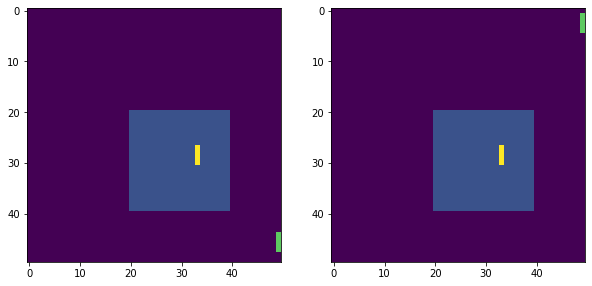

44 49 27 33


In [10]:
env = agent.env
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
env.block.update_sandbox()
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()
print(env.block.block_x, env.block.block_y, env.block.shift_x, env.block.shift_y)